# Background & Context

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

# Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. In the session we will analyze the data for used phones and build various regression models to predict the price of a used phone and identify factors that significantly influence it.

# Data Dictionary

- brand_name       : Name of the Mobile phone Brand
- os               : Operating System
- screen_size      : Screen Size of the Mobile Phone (in CM)
- 4g               : Is 4G supported (Yes/No)
- 5g               : Is 5G supported (Yes/No)
- main_camera_mp   : Rear Camera Quality in Megapixels
- selfie_camera_mp : Front Camera Quality in Megapixels
- int_memory       : ROM capacity of the Phone (in GB)
- ram              : RAM capacity of the Phone (in GB)
- battery          : Battery Capacity (in maH)
- weight           : Weight of the Phone (in grams)
- release_year     : Year in which the Phone was released
- days_used        : How many days the phone has been used
- new_price        : Selling Price of a new Phone of similar Make & Model (in Euros)
- used_price       : Selling Price of the used Phone (in Euros)




# Loading libraries

In [1]:
%load_ext nb_black

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)

# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

# Loading and exploring the data

In [2]:
df = pd.read_csv("used_phone_data.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 3571 rows and 15 columns.


brand_name       os  screen_size   4g  5g  main_camera_mp  \
2501    Samsung  Android        13.49  yes  no            13.0   
2782       Sony  Android        13.81  yes  no             NaN   
605      Others  Android        12.70  yes  no             8.0   
2923       Vivo  Android        19.37  yes  no            13.0   
941      Others   Others         5.72   no  no             0.3   
1833         LG  Android        13.49   no  no             8.0   
671       Apple      iOS        14.92  yes  no            12.0   
1796         LG  Android        17.78  yes  no             5.0   
757        Asus  Android        13.49  yes  no            13.0   
3528     Realme  Android        15.72  yes  no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
2501              13.0        32.0  4.00   3600.0   181.0          2017   
2782               8.0        32.0  4.00   3300.0   156.0          2019   
605                5.0        16.0  4.00   2400.0   137.0          2015   
2923              16.0        64.0  4.00   3260.0   149.3          2019   
941                0.3        32.0  0.25    820.0    90.0          2013   
1833               1.3        32.0  4.00   3140.0   161.0          2013   
671                7.0        64.0  4.00   5493.0    48.0          2018   
1796               0.3        16.0  4.00   4000.0   294.8          2014   
757                8.0        32.0  4.00   5000.0   181.0          2017   
3528              16.0        64.0  4.00   4035.0   184.0          2019   

      days_used  new_price  used_price  
2501        683    198.680       79.47  
2782        195    198.150      149.10  
605        1048    161.470       48.39  
2923        375    211.880      138.31  
941         883     29.810        8.92  
1833        670    240.540       96.18  
671         403    700.150      350.08  
1796        708    189.300       75.94  
757         612    270.500      108.13  
3528        433    159.885       80.00

<IPython.core.display.Javascript object>

`brand_name` contain a lot of brand name information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

Rest of the variables looks okay, we will explore the data now.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

As expected, `brand_name`, `os`, `4g` and `5g` are objects. Rest all the variables are numeric. Looks like presence of missing values too.

# Exploratory Data Analysis

In [4]:
df.describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3571.000000     3391.000000       3569.000000  3561.000000   
mean     14.803892        9.400454          6.547352    54.532607   
std       5.153092        4.818396          6.879359    84.696246   
min       2.700000        0.080000          0.300000     0.005000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      13.490000        8.000000          5.000000    32.000000   
75%      16.510000       13.000000          8.000000    64.000000   
max      46.360000       48.000000         32.000000  1024.000000   

               ram       battery       weight  release_year    days_used  \
count  3561.000000   3565.000000  3564.000000   3571.000000  3571.000000   
mean      4.056962   3067.225666   179.424285   2015.964996   675.391487   
std       1.391844   1364.206665    90.280856      2.291784   248.640972   
min       0.030000     80.000000    23.000000   2013.000000    91.000000   
25%       4.000000   2100.000000   140.000000   2014.000000   536.000000   
50%       4.000000   3000.000000   159.000000   2016.000000   690.000000   
75%       4.000000   4000.000000   184.000000   2018.000000   872.000000   
max      16.000000  12000.000000   950.000000   2020.000000  1094.000000   

         new_price   used_price  
count  3571.000000  3571.000000  
mean    237.389037   109.880277  
std     197.545581   121.501226  
min       9.130000     2.510000  
25%     120.130000    45.205000  
50%     189.800000    75.530000  
75%     291.935000   126.000000  
max    2560.200000  1916.540000

<IPython.core.display.Javascript object>

In [5]:
df.describe(include="object")

brand_name       os    4g    5g
count        3571     3571  3571  3571
unique         34        4     2     2
top        Others  Android   yes    no
freq          509     3246  2359  3419

<IPython.core.display.Javascript object>

**Observations**
1. `screen_size` is right skewed with a big difference in 3rd quartile and the maximum value. Average `screen_size` of the phone is 14.8cms.
2. `main_camera_mp` has a minimum value of 0.08 indicating the presence of feature phones too along side smartphones.
3. `selfie_camera_mp` has a high of 32MP.
4. `int_memory` ranging from 0.005GB to 1TB. It has extremely high range, we should check a few of the extreme values to get a sense of the data.
5. `release_year` shows the latest phone available for sale is for 2020 and the oldest is from 2013.
6. `days_used` indicates the newest phone available is just 91 days old and the oldest phone is 1000+ days old.
7. `used_price` is the dependent variable here and it looks heavily skewed.
8. `brand_name` helps us understand there are 34 unique smartphone brands available in the market.
9. `os` explains there are 4 major operating systems with most of the phones are `4g` compatible and since `5g` technology is new and not available everywhere less than 5% of the phones are `5g` compatible.

#### Since `4g` & `5g` only has Yes & No, let's replace them with 1 & 0

In [6]:
df["4g"] = df["4g"].replace(["yes", "no"], [1, 0])
df["5g"] = df["5g"].replace(["yes", "no"], [1, 0])

<IPython.core.display.Javascript object>

In [7]:
df.head()

brand_name       os  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
0      Honor  Android        23.97   1   0            13.0               5.0   
1      Honor  Android        28.10   1   1            13.0              16.0   
2      Honor  Android        24.29   1   1            13.0               8.0   
3      Honor  Android        26.04   1   1            13.0               8.0   
4      Honor  Android        15.72   1   0            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used  new_price  \
0        64.0  3.0   3020.0   146.0          2020        127     111.62   
1       128.0  8.0   4300.0   213.0          2020        325     249.39   
2       128.0  8.0   4200.0   213.0          2020        162     359.47   
3        64.0  6.0   7250.0   480.0          2020        345     278.93   
4        64.0  3.0   5000.0   185.0          2020        293     140.87   

   used_price  
0       86.96  
1      161.49  
2      268.55  
3      180.23  
4      103.80

<IPython.core.display.Javascript object>

### Unique values for categorical variables

In [8]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND_NAME :  34
Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           141
Xiaomi        134
Oppo          129
Asus          126
Alcatel       125
Nokia         121
Micromax      120
Honor         118
Vivo          117
Motorola      110
HTC           110
Sony           88
Meizu          62
Apple          59
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Celkon         37
Lava           36
Spice          30
Karbonn        30
OnePlus        22
BlackBerry     22
Microsoft      22
Coolpad        22
Google         15
Infinix        10
Name: brand_name, dtype: int64


*******************************************************


OS :  4
Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64


*******************************************************




<IPython.core.display.Javascript object>

In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()

# <a>Data Visualization</a>

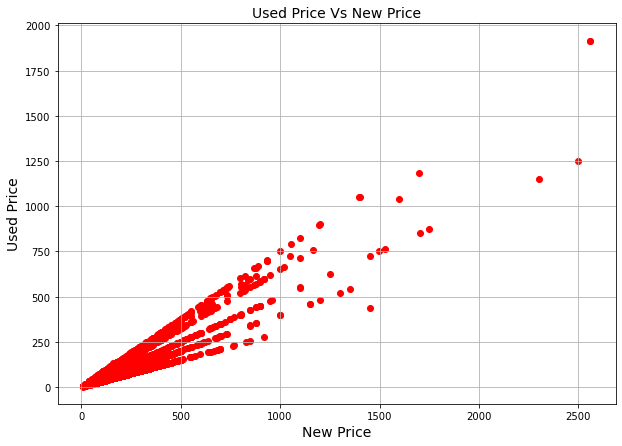

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(df["new_price"], df["used_price"], color="red")
plt.title("Used Price Vs New Price", fontsize=14)
plt.xlabel("New Price", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

## Insights:

- Clearly, we can see in the above plot that, when the price of the new phone is increasing, the price of the used phone is also increasing.
- The relationship is linear, as can be seen from the graph.

### Let's check some more features vs Target Variable to better understand the data:

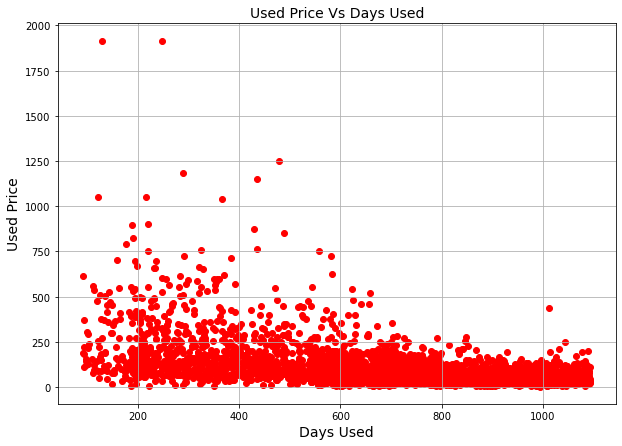

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(df["days_used"], df["used_price"], color="red")
plt.title("Used Price Vs Days Used", fontsize=14)
plt.xlabel("Days Used", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(df["release_year"], df["used_price"], color="red")
plt.title("Used Price Vs Release Year", fontsize=14)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

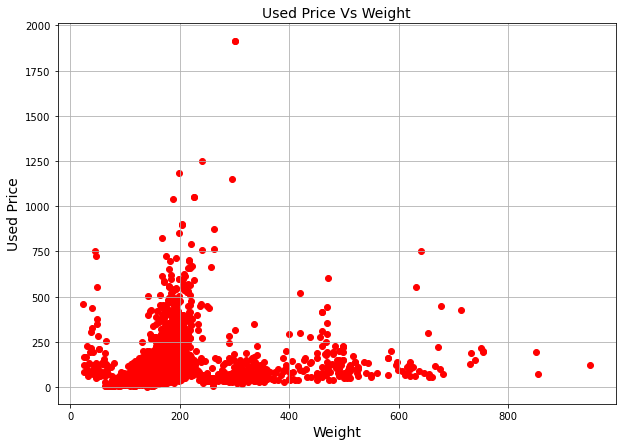

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(df["weight"], df["used_price"], color="red")
plt.title("Used Price Vs Weight", fontsize=14)
plt.xlabel("Weight", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

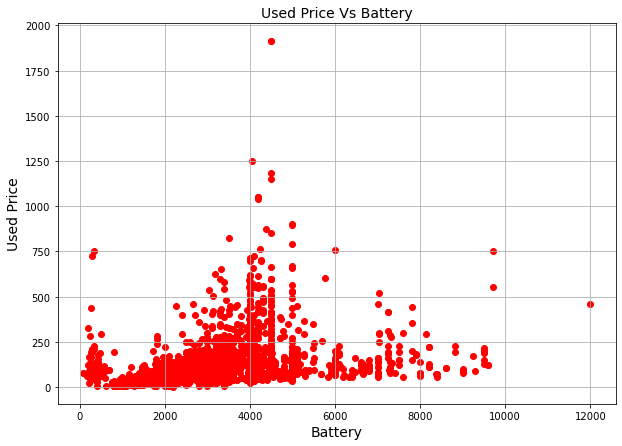

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(df["battery"], df["used_price"], color="red")
plt.title("Used Price Vs Battery", fontsize=14)
plt.xlabel("Battery", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

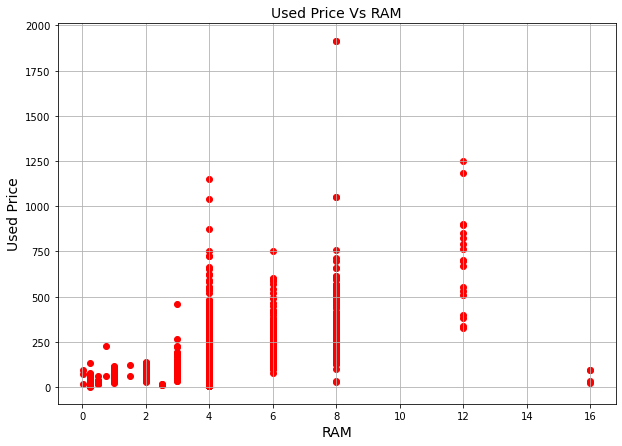

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(df["ram"], df["used_price"], color="red")
plt.title("Used Price Vs RAM", fontsize=14)
plt.xlabel("RAM", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

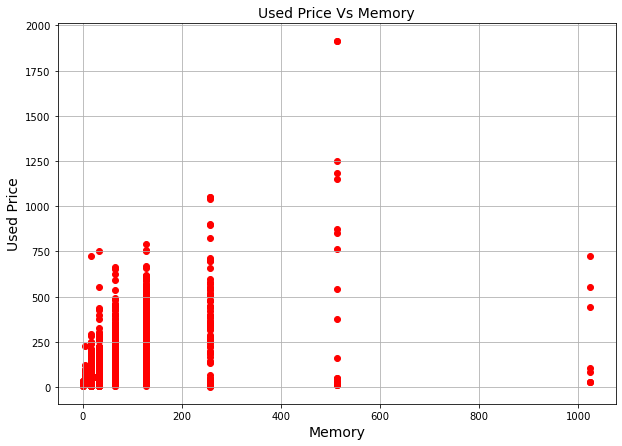

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(df["int_memory"], df["used_price"], color="red")
plt.title("Used Price Vs Memory", fontsize=14)
plt.xlabel("Memory", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

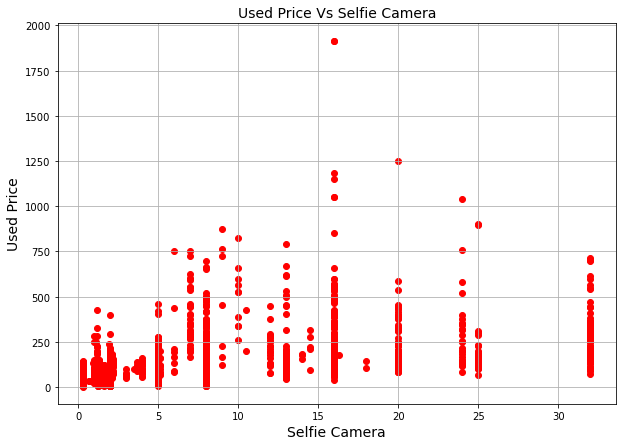

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(df["selfie_camera_mp"], df["used_price"], color="red")
plt.title("Used Price Vs Selfie Camera", fontsize=14)
plt.xlabel("Selfie Camera", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(df["main_camera_mp"], df["used_price"], color="red")
plt.title("Used Price Vs Rear Camera", fontsize=14)
plt.xlabel("Rear Camera", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(df["screen_size"], df["used_price"], color="red")
plt.title("Used Price Vs Screen Size", fontsize=14)
plt.xlabel("Screen Size", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

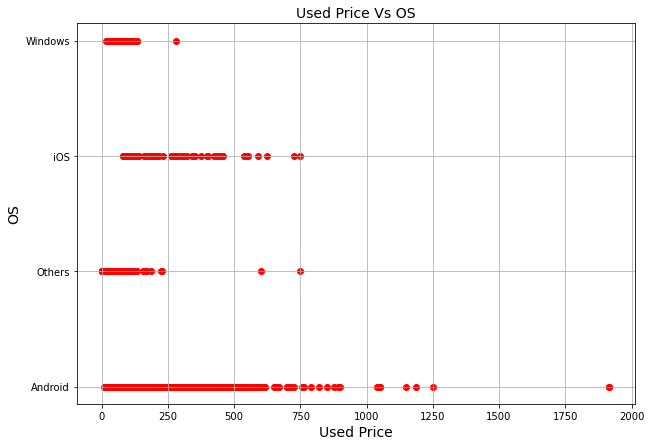

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(df["used_price"], df["os"], color="red")
plt.title("Used Price Vs OS", fontsize=14)
plt.xlabel("Used Price", fontsize=14)
plt.ylabel("OS", fontsize=14)
plt.grid(True)
plt.show()

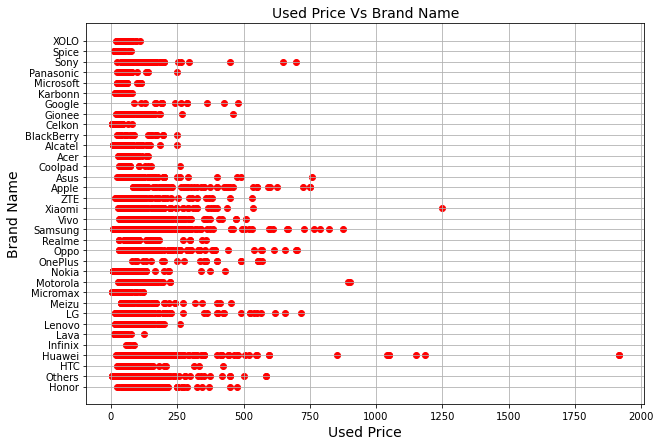

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(df["used_price"], df["brand_name"], color="red")
plt.title("Used Price Vs Brand Name", fontsize=14)
plt.xlabel("Used Price", fontsize=14)
plt.ylabel("Brand Name", fontsize=14)
plt.grid(True)
plt.show()

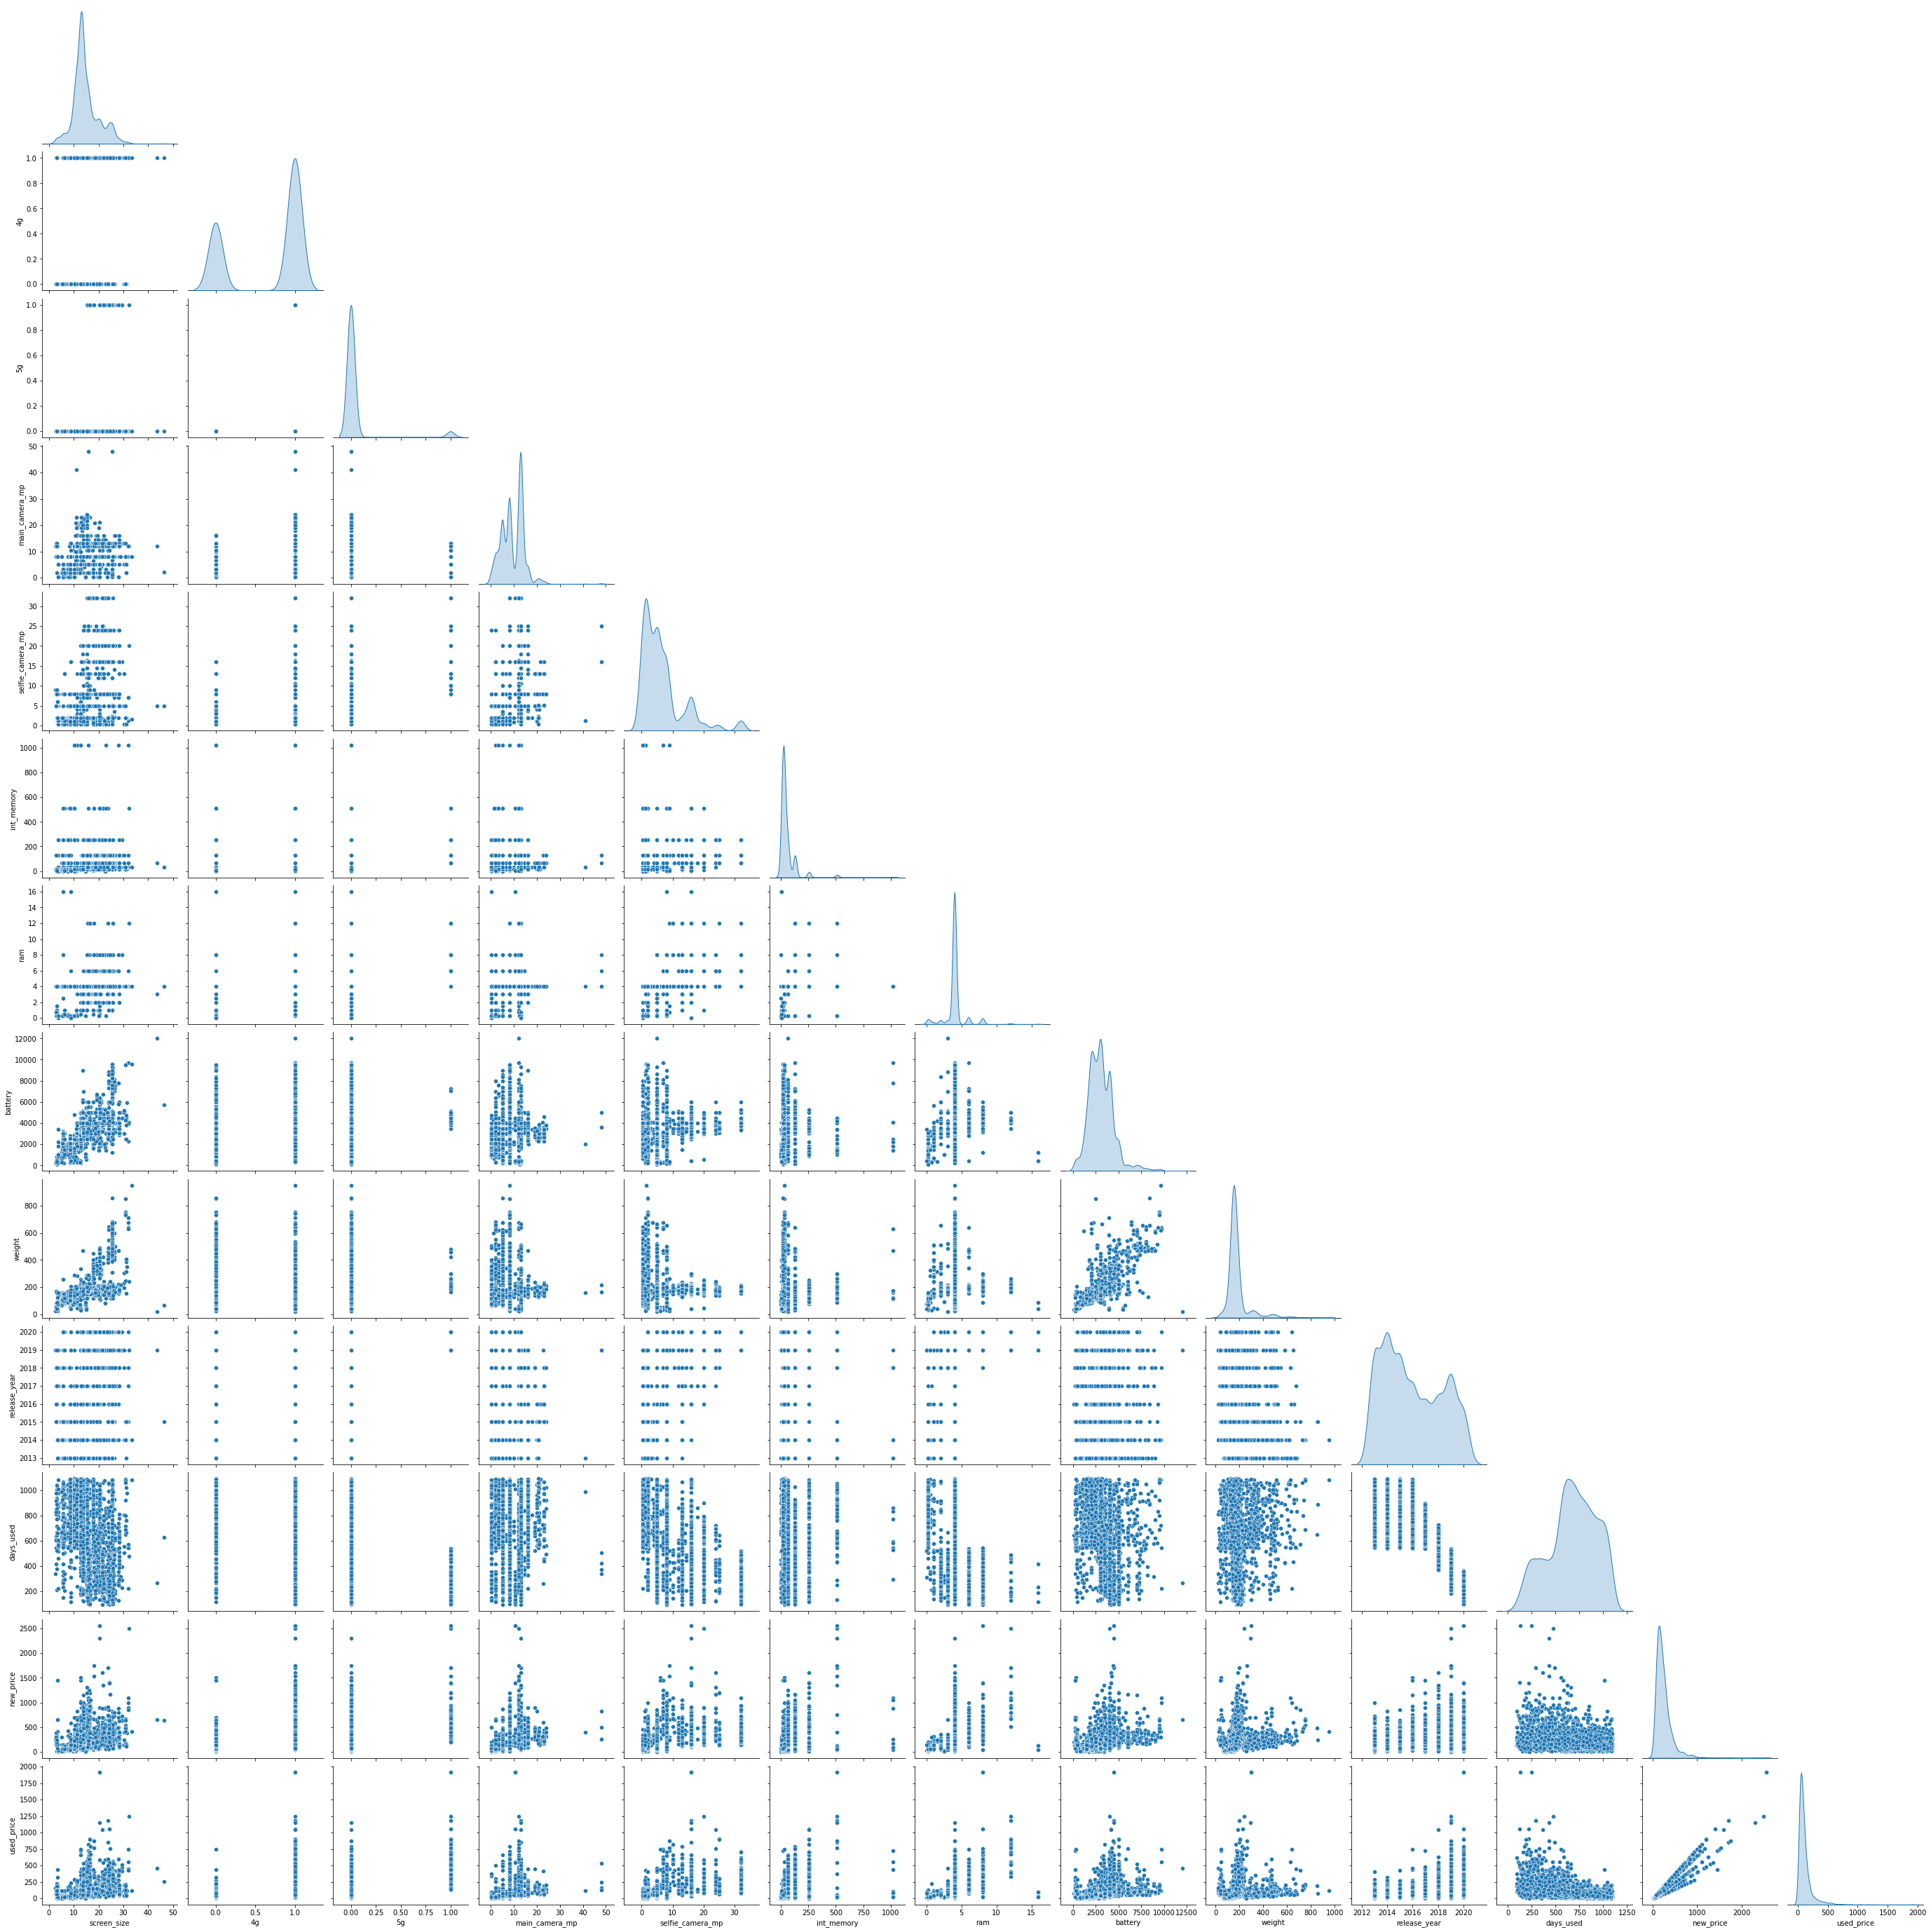

<IPython.core.display.Javascript object>

In [21]:
sns.pairplot(df, height=3, diag_kind="kde", corner=True)

<AxesSubplot:xlabel='used_price', ylabel='brand_name'>

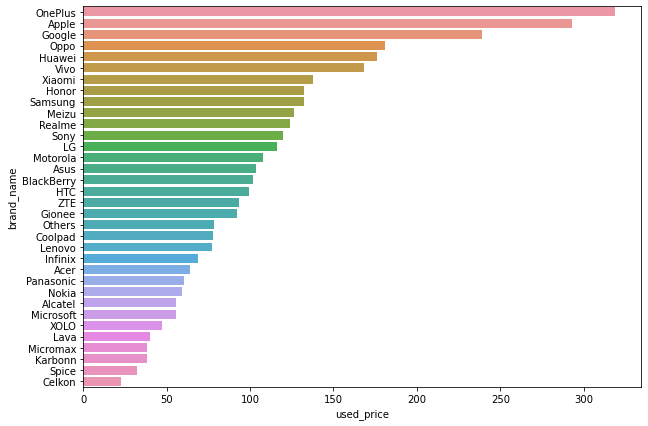

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(10, 7))
sns.barplot(
    y=df["brand_name"],
    x=df["used_price"],
    ci=False,
    order=df.groupby("brand_name")
    .mean()["used_price"]
    .sort_values(ascending=False)
    .index,
)

<AxesSubplot:xlabel='used_price', ylabel='os'>

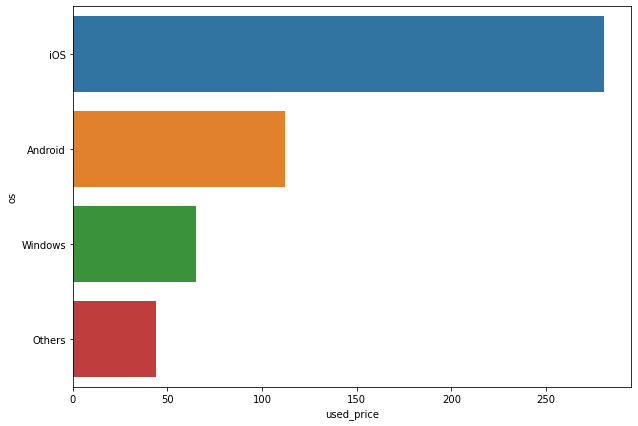

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(10, 7))
sns.barplot(
    y=df["os"],
    x=df["used_price"],
    ci=False,
    order=df.groupby("os").mean()["used_price"].sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='4g', ylabel='used_price'>

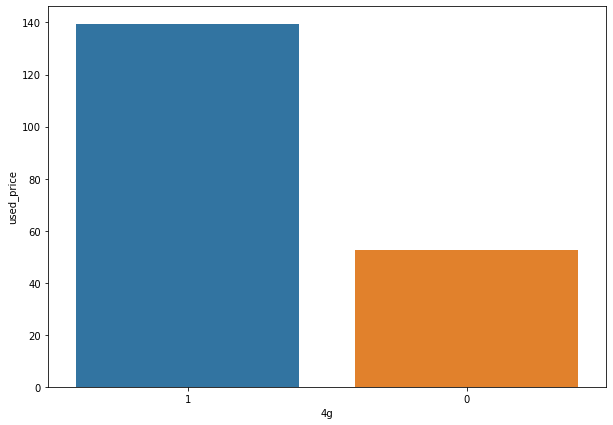

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(10, 7))
sns.barplot(
    x=df["4g"],
    y=df["used_price"],
    ci=False,
    order=df.groupby("4g").mean()["used_price"].sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='5g', ylabel='used_price'>

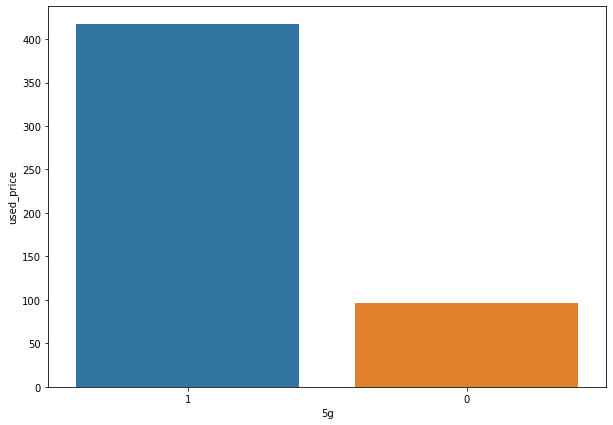

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(10, 7))
sns.barplot(
    x=df["5g"],
    y=df["used_price"],
    ci=False,
    order=df.groupby("5g").mean()["used_price"].sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='brand_name'>

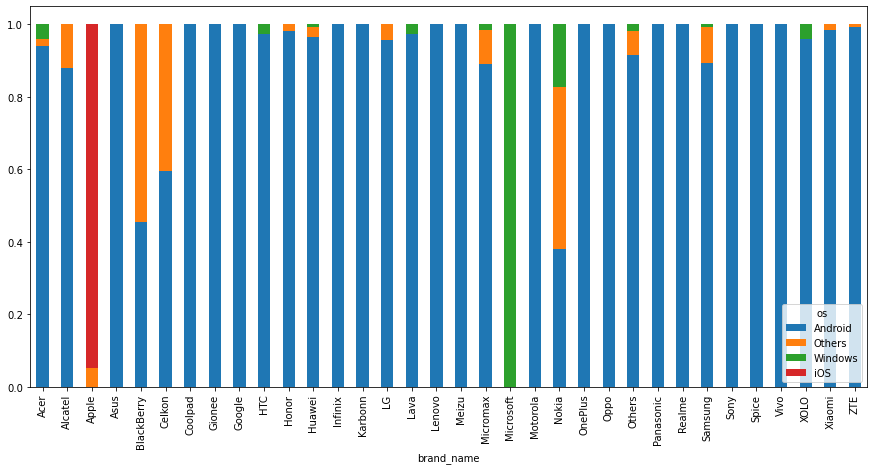

<IPython.core.display.Javascript object>

In [26]:
pd.crosstab(df["brand_name"], df["os"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15, 7)
)

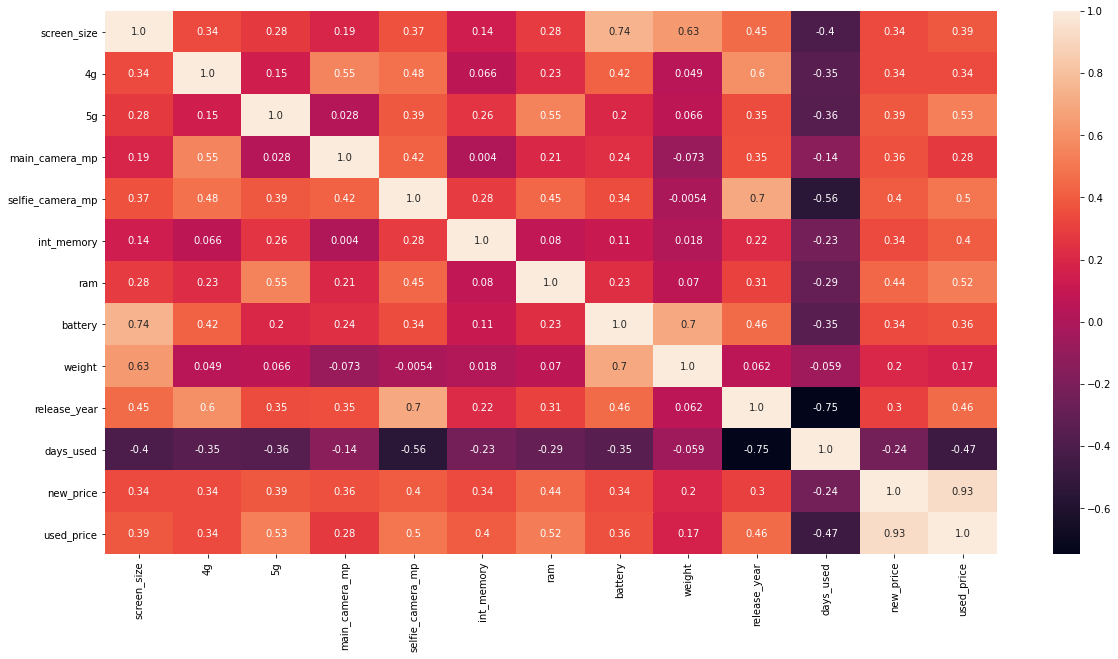

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

### Missing Values

In [28]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [29]:
(df.isnull().sum() / df.shape[0] * 100)[df.isnull().sum() > 0]

main_camera_mp      5.040605
selfie_camera_mp    0.056007
int_memory          0.280034
ram                 0.280034
battery             0.168020
weight              0.196024
dtype: float64

<IPython.core.display.Javascript object>

In [30]:
# We'll impute these missing values one by one, by taking median number of main_camera_mp for the particular brand_name,
df.groupby(["brand_name"], as_index=False)["main_camera_mp"].median()

brand_name  main_camera_mp
0         Acer           5.000
1      Alcatel           5.000
2        Apple          12.000
3         Asus          13.000
4   BlackBerry           8.000
5       Celkon           3.150
6      Coolpad          13.000
7       Gionee           8.000
8       Google          12.200
9          HTC          13.000
10       Honor          13.000
11      Huawei          12.825
12     Infinix             NaN
13     Karbonn           5.000
14          LG           8.000
15        Lava           8.000
16      Lenovo           8.000
17       Meizu          13.000
18    Micromax           5.000
19   Microsoft           8.000
20    Motorola          13.000
21       Nokia           5.000
22     OnePlus          13.000
23        Oppo          13.000
24      Others           8.000
25   Panasonic           8.000
26      Realme          13.000
27     Samsung           8.000
28        Sony          13.000
29       Spice           5.000
30        Vivo          13.000
31        XOLO           8.000
32      Xiaomi          13.000
33         ZTE          13.000

<IPython.core.display.Javascript object>

In [31]:
# Impute main_camera_mp
df["main_camera_mp"] = df.groupby(["brand_name"])["main_camera_mp"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [32]:
df.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     2
int_memory          10
ram                 10
battery              6
weight               7
release_year         0
days_used            0
new_price            0
used_price           0
dtype: int64

<IPython.core.display.Javascript object>

In [33]:
for i in df.columns:
    if df[i].dtype != "object":
        median = df[i].median()
        df[i] = df[i].fillna(median)

<IPython.core.display.Javascript object>

In [34]:
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

### Distribution & Outliers

In [35]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

<IPython.core.display.Javascript object>

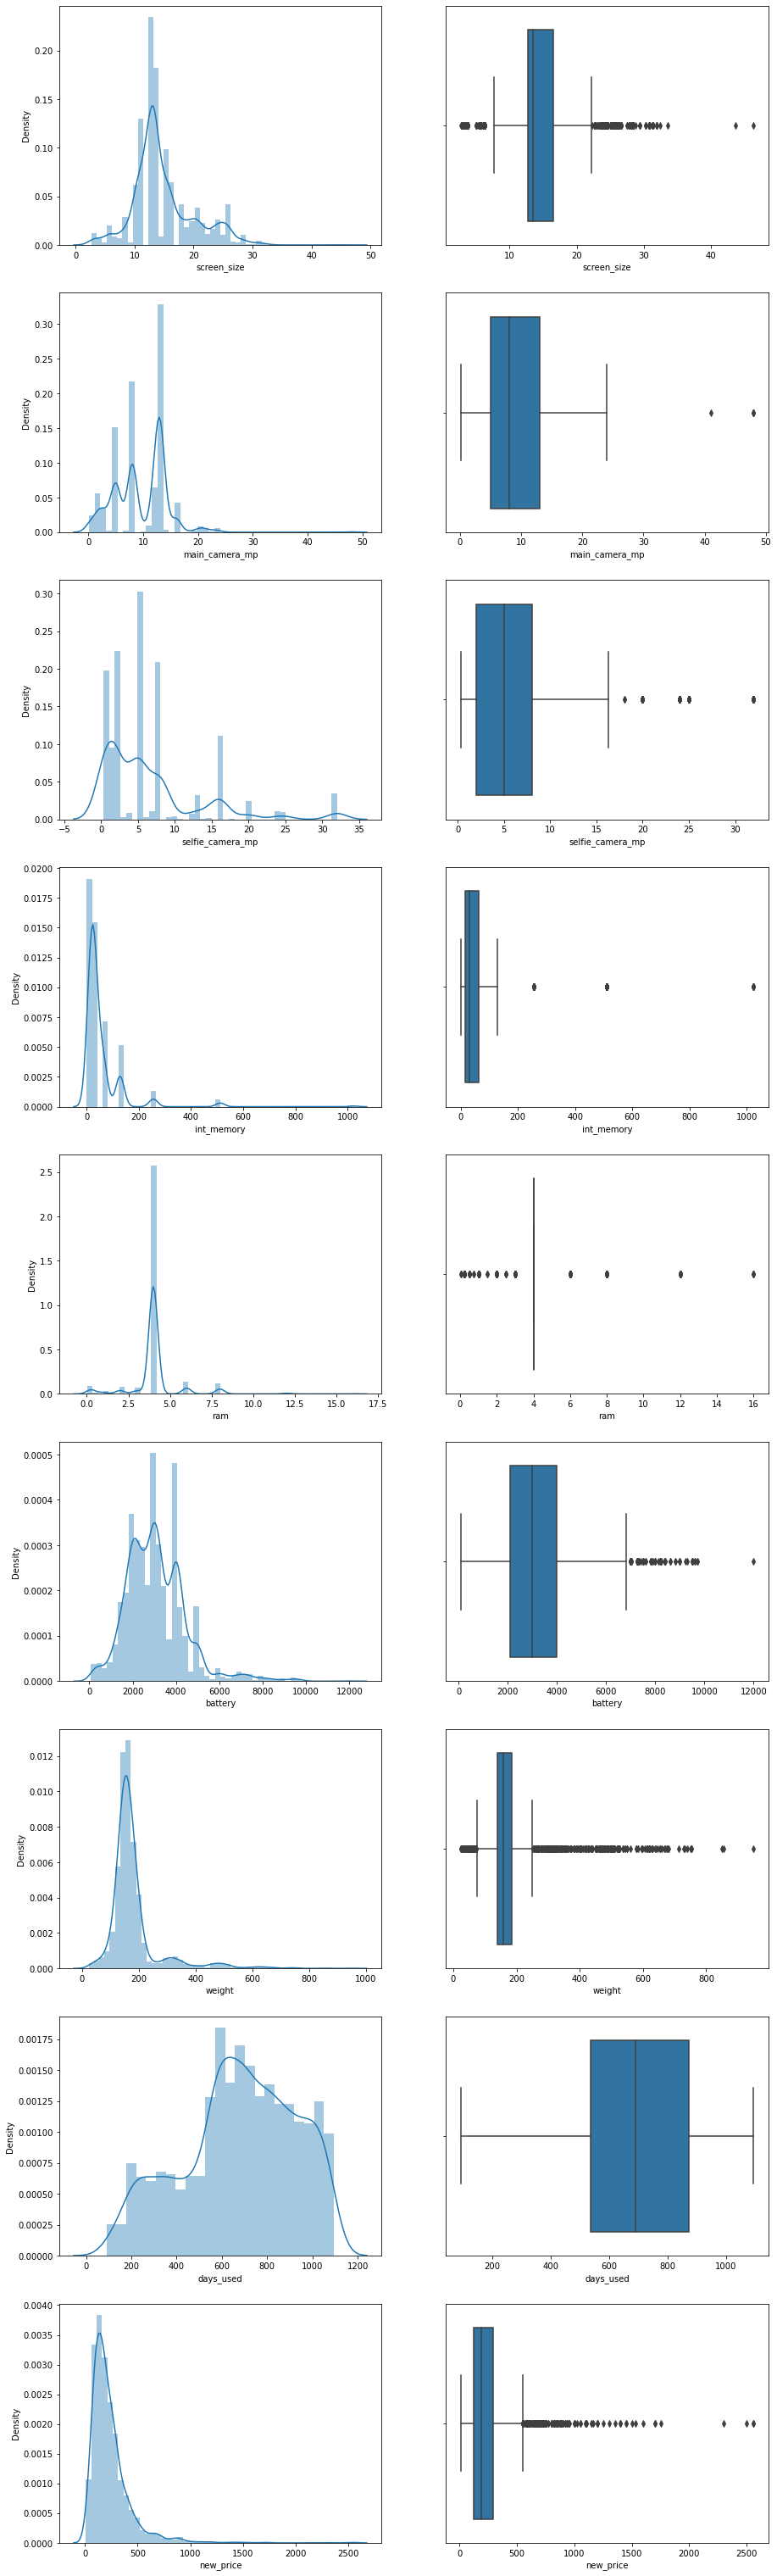

<IPython.core.display.Javascript object>

In [36]:
a = 1
plt.figure(figsize=(15, 80))
for i in df[
    [
        "screen_size",
        "main_camera_mp",
        "selfie_camera_mp",
        "int_memory",
        "ram",
        "battery",
        "weight",
        "days_used",
        "new_price",
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        # plt.title("Histogram for:" + i)
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        # plt.title("Boxplot for:" + i)
        a += 2

In [37]:
def remove_outlier(col):
    sorted(col)
    q1, q3 = np.quantile(col, [0.25, 0.75])
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll, ul

<IPython.core.display.Javascript object>

In [38]:
for i in df[
    [
        "screen_size",
        "main_camera_mp",
        "selfie_camera_mp",
        "int_memory",
        "ram",
        "battery",
        "weight",
        "days_used",
        "new_price",
    ]
]:
    if df[i].dtype != "object":
        ll, ul = remove_outlier(df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])

<IPython.core.display.Javascript object>

# <a>Data Preparation</a>

In [39]:
X = df.drop("used_price", axis=1)
y = df[["used_price"]]

X.head()

brand_name       os  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
0      Honor  Android       22.225   1   0            13.0               5.0   
1      Honor  Android       22.225   1   1            13.0              16.0   
2      Honor  Android       22.225   1   1            13.0               8.0   
3      Honor  Android       22.225   1   1            13.0               8.0   
4      Honor  Android       15.720   1   0            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used  new_price  
0        64.0  4.0   3020.0   146.0          2020      127.0     111.62  
1       128.0  4.0   4300.0   213.0          2020      325.0     249.39  
2       128.0  4.0   4200.0   213.0          2020      162.0     359.47  
3        64.0  4.0   6850.0   250.0          2020      345.0     278.93  
4        64.0  4.0   5000.0   185.0          2020      293.0     140.87

<IPython.core.display.Javascript object>

In [40]:
X = pd.get_dummies(X, columns=["brand_name", "os"], drop_first=True)
X.head()

screen_size  4g  5g  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0       22.225   1   0            13.0               5.0        64.0  4.0   
1       22.225   1   1            13.0              16.0       128.0  4.0   
2       22.225   1   1            13.0               8.0       128.0  4.0   
3       22.225   1   1            13.0               8.0        64.0  4.0   
4       15.720   1   0            13.0               8.0        64.0  4.0   

   battery  weight  release_year  days_used  new_price  brand_name_Alcatel  \
0   3020.0   146.0          2020      127.0     111.62                   0   
1   4300.0   213.0          2020      325.0     249.39                   0   
2   4200.0   213.0          2020      162.0     359.47                   0   
3   6850.0   250.0          2020      345.0     278.93                   0   
4   5000.0   185.0          2020      293.0     140.87                   0   

   brand_name_Apple  brand_name_Asus  brand_name_BlackBerry  \
0                 0                0                      0   
1                 0                0                      0   
2                 0                0                      0   
3                 0                0                      0   
4                 0                0                      0   

   brand_name_Celkon  brand_name_Coolpad  brand_name_Gionee  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   

   brand_name_Google  brand_name_HTC  brand_name_Honor  brand_name_Huawei  \
0                  0               0                 1                  0   
1                  0               0                 1                  0   
2                  0               0                 1                  0   
3                  0               0                 1                  0   
4                  0               0                 1                  0   

   brand_name_Infinix  brand_name_Karbonn  brand_name_LG  brand_name_Lava  \
0                   0                   0              0                0   
1                   0                   0              0                0   
2                   0                   0              0                0   
3                   0                   0              0                0   
4                   0                   0              0                0   

   brand_name_Lenovo  brand_name_Meizu  brand_name_Micromax  \
0                  0                 0                    0   
1                  0                 0                    0   
2                  0                 0                    0   
3                  0                 0                    0   
4                  0                 0                    0   

   brand_name_Microsoft  brand_name_Motorola  brand_name_Nokia  \
0                     0                    0                 0   
1                     0                    0                 0   
2                     0                    0                 0   
3                     0                    0                 0   
4                     0                    0                 0   

   brand_name_OnePlus  brand_name_Oppo  brand_name_Others  \
0                   0                0                  0   
1                   0                0                  0   
2                   0                0                  0   
3                   0                0                  0   
4                   0                0                  0   

   brand_name_Panasonic  brand_name_Realme  brand_name_Samsung  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0    

<IPython.core.display.Javascript object>

In [41]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

# <a>Choose Model, Train and Evaluate</a>

In [42]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [43]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print(
        "The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx])
    )

The coefficient for screen_size is -2.1121708824949037
The coefficient for 4g is -12.564087656653083
The coefficient for 5g is 120.67818766194864
The coefficient for main_camera_mp is -2.0907878210434334
The coefficient for selfie_camera_mp is -0.4881718508919387
The coefficient for int_memory is 0.2538028802686115
The coefficient for ram is 2.452149594489583e-10
The coefficient for battery is -0.005108233982158016
The coefficient for weight is 0.1594290497845133
The coefficient for release_year is 5.701269416878988
The coefficient for days_used is -0.1089912655317951
The coefficient for new_price is 0.6191946854836733
The coefficient for brand_name_Alcatel is 3.022702285086809
The coefficient for brand_name_Apple is 205.65912907584894
The coefficient for brand_name_Asus is -1.402188670533247
The coefficient for brand_name_BlackBerry is -1.3172034141338693
The coefficient for brand_name_Celkon is 2.2406940616914803
The coefficient for brand_name_Coolpad is 9.290361595941393
The coeffic

<IPython.core.display.Javascript object>

In [44]:
print("The intercept for our model is {}".format(linearregression.intercept_[0]))

The intercept for our model is -11412.15576234213


<IPython.core.display.Javascript object>

In [45]:
pred_train = linearregression.predict(X_train)
pred_test = linearregression.predict(X_test)

<IPython.core.display.Javascript object>

In [46]:
# R2 Squared:
lrscore_train = linearregression.score(X_train, y_train)
lrscore_test = linearregression.score(X_test, y_test)
print(lrscore_train)
print(lrscore_test)

0.7356066975074067
0.7867582756440177


<IPython.core.display.Javascript object>

In [47]:
# RMSE
rmse_lr_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_lr_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_lr_train)
print(rmse_lr_test)

63.655803858712396
53.52169930506747


<IPython.core.display.Javascript object>

#### Now compare the actual output values for X_test with the predicted values, execute the following script: 

In [48]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred   residual
457        38.77   15.891141  22.878859
1647      120.29  108.928367  11.361633
351       335.09  403.990235 -68.900235
1667       80.14   74.612359   5.527641
1849       60.18   61.804749  -1.624749

<IPython.core.display.Javascript object>

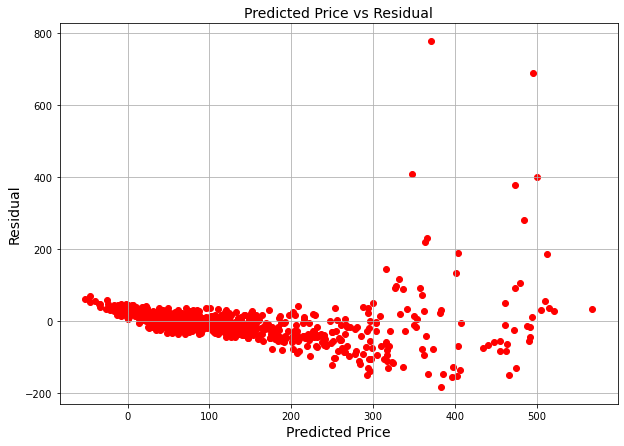

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='residual', ylabel='Density'>

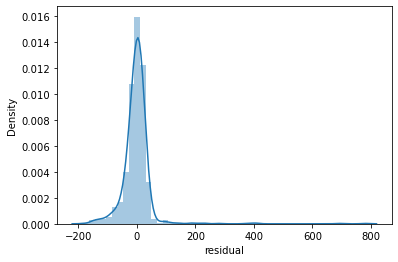

<IPython.core.display.Javascript object>

In [50]:
sns.distplot(data.residual)

## Random Forest Regressor

In [51]:
rfregressor = RandomForestRegressor(max_depth=10, min_samples_split=50, criterion="mse")
rfregressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=50)

<IPython.core.display.Javascript object>

In [53]:
pred_train = rfregressor.predict(X_train)
pred_test = rfregressor.predict(X_test)

<IPython.core.display.Javascript object>

In [52]:
rfscore_train = rfregressor.score(X_train, y_train)
rfscore_test = rfregressor.score(X_test, y_test)
print(rfscore_train)
print(rfscore_test)

0.8565541428449992
0.8700657995369009


<IPython.core.display.Javascript object>

In [54]:
rmse_rf_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_rf_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_rf_train)
print(rmse_rf_test)


46.887468680167835
41.77875943892924


<IPython.core.display.Javascript object>

In [55]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred  residual
457        38.77   39.312319 -0.542319
1647      120.29  120.846376 -0.556376
351       335.09  325.859342  9.230658
1667       80.14   80.481240 -0.341240
1849       60.18   60.764951 -0.584951

<IPython.core.display.Javascript object>

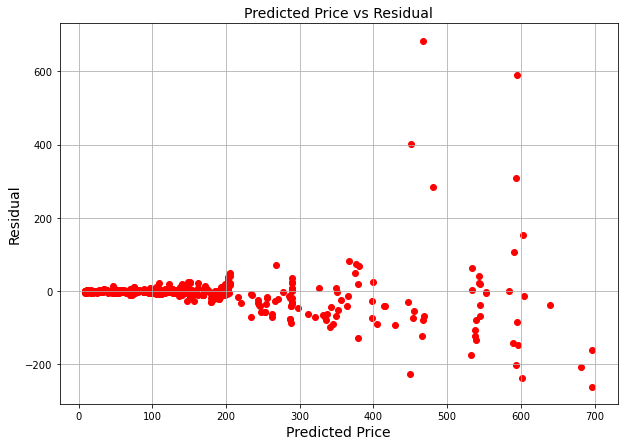

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [57]:
pd.DataFrame(rfregressor.feature_importances_, index=X_test.columns).sort_values(
    0, ascending=False
)

0
new_price              0.798175
days_used              0.152326
int_memory             0.017570
weight                 0.015740
brand_name_Xiaomi      0.004996
5g                     0.004069
release_year           0.003112
battery                0.001508
brand_name_Huawei      0.001006
main_camera_mp         0.000590
os_iOS                 0.000312
brand_name_Apple       0.000232
brand_name_LG          0.000166
os_Others              0.000100
screen_size            0.000099
brand_name_BlackBerry  0.000000
brand_name_Nokia       0.000000
os_Windows             0.000000
selfie_camera_mp       0.000000
brand_name_ZTE         0.000000
ram                    0.000000
brand_name_XOLO        0.000000
brand_name_Vivo        0.000000
brand_name_Spice       0.000000
brand_name_Sony        0.000000
brand_name_Samsung     0.000000
brand_name_Realme      0.000000
brand_name_Panasonic   0.000000
brand_name_Others      0.000000
brand_name_Oppo        0.000000
brand_name_OnePlus     0.000000
brand_name_Motorola    0.000000
brand_name_Celkon      0.000000
brand_name_Microsoft   0.000000
brand_name_Micromax    0.000000
brand_name_Meizu       0.000000
brand_name_Lenovo      0.000000
brand_name_Lava        0.000000
brand_name_Alcatel     0.000000
4g                     0.000000
brand_name_Infinix     0.000000
brand_name_Asus        0.000000
brand_name_Honor       0.000000
brand_name_HTC         0.000000
brand_name_Google      0.000000
brand_name_Gionee      0.000000
brand_name_Coolpad     0.000000
brand_name_Karbonn     0.000000

<IPython.core.display.Javascript object>

## Adaboost Regressor

In [58]:
adaboost = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(
        max_depth=10, min_samples_split=100, random_state=42
    ),
    random_state=42,
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       min_samples_split=100,
                                                       random_state=42),
                  random_state=42)

<IPython.core.display.Javascript object>

In [60]:
pred_train = adaboost.predict(X_train)
pred_test = adaboost.predict(X_test)

<IPython.core.display.Javascript object>

In [59]:
adascore_train = adaboost.score(X_train, y_train)
adascore_test = adaboost.score(X_test, y_test)
print(adascore_train)
print(adascore_test)

0.9872160426432496
0.8904319553689508


<IPython.core.display.Javascript object>

In [61]:
# RMSE
rmse_ada_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_ada_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_ada_train)
print(rmse_ada_test)

13.997337642360531
38.36504893639272


<IPython.core.display.Javascript object>

In [62]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred   residual
457        38.77   47.485769  -8.715769
1647      120.29  128.760800  -8.470800
351       335.09  319.117547  15.972453
1667       80.14   81.609219  -1.469219
1849       60.18   58.941772   1.238228

<IPython.core.display.Javascript object>

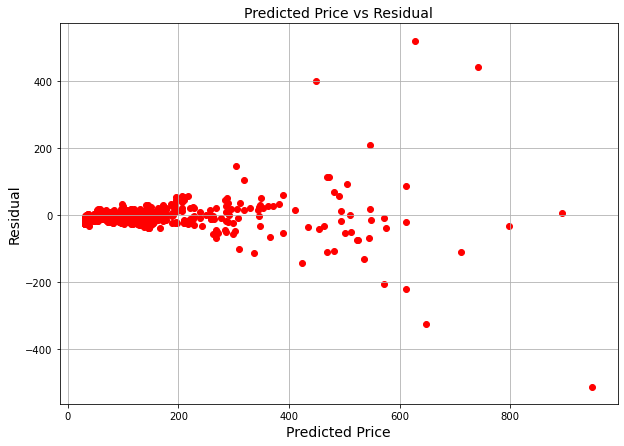

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

## Gradient Boost Regressor

In [64]:
gradientboost = GradientBoostingRegressor(
    max_depth=10, min_samples_split=100, learning_rate=0.01, random_state=42
)
gradientboost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=100, random_state=42)

<IPython.core.display.Javascript object>

In [65]:
pred_train = gradientboost.predict(X_train)
pred_test = gradientboost.predict(X_test)

<IPython.core.display.Javascript object>

In [66]:
gradientscore_train = gradientboost.score(X_train, y_train)
gradientscore_test = gradientboost.score(X_test, y_test)
print(gradientscore_train)
print(gradientscore_test)

0.7257289849103826
0.7884153482388973


<IPython.core.display.Javascript object>

In [67]:
# RMSE
rmse_gradient_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_gradient_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_gradient_train)
print(rmse_gradient_test)

64.83398840751984
53.313338787540424


<IPython.core.display.Javascript object>

In [68]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred   residual
457        38.77   64.712800 -25.942800
1647      120.29  116.124726   4.165274
351       335.09  252.672042  82.417958
1667       80.14   90.773197 -10.633197
1849       60.18   78.209946 -18.029946

<IPython.core.display.Javascript object>

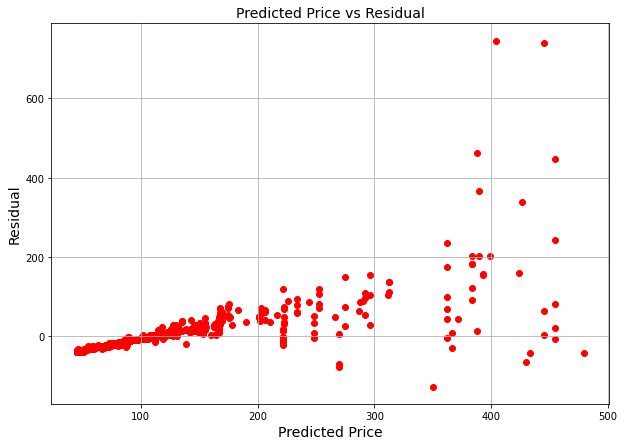

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

## MLP Regressor

In [123]:
mlpregressor = MLPRegressor(
    hidden_layer_sizes=8,
    activation="relu",
    solver="adam",
    verbose=True,
    n_iter_no_change=1000,
    max_iter=20000,
    tol=0.001,
    random_state=42,
)
mlpregressor.fit(X_train, y_train)

Iteration 1, loss = 21349.34644100
Iteration 2, loss = 13179.59620516
Iteration 3, loss = 9647.34358686
Iteration 4, loss = 7930.55509264
Iteration 5, loss = 7117.45658495
Iteration 6, loss = 6735.07702016
Iteration 7, loss = 6553.04664692
Iteration 8, loss = 6464.19400538
Iteration 9, loss = 6415.07503161
Iteration 10, loss = 6370.19783557
Iteration 11, loss = 6325.98890937
Iteration 12, loss = 6282.22589223
Iteration 13, loss = 6240.71491306
Iteration 14, loss = 6196.36726941
Iteration 15, loss = 6151.81213910
Iteration 16, loss = 6106.79466575
Iteration 17, loss = 6060.92781656
Iteration 18, loss = 6013.06319761
Iteration 19, loss = 5966.20011921
Iteration 20, loss = 5915.24910860
Iteration 21, loss = 5860.72368463
Iteration 22, loss = 5802.33792446
Iteration 23, loss = 5730.53223213
Iteration 24, loss = 5647.50271712
Iteration 25, loss = 5528.37120148
Iteration 26, loss = 5287.21499496
Iteration 27, loss = 4833.02112858
Iteration 28, loss = 4498.83184337
Iteration 29, loss = 4267.9

Iteration 261, loss = 1625.90575150
Iteration 262, loss = 1629.94485930
Iteration 263, loss = 1632.88999802
Iteration 264, loss = 1628.37955469
Iteration 265, loss = 1624.41336736
Iteration 266, loss = 1620.21031805
Iteration 267, loss = 1626.28186037
Iteration 268, loss = 1615.71407680
Iteration 269, loss = 1624.48387285
Iteration 270, loss = 1616.57188329
Iteration 271, loss = 1614.20410993
Iteration 272, loss = 1606.82566667
Iteration 273, loss = 1612.33235651
Iteration 274, loss = 1605.30605408
Iteration 275, loss = 1608.94088713
Iteration 276, loss = 1613.72435622
Iteration 277, loss = 1623.29066762
Iteration 278, loss = 1613.48697972
Iteration 279, loss = 1605.12128843
Iteration 280, loss = 1602.89465875
Iteration 281, loss = 1604.90865425
Iteration 282, loss = 1592.24640580
Iteration 283, loss = 1613.48411853
Iteration 284, loss = 1608.97788920
Iteration 285, loss = 1597.61699768
Iteration 286, loss = 1594.63200826
Iteration 287, loss = 1601.81643608
Iteration 288, loss = 1610.5

Iteration 494, loss = 1429.41332808
Iteration 495, loss = 1436.97229845
Iteration 496, loss = 1439.71853617
Iteration 497, loss = 1432.81090019
Iteration 498, loss = 1427.67962361
Iteration 499, loss = 1443.12794135
Iteration 500, loss = 1447.40263534
Iteration 501, loss = 1440.41679596
Iteration 502, loss = 1430.13878863
Iteration 503, loss = 1431.87723107
Iteration 504, loss = 1417.66508685
Iteration 505, loss = 1424.34124468
Iteration 506, loss = 1454.51372801
Iteration 507, loss = 1437.17607597
Iteration 508, loss = 1448.96812733
Iteration 509, loss = 1433.91028304
Iteration 510, loss = 1439.94681666
Iteration 511, loss = 1421.97094179
Iteration 512, loss = 1422.07895349
Iteration 513, loss = 1413.98452291
Iteration 514, loss = 1420.36743420
Iteration 515, loss = 1415.52870706
Iteration 516, loss = 1413.96733011
Iteration 517, loss = 1422.93766301
Iteration 518, loss = 1420.65150745
Iteration 519, loss = 1414.96175853
Iteration 520, loss = 1417.67864892
Iteration 521, loss = 1427.9

Iteration 730, loss = 1342.09596514
Iteration 731, loss = 1330.36606512
Iteration 732, loss = 1333.04820633
Iteration 733, loss = 1347.26866496
Iteration 734, loss = 1343.11980747
Iteration 735, loss = 1370.07828035
Iteration 736, loss = 1350.41257650
Iteration 737, loss = 1346.09915875
Iteration 738, loss = 1329.52488785
Iteration 739, loss = 1329.81975378
Iteration 740, loss = 1331.20122888
Iteration 741, loss = 1347.84400365
Iteration 742, loss = 1334.43535527
Iteration 743, loss = 1348.58218203
Iteration 744, loss = 1331.53300847
Iteration 745, loss = 1337.12738135
Iteration 746, loss = 1333.02886756
Iteration 747, loss = 1336.88673328
Iteration 748, loss = 1328.07917352
Iteration 749, loss = 1333.83380239
Iteration 750, loss = 1329.80911365
Iteration 751, loss = 1325.03233473
Iteration 752, loss = 1325.73284246
Iteration 753, loss = 1340.46549832
Iteration 754, loss = 1339.05756660
Iteration 755, loss = 1328.80789650
Iteration 756, loss = 1330.33074201
Iteration 757, loss = 1343.1

Iteration 961, loss = 1257.25969646
Iteration 962, loss = 1246.53334992
Iteration 963, loss = 1245.49255289
Iteration 964, loss = 1243.08820510
Iteration 965, loss = 1274.53564976
Iteration 966, loss = 1238.34352930
Iteration 967, loss = 1236.79742104
Iteration 968, loss = 1249.54781203
Iteration 969, loss = 1253.32246779
Iteration 970, loss = 1255.31207152
Iteration 971, loss = 1234.86863534
Iteration 972, loss = 1235.60998896
Iteration 973, loss = 1241.07419878
Iteration 974, loss = 1252.68577276
Iteration 975, loss = 1241.89196173
Iteration 976, loss = 1237.23906636
Iteration 977, loss = 1238.53438647
Iteration 978, loss = 1242.76529306
Iteration 979, loss = 1234.40346523
Iteration 980, loss = 1255.37712920
Iteration 981, loss = 1236.05582158
Iteration 982, loss = 1239.81563776
Iteration 983, loss = 1235.73925630
Iteration 984, loss = 1231.84508502
Iteration 985, loss = 1238.79632280
Iteration 986, loss = 1248.83409018
Iteration 987, loss = 1234.19239872
Iteration 988, loss = 1230.8

Iteration 1208, loss = 1140.70259525
Iteration 1209, loss = 1133.23363477
Iteration 1210, loss = 1133.92951577
Iteration 1211, loss = 1152.25847525
Iteration 1212, loss = 1132.37007841
Iteration 1213, loss = 1137.31416395
Iteration 1214, loss = 1156.64100248
Iteration 1215, loss = 1161.91253874
Iteration 1216, loss = 1147.33140915
Iteration 1217, loss = 1135.62276024
Iteration 1218, loss = 1140.83428253
Iteration 1219, loss = 1133.11873399
Iteration 1220, loss = 1158.15992113
Iteration 1221, loss = 1133.96979605
Iteration 1222, loss = 1127.39265198
Iteration 1223, loss = 1148.51805265
Iteration 1224, loss = 1144.15911123
Iteration 1225, loss = 1124.94561086
Iteration 1226, loss = 1124.17265826
Iteration 1227, loss = 1131.64706054
Iteration 1228, loss = 1128.80951004
Iteration 1229, loss = 1124.56145322
Iteration 1230, loss = 1126.20956053
Iteration 1231, loss = 1133.76646605
Iteration 1232, loss = 1133.42835781
Iteration 1233, loss = 1126.35379659
Iteration 1234, loss = 1122.05646967
I

Iteration 1431, loss = 1083.45594157
Iteration 1432, loss = 1069.96119617
Iteration 1433, loss = 1072.77524510
Iteration 1434, loss = 1058.96300272
Iteration 1435, loss = 1074.90604867
Iteration 1436, loss = 1070.38474440
Iteration 1437, loss = 1106.62707475
Iteration 1438, loss = 1137.59576748
Iteration 1439, loss = 1046.88566861
Iteration 1440, loss = 1058.58968583
Iteration 1441, loss = 1085.14264455
Iteration 1442, loss = 1123.47881764
Iteration 1443, loss = 1096.07320399
Iteration 1444, loss = 1056.14880808
Iteration 1445, loss = 1051.48678692
Iteration 1446, loss = 1055.19201895
Iteration 1447, loss = 1046.60781183
Iteration 1448, loss = 1075.34280197
Iteration 1449, loss = 1071.91858063
Iteration 1450, loss = 1050.05296930
Iteration 1451, loss = 1053.73834702
Iteration 1452, loss = 1046.98360735
Iteration 1453, loss = 1041.29004753
Iteration 1454, loss = 1051.20964026
Iteration 1455, loss = 1048.24780835
Iteration 1456, loss = 1061.93466629
Iteration 1457, loss = 1100.28873398
I

Iteration 1681, loss = 940.84698690
Iteration 1682, loss = 948.08841900
Iteration 1683, loss = 957.04310453
Iteration 1684, loss = 955.21760715
Iteration 1685, loss = 961.86012661
Iteration 1686, loss = 961.80855421
Iteration 1687, loss = 928.73331278
Iteration 1688, loss = 956.78050304
Iteration 1689, loss = 951.52752038
Iteration 1690, loss = 962.75844771
Iteration 1691, loss = 936.03495169
Iteration 1692, loss = 936.07736505
Iteration 1693, loss = 964.30737751
Iteration 1694, loss = 957.14918836
Iteration 1695, loss = 978.66281571
Iteration 1696, loss = 955.36170814
Iteration 1697, loss = 935.97658907
Iteration 1698, loss = 946.24097647
Iteration 1699, loss = 949.57829427
Iteration 1700, loss = 940.30687314
Iteration 1701, loss = 962.17672696
Iteration 1702, loss = 969.03758777
Iteration 1703, loss = 949.68098443
Iteration 1704, loss = 938.13775752
Iteration 1705, loss = 949.67952684
Iteration 1706, loss = 944.53794653
Iteration 1707, loss = 933.58763281
Iteration 1708, loss = 936.3

Iteration 1921, loss = 911.24950552
Iteration 1922, loss = 878.60116050
Iteration 1923, loss = 874.64922003
Iteration 1924, loss = 875.10716660
Iteration 1925, loss = 893.21079342
Iteration 1926, loss = 884.65924080
Iteration 1927, loss = 874.89581608
Iteration 1928, loss = 898.32349619
Iteration 1929, loss = 871.81777645
Iteration 1930, loss = 878.39510951
Iteration 1931, loss = 905.09072567
Iteration 1932, loss = 888.60187359
Iteration 1933, loss = 904.93381631
Iteration 1934, loss = 911.95905223
Iteration 1935, loss = 880.78851180
Iteration 1936, loss = 875.82267833
Iteration 1937, loss = 889.53304795
Iteration 1938, loss = 879.03217920
Iteration 1939, loss = 887.86430654
Iteration 1940, loss = 898.40766054
Iteration 1941, loss = 887.89213562
Iteration 1942, loss = 913.94056944
Iteration 1943, loss = 889.00430928
Iteration 1944, loss = 878.75749815
Iteration 1945, loss = 902.16626520
Iteration 1946, loss = 873.66890284
Iteration 1947, loss = 898.40972522
Iteration 1948, loss = 880.9

Iteration 2164, loss = 840.99984997
Iteration 2165, loss = 846.16654059
Iteration 2166, loss = 847.64011200
Iteration 2167, loss = 836.78911248
Iteration 2168, loss = 854.17328237
Iteration 2169, loss = 851.36913595
Iteration 2170, loss = 846.65605175
Iteration 2171, loss = 852.10911967
Iteration 2172, loss = 854.57110857
Iteration 2173, loss = 891.33034819
Iteration 2174, loss = 860.06651616
Iteration 2175, loss = 828.60967491
Iteration 2176, loss = 843.64710335
Iteration 2177, loss = 852.72437130
Iteration 2178, loss = 828.79967319
Iteration 2179, loss = 835.64250665
Iteration 2180, loss = 854.27270052
Iteration 2181, loss = 862.07732922
Iteration 2182, loss = 881.53545799
Iteration 2183, loss = 855.58108258
Iteration 2184, loss = 885.49276145
Iteration 2185, loss = 876.13911445
Iteration 2186, loss = 835.23331153
Iteration 2187, loss = 849.09238164
Iteration 2188, loss = 883.98798918
Iteration 2189, loss = 891.47174420
Iteration 2190, loss = 875.06474144
Iteration 2191, loss = 843.1

Iteration 2414, loss = 771.34182324
Iteration 2415, loss = 792.60573739
Iteration 2416, loss = 794.79893327
Iteration 2417, loss = 782.33591820
Iteration 2418, loss = 786.30716027
Iteration 2419, loss = 762.78905452
Iteration 2420, loss = 776.18670508
Iteration 2421, loss = 775.73665937
Iteration 2422, loss = 799.97560333
Iteration 2423, loss = 759.96850337
Iteration 2424, loss = 779.72425206
Iteration 2425, loss = 777.11115971
Iteration 2426, loss = 783.58797785
Iteration 2427, loss = 772.68052795
Iteration 2428, loss = 773.34946284
Iteration 2429, loss = 783.22543192
Iteration 2430, loss = 765.78974765
Iteration 2431, loss = 774.17748746
Iteration 2432, loss = 769.24159792
Iteration 2433, loss = 777.49455139
Iteration 2434, loss = 784.10793798
Iteration 2435, loss = 758.72722136
Iteration 2436, loss = 803.42045176
Iteration 2437, loss = 800.25116285
Iteration 2438, loss = 816.04761403
Iteration 2439, loss = 784.03614586
Iteration 2440, loss = 790.83035398
Iteration 2441, loss = 771.5

Iteration 2647, loss = 736.88586239
Iteration 2648, loss = 742.11775528
Iteration 2649, loss = 746.22969188
Iteration 2650, loss = 744.10074114
Iteration 2651, loss = 725.29219741
Iteration 2652, loss = 765.09085547
Iteration 2653, loss = 724.48352212
Iteration 2654, loss = 725.55960072
Iteration 2655, loss = 738.33773918
Iteration 2656, loss = 766.17528512
Iteration 2657, loss = 733.03209876
Iteration 2658, loss = 739.82015009
Iteration 2659, loss = 756.90262394
Iteration 2660, loss = 756.75010848
Iteration 2661, loss = 761.70568201
Iteration 2662, loss = 731.33508834
Iteration 2663, loss = 743.03575660
Iteration 2664, loss = 728.36310878
Iteration 2665, loss = 740.84924776
Iteration 2666, loss = 747.31141912
Iteration 2667, loss = 723.47757688
Iteration 2668, loss = 726.49283081
Iteration 2669, loss = 724.38554700
Iteration 2670, loss = 726.11086385
Iteration 2671, loss = 766.80892488
Iteration 2672, loss = 791.71464532
Iteration 2673, loss = 773.91146788
Iteration 2674, loss = 751.4

Iteration 2887, loss = 700.89454261
Iteration 2888, loss = 733.37206505
Iteration 2889, loss = 683.66520338
Iteration 2890, loss = 693.88562267
Iteration 2891, loss = 697.13420848
Iteration 2892, loss = 696.28886603
Iteration 2893, loss = 690.70831799
Iteration 2894, loss = 691.11458255
Iteration 2895, loss = 698.19179760
Iteration 2896, loss = 694.91678456
Iteration 2897, loss = 731.56767995
Iteration 2898, loss = 697.79389287
Iteration 2899, loss = 717.18432186
Iteration 2900, loss = 732.34597980
Iteration 2901, loss = 701.26757178
Iteration 2902, loss = 692.46919023
Iteration 2903, loss = 730.08934076
Iteration 2904, loss = 695.05286638
Iteration 2905, loss = 692.65222261
Iteration 2906, loss = 706.19912112
Iteration 2907, loss = 710.82395543
Iteration 2908, loss = 696.96424502
Iteration 2909, loss = 701.95080110
Iteration 2910, loss = 696.96279719
Iteration 2911, loss = 701.38279488
Iteration 2912, loss = 701.96325294
Iteration 2913, loss = 714.63170085
Iteration 2914, loss = 706.0

Iteration 3116, loss = 660.38672987
Iteration 3117, loss = 667.05989307
Iteration 3118, loss = 704.52283992
Iteration 3119, loss = 724.94006932
Iteration 3120, loss = 787.59127364
Iteration 3121, loss = 783.88082749
Iteration 3122, loss = 703.56499593
Iteration 3123, loss = 688.79171895
Iteration 3124, loss = 676.12899274
Iteration 3125, loss = 669.75764290
Iteration 3126, loss = 691.89640959
Iteration 3127, loss = 655.22351915
Iteration 3128, loss = 669.46751262
Iteration 3129, loss = 668.04431593
Iteration 3130, loss = 669.35862597
Iteration 3131, loss = 705.40244325
Iteration 3132, loss = 674.34564368
Iteration 3133, loss = 673.99781706
Iteration 3134, loss = 673.38666466
Iteration 3135, loss = 686.72376262
Iteration 3136, loss = 706.54605910
Iteration 3137, loss = 687.70603024
Iteration 3138, loss = 668.43236798
Iteration 3139, loss = 693.02213923
Iteration 3140, loss = 717.53732072
Iteration 3141, loss = 706.88592849
Iteration 3142, loss = 690.58956243
Iteration 3143, loss = 676.4

Iteration 3349, loss = 658.73349650
Iteration 3350, loss = 635.98602034
Iteration 3351, loss = 652.40436080
Iteration 3352, loss = 662.74186685
Iteration 3353, loss = 662.48564591
Iteration 3354, loss = 700.32233455
Iteration 3355, loss = 644.52223919
Iteration 3356, loss = 650.72752818
Iteration 3357, loss = 636.99422801
Iteration 3358, loss = 632.70458638
Iteration 3359, loss = 647.95079828
Iteration 3360, loss = 656.76113762
Iteration 3361, loss = 660.28738680
Iteration 3362, loss = 635.98168333
Iteration 3363, loss = 651.54246906
Iteration 3364, loss = 638.08917931
Iteration 3365, loss = 664.73924902
Iteration 3366, loss = 672.23022001
Iteration 3367, loss = 643.74724343
Iteration 3368, loss = 643.99269628
Iteration 3369, loss = 650.93521844
Iteration 3370, loss = 655.86005872
Iteration 3371, loss = 636.88072529
Iteration 3372, loss = 652.09348814
Iteration 3373, loss = 665.32154847
Iteration 3374, loss = 678.94198852
Iteration 3375, loss = 639.71444025
Iteration 3376, loss = 656.4

Iteration 3604, loss = 618.45438580
Iteration 3605, loss = 631.31559801
Iteration 3606, loss = 720.36629219
Iteration 3607, loss = 640.97964114
Iteration 3608, loss = 653.05318742
Iteration 3609, loss = 669.78335723
Iteration 3610, loss = 626.72222060
Iteration 3611, loss = 613.90444377
Iteration 3612, loss = 617.83875262
Iteration 3613, loss = 619.33600056
Iteration 3614, loss = 616.73293969
Iteration 3615, loss = 621.60415907
Iteration 3616, loss = 627.69926404
Iteration 3617, loss = 608.62238295
Iteration 3618, loss = 620.90660026
Iteration 3619, loss = 628.71098373
Iteration 3620, loss = 645.31899514
Iteration 3621, loss = 622.40871934
Iteration 3622, loss = 682.64094737
Iteration 3623, loss = 684.43470566
Iteration 3624, loss = 627.91609326
Iteration 3625, loss = 623.89156985
Iteration 3626, loss = 652.85357623
Iteration 3627, loss = 631.87483879
Iteration 3628, loss = 639.09597029
Iteration 3629, loss = 630.04320807
Iteration 3630, loss = 635.55494931
Iteration 3631, loss = 616.4

Iteration 3851, loss = 594.90930523
Iteration 3852, loss = 607.35080498
Iteration 3853, loss = 627.06911160
Iteration 3854, loss = 579.48236890
Iteration 3855, loss = 618.84916696
Iteration 3856, loss = 645.68887832
Iteration 3857, loss = 605.89524243
Iteration 3858, loss = 602.20080760
Iteration 3859, loss = 602.92309533
Iteration 3860, loss = 588.00372401
Iteration 3861, loss = 588.61531130
Iteration 3862, loss = 581.48653823
Iteration 3863, loss = 615.31261111
Iteration 3864, loss = 579.48885514
Iteration 3865, loss = 596.22591503
Iteration 3866, loss = 586.94116012
Iteration 3867, loss = 583.95932172
Iteration 3868, loss = 591.03052963
Iteration 3869, loss = 592.84433104
Iteration 3870, loss = 623.53259628
Iteration 3871, loss = 615.79558887
Iteration 3872, loss = 576.48640444
Iteration 3873, loss = 601.21424178
Iteration 3874, loss = 608.42611911
Iteration 3875, loss = 594.56785192
Iteration 3876, loss = 597.83741051
Iteration 3877, loss = 644.15349650
Iteration 3878, loss = 621.4

Iteration 4079, loss = 575.56044847
Iteration 4080, loss = 605.82498628
Iteration 4081, loss = 591.02360777
Iteration 4082, loss = 595.99280621
Iteration 4083, loss = 584.60407337
Iteration 4084, loss = 585.87854655
Iteration 4085, loss = 557.73515468
Iteration 4086, loss = 568.68591304
Iteration 4087, loss = 633.72359532
Iteration 4088, loss = 606.22567292
Iteration 4089, loss = 585.70923472
Iteration 4090, loss = 575.39686063
Iteration 4091, loss = 663.93525976
Iteration 4092, loss = 618.38795979
Iteration 4093, loss = 583.31719782
Iteration 4094, loss = 577.13922218
Iteration 4095, loss = 559.02606971
Iteration 4096, loss = 565.13788904
Iteration 4097, loss = 596.52964407
Iteration 4098, loss = 586.87756313
Iteration 4099, loss = 608.88770889
Iteration 4100, loss = 645.98191204
Iteration 4101, loss = 611.49103038
Iteration 4102, loss = 590.85687024
Iteration 4103, loss = 591.09521958
Iteration 4104, loss = 579.67733431
Iteration 4105, loss = 580.04073990
Iteration 4106, loss = 586.3

Iteration 4315, loss = 561.14277060
Iteration 4316, loss = 547.90044408
Iteration 4317, loss = 559.78247623
Iteration 4318, loss = 570.99916974
Iteration 4319, loss = 563.05458268
Iteration 4320, loss = 566.59535295
Iteration 4321, loss = 540.64240212
Iteration 4322, loss = 549.36545483
Iteration 4323, loss = 542.73051509
Iteration 4324, loss = 532.92102993
Iteration 4325, loss = 551.16662340
Iteration 4326, loss = 586.69535026
Iteration 4327, loss = 561.48788042
Iteration 4328, loss = 565.77262788
Iteration 4329, loss = 573.26300156
Iteration 4330, loss = 584.00624092
Iteration 4331, loss = 572.16723221
Iteration 4332, loss = 547.16323946
Iteration 4333, loss = 563.53582857
Iteration 4334, loss = 560.29289003
Iteration 4335, loss = 549.46644963
Iteration 4336, loss = 550.04956172
Iteration 4337, loss = 540.87048971
Iteration 4338, loss = 543.08347994
Iteration 4339, loss = 566.45935580
Iteration 4340, loss = 567.18018513
Iteration 4341, loss = 544.29639916
Iteration 4342, loss = 543.6

Iteration 4571, loss = 523.90420041
Iteration 4572, loss = 586.44018089
Iteration 4573, loss = 530.60384830
Iteration 4574, loss = 557.22251577
Iteration 4575, loss = 603.67851060
Iteration 4576, loss = 552.93699406
Iteration 4577, loss = 551.04275629
Iteration 4578, loss = 551.34306577
Iteration 4579, loss = 539.63522816
Iteration 4580, loss = 525.21352410
Iteration 4581, loss = 524.29196797
Iteration 4582, loss = 523.73916633
Iteration 4583, loss = 524.14518675
Iteration 4584, loss = 548.11039207
Iteration 4585, loss = 519.78321415
Iteration 4586, loss = 523.75182026
Iteration 4587, loss = 531.59938309
Iteration 4588, loss = 504.65994258
Iteration 4589, loss = 543.27864385
Iteration 4590, loss = 534.06311947
Iteration 4591, loss = 568.66097197
Iteration 4592, loss = 515.20383534
Iteration 4593, loss = 520.08023951
Iteration 4594, loss = 508.24006457
Iteration 4595, loss = 518.51095032
Iteration 4596, loss = 550.75481009
Iteration 4597, loss = 513.86164356
Iteration 4598, loss = 557.1

Iteration 4830, loss = 526.18762168
Iteration 4831, loss = 526.15044978
Iteration 4832, loss = 508.92004959
Iteration 4833, loss = 505.86386718
Iteration 4834, loss = 500.34186875
Iteration 4835, loss = 506.21526160
Iteration 4836, loss = 504.75436637
Iteration 4837, loss = 503.15671629
Iteration 4838, loss = 502.60381369
Iteration 4839, loss = 498.08623090
Iteration 4840, loss = 525.18954766
Iteration 4841, loss = 546.96876984
Iteration 4842, loss = 502.68582192
Iteration 4843, loss = 521.85102463
Iteration 4844, loss = 509.50880338
Iteration 4845, loss = 501.57010833
Iteration 4846, loss = 538.18057525
Iteration 4847, loss = 534.69156894
Iteration 4848, loss = 504.58487048
Iteration 4849, loss = 498.59490963
Iteration 4850, loss = 509.13230897
Iteration 4851, loss = 508.12777088
Iteration 4852, loss = 497.25704070
Iteration 4853, loss = 499.64044194
Iteration 4854, loss = 504.72585036
Iteration 4855, loss = 498.05520224
Iteration 4856, loss = 507.80655416
Iteration 4857, loss = 508.4

Iteration 5077, loss = 479.15026107
Iteration 5078, loss = 488.96884740
Iteration 5079, loss = 493.43391716
Iteration 5080, loss = 492.36723723
Iteration 5081, loss = 532.02335460
Iteration 5082, loss = 521.26645901
Iteration 5083, loss = 489.45273129
Iteration 5084, loss = 508.34865558
Iteration 5085, loss = 493.87808168
Iteration 5086, loss = 534.01647777
Iteration 5087, loss = 497.34250315
Iteration 5088, loss = 487.34872983
Iteration 5089, loss = 524.01950010
Iteration 5090, loss = 509.79885087
Iteration 5091, loss = 485.84305978
Iteration 5092, loss = 487.86698469
Iteration 5093, loss = 495.43660986
Iteration 5094, loss = 509.08736786
Iteration 5095, loss = 487.28025837
Iteration 5096, loss = 488.41756976
Iteration 5097, loss = 478.73558466
Iteration 5098, loss = 492.88811079
Iteration 5099, loss = 497.34001548
Iteration 5100, loss = 508.75854357
Iteration 5101, loss = 556.79115491
Iteration 5102, loss = 505.84710909
Iteration 5103, loss = 507.64535502
Iteration 5104, loss = 517.5

Iteration 5313, loss = 484.70561518
Iteration 5314, loss = 478.69914849
Iteration 5315, loss = 490.12472631
Iteration 5316, loss = 489.96260816
Iteration 5317, loss = 488.99442306
Iteration 5318, loss = 477.82916208
Iteration 5319, loss = 471.98821726
Iteration 5320, loss = 473.18463476
Iteration 5321, loss = 486.18378460
Iteration 5322, loss = 471.32622373
Iteration 5323, loss = 472.55853631
Iteration 5324, loss = 484.94085299
Iteration 5325, loss = 472.78552845
Iteration 5326, loss = 484.33782068
Iteration 5327, loss = 486.99215340
Iteration 5328, loss = 501.05237322
Iteration 5329, loss = 501.65923218
Iteration 5330, loss = 496.47597824
Iteration 5331, loss = 507.18377089
Iteration 5332, loss = 470.33146276
Iteration 5333, loss = 475.79003638
Iteration 5334, loss = 478.61881724
Iteration 5335, loss = 467.48782338
Iteration 5336, loss = 486.30660193
Iteration 5337, loss = 477.57315477
Iteration 5338, loss = 485.70232974
Iteration 5339, loss = 482.35472030
Iteration 5340, loss = 489.9

Iteration 5551, loss = 484.62382832
Iteration 5552, loss = 481.98138234
Iteration 5553, loss = 507.71828171
Iteration 5554, loss = 529.05642789
Iteration 5555, loss = 462.73830501
Iteration 5556, loss = 492.45071594
Iteration 5557, loss = 500.20921541
Iteration 5558, loss = 460.29572760
Iteration 5559, loss = 479.48672855
Iteration 5560, loss = 465.05490348
Iteration 5561, loss = 474.29762285
Iteration 5562, loss = 500.80394642
Iteration 5563, loss = 483.47242617
Iteration 5564, loss = 481.95734214
Iteration 5565, loss = 505.12905032
Iteration 5566, loss = 483.31278341
Iteration 5567, loss = 468.45879232
Iteration 5568, loss = 514.45999004
Iteration 5569, loss = 502.79525254
Iteration 5570, loss = 465.23695034
Iteration 5571, loss = 467.13940386
Iteration 5572, loss = 457.36539153
Iteration 5573, loss = 465.17561428
Iteration 5574, loss = 462.65415045
Iteration 5575, loss = 473.01685059
Iteration 5576, loss = 460.12611786
Iteration 5577, loss = 464.55242719
Iteration 5578, loss = 467.7

Iteration 5781, loss = 482.08916003
Iteration 5782, loss = 497.67731079
Iteration 5783, loss = 455.87638508
Iteration 5784, loss = 454.19230195
Iteration 5785, loss = 470.82875506
Iteration 5786, loss = 464.23081658
Iteration 5787, loss = 462.47079723
Iteration 5788, loss = 520.01646235
Iteration 5789, loss = 467.61640468
Iteration 5790, loss = 466.21211808
Iteration 5791, loss = 464.16610372
Iteration 5792, loss = 480.36846724
Iteration 5793, loss = 475.69422570
Iteration 5794, loss = 454.47565642
Iteration 5795, loss = 480.67605899
Iteration 5796, loss = 536.40017670
Iteration 5797, loss = 497.95954491
Iteration 5798, loss = 457.55965591
Iteration 5799, loss = 453.57111008
Iteration 5800, loss = 466.80740743
Iteration 5801, loss = 497.71120634
Iteration 5802, loss = 466.22388504
Iteration 5803, loss = 470.45044011
Iteration 5804, loss = 461.06497527
Iteration 5805, loss = 462.57968085
Iteration 5806, loss = 467.85588720
Iteration 5807, loss = 472.69499285
Iteration 5808, loss = 450.8

Iteration 6031, loss = 458.20961407
Iteration 6032, loss = 468.46628185
Iteration 6033, loss = 468.23875003
Iteration 6034, loss = 467.90618012
Iteration 6035, loss = 452.83903715
Iteration 6036, loss = 461.34448675
Iteration 6037, loss = 461.66859476
Iteration 6038, loss = 459.85856970
Iteration 6039, loss = 462.57487690
Iteration 6040, loss = 458.46391252
Iteration 6041, loss = 488.90058512
Iteration 6042, loss = 457.53350173
Iteration 6043, loss = 477.33447679
Iteration 6044, loss = 451.60755008
Iteration 6045, loss = 464.25095861
Iteration 6046, loss = 444.17750821
Iteration 6047, loss = 464.31845687
Iteration 6048, loss = 459.64855897
Iteration 6049, loss = 454.06762976
Iteration 6050, loss = 453.91642610
Iteration 6051, loss = 448.46891351
Iteration 6052, loss = 497.75450029
Iteration 6053, loss = 468.18790485
Iteration 6054, loss = 454.13219400
Iteration 6055, loss = 452.52004704
Iteration 6056, loss = 451.53187897
Iteration 6057, loss = 453.62168942
Iteration 6058, loss = 455.4

Iteration 6266, loss = 474.43814712
Iteration 6267, loss = 462.95152751
Iteration 6268, loss = 465.28050514
Iteration 6269, loss = 447.28431812
Iteration 6270, loss = 434.70966684
Iteration 6271, loss = 438.00054971
Iteration 6272, loss = 445.46688991
Iteration 6273, loss = 450.76462237
Iteration 6274, loss = 513.67189664
Iteration 6275, loss = 513.45942825
Iteration 6276, loss = 514.02515822
Iteration 6277, loss = 662.63401577
Iteration 6278, loss = 508.39789271
Iteration 6279, loss = 453.40151919
Iteration 6280, loss = 455.03853769
Iteration 6281, loss = 466.82551967
Iteration 6282, loss = 449.21416974
Iteration 6283, loss = 443.49536671
Iteration 6284, loss = 434.49061823
Iteration 6285, loss = 442.14775934
Iteration 6286, loss = 474.74804028
Iteration 6287, loss = 469.95284816
Iteration 6288, loss = 464.55631900
Iteration 6289, loss = 435.45005398
Iteration 6290, loss = 443.18100744
Iteration 6291, loss = 434.92994302
Iteration 6292, loss = 458.41902290
Iteration 6293, loss = 497.8

Iteration 6504, loss = 467.94400991
Iteration 6505, loss = 440.09297856
Iteration 6506, loss = 445.63217562
Iteration 6507, loss = 481.31619779
Iteration 6508, loss = 464.04558643
Iteration 6509, loss = 432.07591828
Iteration 6510, loss = 430.90595812
Iteration 6511, loss = 451.09135802
Iteration 6512, loss = 440.35451158
Iteration 6513, loss = 444.58242290
Iteration 6514, loss = 456.85126569
Iteration 6515, loss = 464.08984669
Iteration 6516, loss = 426.81059396
Iteration 6517, loss = 459.04899171
Iteration 6518, loss = 481.67963367
Iteration 6519, loss = 429.32469592
Iteration 6520, loss = 493.93686963
Iteration 6521, loss = 440.38833945
Iteration 6522, loss = 476.52357571
Iteration 6523, loss = 515.12281921
Iteration 6524, loss = 472.69528406
Iteration 6525, loss = 477.46541033
Iteration 6526, loss = 471.72308612
Iteration 6527, loss = 468.87877837
Iteration 6528, loss = 440.81562627
Iteration 6529, loss = 440.51801560
Iteration 6530, loss = 447.22104755
Iteration 6531, loss = 432.7

Iteration 6747, loss = 456.92152170
Iteration 6748, loss = 411.40418303
Iteration 6749, loss = 488.21495896
Iteration 6750, loss = 449.57521200
Iteration 6751, loss = 462.41144041
Iteration 6752, loss = 444.75703370
Iteration 6753, loss = 443.67343201
Iteration 6754, loss = 458.32251145
Iteration 6755, loss = 465.43655706
Iteration 6756, loss = 433.67209451
Iteration 6757, loss = 435.24152933
Iteration 6758, loss = 430.24187280
Iteration 6759, loss = 431.33728309
Iteration 6760, loss = 451.86789103
Iteration 6761, loss = 440.70886034
Iteration 6762, loss = 453.78426462
Iteration 6763, loss = 440.37739676
Iteration 6764, loss = 479.95996358
Iteration 6765, loss = 463.79412502
Iteration 6766, loss = 486.05487739
Iteration 6767, loss = 428.17843234
Iteration 6768, loss = 450.40343742
Iteration 6769, loss = 441.64185043
Iteration 6770, loss = 449.27200171
Iteration 6771, loss = 438.43556675
Iteration 6772, loss = 445.69677165
Iteration 6773, loss = 433.10664856
Iteration 6774, loss = 454.8

Iteration 6992, loss = 430.19191907
Iteration 6993, loss = 411.78795179
Iteration 6994, loss = 420.33601801
Iteration 6995, loss = 420.38046284
Iteration 6996, loss = 440.00617885
Iteration 6997, loss = 437.09074537
Iteration 6998, loss = 432.77782230
Iteration 6999, loss = 435.24024443
Iteration 7000, loss = 454.17750753
Iteration 7001, loss = 431.39663009
Iteration 7002, loss = 439.27367572
Iteration 7003, loss = 433.32151153
Iteration 7004, loss = 424.63240937
Iteration 7005, loss = 449.99153092
Iteration 7006, loss = 494.87439941
Iteration 7007, loss = 433.60579404
Iteration 7008, loss = 436.04376941
Iteration 7009, loss = 446.82413318
Iteration 7010, loss = 439.28393101
Iteration 7011, loss = 447.25198546
Iteration 7012, loss = 424.46555939
Iteration 7013, loss = 436.74457099
Iteration 7014, loss = 457.27986955
Iteration 7015, loss = 451.26073979
Iteration 7016, loss = 434.23357914
Iteration 7017, loss = 429.23979915
Iteration 7018, loss = 423.88797754
Iteration 7019, loss = 426.9

Iteration 7228, loss = 503.06010366
Iteration 7229, loss = 415.85179560
Iteration 7230, loss = 419.48255398
Iteration 7231, loss = 418.06192235
Iteration 7232, loss = 463.72096205
Iteration 7233, loss = 436.74854226
Iteration 7234, loss = 427.14495007
Iteration 7235, loss = 439.32053459
Iteration 7236, loss = 432.87328070
Iteration 7237, loss = 431.26921700
Iteration 7238, loss = 423.29619093
Iteration 7239, loss = 449.09294421
Iteration 7240, loss = 454.74900390
Iteration 7241, loss = 438.37477344
Iteration 7242, loss = 435.98118557
Iteration 7243, loss = 432.72378880
Iteration 7244, loss = 419.87422771
Iteration 7245, loss = 448.38145691
Iteration 7246, loss = 438.86594207
Iteration 7247, loss = 449.79121584
Iteration 7248, loss = 472.07381775
Iteration 7249, loss = 433.28608444
Iteration 7250, loss = 419.24928548
Iteration 7251, loss = 424.32254718
Iteration 7252, loss = 422.81896084
Iteration 7253, loss = 479.61123221
Iteration 7254, loss = 470.47701155
Iteration 7255, loss = 429.7

Iteration 7463, loss = 441.86822762
Iteration 7464, loss = 407.76076602
Iteration 7465, loss = 406.23543934
Iteration 7466, loss = 417.75886236
Iteration 7467, loss = 408.46594132
Iteration 7468, loss = 423.94835113
Iteration 7469, loss = 422.46045886
Iteration 7470, loss = 473.14085479
Iteration 7471, loss = 417.43398936
Iteration 7472, loss = 468.35972067
Iteration 7473, loss = 440.82978054
Iteration 7474, loss = 416.12392237
Iteration 7475, loss = 402.85960496
Iteration 7476, loss = 424.93631551
Iteration 7477, loss = 449.67154612
Iteration 7478, loss = 475.63096776
Iteration 7479, loss = 478.42614684
Iteration 7480, loss = 417.17619891
Iteration 7481, loss = 417.64324809
Iteration 7482, loss = 421.00871147
Iteration 7483, loss = 421.33775554
Iteration 7484, loss = 411.56672307
Iteration 7485, loss = 408.81530087
Iteration 7486, loss = 435.83509403
Iteration 7487, loss = 423.91555868
Iteration 7488, loss = 417.75714205
Iteration 7489, loss = 411.62043631
Iteration 7490, loss = 418.5

Iteration 7701, loss = 407.27536895
Iteration 7702, loss = 416.55598143
Iteration 7703, loss = 433.00576017
Iteration 7704, loss = 409.44790598
Iteration 7705, loss = 416.11241392
Iteration 7706, loss = 434.36674171
Iteration 7707, loss = 448.21175428
Iteration 7708, loss = 443.07338540
Iteration 7709, loss = 412.23221440
Iteration 7710, loss = 467.24302633
Iteration 7711, loss = 416.24719419
Iteration 7712, loss = 408.05536315
Iteration 7713, loss = 412.90585791
Iteration 7714, loss = 454.49691761
Iteration 7715, loss = 432.14594341
Iteration 7716, loss = 427.37809555
Iteration 7717, loss = 406.05208653
Iteration 7718, loss = 435.38925725
Iteration 7719, loss = 411.04996653
Iteration 7720, loss = 417.34931771
Iteration 7721, loss = 429.26585048
Iteration 7722, loss = 412.63570859
Iteration 7723, loss = 409.28145136
Iteration 7724, loss = 402.51424067
Iteration 7725, loss = 413.07649469
Iteration 7726, loss = 431.36944110
Iteration 7727, loss = 409.27283731
Iteration 7728, loss = 412.5

Iteration 7950, loss = 419.03928620
Iteration 7951, loss = 433.38734003
Iteration 7952, loss = 452.65123769
Iteration 7953, loss = 440.02512464
Iteration 7954, loss = 427.37155610
Iteration 7955, loss = 395.80139307
Iteration 7956, loss = 420.87877145
Iteration 7957, loss = 418.72630320
Iteration 7958, loss = 410.17302590
Iteration 7959, loss = 407.75277855
Iteration 7960, loss = 411.50927616
Iteration 7961, loss = 425.25430465
Iteration 7962, loss = 414.69197878
Iteration 7963, loss = 405.59513904
Iteration 7964, loss = 416.73955123
Iteration 7965, loss = 426.33789878
Iteration 7966, loss = 403.36983446
Iteration 7967, loss = 456.71375925
Iteration 7968, loss = 430.68564663
Iteration 7969, loss = 461.67144278
Iteration 7970, loss = 478.46911121
Iteration 7971, loss = 429.89695865
Iteration 7972, loss = 414.75932156
Iteration 7973, loss = 429.27889674
Iteration 7974, loss = 433.38575580
Iteration 7975, loss = 426.07425506
Iteration 7976, loss = 421.82203717
Iteration 7977, loss = 486.8

Iteration 8187, loss = 457.80743563
Iteration 8188, loss = 416.41047231
Iteration 8189, loss = 398.40609678
Iteration 8190, loss = 419.59324731
Iteration 8191, loss = 411.16890784
Iteration 8192, loss = 422.46655630
Iteration 8193, loss = 404.43953120
Iteration 8194, loss = 408.48723796
Iteration 8195, loss = 406.45028483
Iteration 8196, loss = 418.19834556
Iteration 8197, loss = 403.71940479
Iteration 8198, loss = 415.96115645
Iteration 8199, loss = 415.38326149
Iteration 8200, loss = 406.37667794
Iteration 8201, loss = 449.89936179
Iteration 8202, loss = 416.58755039
Iteration 8203, loss = 428.64753801
Iteration 8204, loss = 405.67309091
Iteration 8205, loss = 408.22557740
Iteration 8206, loss = 413.80289162
Iteration 8207, loss = 413.60733941
Iteration 8208, loss = 413.71566273
Iteration 8209, loss = 411.48486160
Iteration 8210, loss = 407.27454551
Iteration 8211, loss = 412.08606910
Iteration 8212, loss = 445.26430581
Iteration 8213, loss = 403.12084850
Iteration 8214, loss = 399.6

Iteration 8435, loss = 412.53442524
Iteration 8436, loss = 424.96939207
Iteration 8437, loss = 410.22549907
Iteration 8438, loss = 411.76827913
Iteration 8439, loss = 449.94575428
Iteration 8440, loss = 404.07486053
Iteration 8441, loss = 428.93435396
Iteration 8442, loss = 442.45242706
Iteration 8443, loss = 419.10618803
Iteration 8444, loss = 435.84848879
Iteration 8445, loss = 407.33364172
Iteration 8446, loss = 451.37249498
Iteration 8447, loss = 399.47361796
Iteration 8448, loss = 397.45845345
Iteration 8449, loss = 416.41711508
Iteration 8450, loss = 417.14155468
Iteration 8451, loss = 400.99272290
Iteration 8452, loss = 395.32154211
Iteration 8453, loss = 399.31849420
Iteration 8454, loss = 419.59383107
Iteration 8455, loss = 420.80731959
Iteration 8456, loss = 413.63004715
Iteration 8457, loss = 398.12137199
Iteration 8458, loss = 430.14881303
Iteration 8459, loss = 423.00006399
Iteration 8460, loss = 403.69050149
Iteration 8461, loss = 402.46453269
Iteration 8462, loss = 392.0

Iteration 8680, loss = 438.88221918
Iteration 8681, loss = 398.59339930
Iteration 8682, loss = 402.61077727
Iteration 8683, loss = 396.10726982
Iteration 8684, loss = 393.59204632
Iteration 8685, loss = 415.30459730
Iteration 8686, loss = 415.54501052
Iteration 8687, loss = 398.31381073
Iteration 8688, loss = 391.48768025
Iteration 8689, loss = 394.65680976
Iteration 8690, loss = 402.94328965
Iteration 8691, loss = 420.41500849
Iteration 8692, loss = 403.94157544
Iteration 8693, loss = 419.66294456
Iteration 8694, loss = 428.90063872
Iteration 8695, loss = 390.83838497
Iteration 8696, loss = 416.75278848
Iteration 8697, loss = 395.24625418
Iteration 8698, loss = 477.91437989
Iteration 8699, loss = 441.63803650
Iteration 8700, loss = 449.99297232
Iteration 8701, loss = 427.76105782
Iteration 8702, loss = 409.29863823
Iteration 8703, loss = 401.17045495
Iteration 8704, loss = 422.01498207
Iteration 8705, loss = 398.54203122
Iteration 8706, loss = 395.59496895
Iteration 8707, loss = 415.4

Iteration 8919, loss = 396.71173705
Iteration 8920, loss = 394.88985964
Iteration 8921, loss = 393.38470475
Iteration 8922, loss = 402.99901768
Iteration 8923, loss = 420.99796109
Iteration 8924, loss = 416.95277969
Iteration 8925, loss = 434.89559216
Iteration 8926, loss = 407.01109674
Iteration 8927, loss = 414.07154300
Iteration 8928, loss = 400.26470216
Iteration 8929, loss = 388.72822082
Iteration 8930, loss = 412.40759025
Iteration 8931, loss = 418.56235969
Iteration 8932, loss = 386.08903470
Iteration 8933, loss = 400.91726517
Iteration 8934, loss = 391.88234779
Iteration 8935, loss = 410.93320312
Iteration 8936, loss = 399.63702686
Iteration 8937, loss = 389.04559574
Iteration 8938, loss = 405.35264844
Iteration 8939, loss = 415.42851283
Iteration 8940, loss = 401.98304698
Iteration 8941, loss = 392.61504173
Iteration 8942, loss = 398.08194155
Iteration 8943, loss = 434.56569378
Iteration 8944, loss = 399.16203789
Iteration 8945, loss = 410.99508261
Iteration 8946, loss = 404.9

Iteration 9161, loss = 415.85230774
Iteration 9162, loss = 456.25391286
Iteration 9163, loss = 389.62721205
Iteration 9164, loss = 407.83053916
Iteration 9165, loss = 393.76753592
Iteration 9166, loss = 392.37567608
Iteration 9167, loss = 413.24200744
Iteration 9168, loss = 385.35217251
Iteration 9169, loss = 407.81256940
Iteration 9170, loss = 403.79110206
Iteration 9171, loss = 406.49536453
Iteration 9172, loss = 416.29240763
Iteration 9173, loss = 428.20972394
Iteration 9174, loss = 450.30326743
Iteration 9175, loss = 404.89512840
Iteration 9176, loss = 415.07716408
Iteration 9177, loss = 412.23640873
Iteration 9178, loss = 411.10550172
Iteration 9179, loss = 391.52479531
Iteration 9180, loss = 440.44438293
Iteration 9181, loss = 429.20186587
Iteration 9182, loss = 413.84415257
Iteration 9183, loss = 398.79794582
Iteration 9184, loss = 412.81383288
Iteration 9185, loss = 418.47479810
Iteration 9186, loss = 409.71366899
Iteration 9187, loss = 395.07625255
Iteration 9188, loss = 416.0

Iteration 9397, loss = 393.97503549
Iteration 9398, loss = 387.04570024
Iteration 9399, loss = 422.52736069
Iteration 9400, loss = 420.99314221
Iteration 9401, loss = 382.70403044
Iteration 9402, loss = 419.97359213
Iteration 9403, loss = 390.60842839
Iteration 9404, loss = 388.27949391
Iteration 9405, loss = 387.56327446
Iteration 9406, loss = 386.91888083
Iteration 9407, loss = 392.50363693
Iteration 9408, loss = 386.78443764
Iteration 9409, loss = 387.65886206
Iteration 9410, loss = 381.86251254
Iteration 9411, loss = 416.68700451
Iteration 9412, loss = 389.84925612
Iteration 9413, loss = 407.00914961
Iteration 9414, loss = 398.86423015
Iteration 9415, loss = 393.87036338
Iteration 9416, loss = 384.47767478
Iteration 9417, loss = 383.40216520
Iteration 9418, loss = 380.76105669
Iteration 9419, loss = 385.62879086
Iteration 9420, loss = 401.55232640
Iteration 9421, loss = 403.03908114
Iteration 9422, loss = 413.16082085
Iteration 9423, loss = 419.56355200
Iteration 9424, loss = 383.2

Iteration 9640, loss = 414.88582009
Iteration 9641, loss = 421.77429501
Iteration 9642, loss = 465.35391024
Iteration 9643, loss = 443.77237488
Iteration 9644, loss = 393.06709572
Iteration 9645, loss = 377.77760325
Iteration 9646, loss = 393.50611308
Iteration 9647, loss = 381.34615845
Iteration 9648, loss = 389.05495114
Iteration 9649, loss = 393.81880671
Iteration 9650, loss = 396.97783332
Iteration 9651, loss = 388.49088870
Iteration 9652, loss = 393.41308629
Iteration 9653, loss = 405.88811164
Iteration 9654, loss = 415.74975078
Iteration 9655, loss = 410.50220621
Iteration 9656, loss = 404.25538531
Iteration 9657, loss = 388.54149697
Iteration 9658, loss = 405.14239984
Iteration 9659, loss = 385.75467755
Iteration 9660, loss = 378.50730989
Iteration 9661, loss = 408.90676063
Iteration 9662, loss = 410.33714189
Iteration 9663, loss = 429.76204611
Iteration 9664, loss = 419.13079829
Iteration 9665, loss = 401.76656264
Iteration 9666, loss = 395.59401500
Iteration 9667, loss = 418.0

Iteration 9895, loss = 381.61930200
Iteration 9896, loss = 380.79087828
Iteration 9897, loss = 392.54864251
Iteration 9898, loss = 420.53861265
Iteration 9899, loss = 420.36637407
Iteration 9900, loss = 392.96686858
Iteration 9901, loss = 379.04902620
Iteration 9902, loss = 386.33025162
Iteration 9903, loss = 381.59413442
Iteration 9904, loss = 381.98876980
Iteration 9905, loss = 391.67671409
Iteration 9906, loss = 399.66487121
Iteration 9907, loss = 442.21946685
Iteration 9908, loss = 395.13841625
Iteration 9909, loss = 394.83881562
Iteration 9910, loss = 378.71750411
Iteration 9911, loss = 388.37397149
Iteration 9912, loss = 385.40888380
Iteration 9913, loss = 391.59141951
Iteration 9914, loss = 389.19928621
Iteration 9915, loss = 378.23866414
Iteration 9916, loss = 424.79821768
Iteration 9917, loss = 386.46125763
Iteration 9918, loss = 421.00393872
Iteration 9919, loss = 393.63423324
Iteration 9920, loss = 377.13575267
Iteration 9921, loss = 396.93556221
Iteration 9922, loss = 389.4

Iteration 10145, loss = 388.02699747
Iteration 10146, loss = 457.52637980
Iteration 10147, loss = 402.99453526
Iteration 10148, loss = 383.29932149
Iteration 10149, loss = 403.26096483
Iteration 10150, loss = 418.89071973
Iteration 10151, loss = 382.32658954
Iteration 10152, loss = 404.72897622
Iteration 10153, loss = 371.66642047
Iteration 10154, loss = 377.71924240
Iteration 10155, loss = 437.80293105
Iteration 10156, loss = 418.42764220
Iteration 10157, loss = 375.97764297
Iteration 10158, loss = 378.66653050
Iteration 10159, loss = 373.10001996
Iteration 10160, loss = 388.78755816
Iteration 10161, loss = 409.95144143
Iteration 10162, loss = 419.87618460
Iteration 10163, loss = 383.10035002
Iteration 10164, loss = 390.90134992
Iteration 10165, loss = 377.92175724
Iteration 10166, loss = 376.49831821
Iteration 10167, loss = 385.82783270
Iteration 10168, loss = 392.85336918
Iteration 10169, loss = 423.61178868
Iteration 10170, loss = 388.15335825
Iteration 10171, loss = 390.24331629
I

MLPRegressor(hidden_layer_sizes=8, max_iter=20000, n_iter_no_change=1000,
             random_state=42, tol=0.001, verbose=True)

<IPython.core.display.Javascript object>

In [124]:
pred_train = mlpregressor.predict(X_train)
pred_test = mlpregressor.predict(X_test)

<IPython.core.display.Javascript object>

In [125]:
mlpscore_train = mlpregressor.score(X_train, y_train)
mlpscore_test = mlpregressor.score(X_test, y_test)
print(mlpscore_train)
print(mlpscore_test)

0.948157013762713
0.8287420638188339


<IPython.core.display.Javascript object>

In [126]:
# RMSE
rmse_mlp_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_mlp_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_mlp_train)
print(rmse_mlp_test)

28.187579681333116
47.96441521740492


<IPython.core.display.Javascript object>

In [127]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred   residual
457        38.77   38.837556  -0.067556
1647      120.29  117.493779   2.796221
351       335.09  317.211509  17.878491
1667       80.14   79.451996   0.688004
1849       60.18   67.205250  -7.025250

<IPython.core.display.Javascript object>

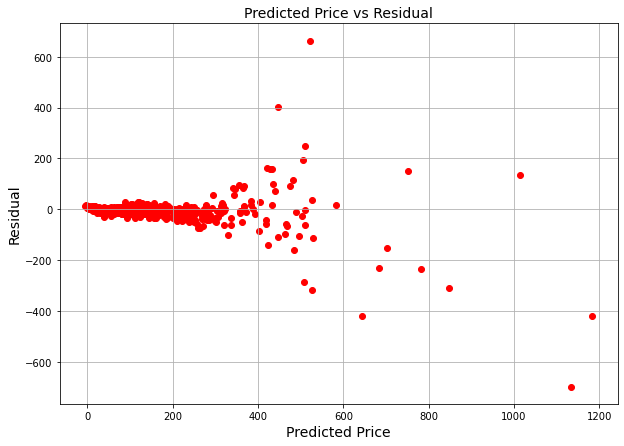

<IPython.core.display.Javascript object>

In [128]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

## XGB Regressor

In [129]:
xgbregressor = XGBRegressor(max_depth=10, learning_rate=0.1, reg_alpha=1, random_state=42)
xgbregressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [130]:
pred_train = xgbregressor.predict(X_train)
pred_test = xgbregressor.predict(X_test)

<IPython.core.display.Javascript object>

In [131]:
xgbscore_train = xgbregressor.score(X_train, y_train)
xgbscore_test = xgbregressor.score(X_test, y_test)
print(xgbscore_train)
print(xgbscore_test)

0.9999856989199485
0.8904388449458451


<IPython.core.display.Javascript object>

In [132]:
# RMSE
rmse_xgb_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_xgb_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_xgb_train)
print(rmse_xgb_test)


0.46816312233877344
38.36384273110369


<IPython.core.display.Javascript object>

In [133]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred  residual
457        38.77   38.764355  0.005645
1647      120.29  120.275925  0.014075
351       335.09  327.723755  7.366245
1667       80.14   80.278122 -0.138122
1849       60.18   60.211285 -0.031285

<IPython.core.display.Javascript object>

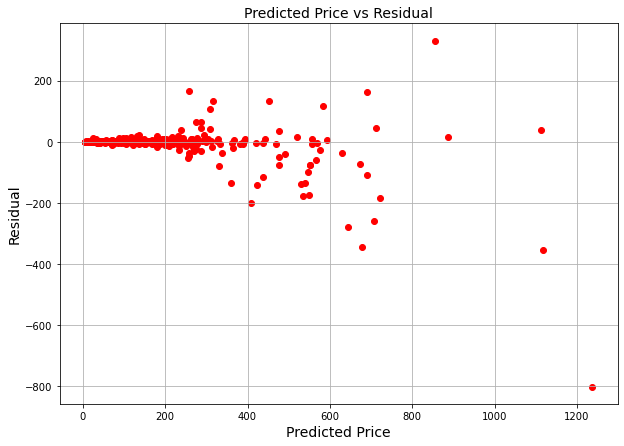

<IPython.core.display.Javascript object>

In [134]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

## Stacking Model
Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.

<img src="https://miro.medium.com/max/946/1*T-JHq4AK3dyRNi7gpn9-Xw.png" width="700" height="4000" />

In [163]:
estimators = [
    ("Gradient Boost", gradientboost),
    ("MLP", mlpregressor),
    ("Ada Boost", adaboost),
    ("Radom Forest", rfregressor),
]
final_estimator = XGBRegressor(
    max_depth=10, learning_rate=0.1, reg_alpha=10, random_state=42
)

<IPython.core.display.Javascript object>

In [164]:
stacking_estimator = StackingRegressor(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

Iteration 1, loss = 21349.34644100
Iteration 2, loss = 13179.59620516
Iteration 3, loss = 9647.34358686
Iteration 4, loss = 7930.55509264
Iteration 5, loss = 7117.45658495
Iteration 6, loss = 6735.07702016
Iteration 7, loss = 6553.04664692
Iteration 8, loss = 6464.19400538
Iteration 9, loss = 6415.07503161
Iteration 10, loss = 6370.19783557
Iteration 11, loss = 6325.98890937
Iteration 12, loss = 6282.22589223
Iteration 13, loss = 6240.71491306
Iteration 14, loss = 6196.36726941
Iteration 15, loss = 6151.81213910
Iteration 16, loss = 6106.79466575
Iteration 17, loss = 6060.92781656
Iteration 18, loss = 6013.06319761
Iteration 19, loss = 5966.20011921
Iteration 20, loss = 5915.24910860
Iteration 21, loss = 5860.72368463
Iteration 22, loss = 5802.33792446
Iteration 23, loss = 5730.53223213
Iteration 24, loss = 5647.50271712
Iteration 25, loss = 5528.37120148
Iteration 26, loss = 5287.21499496
Iteration 27, loss = 4833.02112858
Iteration 28, loss = 4498.83184337
Iteration 29, loss = 4267.9

Iteration 269, loss = 1624.48387285
Iteration 270, loss = 1616.57188329
Iteration 271, loss = 1614.20410993
Iteration 272, loss = 1606.82566667
Iteration 273, loss = 1612.33235651
Iteration 274, loss = 1605.30605408
Iteration 275, loss = 1608.94088713
Iteration 276, loss = 1613.72435622
Iteration 277, loss = 1623.29066762
Iteration 278, loss = 1613.48697972
Iteration 279, loss = 1605.12128843
Iteration 280, loss = 1602.89465875
Iteration 281, loss = 1604.90865425
Iteration 282, loss = 1592.24640580
Iteration 283, loss = 1613.48411853
Iteration 284, loss = 1608.97788920
Iteration 285, loss = 1597.61699768
Iteration 286, loss = 1594.63200826
Iteration 287, loss = 1601.81643608
Iteration 288, loss = 1610.56318987
Iteration 289, loss = 1608.09669822
Iteration 290, loss = 1598.42419649
Iteration 291, loss = 1588.97234773
Iteration 292, loss = 1583.87603296
Iteration 293, loss = 1581.48342446
Iteration 294, loss = 1585.78723734
Iteration 295, loss = 1586.96532035
Iteration 296, loss = 1585.3

Iteration 503, loss = 1431.87723107
Iteration 504, loss = 1417.66508685
Iteration 505, loss = 1424.34124468
Iteration 506, loss = 1454.51372801
Iteration 507, loss = 1437.17607597
Iteration 508, loss = 1448.96812733
Iteration 509, loss = 1433.91028304
Iteration 510, loss = 1439.94681666
Iteration 511, loss = 1421.97094179
Iteration 512, loss = 1422.07895349
Iteration 513, loss = 1413.98452291
Iteration 514, loss = 1420.36743420
Iteration 515, loss = 1415.52870706
Iteration 516, loss = 1413.96733011
Iteration 517, loss = 1422.93766301
Iteration 518, loss = 1420.65150745
Iteration 519, loss = 1414.96175853
Iteration 520, loss = 1417.67864892
Iteration 521, loss = 1427.97708085
Iteration 522, loss = 1424.97494824
Iteration 523, loss = 1473.78457043
Iteration 524, loss = 1425.74338107
Iteration 525, loss = 1442.44792459
Iteration 526, loss = 1430.79561938
Iteration 527, loss = 1404.99519154
Iteration 528, loss = 1439.11779533
Iteration 529, loss = 1406.49068967
Iteration 530, loss = 1416.9

Iteration 744, loss = 1331.53300847
Iteration 745, loss = 1337.12738135
Iteration 746, loss = 1333.02886756
Iteration 747, loss = 1336.88673328
Iteration 748, loss = 1328.07917352
Iteration 749, loss = 1333.83380239
Iteration 750, loss = 1329.80911365
Iteration 751, loss = 1325.03233473
Iteration 752, loss = 1325.73284246
Iteration 753, loss = 1340.46549832
Iteration 754, loss = 1339.05756660
Iteration 755, loss = 1328.80789650
Iteration 756, loss = 1330.33074201
Iteration 757, loss = 1343.16491830
Iteration 758, loss = 1350.78002624
Iteration 759, loss = 1315.70689285
Iteration 760, loss = 1325.17009783
Iteration 761, loss = 1326.47885946
Iteration 762, loss = 1367.82082018
Iteration 763, loss = 1328.28843933
Iteration 764, loss = 1340.74035293
Iteration 765, loss = 1335.86905904
Iteration 766, loss = 1328.90518044
Iteration 767, loss = 1328.68061308
Iteration 768, loss = 1352.38027932
Iteration 769, loss = 1354.25290453
Iteration 770, loss = 1333.06730871
Iteration 771, loss = 1324.9

Iteration 973, loss = 1241.07419878
Iteration 974, loss = 1252.68577276
Iteration 975, loss = 1241.89196173
Iteration 976, loss = 1237.23906636
Iteration 977, loss = 1238.53438647
Iteration 978, loss = 1242.76529306
Iteration 979, loss = 1234.40346523
Iteration 980, loss = 1255.37712920
Iteration 981, loss = 1236.05582158
Iteration 982, loss = 1239.81563776
Iteration 983, loss = 1235.73925630
Iteration 984, loss = 1231.84508502
Iteration 985, loss = 1238.79632280
Iteration 986, loss = 1248.83409018
Iteration 987, loss = 1234.19239872
Iteration 988, loss = 1230.83546910
Iteration 989, loss = 1235.42063338
Iteration 990, loss = 1235.66453746
Iteration 991, loss = 1223.39264888
Iteration 992, loss = 1234.04133852
Iteration 993, loss = 1244.55150855
Iteration 994, loss = 1242.54086389
Iteration 995, loss = 1238.22029107
Iteration 996, loss = 1244.52933647
Iteration 997, loss = 1226.20461279
Iteration 998, loss = 1232.77341479
Iteration 999, loss = 1231.88028031
Iteration 1000, loss = 1226.

Iteration 1206, loss = 1142.30060691
Iteration 1207, loss = 1140.78021232
Iteration 1208, loss = 1140.70259525
Iteration 1209, loss = 1133.23363477
Iteration 1210, loss = 1133.92951577
Iteration 1211, loss = 1152.25847525
Iteration 1212, loss = 1132.37007841
Iteration 1213, loss = 1137.31416395
Iteration 1214, loss = 1156.64100248
Iteration 1215, loss = 1161.91253874
Iteration 1216, loss = 1147.33140915
Iteration 1217, loss = 1135.62276024
Iteration 1218, loss = 1140.83428253
Iteration 1219, loss = 1133.11873399
Iteration 1220, loss = 1158.15992113
Iteration 1221, loss = 1133.96979605
Iteration 1222, loss = 1127.39265198
Iteration 1223, loss = 1148.51805265
Iteration 1224, loss = 1144.15911123
Iteration 1225, loss = 1124.94561086
Iteration 1226, loss = 1124.17265826
Iteration 1227, loss = 1131.64706054
Iteration 1228, loss = 1128.80951004
Iteration 1229, loss = 1124.56145322
Iteration 1230, loss = 1126.20956053
Iteration 1231, loss = 1133.76646605
Iteration 1232, loss = 1133.42835781
I

Iteration 1443, loss = 1096.07320399
Iteration 1444, loss = 1056.14880808
Iteration 1445, loss = 1051.48678692
Iteration 1446, loss = 1055.19201895
Iteration 1447, loss = 1046.60781183
Iteration 1448, loss = 1075.34280197
Iteration 1449, loss = 1071.91858063
Iteration 1450, loss = 1050.05296930
Iteration 1451, loss = 1053.73834702
Iteration 1452, loss = 1046.98360735
Iteration 1453, loss = 1041.29004753
Iteration 1454, loss = 1051.20964026
Iteration 1455, loss = 1048.24780835
Iteration 1456, loss = 1061.93466629
Iteration 1457, loss = 1100.28873398
Iteration 1458, loss = 1049.04886771
Iteration 1459, loss = 1067.73995252
Iteration 1460, loss = 1061.20704824
Iteration 1461, loss = 1067.31145006
Iteration 1462, loss = 1057.66333740
Iteration 1463, loss = 1047.57840151
Iteration 1464, loss = 1065.27914720
Iteration 1465, loss = 1070.83858937
Iteration 1466, loss = 1050.45220163
Iteration 1467, loss = 1037.51749129
Iteration 1468, loss = 1055.75006602
Iteration 1469, loss = 1052.72673211
I

Iteration 1691, loss = 936.03495169
Iteration 1692, loss = 936.07736505
Iteration 1693, loss = 964.30737751
Iteration 1694, loss = 957.14918836
Iteration 1695, loss = 978.66281571
Iteration 1696, loss = 955.36170814
Iteration 1697, loss = 935.97658907
Iteration 1698, loss = 946.24097647
Iteration 1699, loss = 949.57829427
Iteration 1700, loss = 940.30687314
Iteration 1701, loss = 962.17672696
Iteration 1702, loss = 969.03758777
Iteration 1703, loss = 949.68098443
Iteration 1704, loss = 938.13775752
Iteration 1705, loss = 949.67952684
Iteration 1706, loss = 944.53794653
Iteration 1707, loss = 933.58763281
Iteration 1708, loss = 936.34765967
Iteration 1709, loss = 959.36646430
Iteration 1710, loss = 940.19075797
Iteration 1711, loss = 938.69991413
Iteration 1712, loss = 950.39681493
Iteration 1713, loss = 959.23438599
Iteration 1714, loss = 978.17257465
Iteration 1715, loss = 947.92184138
Iteration 1716, loss = 937.89316344
Iteration 1717, loss = 928.16747810
Iteration 1718, loss = 956.1

Iteration 1944, loss = 878.75749815
Iteration 1945, loss = 902.16626520
Iteration 1946, loss = 873.66890284
Iteration 1947, loss = 898.40972522
Iteration 1948, loss = 880.97579433
Iteration 1949, loss = 920.05971408
Iteration 1950, loss = 896.10682298
Iteration 1951, loss = 887.43934191
Iteration 1952, loss = 903.44759196
Iteration 1953, loss = 905.43332956
Iteration 1954, loss = 925.71065100
Iteration 1955, loss = 922.10449792
Iteration 1956, loss = 944.01928384
Iteration 1957, loss = 902.65134664
Iteration 1958, loss = 871.67883368
Iteration 1959, loss = 896.10751802
Iteration 1960, loss = 895.03884570
Iteration 1961, loss = 882.43507703
Iteration 1962, loss = 878.43161679
Iteration 1963, loss = 876.05767706
Iteration 1964, loss = 878.05133540
Iteration 1965, loss = 879.01083885
Iteration 1966, loss = 909.52849642
Iteration 1967, loss = 901.42867993
Iteration 1968, loss = 971.88507990
Iteration 1969, loss = 881.39683354
Iteration 1970, loss = 884.27831003
Iteration 1971, loss = 887.8

Iteration 2193, loss = 887.15493120
Iteration 2194, loss = 829.75394751
Iteration 2195, loss = 876.83350555
Iteration 2196, loss = 845.26910197
Iteration 2197, loss = 836.33401345
Iteration 2198, loss = 843.72018267
Iteration 2199, loss = 841.87891750
Iteration 2200, loss = 837.24873570
Iteration 2201, loss = 822.71755824
Iteration 2202, loss = 836.11316358
Iteration 2203, loss = 851.68251395
Iteration 2204, loss = 852.44659575
Iteration 2205, loss = 853.69003850
Iteration 2206, loss = 830.65263572
Iteration 2207, loss = 832.44596102
Iteration 2208, loss = 840.34095817
Iteration 2209, loss = 830.26925292
Iteration 2210, loss = 848.51266157
Iteration 2211, loss = 839.50404024
Iteration 2212, loss = 852.55460585
Iteration 2213, loss = 873.87115489
Iteration 2214, loss = 841.01429650
Iteration 2215, loss = 843.75965146
Iteration 2216, loss = 840.95952059
Iteration 2217, loss = 832.03249878
Iteration 2218, loss = 826.16442791
Iteration 2219, loss = 828.40444531
Iteration 2220, loss = 838.6

Iteration 2445, loss = 778.09309377
Iteration 2446, loss = 783.47826902
Iteration 2447, loss = 766.12718360
Iteration 2448, loss = 784.23386954
Iteration 2449, loss = 804.90653806
Iteration 2450, loss = 772.20381058
Iteration 2451, loss = 816.66101920
Iteration 2452, loss = 767.96261810
Iteration 2453, loss = 768.78392732
Iteration 2454, loss = 773.98424215
Iteration 2455, loss = 793.03621593
Iteration 2456, loss = 759.74892110
Iteration 2457, loss = 758.23825763
Iteration 2458, loss = 771.42156206
Iteration 2459, loss = 762.38938120
Iteration 2460, loss = 807.74777701
Iteration 2461, loss = 766.00112137
Iteration 2462, loss = 783.63070570
Iteration 2463, loss = 782.19734339
Iteration 2464, loss = 803.86632924
Iteration 2465, loss = 797.41144130
Iteration 2466, loss = 812.39088090
Iteration 2467, loss = 786.47836672
Iteration 2468, loss = 767.31496344
Iteration 2469, loss = 760.86716842
Iteration 2470, loss = 767.30446599
Iteration 2471, loss = 768.69274390
Iteration 2472, loss = 758.2

Iteration 2690, loss = 741.35517951
Iteration 2691, loss = 735.06336996
Iteration 2692, loss = 720.99357425
Iteration 2693, loss = 722.57431852
Iteration 2694, loss = 731.11874015
Iteration 2695, loss = 731.39624711
Iteration 2696, loss = 810.16647779
Iteration 2697, loss = 786.06724942
Iteration 2698, loss = 728.93615202
Iteration 2699, loss = 717.80282302
Iteration 2700, loss = 725.24069005
Iteration 2701, loss = 744.91191067
Iteration 2702, loss = 725.12545538
Iteration 2703, loss = 725.19415633
Iteration 2704, loss = 758.73956625
Iteration 2705, loss = 736.31502084
Iteration 2706, loss = 712.18138339
Iteration 2707, loss = 721.69562991
Iteration 2708, loss = 731.07001877
Iteration 2709, loss = 746.54128098
Iteration 2710, loss = 744.17442412
Iteration 2711, loss = 731.74355256
Iteration 2712, loss = 759.82059750
Iteration 2713, loss = 754.96630051
Iteration 2714, loss = 741.64946504
Iteration 2715, loss = 725.67046235
Iteration 2716, loss = 746.25017345
Iteration 2717, loss = 731.1

Iteration 2919, loss = 719.81282849
Iteration 2920, loss = 779.44875994
Iteration 2921, loss = 780.72372032
Iteration 2922, loss = 710.69936951
Iteration 2923, loss = 725.09162662
Iteration 2924, loss = 699.03364325
Iteration 2925, loss = 733.20674495
Iteration 2926, loss = 759.13694468
Iteration 2927, loss = 681.80316675
Iteration 2928, loss = 693.38720018
Iteration 2929, loss = 691.96858968
Iteration 2930, loss = 707.12380524
Iteration 2931, loss = 698.88351800
Iteration 2932, loss = 795.89687948
Iteration 2933, loss = 804.31313290
Iteration 2934, loss = 707.25756331
Iteration 2935, loss = 688.74286997
Iteration 2936, loss = 695.20326099
Iteration 2937, loss = 688.25609701
Iteration 2938, loss = 683.87544314
Iteration 2939, loss = 694.35947301
Iteration 2940, loss = 710.13410455
Iteration 2941, loss = 692.93800461
Iteration 2942, loss = 695.96710512
Iteration 2943, loss = 696.66965069
Iteration 2944, loss = 687.26464963
Iteration 2945, loss = 691.01908589
Iteration 2946, loss = 704.7

Iteration 3149, loss = 673.11008772
Iteration 3150, loss = 659.16686282
Iteration 3151, loss = 698.61467040
Iteration 3152, loss = 675.84451830
Iteration 3153, loss = 679.51850993
Iteration 3154, loss = 649.33307956
Iteration 3155, loss = 678.61443952
Iteration 3156, loss = 664.63522269
Iteration 3157, loss = 675.78951390
Iteration 3158, loss = 653.45923557
Iteration 3159, loss = 677.09655527
Iteration 3160, loss = 684.11374153
Iteration 3161, loss = 727.78753750
Iteration 3162, loss = 761.42188680
Iteration 3163, loss = 738.84675023
Iteration 3164, loss = 696.54495783
Iteration 3165, loss = 666.35449931
Iteration 3166, loss = 665.29339525
Iteration 3167, loss = 696.90650154
Iteration 3168, loss = 665.88475621
Iteration 3169, loss = 662.68676188
Iteration 3170, loss = 682.90565820
Iteration 3171, loss = 673.36986559
Iteration 3172, loss = 671.31138345
Iteration 3173, loss = 657.12503252
Iteration 3174, loss = 665.62400304
Iteration 3175, loss = 696.24984940
Iteration 3176, loss = 684.1

Iteration 3381, loss = 651.24478395
Iteration 3382, loss = 655.87057425
Iteration 3383, loss = 647.92455350
Iteration 3384, loss = 653.16726362
Iteration 3385, loss = 646.41797138
Iteration 3386, loss = 687.54817618
Iteration 3387, loss = 715.31458566
Iteration 3388, loss = 695.22500759
Iteration 3389, loss = 644.71661369
Iteration 3390, loss = 653.94547603
Iteration 3391, loss = 645.96061564
Iteration 3392, loss = 639.27297798
Iteration 3393, loss = 633.00476485
Iteration 3394, loss = 632.08212520
Iteration 3395, loss = 655.75366120
Iteration 3396, loss = 667.24403405
Iteration 3397, loss = 642.54244833
Iteration 3398, loss = 660.26129448
Iteration 3399, loss = 638.08921732
Iteration 3400, loss = 651.04934959
Iteration 3401, loss = 639.76613733
Iteration 3402, loss = 650.84154469
Iteration 3403, loss = 658.09989359
Iteration 3404, loss = 659.07124990
Iteration 3405, loss = 640.19415859
Iteration 3406, loss = 642.36671885
Iteration 3407, loss = 631.15984483
Iteration 3408, loss = 658.7

Iteration 3626, loss = 652.85357623
Iteration 3627, loss = 631.87483879
Iteration 3628, loss = 639.09597029
Iteration 3629, loss = 630.04320807
Iteration 3630, loss = 635.55494931
Iteration 3631, loss = 616.49069773
Iteration 3632, loss = 614.51596512
Iteration 3633, loss = 603.47563067
Iteration 3634, loss = 619.77142923
Iteration 3635, loss = 662.91933294
Iteration 3636, loss = 654.11358631
Iteration 3637, loss = 640.28557500
Iteration 3638, loss = 608.25754129
Iteration 3639, loss = 615.24341490
Iteration 3640, loss = 625.91032659
Iteration 3641, loss = 623.15687720
Iteration 3642, loss = 640.32135889
Iteration 3643, loss = 613.45363679
Iteration 3644, loss = 619.17726707
Iteration 3645, loss = 635.16328779
Iteration 3646, loss = 616.14944927
Iteration 3647, loss = 613.72500010
Iteration 3648, loss = 606.07868982
Iteration 3649, loss = 670.86796668
Iteration 3650, loss = 658.02290515
Iteration 3651, loss = 616.46034893
Iteration 3652, loss = 625.64395450
Iteration 3653, loss = 630.5

Iteration 3886, loss = 623.30350597
Iteration 3887, loss = 627.60639106
Iteration 3888, loss = 591.44997933
Iteration 3889, loss = 613.46693611
Iteration 3890, loss = 619.21648135
Iteration 3891, loss = 613.81961108
Iteration 3892, loss = 594.37988859
Iteration 3893, loss = 579.50734519
Iteration 3894, loss = 586.41391571
Iteration 3895, loss = 585.05457201
Iteration 3896, loss = 583.51502280
Iteration 3897, loss = 574.39596148
Iteration 3898, loss = 596.94467074
Iteration 3899, loss = 594.79561969
Iteration 3900, loss = 598.14358568
Iteration 3901, loss = 591.81543355
Iteration 3902, loss = 595.18777837
Iteration 3903, loss = 612.24252037
Iteration 3904, loss = 613.82076503
Iteration 3905, loss = 616.43793389
Iteration 3906, loss = 627.84771431
Iteration 3907, loss = 614.93565895
Iteration 3908, loss = 620.04990576
Iteration 3909, loss = 631.20396686
Iteration 3910, loss = 620.85975624
Iteration 3911, loss = 582.31241280
Iteration 3912, loss = 670.76594782
Iteration 3913, loss = 601.0

Iteration 4114, loss = 573.18460243
Iteration 4115, loss = 618.36748896
Iteration 4116, loss = 616.45267218
Iteration 4117, loss = 646.22981074
Iteration 4118, loss = 621.34283457
Iteration 4119, loss = 602.29995220
Iteration 4120, loss = 561.83818136
Iteration 4121, loss = 631.73283965
Iteration 4122, loss = 608.50007990
Iteration 4123, loss = 587.99198825
Iteration 4124, loss = 587.98733242
Iteration 4125, loss = 582.29502791
Iteration 4126, loss = 567.27788279
Iteration 4127, loss = 584.90877547
Iteration 4128, loss = 580.04750923
Iteration 4129, loss = 572.27480946
Iteration 4130, loss = 584.20517235
Iteration 4131, loss = 595.38229209
Iteration 4132, loss = 592.64105266
Iteration 4133, loss = 566.15458848
Iteration 4134, loss = 617.01148239
Iteration 4135, loss = 564.13082700
Iteration 4136, loss = 561.96737939
Iteration 4137, loss = 586.28566674
Iteration 4138, loss = 593.60876087
Iteration 4139, loss = 653.03400312
Iteration 4140, loss = 600.62187914
Iteration 4141, loss = 594.5

Iteration 4342, loss = 543.69808497
Iteration 4343, loss = 546.89087260
Iteration 4344, loss = 551.30716854
Iteration 4345, loss = 546.08869287
Iteration 4346, loss = 561.93152265
Iteration 4347, loss = 545.96269047
Iteration 4348, loss = 549.81351979
Iteration 4349, loss = 547.02698981
Iteration 4350, loss = 541.00710883
Iteration 4351, loss = 552.89687024
Iteration 4352, loss = 535.26790382
Iteration 4353, loss = 550.21273874
Iteration 4354, loss = 550.38555680
Iteration 4355, loss = 543.81665174
Iteration 4356, loss = 549.22612056
Iteration 4357, loss = 571.38813881
Iteration 4358, loss = 538.25971068
Iteration 4359, loss = 541.79897737
Iteration 4360, loss = 537.53662508
Iteration 4361, loss = 564.31034472
Iteration 4362, loss = 559.20956288
Iteration 4363, loss = 570.85091618
Iteration 4364, loss = 547.54276077
Iteration 4365, loss = 559.21005700
Iteration 4366, loss = 534.88450474
Iteration 4367, loss = 557.44190249
Iteration 4368, loss = 532.12826639
Iteration 4369, loss = 546.0

Iteration 4571, loss = 523.90420041
Iteration 4572, loss = 586.44018089
Iteration 4573, loss = 530.60384830
Iteration 4574, loss = 557.22251577
Iteration 4575, loss = 603.67851060
Iteration 4576, loss = 552.93699406
Iteration 4577, loss = 551.04275629
Iteration 4578, loss = 551.34306577
Iteration 4579, loss = 539.63522816
Iteration 4580, loss = 525.21352410
Iteration 4581, loss = 524.29196797
Iteration 4582, loss = 523.73916633
Iteration 4583, loss = 524.14518675
Iteration 4584, loss = 548.11039207
Iteration 4585, loss = 519.78321415
Iteration 4586, loss = 523.75182026
Iteration 4587, loss = 531.59938309
Iteration 4588, loss = 504.65994258
Iteration 4589, loss = 543.27864385
Iteration 4590, loss = 534.06311947
Iteration 4591, loss = 568.66097197
Iteration 4592, loss = 515.20383534
Iteration 4593, loss = 520.08023951
Iteration 4594, loss = 508.24006457
Iteration 4595, loss = 518.51095032
Iteration 4596, loss = 550.75481009
Iteration 4597, loss = 513.86164356
Iteration 4598, loss = 557.1

Iteration 4806, loss = 531.34822556
Iteration 4807, loss = 558.78340066
Iteration 4808, loss = 529.41943046
Iteration 4809, loss = 536.61773531
Iteration 4810, loss = 503.46437293
Iteration 4811, loss = 500.44595991
Iteration 4812, loss = 524.96054057
Iteration 4813, loss = 512.77089060
Iteration 4814, loss = 497.39009649
Iteration 4815, loss = 505.80926306
Iteration 4816, loss = 539.51581869
Iteration 4817, loss = 557.23968413
Iteration 4818, loss = 526.51382448
Iteration 4819, loss = 518.06666913
Iteration 4820, loss = 546.81284333
Iteration 4821, loss = 521.35561781
Iteration 4822, loss = 535.31085230
Iteration 4823, loss = 500.45375169
Iteration 4824, loss = 542.17478307
Iteration 4825, loss = 544.23359506
Iteration 4826, loss = 507.98100241
Iteration 4827, loss = 520.87711471
Iteration 4828, loss = 515.77920679
Iteration 4829, loss = 501.05885667
Iteration 4830, loss = 526.18762168
Iteration 4831, loss = 526.15044978
Iteration 4832, loss = 508.92004959
Iteration 4833, loss = 505.8

Iteration 5061, loss = 500.73475598
Iteration 5062, loss = 488.43389830
Iteration 5063, loss = 522.77760494
Iteration 5064, loss = 476.52351270
Iteration 5065, loss = 518.17614647
Iteration 5066, loss = 500.86609862
Iteration 5067, loss = 502.12513443
Iteration 5068, loss = 498.93363380
Iteration 5069, loss = 525.22843655
Iteration 5070, loss = 531.25342342
Iteration 5071, loss = 511.23745671
Iteration 5072, loss = 531.74099637
Iteration 5073, loss = 509.44137491
Iteration 5074, loss = 512.65289175
Iteration 5075, loss = 527.22065670
Iteration 5076, loss = 522.82435845
Iteration 5077, loss = 479.15026107
Iteration 5078, loss = 488.96884740
Iteration 5079, loss = 493.43391716
Iteration 5080, loss = 492.36723723
Iteration 5081, loss = 532.02335460
Iteration 5082, loss = 521.26645901
Iteration 5083, loss = 489.45273129
Iteration 5084, loss = 508.34865558
Iteration 5085, loss = 493.87808168
Iteration 5086, loss = 534.01647777
Iteration 5087, loss = 497.34250315
Iteration 5088, loss = 487.3

Iteration 5313, loss = 484.70561518
Iteration 5314, loss = 478.69914849
Iteration 5315, loss = 490.12472631
Iteration 5316, loss = 489.96260816
Iteration 5317, loss = 488.99442306
Iteration 5318, loss = 477.82916208
Iteration 5319, loss = 471.98821726
Iteration 5320, loss = 473.18463476
Iteration 5321, loss = 486.18378460
Iteration 5322, loss = 471.32622373
Iteration 5323, loss = 472.55853631
Iteration 5324, loss = 484.94085299
Iteration 5325, loss = 472.78552845
Iteration 5326, loss = 484.33782068
Iteration 5327, loss = 486.99215340
Iteration 5328, loss = 501.05237322
Iteration 5329, loss = 501.65923218
Iteration 5330, loss = 496.47597824
Iteration 5331, loss = 507.18377089
Iteration 5332, loss = 470.33146276
Iteration 5333, loss = 475.79003638
Iteration 5334, loss = 478.61881724
Iteration 5335, loss = 467.48782338
Iteration 5336, loss = 486.30660193
Iteration 5337, loss = 477.57315477
Iteration 5338, loss = 485.70232974
Iteration 5339, loss = 482.35472030
Iteration 5340, loss = 489.9

Iteration 5565, loss = 505.12905032
Iteration 5566, loss = 483.31278341
Iteration 5567, loss = 468.45879232
Iteration 5568, loss = 514.45999004
Iteration 5569, loss = 502.79525254
Iteration 5570, loss = 465.23695034
Iteration 5571, loss = 467.13940386
Iteration 5572, loss = 457.36539153
Iteration 5573, loss = 465.17561428
Iteration 5574, loss = 462.65415045
Iteration 5575, loss = 473.01685059
Iteration 5576, loss = 460.12611786
Iteration 5577, loss = 464.55242719
Iteration 5578, loss = 467.71226404
Iteration 5579, loss = 493.37271262
Iteration 5580, loss = 463.54081055
Iteration 5581, loss = 480.57608632
Iteration 5582, loss = 512.11857432
Iteration 5583, loss = 518.64050905
Iteration 5584, loss = 502.34267072
Iteration 5585, loss = 490.24239007
Iteration 5586, loss = 465.13755063
Iteration 5587, loss = 522.87576174
Iteration 5588, loss = 479.41438540
Iteration 5589, loss = 510.58046251
Iteration 5590, loss = 471.70141211
Iteration 5591, loss = 458.10806598
Iteration 5592, loss = 463.4

Iteration 5813, loss = 478.21842935
Iteration 5814, loss = 465.65918604
Iteration 5815, loss = 448.16446408
Iteration 5816, loss = 459.94209060
Iteration 5817, loss = 468.44281015
Iteration 5818, loss = 508.87231961
Iteration 5819, loss = 488.04533156
Iteration 5820, loss = 463.52066010
Iteration 5821, loss = 452.92605234
Iteration 5822, loss = 470.36787187
Iteration 5823, loss = 450.19776382
Iteration 5824, loss = 461.78010930
Iteration 5825, loss = 470.32398889
Iteration 5826, loss = 455.89744761
Iteration 5827, loss = 471.76740850
Iteration 5828, loss = 486.05848424
Iteration 5829, loss = 463.25000724
Iteration 5830, loss = 459.48741518
Iteration 5831, loss = 467.98041077
Iteration 5832, loss = 523.13274238
Iteration 5833, loss = 476.90319139
Iteration 5834, loss = 525.88160674
Iteration 5835, loss = 460.97614392
Iteration 5836, loss = 452.37300816
Iteration 5837, loss = 450.96388838
Iteration 5838, loss = 462.55042335
Iteration 5839, loss = 468.81851223
Iteration 5840, loss = 480.1

Iteration 6052, loss = 497.75450029
Iteration 6053, loss = 468.18790485
Iteration 6054, loss = 454.13219400
Iteration 6055, loss = 452.52004704
Iteration 6056, loss = 451.53187897
Iteration 6057, loss = 453.62168942
Iteration 6058, loss = 455.41687733
Iteration 6059, loss = 449.58457927
Iteration 6060, loss = 484.63765855
Iteration 6061, loss = 482.27324513
Iteration 6062, loss = 494.05597998
Iteration 6063, loss = 521.60529041
Iteration 6064, loss = 512.36256632
Iteration 6065, loss = 441.09064885
Iteration 6066, loss = 466.58661928
Iteration 6067, loss = 593.95284500
Iteration 6068, loss = 469.72928128
Iteration 6069, loss = 471.62878029
Iteration 6070, loss = 452.21910051
Iteration 6071, loss = 463.01309534
Iteration 6072, loss = 469.27225467
Iteration 6073, loss = 522.73737961
Iteration 6074, loss = 465.52536233
Iteration 6075, loss = 442.57201813
Iteration 6076, loss = 458.07745751
Iteration 6077, loss = 452.42224999
Iteration 6078, loss = 448.35763503
Iteration 6079, loss = 453.8

Iteration 6294, loss = 464.35547388
Iteration 6295, loss = 479.08507931
Iteration 6296, loss = 505.51251361
Iteration 6297, loss = 485.40071582
Iteration 6298, loss = 463.49013087
Iteration 6299, loss = 436.16495047
Iteration 6300, loss = 444.92533985
Iteration 6301, loss = 458.05720155
Iteration 6302, loss = 482.74567280
Iteration 6303, loss = 444.26836479
Iteration 6304, loss = 457.91965449
Iteration 6305, loss = 435.46720784
Iteration 6306, loss = 440.41140366
Iteration 6307, loss = 462.09940646
Iteration 6308, loss = 446.30796123
Iteration 6309, loss = 502.72842723
Iteration 6310, loss = 458.38233962
Iteration 6311, loss = 430.08499045
Iteration 6312, loss = 453.86812849
Iteration 6313, loss = 485.70605187
Iteration 6314, loss = 430.78736113
Iteration 6315, loss = 446.75786769
Iteration 6316, loss = 463.18696311
Iteration 6317, loss = 491.32669079
Iteration 6318, loss = 430.44135033
Iteration 6319, loss = 445.97860409
Iteration 6320, loss = 452.37589564
Iteration 6321, loss = 431.6

Iteration 6550, loss = 435.91664797
Iteration 6551, loss = 451.26280052
Iteration 6552, loss = 443.90266073
Iteration 6553, loss = 472.58208136
Iteration 6554, loss = 576.54304620
Iteration 6555, loss = 453.53061041
Iteration 6556, loss = 449.12850707
Iteration 6557, loss = 455.19523201
Iteration 6558, loss = 450.07094448
Iteration 6559, loss = 439.22920998
Iteration 6560, loss = 440.70837384
Iteration 6561, loss = 444.94207432
Iteration 6562, loss = 500.13457747
Iteration 6563, loss = 443.33485209
Iteration 6564, loss = 450.19463331
Iteration 6565, loss = 438.19431804
Iteration 6566, loss = 463.86988932
Iteration 6567, loss = 451.44382995
Iteration 6568, loss = 535.63114820
Iteration 6569, loss = 468.32105732
Iteration 6570, loss = 434.78869730
Iteration 6571, loss = 432.43567098
Iteration 6572, loss = 427.05412042
Iteration 6573, loss = 442.80649736
Iteration 6574, loss = 465.71952395
Iteration 6575, loss = 451.03485298
Iteration 6576, loss = 457.83573789
Iteration 6577, loss = 464.8

Iteration 6778, loss = 453.21332967
Iteration 6779, loss = 439.64376994
Iteration 6780, loss = 419.92330163
Iteration 6781, loss = 427.62196371
Iteration 6782, loss = 474.60119330
Iteration 6783, loss = 443.09529655
Iteration 6784, loss = 431.56588690
Iteration 6785, loss = 437.19406151
Iteration 6786, loss = 442.76042290
Iteration 6787, loss = 429.09877680
Iteration 6788, loss = 443.66111309
Iteration 6789, loss = 459.98695009
Iteration 6790, loss = 439.68201724
Iteration 6791, loss = 480.65350133
Iteration 6792, loss = 432.26169554
Iteration 6793, loss = 424.30695503
Iteration 6794, loss = 428.11345246
Iteration 6795, loss = 439.08314355
Iteration 6796, loss = 424.23595336
Iteration 6797, loss = 433.87476653
Iteration 6798, loss = 544.84199309
Iteration 6799, loss = 520.72924201
Iteration 6800, loss = 499.81885211
Iteration 6801, loss = 492.15416575
Iteration 6802, loss = 623.68840792
Iteration 6803, loss = 518.64690807
Iteration 6804, loss = 447.35099250
Iteration 6805, loss = 473.5

Iteration 7037, loss = 431.05389137
Iteration 7038, loss = 455.11960826
Iteration 7039, loss = 567.48139578
Iteration 7040, loss = 497.23102047
Iteration 7041, loss = 423.45643438
Iteration 7042, loss = 427.16658962
Iteration 7043, loss = 444.37755798
Iteration 7044, loss = 437.51938779
Iteration 7045, loss = 430.95171897
Iteration 7046, loss = 465.77112404
Iteration 7047, loss = 434.65992219
Iteration 7048, loss = 448.55385422
Iteration 7049, loss = 426.89737738
Iteration 7050, loss = 420.67514530
Iteration 7051, loss = 434.66402298
Iteration 7052, loss = 417.43812458
Iteration 7053, loss = 414.48925517
Iteration 7054, loss = 421.28263670
Iteration 7055, loss = 483.88094166
Iteration 7056, loss = 435.53424256
Iteration 7057, loss = 465.84951396
Iteration 7058, loss = 466.12505354
Iteration 7059, loss = 439.79004307
Iteration 7060, loss = 438.16940762
Iteration 7061, loss = 431.77542059
Iteration 7062, loss = 422.24581516
Iteration 7063, loss = 438.15648349
Iteration 7064, loss = 421.9

Iteration 7280, loss = 420.97497050
Iteration 7281, loss = 430.45305756
Iteration 7282, loss = 419.29064818
Iteration 7283, loss = 427.04460769
Iteration 7284, loss = 416.55585406
Iteration 7285, loss = 436.42312453
Iteration 7286, loss = 446.69465492
Iteration 7287, loss = 430.14492193
Iteration 7288, loss = 434.64247317
Iteration 7289, loss = 411.80028514
Iteration 7290, loss = 429.73010760
Iteration 7291, loss = 460.78405833
Iteration 7292, loss = 444.91084095
Iteration 7293, loss = 412.04619548
Iteration 7294, loss = 428.06415948
Iteration 7295, loss = 432.41122924
Iteration 7296, loss = 416.72600877
Iteration 7297, loss = 412.81111278
Iteration 7298, loss = 414.55874271
Iteration 7299, loss = 421.38953295
Iteration 7300, loss = 413.27270621
Iteration 7301, loss = 433.26769129
Iteration 7302, loss = 439.89689577
Iteration 7303, loss = 418.05750375
Iteration 7304, loss = 431.45093116
Iteration 7305, loss = 425.55260459
Iteration 7306, loss = 426.00692580
Iteration 7307, loss = 421.1

Iteration 7539, loss = 430.70821939
Iteration 7540, loss = 419.33997029
Iteration 7541, loss = 427.64188795
Iteration 7542, loss = 421.10713793
Iteration 7543, loss = 434.55317257
Iteration 7544, loss = 421.93883877
Iteration 7545, loss = 412.39336203
Iteration 7546, loss = 418.01698760
Iteration 7547, loss = 422.26754378
Iteration 7548, loss = 427.16231207
Iteration 7549, loss = 422.32506620
Iteration 7550, loss = 430.16431643
Iteration 7551, loss = 416.39896360
Iteration 7552, loss = 417.27276727
Iteration 7553, loss = 414.78695358
Iteration 7554, loss = 413.87432641
Iteration 7555, loss = 432.26800986
Iteration 7556, loss = 435.10602881
Iteration 7557, loss = 414.23890763
Iteration 7558, loss = 409.63486199
Iteration 7559, loss = 410.74853501
Iteration 7560, loss = 408.27535831
Iteration 7561, loss = 412.92350645
Iteration 7562, loss = 424.54252365
Iteration 7563, loss = 411.77571584
Iteration 7564, loss = 425.59009951
Iteration 7565, loss = 419.05839502
Iteration 7566, loss = 441.7

Iteration 7793, loss = 419.06107137
Iteration 7794, loss = 407.20377690
Iteration 7795, loss = 482.14805667
Iteration 7796, loss = 493.19143637
Iteration 7797, loss = 440.74700292
Iteration 7798, loss = 431.08720091
Iteration 7799, loss = 407.68792836
Iteration 7800, loss = 420.88556105
Iteration 7801, loss = 405.77215662
Iteration 7802, loss = 435.40243321
Iteration 7803, loss = 409.18650660
Iteration 7804, loss = 414.05766614
Iteration 7805, loss = 433.56966846
Iteration 7806, loss = 419.02288031
Iteration 7807, loss = 398.61679698
Iteration 7808, loss = 405.37461074
Iteration 7809, loss = 423.41949357
Iteration 7810, loss = 425.01798784
Iteration 7811, loss = 423.44165140
Iteration 7812, loss = 418.37233577
Iteration 7813, loss = 467.03155610
Iteration 7814, loss = 415.72235286
Iteration 7815, loss = 407.69162829
Iteration 7816, loss = 403.41226422
Iteration 7817, loss = 438.45454173
Iteration 7818, loss = 404.60418738
Iteration 7819, loss = 426.39722613
Iteration 7820, loss = 410.5

Iteration 8050, loss = 408.26662633
Iteration 8051, loss = 477.99314590
Iteration 8052, loss = 435.19476910
Iteration 8053, loss = 426.12448848
Iteration 8054, loss = 424.21504717
Iteration 8055, loss = 419.55307747
Iteration 8056, loss = 438.39300350
Iteration 8057, loss = 409.71609075
Iteration 8058, loss = 440.30212889
Iteration 8059, loss = 407.46301028
Iteration 8060, loss = 427.08407180
Iteration 8061, loss = 433.51024521
Iteration 8062, loss = 411.67113600
Iteration 8063, loss = 432.42589323
Iteration 8064, loss = 459.71999320
Iteration 8065, loss = 546.60332561
Iteration 8066, loss = 416.57619027
Iteration 8067, loss = 464.72407016
Iteration 8068, loss = 434.20606933
Iteration 8069, loss = 480.28984192
Iteration 8070, loss = 432.11937825
Iteration 8071, loss = 399.92890982
Iteration 8072, loss = 405.93532656
Iteration 8073, loss = 428.15502433
Iteration 8074, loss = 408.53128411
Iteration 8075, loss = 407.34128021
Iteration 8076, loss = 406.51715738
Iteration 8077, loss = 407.4

Iteration 8296, loss = 419.78043515
Iteration 8297, loss = 391.10851624
Iteration 8298, loss = 407.05519067
Iteration 8299, loss = 398.62195553
Iteration 8300, loss = 407.94740980
Iteration 8301, loss = 446.63027067
Iteration 8302, loss = 489.46501358
Iteration 8303, loss = 489.77034772
Iteration 8304, loss = 421.42345881
Iteration 8305, loss = 418.12106078
Iteration 8306, loss = 407.82332201
Iteration 8307, loss = 396.78570256
Iteration 8308, loss = 410.07425364
Iteration 8309, loss = 421.00998027
Iteration 8310, loss = 405.32625177
Iteration 8311, loss = 423.54018170
Iteration 8312, loss = 444.05224159
Iteration 8313, loss = 488.20077548
Iteration 8314, loss = 398.35278774
Iteration 8315, loss = 400.21985834
Iteration 8316, loss = 427.29082313
Iteration 8317, loss = 403.82987652
Iteration 8318, loss = 398.45666218
Iteration 8319, loss = 409.83447892
Iteration 8320, loss = 399.08259555
Iteration 8321, loss = 396.92969991
Iteration 8322, loss = 401.64808385
Iteration 8323, loss = 406.4

Iteration 8557, loss = 413.33272096
Iteration 8558, loss = 404.65329126
Iteration 8559, loss = 410.58980689
Iteration 8560, loss = 430.92789482
Iteration 8561, loss = 412.68202852
Iteration 8562, loss = 419.32500834
Iteration 8563, loss = 401.07546580
Iteration 8564, loss = 394.04372371
Iteration 8565, loss = 427.68221673
Iteration 8566, loss = 484.96170085
Iteration 8567, loss = 426.54058487
Iteration 8568, loss = 478.73345677
Iteration 8569, loss = 440.73709646
Iteration 8570, loss = 396.95746487
Iteration 8571, loss = 435.20504331
Iteration 8572, loss = 437.80319620
Iteration 8573, loss = 434.59832861
Iteration 8574, loss = 402.10006830
Iteration 8575, loss = 391.48038778
Iteration 8576, loss = 432.55506756
Iteration 8577, loss = 398.19949132
Iteration 8578, loss = 393.35083503
Iteration 8579, loss = 410.60587667
Iteration 8580, loss = 423.91652950
Iteration 8581, loss = 431.32729219
Iteration 8582, loss = 440.62323185
Iteration 8583, loss = 401.23069490
Iteration 8584, loss = 451.0

Iteration 8785, loss = 412.83250896
Iteration 8786, loss = 409.03509244
Iteration 8787, loss = 427.16800934
Iteration 8788, loss = 425.00366901
Iteration 8789, loss = 395.68257685
Iteration 8790, loss = 395.89676169
Iteration 8791, loss = 435.22936555
Iteration 8792, loss = 401.54950157
Iteration 8793, loss = 409.94624203
Iteration 8794, loss = 420.14246355
Iteration 8795, loss = 427.42230474
Iteration 8796, loss = 400.13923861
Iteration 8797, loss = 399.20920433
Iteration 8798, loss = 406.32297769
Iteration 8799, loss = 395.93182568
Iteration 8800, loss = 400.01984805
Iteration 8801, loss = 401.16470376
Iteration 8802, loss = 404.57937746
Iteration 8803, loss = 385.16804428
Iteration 8804, loss = 407.35965870
Iteration 8805, loss = 399.89244548
Iteration 8806, loss = 419.10942134
Iteration 8807, loss = 417.87022627
Iteration 8808, loss = 402.62766193
Iteration 8809, loss = 404.17346093
Iteration 8810, loss = 406.82937405
Iteration 8811, loss = 394.93223372
Iteration 8812, loss = 418.9

Iteration 9016, loss = 463.48943842
Iteration 9017, loss = 394.04314499
Iteration 9018, loss = 383.95156124
Iteration 9019, loss = 393.09989759
Iteration 9020, loss = 391.04760525
Iteration 9021, loss = 392.22034000
Iteration 9022, loss = 390.28419625
Iteration 9023, loss = 412.26913970
Iteration 9024, loss = 400.87074496
Iteration 9025, loss = 396.87697972
Iteration 9026, loss = 407.36455768
Iteration 9027, loss = 412.23436594
Iteration 9028, loss = 430.78118596
Iteration 9029, loss = 406.75393416
Iteration 9030, loss = 419.71218881
Iteration 9031, loss = 419.16248207
Iteration 9032, loss = 426.18711748
Iteration 9033, loss = 398.67871077
Iteration 9034, loss = 409.77806726
Iteration 9035, loss = 383.35137637
Iteration 9036, loss = 394.59450825
Iteration 9037, loss = 402.82828447
Iteration 9038, loss = 393.59314107
Iteration 9039, loss = 396.24476961
Iteration 9040, loss = 379.69337195
Iteration 9041, loss = 424.64785320
Iteration 9042, loss = 411.40826297
Iteration 9043, loss = 407.5

Iteration 9244, loss = 419.14623664
Iteration 9245, loss = 409.15757539
Iteration 9246, loss = 436.13853643
Iteration 9247, loss = 407.42220819
Iteration 9248, loss = 435.60282513
Iteration 9249, loss = 405.99719816
Iteration 9250, loss = 416.30169894
Iteration 9251, loss = 390.44749181
Iteration 9252, loss = 417.31408076
Iteration 9253, loss = 392.92643624
Iteration 9254, loss = 394.25681973
Iteration 9255, loss = 393.51084920
Iteration 9256, loss = 392.11504333
Iteration 9257, loss = 399.02430781
Iteration 9258, loss = 412.88566990
Iteration 9259, loss = 392.29463514
Iteration 9260, loss = 417.07012977
Iteration 9261, loss = 442.35846145
Iteration 9262, loss = 431.15021974
Iteration 9263, loss = 399.16610839
Iteration 9264, loss = 450.96268019
Iteration 9265, loss = 463.95133940
Iteration 9266, loss = 423.08979940
Iteration 9267, loss = 423.47126417
Iteration 9268, loss = 393.48780274
Iteration 9269, loss = 398.18854218
Iteration 9270, loss = 383.00245440
Iteration 9271, loss = 389.2

Iteration 9472, loss = 388.56732306
Iteration 9473, loss = 384.57249407
Iteration 9474, loss = 395.83462108
Iteration 9475, loss = 410.46542474
Iteration 9476, loss = 404.10264513
Iteration 9477, loss = 385.05450386
Iteration 9478, loss = 384.98859117
Iteration 9479, loss = 410.71278150
Iteration 9480, loss = 413.64868389
Iteration 9481, loss = 429.41378018
Iteration 9482, loss = 414.82420141
Iteration 9483, loss = 511.87811908
Iteration 9484, loss = 402.70364175
Iteration 9485, loss = 464.16623447
Iteration 9486, loss = 414.85027789
Iteration 9487, loss = 388.85842118
Iteration 9488, loss = 388.68980180
Iteration 9489, loss = 384.61058591
Iteration 9490, loss = 411.86629191
Iteration 9491, loss = 391.42650635
Iteration 9492, loss = 432.85207358
Iteration 9493, loss = 394.92136676
Iteration 9494, loss = 400.46416422
Iteration 9495, loss = 389.58729207
Iteration 9496, loss = 390.10399538
Iteration 9497, loss = 389.19354278
Iteration 9498, loss = 403.13371193
Iteration 9499, loss = 401.9

Iteration 9700, loss = 411.27659715
Iteration 9701, loss = 447.46779864
Iteration 9702, loss = 400.82072182
Iteration 9703, loss = 396.13568293
Iteration 9704, loss = 401.14155694
Iteration 9705, loss = 391.24338763
Iteration 9706, loss = 386.11951710
Iteration 9707, loss = 389.66597308
Iteration 9708, loss = 402.15536347
Iteration 9709, loss = 383.37805096
Iteration 9710, loss = 397.02975279
Iteration 9711, loss = 385.56850575
Iteration 9712, loss = 387.13636317
Iteration 9713, loss = 387.24636223
Iteration 9714, loss = 388.44338652
Iteration 9715, loss = 383.88843232
Iteration 9716, loss = 381.26057624
Iteration 9717, loss = 377.63764082
Iteration 9718, loss = 384.03257805
Iteration 9719, loss = 383.72677829
Iteration 9720, loss = 386.19682747
Iteration 9721, loss = 395.84519403
Iteration 9722, loss = 392.43759781
Iteration 9723, loss = 376.92308428
Iteration 9724, loss = 401.86058332
Iteration 9725, loss = 418.66893236
Iteration 9726, loss = 395.27181182
Iteration 9727, loss = 415.2

Iteration 9958, loss = 394.69045764
Iteration 9959, loss = 400.99911248
Iteration 9960, loss = 379.71766293
Iteration 9961, loss = 374.99256963
Iteration 9962, loss = 375.60387530
Iteration 9963, loss = 397.91329980
Iteration 9964, loss = 406.97760641
Iteration 9965, loss = 413.51125717
Iteration 9966, loss = 401.09968102
Iteration 9967, loss = 403.47910381
Iteration 9968, loss = 425.13085063
Iteration 9969, loss = 403.01299707
Iteration 9970, loss = 451.87885152
Iteration 9971, loss = 393.66491327
Iteration 9972, loss = 384.01058730
Iteration 9973, loss = 373.63546188
Iteration 9974, loss = 394.88586299
Iteration 9975, loss = 391.34405689
Iteration 9976, loss = 429.05936352
Iteration 9977, loss = 384.59250641
Iteration 9978, loss = 421.44431401
Iteration 9979, loss = 408.69607135
Iteration 9980, loss = 394.13362761
Iteration 9981, loss = 390.62279073
Iteration 9982, loss = 384.98838893
Iteration 9983, loss = 425.58199500
Iteration 9984, loss = 399.94330463
Iteration 9985, loss = 384.6

Iteration 10190, loss = 392.55279885
Iteration 10191, loss = 488.21378481
Iteration 10192, loss = 399.94338742
Iteration 10193, loss = 398.34466872
Iteration 10194, loss = 384.32622727
Iteration 10195, loss = 384.08192529
Iteration 10196, loss = 421.09585770
Iteration 10197, loss = 388.38821309
Iteration 10198, loss = 384.49167971
Iteration 10199, loss = 376.45606209
Iteration 10200, loss = 378.94131682
Iteration 10201, loss = 378.46679220
Iteration 10202, loss = 392.53595458
Iteration 10203, loss = 402.32338546
Iteration 10204, loss = 504.17351660
Iteration 10205, loss = 390.86379270
Iteration 10206, loss = 376.94767501
Iteration 10207, loss = 414.44485383
Iteration 10208, loss = 440.10688754
Iteration 10209, loss = 416.85430852
Iteration 10210, loss = 421.69297052
Iteration 10211, loss = 419.36820023
Iteration 10212, loss = 398.14607253
Iteration 10213, loss = 401.97387790
Iteration 10214, loss = 471.16548608
Iteration 10215, loss = 400.06448195
Iteration 10216, loss = 425.08758161
T

Iteration 208, loss = 1601.47172018
Iteration 209, loss = 1615.76943863
Iteration 210, loss = 1595.45772832
Iteration 211, loss = 1587.99379302
Iteration 212, loss = 1587.64511587
Iteration 213, loss = 1586.27966547
Iteration 214, loss = 1587.94791585
Iteration 215, loss = 1580.48515032
Iteration 216, loss = 1580.72177644
Iteration 217, loss = 1590.48803043
Iteration 218, loss = 1578.95143800
Iteration 219, loss = 1571.85894173
Iteration 220, loss = 1572.67833802
Iteration 221, loss = 1570.73609485
Iteration 222, loss = 1570.68928745
Iteration 223, loss = 1562.94365092
Iteration 224, loss = 1562.53131764
Iteration 225, loss = 1571.95003646
Iteration 226, loss = 1583.10226416
Iteration 227, loss = 1591.66982808
Iteration 228, loss = 1588.36119744
Iteration 229, loss = 1576.36587007
Iteration 230, loss = 1558.03881454
Iteration 231, loss = 1557.19099542
Iteration 232, loss = 1552.18745131
Iteration 233, loss = 1560.04050063
Iteration 234, loss = 1573.59970839
Iteration 235, loss = 1555.2

Iteration 462, loss = 1323.80096453
Iteration 463, loss = 1317.36396956
Iteration 464, loss = 1308.86230443
Iteration 465, loss = 1311.76967327
Iteration 466, loss = 1316.43876310
Iteration 467, loss = 1307.46894394
Iteration 468, loss = 1318.33310280
Iteration 469, loss = 1307.33054169
Iteration 470, loss = 1317.29504223
Iteration 471, loss = 1317.29810825
Iteration 472, loss = 1313.43652851
Iteration 473, loss = 1316.05575495
Iteration 474, loss = 1314.70060691
Iteration 475, loss = 1314.95704019
Iteration 476, loss = 1310.98504518
Iteration 477, loss = 1308.53612264
Iteration 478, loss = 1303.32315107
Iteration 479, loss = 1304.73068361
Iteration 480, loss = 1311.13920633
Iteration 481, loss = 1311.70249919
Iteration 482, loss = 1303.79599197
Iteration 483, loss = 1302.75176776
Iteration 484, loss = 1298.62460439
Iteration 485, loss = 1302.35762535
Iteration 486, loss = 1308.73893254
Iteration 487, loss = 1306.03210240
Iteration 488, loss = 1308.46631763
Iteration 489, loss = 1304.2

Iteration 699, loss = 1240.25963337
Iteration 700, loss = 1226.09847011
Iteration 701, loss = 1232.03127975
Iteration 702, loss = 1235.12484877
Iteration 703, loss = 1243.34572540
Iteration 704, loss = 1242.64368449
Iteration 705, loss = 1231.55540887
Iteration 706, loss = 1223.58360986
Iteration 707, loss = 1227.34648665
Iteration 708, loss = 1233.42776554
Iteration 709, loss = 1218.81102741
Iteration 710, loss = 1229.58961050
Iteration 711, loss = 1230.83749709
Iteration 712, loss = 1221.65271552
Iteration 713, loss = 1220.22821368
Iteration 714, loss = 1233.07672947
Iteration 715, loss = 1234.01553602
Iteration 716, loss = 1228.33218919
Iteration 717, loss = 1224.41073709
Iteration 718, loss = 1221.94021213
Iteration 719, loss = 1218.15484737
Iteration 720, loss = 1220.42865745
Iteration 721, loss = 1217.28510716
Iteration 722, loss = 1218.82412245
Iteration 723, loss = 1240.08221669
Iteration 724, loss = 1225.89516759
Iteration 725, loss = 1217.92025274
Iteration 726, loss = 1222.4

Iteration 931, loss = 1149.61277699
Iteration 932, loss = 1154.00806732
Iteration 933, loss = 1149.62487900
Iteration 934, loss = 1139.32664947
Iteration 935, loss = 1143.97152935
Iteration 936, loss = 1145.51621351
Iteration 937, loss = 1133.25577066
Iteration 938, loss = 1144.68883904
Iteration 939, loss = 1141.10188016
Iteration 940, loss = 1149.39678931
Iteration 941, loss = 1139.61314522
Iteration 942, loss = 1134.08981163
Iteration 943, loss = 1143.05710456
Iteration 944, loss = 1147.96889374
Iteration 945, loss = 1133.11787940
Iteration 946, loss = 1143.45879819
Iteration 947, loss = 1141.70513524
Iteration 948, loss = 1144.91914221
Iteration 949, loss = 1140.46997247
Iteration 950, loss = 1141.34158043
Iteration 951, loss = 1130.99691716
Iteration 952, loss = 1131.45073917
Iteration 953, loss = 1135.35652730
Iteration 954, loss = 1137.76263154
Iteration 955, loss = 1140.15631652
Iteration 956, loss = 1154.11065531
Iteration 957, loss = 1144.30466588
Iteration 958, loss = 1146.3

Iteration 1183, loss = 1058.77201251
Iteration 1184, loss = 1056.79889433
Iteration 1185, loss = 1046.82288231
Iteration 1186, loss = 1038.00139197
Iteration 1187, loss = 1044.03473828
Iteration 1188, loss = 1043.94669471
Iteration 1189, loss = 1036.96711987
Iteration 1190, loss = 1031.67438302
Iteration 1191, loss = 1038.88115918
Iteration 1192, loss = 1036.73657801
Iteration 1193, loss = 1039.33126266
Iteration 1194, loss = 1043.56766898
Iteration 1195, loss = 1071.07768651
Iteration 1196, loss = 1037.42243497
Iteration 1197, loss = 1043.70212415
Iteration 1198, loss = 1041.68944240
Iteration 1199, loss = 1053.24832052
Iteration 1200, loss = 1046.78248814
Iteration 1201, loss = 1048.21048749
Iteration 1202, loss = 1048.56675236
Iteration 1203, loss = 1047.09150247
Iteration 1204, loss = 1031.48398756
Iteration 1205, loss = 1034.14061475
Iteration 1206, loss = 1047.19172632
Iteration 1207, loss = 1046.17106160
Iteration 1208, loss = 1040.92805934
Iteration 1209, loss = 1028.07955559
I

Iteration 1422, loss = 967.94940177
Iteration 1423, loss = 971.34235065
Iteration 1424, loss = 963.07512843
Iteration 1425, loss = 957.25495427
Iteration 1426, loss = 977.13443948
Iteration 1427, loss = 950.81508299
Iteration 1428, loss = 955.30557820
Iteration 1429, loss = 947.15232747
Iteration 1430, loss = 965.50562681
Iteration 1431, loss = 957.31034434
Iteration 1432, loss = 940.99526375
Iteration 1433, loss = 948.85277136
Iteration 1434, loss = 960.66317336
Iteration 1435, loss = 938.94854700
Iteration 1436, loss = 948.64828884
Iteration 1437, loss = 961.64683798
Iteration 1438, loss = 946.17856395
Iteration 1439, loss = 952.53657447
Iteration 1440, loss = 947.13056372
Iteration 1441, loss = 944.48278052
Iteration 1442, loss = 938.70808357
Iteration 1443, loss = 938.92067112
Iteration 1444, loss = 945.32704685
Iteration 1445, loss = 959.35424758
Iteration 1446, loss = 941.02785541
Iteration 1447, loss = 956.66054016
Iteration 1448, loss = 941.78372684
Iteration 1449, loss = 941.7

Iteration 1686, loss = 875.46515312
Iteration 1687, loss = 870.47369584
Iteration 1688, loss = 874.30141128
Iteration 1689, loss = 894.96500978
Iteration 1690, loss = 895.40327317
Iteration 1691, loss = 884.74602835
Iteration 1692, loss = 888.04156001
Iteration 1693, loss = 864.74549722
Iteration 1694, loss = 881.33321773
Iteration 1695, loss = 870.88346263
Iteration 1696, loss = 865.61384492
Iteration 1697, loss = 877.11252711
Iteration 1698, loss = 875.76718636
Iteration 1699, loss = 862.34569996
Iteration 1700, loss = 919.28459627
Iteration 1701, loss = 882.86650990
Iteration 1702, loss = 867.27465149
Iteration 1703, loss = 879.28180650
Iteration 1704, loss = 877.10537769
Iteration 1705, loss = 861.80508188
Iteration 1706, loss = 877.26924857
Iteration 1707, loss = 874.10173702
Iteration 1708, loss = 858.38161377
Iteration 1709, loss = 861.14923799
Iteration 1710, loss = 866.82957160
Iteration 1711, loss = 859.80796295
Iteration 1712, loss = 878.58304217
Iteration 1713, loss = 873.9

Iteration 1930, loss = 821.08862638
Iteration 1931, loss = 810.92547210
Iteration 1932, loss = 814.51964568
Iteration 1933, loss = 810.18523584
Iteration 1934, loss = 816.68667073
Iteration 1935, loss = 826.93134290
Iteration 1936, loss = 811.76827358
Iteration 1937, loss = 821.28798930
Iteration 1938, loss = 834.02191018
Iteration 1939, loss = 807.00121456
Iteration 1940, loss = 817.04014224
Iteration 1941, loss = 820.58417551
Iteration 1942, loss = 830.39304620
Iteration 1943, loss = 795.63754009
Iteration 1944, loss = 815.28347572
Iteration 1945, loss = 806.38130441
Iteration 1946, loss = 811.37198125
Iteration 1947, loss = 802.11447315
Iteration 1948, loss = 815.53331464
Iteration 1949, loss = 799.44972431
Iteration 1950, loss = 813.54485372
Iteration 1951, loss = 809.87297843
Iteration 1952, loss = 857.00224057
Iteration 1953, loss = 830.44997215
Iteration 1954, loss = 843.35952684
Iteration 1955, loss = 811.05937016
Iteration 1956, loss = 800.38095150
Iteration 1957, loss = 805.9

Iteration 2178, loss = 777.45287031
Iteration 2179, loss = 768.19319736
Iteration 2180, loss = 792.28490808
Iteration 2181, loss = 754.26240905
Iteration 2182, loss = 781.26373203
Iteration 2183, loss = 789.16065692
Iteration 2184, loss = 758.05003887
Iteration 2185, loss = 770.85548138
Iteration 2186, loss = 756.00819563
Iteration 2187, loss = 778.53505738
Iteration 2188, loss = 766.54446861
Iteration 2189, loss = 757.14554718
Iteration 2190, loss = 783.29883065
Iteration 2191, loss = 753.39959948
Iteration 2192, loss = 771.54927859
Iteration 2193, loss = 755.61850617
Iteration 2194, loss = 775.66579909
Iteration 2195, loss = 778.75669751
Iteration 2196, loss = 794.73597401
Iteration 2197, loss = 785.48684574
Iteration 2198, loss = 754.79957029
Iteration 2199, loss = 756.68124748
Iteration 2200, loss = 762.87205126
Iteration 2201, loss = 784.47425667
Iteration 2202, loss = 798.36434639
Iteration 2203, loss = 788.43245554
Iteration 2204, loss = 768.95354382
Iteration 2205, loss = 777.9

Iteration 2424, loss = 734.66428943
Iteration 2425, loss = 739.12949496
Iteration 2426, loss = 730.95592737
Iteration 2427, loss = 725.75425518
Iteration 2428, loss = 732.94173561
Iteration 2429, loss = 725.25208837
Iteration 2430, loss = 718.64994926
Iteration 2431, loss = 717.16963500
Iteration 2432, loss = 743.25103234
Iteration 2433, loss = 736.19695061
Iteration 2434, loss = 728.97364479
Iteration 2435, loss = 729.99861458
Iteration 2436, loss = 743.60323476
Iteration 2437, loss = 736.27121150
Iteration 2438, loss = 713.26517306
Iteration 2439, loss = 723.98959493
Iteration 2440, loss = 722.02922384
Iteration 2441, loss = 723.61144486
Iteration 2442, loss = 731.67335783
Iteration 2443, loss = 723.88822380
Iteration 2444, loss = 732.77040766
Iteration 2445, loss = 727.05676201
Iteration 2446, loss = 718.81039587
Iteration 2447, loss = 715.31180438
Iteration 2448, loss = 722.71723670
Iteration 2449, loss = 747.36450332
Iteration 2450, loss = 742.78576149
Iteration 2451, loss = 727.5

Iteration 2655, loss = 707.42240630
Iteration 2656, loss = 705.01825808
Iteration 2657, loss = 685.23785321
Iteration 2658, loss = 700.52670782
Iteration 2659, loss = 682.58187608
Iteration 2660, loss = 706.85938920
Iteration 2661, loss = 741.35107269
Iteration 2662, loss = 705.63263646
Iteration 2663, loss = 723.61650595
Iteration 2664, loss = 678.73527814
Iteration 2665, loss = 728.17149083
Iteration 2666, loss = 692.11869512
Iteration 2667, loss = 694.02189995
Iteration 2668, loss = 698.59381691
Iteration 2669, loss = 733.50839197
Iteration 2670, loss = 709.26058125
Iteration 2671, loss = 690.36085107
Iteration 2672, loss = 712.37344598
Iteration 2673, loss = 707.19743356
Iteration 2674, loss = 708.08649821
Iteration 2675, loss = 695.32098798
Iteration 2676, loss = 697.99673532
Iteration 2677, loss = 701.59163769
Iteration 2678, loss = 713.28514330
Iteration 2679, loss = 699.86597582
Iteration 2680, loss = 710.56501388
Iteration 2681, loss = 697.39393564
Iteration 2682, loss = 704.3

Iteration 2901, loss = 662.28452600
Iteration 2902, loss = 673.83518937
Iteration 2903, loss = 683.01094188
Iteration 2904, loss = 684.83558895
Iteration 2905, loss = 674.50238171
Iteration 2906, loss = 652.18407518
Iteration 2907, loss = 662.81478222
Iteration 2908, loss = 672.56273838
Iteration 2909, loss = 661.19424745
Iteration 2910, loss = 682.58980590
Iteration 2911, loss = 669.42436436
Iteration 2912, loss = 677.15991736
Iteration 2913, loss = 661.51538902
Iteration 2914, loss = 669.99787215
Iteration 2915, loss = 679.24804438
Iteration 2916, loss = 667.54713807
Iteration 2917, loss = 654.34488430
Iteration 2918, loss = 676.80954572
Iteration 2919, loss = 668.18060048
Iteration 2920, loss = 689.13935395
Iteration 2921, loss = 652.24301846
Iteration 2922, loss = 669.36949031
Iteration 2923, loss = 657.10214010
Iteration 2924, loss = 683.19782359
Iteration 2925, loss = 667.69166532
Iteration 2926, loss = 654.43210071
Iteration 2927, loss = 653.87862338
Iteration 2928, loss = 677.4

Iteration 3147, loss = 654.49043674
Iteration 3148, loss = 654.02652968
Iteration 3149, loss = 643.58593485
Iteration 3150, loss = 634.40219315
Iteration 3151, loss = 632.20586445
Iteration 3152, loss = 656.90810590
Iteration 3153, loss = 626.69438113
Iteration 3154, loss = 633.54788129
Iteration 3155, loss = 633.31361624
Iteration 3156, loss = 646.68857608
Iteration 3157, loss = 626.23219342
Iteration 3158, loss = 646.33430213
Iteration 3159, loss = 633.51762952
Iteration 3160, loss = 630.32269665
Iteration 3161, loss = 636.52325379
Iteration 3162, loss = 673.95242379
Iteration 3163, loss = 639.54615332
Iteration 3164, loss = 626.58720274
Iteration 3165, loss = 633.14607029
Iteration 3166, loss = 659.67227747
Iteration 3167, loss = 672.77854651
Iteration 3168, loss = 639.58736423
Iteration 3169, loss = 637.44158014
Iteration 3170, loss = 628.48030315
Iteration 3171, loss = 626.77041098
Iteration 3172, loss = 642.05578983
Iteration 3173, loss = 633.39981948
Iteration 3174, loss = 627.7

Iteration 3400, loss = 611.01054889
Iteration 3401, loss = 606.51245303
Iteration 3402, loss = 628.62690751
Iteration 3403, loss = 601.99459650
Iteration 3404, loss = 641.14309041
Iteration 3405, loss = 622.31879340
Iteration 3406, loss = 631.47986745
Iteration 3407, loss = 619.62409108
Iteration 3408, loss = 608.15996852
Iteration 3409, loss = 603.66210098
Iteration 3410, loss = 618.16186947
Iteration 3411, loss = 667.96232048
Iteration 3412, loss = 598.71772305
Iteration 3413, loss = 635.41080836
Iteration 3414, loss = 623.46269913
Iteration 3415, loss = 607.06027289
Iteration 3416, loss = 609.60784210
Iteration 3417, loss = 615.07560441
Iteration 3418, loss = 612.58592445
Iteration 3419, loss = 609.75293255
Iteration 3420, loss = 603.51413666
Iteration 3421, loss = 606.77219251
Iteration 3422, loss = 599.07855576
Iteration 3423, loss = 603.21556889
Iteration 3424, loss = 607.40855076
Iteration 3425, loss = 599.39918011
Iteration 3426, loss = 623.03261301
Iteration 3427, loss = 623.8

Iteration 3648, loss = 586.87492551
Iteration 3649, loss = 575.15313838
Iteration 3650, loss = 574.63156446
Iteration 3651, loss = 582.68957114
Iteration 3652, loss = 584.22413223
Iteration 3653, loss = 577.47797676
Iteration 3654, loss = 590.58201509
Iteration 3655, loss = 575.53911230
Iteration 3656, loss = 582.34667638
Iteration 3657, loss = 569.90395396
Iteration 3658, loss = 579.48553326
Iteration 3659, loss = 599.09444457
Iteration 3660, loss = 617.39357446
Iteration 3661, loss = 591.11158131
Iteration 3662, loss = 585.21887851
Iteration 3663, loss = 592.54712739
Iteration 3664, loss = 632.42389815
Iteration 3665, loss = 590.73303500
Iteration 3666, loss = 601.54999180
Iteration 3667, loss = 600.44136578
Iteration 3668, loss = 569.29608006
Iteration 3669, loss = 593.04639502
Iteration 3670, loss = 595.94459842
Iteration 3671, loss = 558.38995129
Iteration 3672, loss = 603.09793668
Iteration 3673, loss = 621.87097043
Iteration 3674, loss = 562.89349595
Iteration 3675, loss = 588.9

Iteration 3908, loss = 548.01096197
Iteration 3909, loss = 552.68614398
Iteration 3910, loss = 546.70076313
Iteration 3911, loss = 549.05408187
Iteration 3912, loss = 578.35216437
Iteration 3913, loss = 565.76017410
Iteration 3914, loss = 565.76713094
Iteration 3915, loss = 552.02742917
Iteration 3916, loss = 547.81028284
Iteration 3917, loss = 563.36319496
Iteration 3918, loss = 542.14006064
Iteration 3919, loss = 567.59201715
Iteration 3920, loss = 592.82605138
Iteration 3921, loss = 627.87903502
Iteration 3922, loss = 545.34155451
Iteration 3923, loss = 571.86656604
Iteration 3924, loss = 564.58116266
Iteration 3925, loss = 543.66906170
Iteration 3926, loss = 549.95520912
Iteration 3927, loss = 555.54677216
Iteration 3928, loss = 557.36282591
Iteration 3929, loss = 558.39435177
Iteration 3930, loss = 596.92008401
Iteration 3931, loss = 572.15728489
Iteration 3932, loss = 575.31421815
Iteration 3933, loss = 538.59148875
Iteration 3934, loss = 548.05378284
Iteration 3935, loss = 538.7

Iteration 4167, loss = 532.72746409
Iteration 4168, loss = 521.19614084
Iteration 4169, loss = 536.70570565
Iteration 4170, loss = 528.34766091
Iteration 4171, loss = 538.43402177
Iteration 4172, loss = 532.98309307
Iteration 4173, loss = 528.47009763
Iteration 4174, loss = 530.90869415
Iteration 4175, loss = 536.09379053
Iteration 4176, loss = 548.90391262
Iteration 4177, loss = 554.64766502
Iteration 4178, loss = 545.93531028
Iteration 4179, loss = 546.21393912
Iteration 4180, loss = 537.50258038
Iteration 4181, loss = 574.03057416
Iteration 4182, loss = 560.82935665
Iteration 4183, loss = 568.59522472
Iteration 4184, loss = 567.95791462
Iteration 4185, loss = 548.52587708
Iteration 4186, loss = 545.05475040
Iteration 4187, loss = 542.29258232
Iteration 4188, loss = 536.43704378
Iteration 4189, loss = 524.68548927
Iteration 4190, loss = 519.76489216
Iteration 4191, loss = 537.24479237
Iteration 4192, loss = 531.24174606
Iteration 4193, loss = 537.75891226
Iteration 4194, loss = 557.8

Iteration 4405, loss = 522.49970950
Iteration 4406, loss = 527.18626010
Iteration 4407, loss = 538.56571374
Iteration 4408, loss = 507.27803371
Iteration 4409, loss = 560.28462805
Iteration 4410, loss = 524.25116795
Iteration 4411, loss = 516.39397011
Iteration 4412, loss = 515.11923696
Iteration 4413, loss = 564.00674305
Iteration 4414, loss = 531.47889376
Iteration 4415, loss = 523.26719125
Iteration 4416, loss = 519.00224735
Iteration 4417, loss = 542.42611862
Iteration 4418, loss = 520.60938155
Iteration 4419, loss = 531.52380522
Iteration 4420, loss = 517.87970357
Iteration 4421, loss = 515.05495528
Iteration 4422, loss = 511.86474685
Iteration 4423, loss = 523.38210483
Iteration 4424, loss = 527.75228535
Iteration 4425, loss = 550.89137491
Iteration 4426, loss = 520.36691684
Iteration 4427, loss = 521.10721496
Iteration 4428, loss = 508.25956866
Iteration 4429, loss = 523.46952688
Iteration 4430, loss = 521.00112454
Iteration 4431, loss = 522.64244770
Iteration 4432, loss = 510.5

Iteration 4647, loss = 509.96743692
Iteration 4648, loss = 502.98265411
Iteration 4649, loss = 526.30748646
Iteration 4650, loss = 507.07982416
Iteration 4651, loss = 512.54351590
Iteration 4652, loss = 507.44379309
Iteration 4653, loss = 508.05918470
Iteration 4654, loss = 519.36583484
Iteration 4655, loss = 518.01648556
Iteration 4656, loss = 500.77556477
Iteration 4657, loss = 507.86700021
Iteration 4658, loss = 512.68908544
Iteration 4659, loss = 501.40518548
Iteration 4660, loss = 509.88438066
Iteration 4661, loss = 550.57096654
Iteration 4662, loss = 578.56331617
Iteration 4663, loss = 535.91359031
Iteration 4664, loss = 498.83783968
Iteration 4665, loss = 498.98271302
Iteration 4666, loss = 530.25962273
Iteration 4667, loss = 511.24233404
Iteration 4668, loss = 514.00666148
Iteration 4669, loss = 543.17802181
Iteration 4670, loss = 530.97807732
Iteration 4671, loss = 499.61715113
Iteration 4672, loss = 505.13440361
Iteration 4673, loss = 517.90766565
Iteration 4674, loss = 525.4

Iteration 4899, loss = 534.56868451
Iteration 4900, loss = 531.82361848
Iteration 4901, loss = 521.81360303
Iteration 4902, loss = 518.35023730
Iteration 4903, loss = 504.30848638
Iteration 4904, loss = 508.48532577
Iteration 4905, loss = 492.97494007
Iteration 4906, loss = 514.29954804
Iteration 4907, loss = 495.19564106
Iteration 4908, loss = 511.86438527
Iteration 4909, loss = 502.45058665
Iteration 4910, loss = 502.16683286
Iteration 4911, loss = 508.70843986
Iteration 4912, loss = 508.84442797
Iteration 4913, loss = 506.75456753
Iteration 4914, loss = 499.14556488
Iteration 4915, loss = 492.17564324
Iteration 4916, loss = 521.35698189
Iteration 4917, loss = 524.92311083
Iteration 4918, loss = 519.31224585
Iteration 4919, loss = 505.39272591
Iteration 4920, loss = 489.21763780
Iteration 4921, loss = 500.20576180
Iteration 4922, loss = 490.21738077
Iteration 4923, loss = 515.13239685
Iteration 4924, loss = 504.29525247
Iteration 4925, loss = 515.44145119
Iteration 4926, loss = 490.5

Iteration 5156, loss = 496.17984296
Iteration 5157, loss = 515.82352485
Iteration 5158, loss = 493.06050652
Iteration 5159, loss = 494.37927187
Iteration 5160, loss = 480.63768653
Iteration 5161, loss = 476.69073421
Iteration 5162, loss = 505.39828106
Iteration 5163, loss = 485.43123627
Iteration 5164, loss = 480.70624481
Iteration 5165, loss = 486.68874220
Iteration 5166, loss = 481.62817781
Iteration 5167, loss = 492.71517553
Iteration 5168, loss = 490.42970495
Iteration 5169, loss = 489.19077791
Iteration 5170, loss = 499.94068400
Iteration 5171, loss = 488.07313072
Iteration 5172, loss = 490.67436120
Iteration 5173, loss = 483.95934890
Iteration 5174, loss = 501.42954779
Iteration 5175, loss = 482.68648478
Iteration 5176, loss = 507.58907738
Iteration 5177, loss = 499.51073609
Iteration 5178, loss = 479.67123617
Iteration 5179, loss = 483.37316051
Iteration 5180, loss = 480.57443074
Iteration 5181, loss = 499.63325387
Iteration 5182, loss = 500.58879193
Iteration 5183, loss = 502.3

Iteration 5406, loss = 494.89893335
Iteration 5407, loss = 504.25241881
Iteration 5408, loss = 473.16364403
Iteration 5409, loss = 482.94468040
Iteration 5410, loss = 476.21089486
Iteration 5411, loss = 478.88453217
Iteration 5412, loss = 482.71016961
Iteration 5413, loss = 504.82599059
Iteration 5414, loss = 491.12073756
Iteration 5415, loss = 474.01326106
Iteration 5416, loss = 472.82280631
Iteration 5417, loss = 495.33786683
Iteration 5418, loss = 473.83734330
Iteration 5419, loss = 483.91478662
Iteration 5420, loss = 483.43579566
Iteration 5421, loss = 485.21187442
Iteration 5422, loss = 484.45331128
Iteration 5423, loss = 490.95573375
Iteration 5424, loss = 489.28649317
Iteration 5425, loss = 469.47581278
Iteration 5426, loss = 511.25430573
Iteration 5427, loss = 535.77583671
Iteration 5428, loss = 523.48879987
Iteration 5429, loss = 480.33399824
Iteration 5430, loss = 484.11251514
Iteration 5431, loss = 484.25313916
Iteration 5432, loss = 483.64637593
Iteration 5433, loss = 480.3

Iteration 5660, loss = 464.95359214
Iteration 5661, loss = 479.34692892
Iteration 5662, loss = 484.82522810
Iteration 5663, loss = 472.24276016
Iteration 5664, loss = 464.72295932
Iteration 5665, loss = 483.37260058
Iteration 5666, loss = 464.95998454
Iteration 5667, loss = 474.89154444
Iteration 5668, loss = 476.22695348
Iteration 5669, loss = 469.08175363
Iteration 5670, loss = 465.13138469
Iteration 5671, loss = 473.54775037
Iteration 5672, loss = 477.85093506
Iteration 5673, loss = 465.71617957
Iteration 5674, loss = 500.77452702
Iteration 5675, loss = 470.10226588
Iteration 5676, loss = 471.64357286
Iteration 5677, loss = 480.64382529
Iteration 5678, loss = 466.29235199
Iteration 5679, loss = 464.32517754
Iteration 5680, loss = 466.52122424
Iteration 5681, loss = 465.71146431
Iteration 5682, loss = 466.23367700
Iteration 5683, loss = 469.87339704
Iteration 5684, loss = 522.45681884
Iteration 5685, loss = 480.72450789
Iteration 5686, loss = 475.31560909
Iteration 5687, loss = 475.2

Iteration 5903, loss = 549.60652931
Iteration 5904, loss = 486.99357493
Iteration 5905, loss = 488.44287953
Iteration 5906, loss = 461.84383999
Iteration 5907, loss = 448.13654632
Iteration 5908, loss = 470.93619724
Iteration 5909, loss = 455.57261669
Iteration 5910, loss = 468.61886881
Iteration 5911, loss = 459.46509237
Iteration 5912, loss = 475.28268127
Iteration 5913, loss = 472.47307365
Iteration 5914, loss = 468.85846022
Iteration 5915, loss = 473.99002889
Iteration 5916, loss = 483.28410097
Iteration 5917, loss = 480.31387161
Iteration 5918, loss = 491.51299404
Iteration 5919, loss = 456.85845983
Iteration 5920, loss = 460.35057239
Iteration 5921, loss = 463.19718217
Iteration 5922, loss = 476.68096159
Iteration 5923, loss = 461.67867520
Iteration 5924, loss = 457.31756521
Iteration 5925, loss = 465.47654368
Iteration 5926, loss = 470.47719223
Iteration 5927, loss = 489.33849879
Iteration 5928, loss = 479.16437476
Iteration 5929, loss = 479.95420988
Iteration 5930, loss = 466.8

Iteration 6145, loss = 458.44273216
Iteration 6146, loss = 460.13581584
Iteration 6147, loss = 460.50940197
Iteration 6148, loss = 502.76087910
Iteration 6149, loss = 497.07515248
Iteration 6150, loss = 462.35155059
Iteration 6151, loss = 443.01387538
Iteration 6152, loss = 455.49258580
Iteration 6153, loss = 455.54278947
Iteration 6154, loss = 457.89212686
Iteration 6155, loss = 456.75617104
Iteration 6156, loss = 480.65396963
Iteration 6157, loss = 492.41816356
Iteration 6158, loss = 450.44100384
Iteration 6159, loss = 452.32073209
Iteration 6160, loss = 448.90727356
Iteration 6161, loss = 447.84039433
Iteration 6162, loss = 453.98775461
Iteration 6163, loss = 458.92078579
Iteration 6164, loss = 462.09128751
Iteration 6165, loss = 452.06874832
Iteration 6166, loss = 466.47816954
Iteration 6167, loss = 465.28639804
Iteration 6168, loss = 477.10066569
Iteration 6169, loss = 513.94216341
Iteration 6170, loss = 534.81398109
Iteration 6171, loss = 486.46982918
Iteration 6172, loss = 469.5

Iteration 6394, loss = 450.62869904
Iteration 6395, loss = 449.76732600
Iteration 6396, loss = 462.48794578
Iteration 6397, loss = 468.67523292
Iteration 6398, loss = 491.17423775
Iteration 6399, loss = 492.17606420
Iteration 6400, loss = 471.80010681
Iteration 6401, loss = 450.06138101
Iteration 6402, loss = 469.20426351
Iteration 6403, loss = 449.46519612
Iteration 6404, loss = 472.31020314
Iteration 6405, loss = 441.00987436
Iteration 6406, loss = 467.50536351
Iteration 6407, loss = 464.26856750
Iteration 6408, loss = 459.47376307
Iteration 6409, loss = 452.61256563
Iteration 6410, loss = 477.74938131
Iteration 6411, loss = 592.20202965
Iteration 6412, loss = 439.25813272
Iteration 6413, loss = 478.46818757
Iteration 6414, loss = 450.32659791
Iteration 6415, loss = 470.16576028
Iteration 6416, loss = 466.55284276
Iteration 6417, loss = 441.80504326
Iteration 6418, loss = 473.54617647
Iteration 6419, loss = 450.67943125
Iteration 6420, loss = 520.00374552
Iteration 6421, loss = 460.1

Iteration 6642, loss = 443.32842826
Iteration 6643, loss = 435.82577823
Iteration 6644, loss = 442.74449434
Iteration 6645, loss = 440.24129143
Iteration 6646, loss = 433.10143891
Iteration 6647, loss = 441.34530752
Iteration 6648, loss = 440.12460991
Iteration 6649, loss = 438.33151266
Iteration 6650, loss = 436.76009422
Iteration 6651, loss = 443.69108784
Iteration 6652, loss = 435.82130699
Iteration 6653, loss = 453.23431857
Iteration 6654, loss = 449.45076511
Iteration 6655, loss = 453.84407613
Iteration 6656, loss = 437.22537809
Iteration 6657, loss = 439.72251667
Iteration 6658, loss = 451.37973396
Iteration 6659, loss = 465.23163992
Iteration 6660, loss = 442.22058511
Iteration 6661, loss = 457.36801167
Iteration 6662, loss = 442.23136817
Iteration 6663, loss = 440.25020384
Iteration 6664, loss = 459.03477621
Iteration 6665, loss = 437.74039543
Iteration 6666, loss = 447.10264871
Iteration 6667, loss = 438.50434652
Iteration 6668, loss = 440.41622920
Iteration 6669, loss = 437.2

Iteration 6890, loss = 438.26572890
Iteration 6891, loss = 469.13216018
Iteration 6892, loss = 441.80716612
Iteration 6893, loss = 434.41469348
Iteration 6894, loss = 430.19818767
Iteration 6895, loss = 440.24038885
Iteration 6896, loss = 439.82203860
Iteration 6897, loss = 457.36453971
Iteration 6898, loss = 468.21976853
Iteration 6899, loss = 442.77941875
Iteration 6900, loss = 466.55398938
Iteration 6901, loss = 487.32513721
Iteration 6902, loss = 439.43457400
Iteration 6903, loss = 450.48601501
Iteration 6904, loss = 487.25930792
Iteration 6905, loss = 477.44469848
Iteration 6906, loss = 456.36153037
Iteration 6907, loss = 550.20530262
Iteration 6908, loss = 509.46240491
Iteration 6909, loss = 480.30674455
Iteration 6910, loss = 456.52984077
Iteration 6911, loss = 442.67034928
Iteration 6912, loss = 439.03973020
Iteration 6913, loss = 464.90913637
Iteration 6914, loss = 492.55799590
Iteration 6915, loss = 432.71143702
Iteration 6916, loss = 430.15250822
Iteration 6917, loss = 445.9

Iteration 7136, loss = 445.72261375
Iteration 7137, loss = 437.46039271
Iteration 7138, loss = 426.15008468
Iteration 7139, loss = 440.08351934
Iteration 7140, loss = 443.04408621
Iteration 7141, loss = 431.05860654
Iteration 7142, loss = 433.79518513
Iteration 7143, loss = 428.47728172
Iteration 7144, loss = 435.33896364
Iteration 7145, loss = 426.73421182
Iteration 7146, loss = 433.19236396
Iteration 7147, loss = 448.92196587
Iteration 7148, loss = 453.34134605
Iteration 7149, loss = 429.95042635
Iteration 7150, loss = 422.67787339
Iteration 7151, loss = 426.04932239
Iteration 7152, loss = 437.60388891
Iteration 7153, loss = 440.29721676
Iteration 7154, loss = 441.92351252
Iteration 7155, loss = 431.92890461
Iteration 7156, loss = 455.64568975
Iteration 7157, loss = 456.78110812
Iteration 7158, loss = 448.18696378
Iteration 7159, loss = 428.04657413
Iteration 7160, loss = 434.73037077
Iteration 7161, loss = 437.86375221
Iteration 7162, loss = 435.59867114
Iteration 7163, loss = 431.9

Iteration 7383, loss = 420.70702488
Iteration 7384, loss = 428.76306619
Iteration 7385, loss = 449.53136243
Iteration 7386, loss = 454.18692476
Iteration 7387, loss = 472.86404131
Iteration 7388, loss = 435.68032796
Iteration 7389, loss = 415.00199829
Iteration 7390, loss = 427.66440015
Iteration 7391, loss = 428.51509871
Iteration 7392, loss = 476.48018132
Iteration 7393, loss = 431.44107100
Iteration 7394, loss = 453.91771295
Iteration 7395, loss = 436.14402993
Iteration 7396, loss = 430.56641190
Iteration 7397, loss = 421.98212810
Iteration 7398, loss = 444.92512646
Iteration 7399, loss = 429.61862176
Iteration 7400, loss = 430.48169038
Iteration 7401, loss = 450.81956330
Iteration 7402, loss = 439.99801753
Iteration 7403, loss = 420.63504122
Iteration 7404, loss = 434.18408212
Iteration 7405, loss = 442.02501806
Iteration 7406, loss = 419.47427904
Iteration 7407, loss = 432.18036536
Iteration 7408, loss = 432.24741396
Iteration 7409, loss = 439.63592194
Iteration 7410, loss = 459.4

Iteration 7625, loss = 421.60509177
Iteration 7626, loss = 434.06972699
Iteration 7627, loss = 446.77861252
Iteration 7628, loss = 415.13453643
Iteration 7629, loss = 416.53663408
Iteration 7630, loss = 422.53903209
Iteration 7631, loss = 417.99047912
Iteration 7632, loss = 421.65175440
Iteration 7633, loss = 425.11050826
Iteration 7634, loss = 415.34432446
Iteration 7635, loss = 414.34924123
Iteration 7636, loss = 430.68582299
Iteration 7637, loss = 407.65000120
Iteration 7638, loss = 439.84365201
Iteration 7639, loss = 431.31383265
Iteration 7640, loss = 427.41851977
Iteration 7641, loss = 420.71952850
Iteration 7642, loss = 419.32035287
Iteration 7643, loss = 423.90569909
Iteration 7644, loss = 436.44905876
Iteration 7645, loss = 421.46265515
Iteration 7646, loss = 432.16790448
Iteration 7647, loss = 435.08562685
Iteration 7648, loss = 418.18920250
Iteration 7649, loss = 419.87967165
Iteration 7650, loss = 460.61914158
Iteration 7651, loss = 421.70554874
Iteration 7652, loss = 448.3

Iteration 7878, loss = 450.97961503
Iteration 7879, loss = 438.74130562
Iteration 7880, loss = 423.79339554
Iteration 7881, loss = 418.59618675
Iteration 7882, loss = 414.95128451
Iteration 7883, loss = 418.63173937
Iteration 7884, loss = 410.93190541
Iteration 7885, loss = 425.86444510
Iteration 7886, loss = 418.59990604
Iteration 7887, loss = 414.72564216
Iteration 7888, loss = 440.04523427
Iteration 7889, loss = 456.73523504
Iteration 7890, loss = 428.97733224
Iteration 7891, loss = 439.94916629
Iteration 7892, loss = 451.13490430
Iteration 7893, loss = 430.44205179
Iteration 7894, loss = 412.07810449
Iteration 7895, loss = 412.64275637
Iteration 7896, loss = 440.61842330
Iteration 7897, loss = 424.62025459
Iteration 7898, loss = 439.23525311
Iteration 7899, loss = 443.43922587
Iteration 7900, loss = 419.52411161
Iteration 7901, loss = 436.73540473
Iteration 7902, loss = 436.00373205
Iteration 7903, loss = 429.28694502
Iteration 7904, loss = 422.67289880
Iteration 7905, loss = 446.6

Iteration 8132, loss = 420.60060934
Iteration 8133, loss = 425.41985143
Iteration 8134, loss = 416.34864609
Iteration 8135, loss = 416.04816566
Iteration 8136, loss = 408.32185783
Iteration 8137, loss = 421.51761711
Iteration 8138, loss = 424.98445023
Iteration 8139, loss = 468.85320601
Iteration 8140, loss = 431.71510713
Iteration 8141, loss = 405.40923356
Iteration 8142, loss = 405.27801256
Iteration 8143, loss = 428.20923871
Iteration 8144, loss = 426.72617466
Iteration 8145, loss = 424.56145752
Iteration 8146, loss = 446.19570853
Iteration 8147, loss = 412.77589080
Iteration 8148, loss = 412.80395744
Iteration 8149, loss = 424.47413378
Iteration 8150, loss = 437.47430426
Iteration 8151, loss = 415.13666618
Iteration 8152, loss = 413.39449266
Iteration 8153, loss = 414.24222236
Iteration 8154, loss = 403.80809574
Iteration 8155, loss = 410.70802077
Iteration 8156, loss = 408.97455054
Iteration 8157, loss = 447.57186880
Iteration 8158, loss = 415.24173759
Iteration 8159, loss = 414.5

Iteration 8394, loss = 415.93028713
Iteration 8395, loss = 408.62070522
Iteration 8396, loss = 420.33590311
Iteration 8397, loss = 415.20497830
Iteration 8398, loss = 412.37534918
Iteration 8399, loss = 429.76403633
Iteration 8400, loss = 419.98128607
Iteration 8401, loss = 405.35632911
Iteration 8402, loss = 415.97810789
Iteration 8403, loss = 411.89673033
Iteration 8404, loss = 422.86788802
Iteration 8405, loss = 456.36551294
Iteration 8406, loss = 404.67947941
Iteration 8407, loss = 418.43859857
Iteration 8408, loss = 413.54070833
Iteration 8409, loss = 413.10752556
Iteration 8410, loss = 414.31014812
Iteration 8411, loss = 438.87969347
Iteration 8412, loss = 435.54528704
Iteration 8413, loss = 419.82548673
Iteration 8414, loss = 410.49950849
Iteration 8415, loss = 413.88944386
Iteration 8416, loss = 406.47666949
Iteration 8417, loss = 408.01412047
Iteration 8418, loss = 405.76801512
Iteration 8419, loss = 412.36225595
Iteration 8420, loss = 408.24594412
Iteration 8421, loss = 422.8

Iteration 8642, loss = 414.42817574
Iteration 8643, loss = 422.20324024
Iteration 8644, loss = 430.16190948
Iteration 8645, loss = 420.01252321
Iteration 8646, loss = 401.55592645
Iteration 8647, loss = 416.33093582
Iteration 8648, loss = 402.62413398
Iteration 8649, loss = 404.62063345
Iteration 8650, loss = 413.75794703
Iteration 8651, loss = 413.20526176
Iteration 8652, loss = 399.99722229
Iteration 8653, loss = 422.16237027
Iteration 8654, loss = 428.19863449
Iteration 8655, loss = 422.51756593
Iteration 8656, loss = 420.97437752
Iteration 8657, loss = 435.32702849
Iteration 8658, loss = 404.01680636
Iteration 8659, loss = 405.18725753
Iteration 8660, loss = 396.84305239
Iteration 8661, loss = 408.47287098
Iteration 8662, loss = 401.86980652
Iteration 8663, loss = 410.49786608
Iteration 8664, loss = 445.96121055
Iteration 8665, loss = 410.05655797
Iteration 8666, loss = 406.51343651
Iteration 8667, loss = 411.47458212
Iteration 8668, loss = 419.91780327
Iteration 8669, loss = 407.4

Iteration 8873, loss = 431.42525358
Iteration 8874, loss = 433.26022579
Iteration 8875, loss = 435.14734100
Iteration 8876, loss = 404.47530789
Iteration 8877, loss = 394.93500687
Iteration 8878, loss = 408.76596592
Iteration 8879, loss = 411.57975855
Iteration 8880, loss = 429.74074853
Iteration 8881, loss = 425.08459017
Iteration 8882, loss = 404.27646012
Iteration 8883, loss = 409.54082732
Iteration 8884, loss = 401.46159238
Iteration 8885, loss = 391.83629133
Iteration 8886, loss = 414.38230397
Iteration 8887, loss = 401.30937169
Iteration 8888, loss = 418.44157456
Iteration 8889, loss = 422.53778458
Iteration 8890, loss = 405.50496017
Iteration 8891, loss = 406.23045357
Iteration 8892, loss = 402.54527938
Iteration 8893, loss = 412.55501194
Iteration 8894, loss = 410.55434953
Iteration 8895, loss = 425.40793954
Iteration 8896, loss = 451.03659340
Iteration 8897, loss = 466.88352123
Iteration 8898, loss = 495.78098871
Iteration 8899, loss = 413.94518116
Iteration 8900, loss = 410.1

Iteration 9126, loss = 395.26287847
Iteration 9127, loss = 391.21310777
Iteration 9128, loss = 391.58505413
Iteration 9129, loss = 406.15510180
Iteration 9130, loss = 391.25066439
Iteration 9131, loss = 400.40933907
Iteration 9132, loss = 407.41985905
Iteration 9133, loss = 555.24167348
Iteration 9134, loss = 505.51698183
Iteration 9135, loss = 430.88176872
Iteration 9136, loss = 408.48056838
Iteration 9137, loss = 401.52019745
Iteration 9138, loss = 429.98038717
Iteration 9139, loss = 400.97976814
Iteration 9140, loss = 405.55747261
Iteration 9141, loss = 395.04973492
Iteration 9142, loss = 423.38091300
Iteration 9143, loss = 409.18654509
Iteration 9144, loss = 409.33675347
Iteration 9145, loss = 414.56827424
Iteration 9146, loss = 402.11777731
Iteration 9147, loss = 394.81501928
Iteration 9148, loss = 412.26391484
Iteration 9149, loss = 405.71152096
Iteration 9150, loss = 413.06573631
Iteration 9151, loss = 410.15921840
Iteration 9152, loss = 421.83537561
Iteration 9153, loss = 408.3

Iteration 9375, loss = 407.50613432
Iteration 9376, loss = 407.71257039
Iteration 9377, loss = 405.92057291
Iteration 9378, loss = 408.83797148
Iteration 9379, loss = 404.53019952
Iteration 9380, loss = 404.42219474
Iteration 9381, loss = 392.08210739
Iteration 9382, loss = 392.46174494
Iteration 9383, loss = 388.99413035
Iteration 9384, loss = 397.50580750
Iteration 9385, loss = 399.93690860
Iteration 9386, loss = 395.03669404
Iteration 9387, loss = 394.15283464
Iteration 9388, loss = 400.16369164
Iteration 9389, loss = 404.08453247
Iteration 9390, loss = 394.96446618
Iteration 9391, loss = 391.05505597
Iteration 9392, loss = 397.01697317
Iteration 9393, loss = 393.99843467
Iteration 9394, loss = 401.60358499
Iteration 9395, loss = 401.59872900
Iteration 9396, loss = 388.19385999
Iteration 9397, loss = 410.76975797
Iteration 9398, loss = 427.56764666
Iteration 9399, loss = 423.44300038
Iteration 9400, loss = 393.82182973
Iteration 9401, loss = 391.50904526
Iteration 9402, loss = 391.6

Iteration 9620, loss = 377.97202113
Iteration 9621, loss = 384.68441420
Iteration 9622, loss = 377.89124844
Iteration 9623, loss = 381.48679565
Iteration 9624, loss = 432.47424587
Iteration 9625, loss = 372.44081977
Iteration 9626, loss = 388.23141743
Iteration 9627, loss = 370.31110359
Iteration 9628, loss = 370.12709407
Iteration 9629, loss = 385.60871065
Iteration 9630, loss = 401.22063300
Iteration 9631, loss = 373.98438782
Iteration 9632, loss = 383.99596611
Iteration 9633, loss = 378.58645062
Iteration 9634, loss = 381.98396216
Iteration 9635, loss = 387.65871509
Iteration 9636, loss = 397.76760329
Iteration 9637, loss = 396.62173349
Iteration 9638, loss = 391.28236401
Iteration 9639, loss = 423.18266728
Iteration 9640, loss = 434.03524768
Iteration 9641, loss = 442.68904157
Iteration 9642, loss = 571.01440058
Iteration 9643, loss = 425.10973830
Iteration 9644, loss = 413.26060063
Iteration 9645, loss = 421.33829603
Iteration 9646, loss = 383.83781108
Iteration 9647, loss = 379.8

Iteration 9849, loss = 403.16680274
Iteration 9850, loss = 382.17999251
Iteration 9851, loss = 376.36122989
Iteration 9852, loss = 389.36619477
Iteration 9853, loss = 374.88403440
Iteration 9854, loss = 371.16912583
Iteration 9855, loss = 383.22916816
Iteration 9856, loss = 393.29131688
Iteration 9857, loss = 382.37830515
Iteration 9858, loss = 429.17678003
Iteration 9859, loss = 380.22575496
Iteration 9860, loss = 380.58155217
Iteration 9861, loss = 376.85027552
Iteration 9862, loss = 378.62266889
Iteration 9863, loss = 364.78533739
Iteration 9864, loss = 375.40108195
Iteration 9865, loss = 385.44296528
Iteration 9866, loss = 386.52206439
Iteration 9867, loss = 378.40796592
Iteration 9868, loss = 365.08125183
Iteration 9869, loss = 384.62491821
Iteration 9870, loss = 356.87375303
Iteration 9871, loss = 367.60693559
Iteration 9872, loss = 385.21312392
Iteration 9873, loss = 382.60710954
Iteration 9874, loss = 373.16429681
Iteration 9875, loss = 374.74933099
Iteration 9876, loss = 362.3

Iteration 10090, loss = 359.56597981
Iteration 10091, loss = 367.63246328
Iteration 10092, loss = 405.07119891
Iteration 10093, loss = 363.49465310
Iteration 10094, loss = 360.77449775
Iteration 10095, loss = 368.14822788
Iteration 10096, loss = 369.88927785
Iteration 10097, loss = 369.68786336
Iteration 10098, loss = 354.08287015
Iteration 10099, loss = 358.49946431
Iteration 10100, loss = 361.53074108
Iteration 10101, loss = 363.36926261
Iteration 10102, loss = 362.58944068
Iteration 10103, loss = 360.50189554
Iteration 10104, loss = 354.28275909
Iteration 10105, loss = 364.81147419
Iteration 10106, loss = 370.85884254
Iteration 10107, loss = 374.77202566
Iteration 10108, loss = 403.41548524
Iteration 10109, loss = 402.30675629
Iteration 10110, loss = 389.91111261
Iteration 10111, loss = 371.30510608
Iteration 10112, loss = 401.06105063
Iteration 10113, loss = 369.04495888
Iteration 10114, loss = 376.57260712
Iteration 10115, loss = 389.97959715
Iteration 10116, loss = 379.38231190
I

Iteration 10328, loss = 361.64775725
Iteration 10329, loss = 362.14590724
Iteration 10330, loss = 364.85460281
Iteration 10331, loss = 378.89537662
Iteration 10332, loss = 377.00468570
Iteration 10333, loss = 360.40066035
Iteration 10334, loss = 364.15418057
Iteration 10335, loss = 365.66333662
Iteration 10336, loss = 367.77818693
Iteration 10337, loss = 372.58135309
Iteration 10338, loss = 372.24023782
Iteration 10339, loss = 363.96557962
Iteration 10340, loss = 365.79021000
Iteration 10341, loss = 393.57446761
Iteration 10342, loss = 388.90999596
Iteration 10343, loss = 355.07403247
Iteration 10344, loss = 384.03541107
Iteration 10345, loss = 373.38652977
Iteration 10346, loss = 364.69617273
Iteration 10347, loss = 357.86625517
Iteration 10348, loss = 371.43944230
Iteration 10349, loss = 392.06786073
Iteration 10350, loss = 369.18883484
Iteration 10351, loss = 377.66114361
Iteration 10352, loss = 395.17809087
Iteration 10353, loss = 422.21048903
Iteration 10354, loss = 389.81556096
I

Iteration 10564, loss = 372.38154715
Iteration 10565, loss = 359.95109050
Iteration 10566, loss = 376.99884171
Iteration 10567, loss = 362.86026281
Iteration 10568, loss = 354.73451340
Iteration 10569, loss = 354.63504443
Iteration 10570, loss = 352.48312550
Iteration 10571, loss = 373.12949075
Iteration 10572, loss = 364.62823811
Iteration 10573, loss = 366.91831001
Iteration 10574, loss = 368.13558567
Iteration 10575, loss = 366.14236001
Iteration 10576, loss = 355.15432835
Iteration 10577, loss = 367.87775419
Iteration 10578, loss = 371.50034421
Iteration 10579, loss = 366.75174086
Iteration 10580, loss = 368.31272822
Iteration 10581, loss = 344.95001870
Iteration 10582, loss = 365.61264854
Iteration 10583, loss = 397.42073920
Iteration 10584, loss = 381.28849745
Iteration 10585, loss = 347.30473591
Iteration 10586, loss = 398.29398470
Iteration 10587, loss = 366.74045163
Iteration 10588, loss = 352.88712602
Iteration 10589, loss = 353.92008286
Iteration 10590, loss = 368.54281406
I

Iteration 10791, loss = 356.66952579
Iteration 10792, loss = 400.48011377
Iteration 10793, loss = 368.72297900
Iteration 10794, loss = 389.37579555
Iteration 10795, loss = 351.50073873
Iteration 10796, loss = 363.50764759
Iteration 10797, loss = 352.15823869
Iteration 10798, loss = 364.52164718
Iteration 10799, loss = 376.31415477
Iteration 10800, loss = 356.42147790
Iteration 10801, loss = 369.65904092
Iteration 10802, loss = 354.24110589
Iteration 10803, loss = 364.63708407
Iteration 10804, loss = 367.57145391
Iteration 10805, loss = 392.58780993
Iteration 10806, loss = 397.54303385
Iteration 10807, loss = 415.55020919
Iteration 10808, loss = 353.96266061
Iteration 10809, loss = 356.12085948
Iteration 10810, loss = 393.15897329
Iteration 10811, loss = 366.57288001
Iteration 10812, loss = 352.09626745
Iteration 10813, loss = 357.88232489
Iteration 10814, loss = 359.58129811
Iteration 10815, loss = 356.38463750
Iteration 10816, loss = 374.75517705
Iteration 10817, loss = 366.54092672
I

Iteration 11017, loss = 370.00779796
Iteration 11018, loss = 362.97166759
Iteration 11019, loss = 363.22152358
Iteration 11020, loss = 355.02652348
Iteration 11021, loss = 352.32004432
Iteration 11022, loss = 356.45277714
Iteration 11023, loss = 360.09941945
Iteration 11024, loss = 360.03922342
Iteration 11025, loss = 363.53656304
Iteration 11026, loss = 354.20818821
Iteration 11027, loss = 360.31488847
Iteration 11028, loss = 363.22288672
Iteration 11029, loss = 343.07770413
Iteration 11030, loss = 356.28924747
Iteration 11031, loss = 357.41421713
Iteration 11032, loss = 363.55802191
Iteration 11033, loss = 367.95354940
Iteration 11034, loss = 354.06677400
Iteration 11035, loss = 355.26042569
Iteration 11036, loss = 352.66801831
Iteration 11037, loss = 353.71481860
Iteration 11038, loss = 358.90900977
Iteration 11039, loss = 349.49013339
Iteration 11040, loss = 353.66560686
Iteration 11041, loss = 362.55388001
Iteration 11042, loss = 364.76097430
Iteration 11043, loss = 358.01806206
I

Iteration 11273, loss = 375.85004857
Iteration 11274, loss = 386.98014341
Iteration 11275, loss = 368.57754184
Iteration 11276, loss = 373.79632914
Iteration 11277, loss = 352.26051097
Iteration 11278, loss = 350.67581276
Iteration 11279, loss = 357.91882581
Iteration 11280, loss = 354.95607635
Iteration 11281, loss = 346.24014923
Iteration 11282, loss = 351.66562438
Iteration 11283, loss = 355.72868739
Iteration 11284, loss = 389.80713959
Iteration 11285, loss = 483.83660932
Iteration 11286, loss = 351.93699389
Iteration 11287, loss = 355.59578010
Iteration 11288, loss = 363.18620501
Iteration 11289, loss = 371.02033315
Iteration 11290, loss = 372.62645609
Iteration 11291, loss = 358.43358239
Iteration 11292, loss = 355.65834990
Iteration 11293, loss = 352.06453883
Iteration 11294, loss = 354.22397592
Iteration 11295, loss = 360.22490462
Iteration 11296, loss = 361.99899318
Iteration 11297, loss = 366.68578415
Iteration 11298, loss = 342.67531325
Iteration 11299, loss = 348.28801245
I

Iteration 11501, loss = 356.09936730
Iteration 11502, loss = 350.76288370
Iteration 11503, loss = 351.01523100
Iteration 11504, loss = 362.45697790
Iteration 11505, loss = 345.75701165
Iteration 11506, loss = 349.78455628
Iteration 11507, loss = 345.89596367
Iteration 11508, loss = 347.44572180
Iteration 11509, loss = 366.28581777
Iteration 11510, loss = 377.55860232
Iteration 11511, loss = 343.87528050
Iteration 11512, loss = 345.20721389
Iteration 11513, loss = 347.50184199
Iteration 11514, loss = 350.96843247
Iteration 11515, loss = 376.38397437
Iteration 11516, loss = 357.87749872
Iteration 11517, loss = 369.02693047
Iteration 11518, loss = 380.79656522
Iteration 11519, loss = 344.85802243
Iteration 11520, loss = 371.47397848
Iteration 11521, loss = 349.03444209
Iteration 11522, loss = 351.42496351
Iteration 11523, loss = 346.91421626
Iteration 11524, loss = 349.46696221
Iteration 11525, loss = 359.80671695
Iteration 11526, loss = 381.08830156
Iteration 11527, loss = 346.10839460
I

Iteration 11725, loss = 379.93725781
Iteration 11726, loss = 353.70879436
Iteration 11727, loss = 336.54053099
Iteration 11728, loss = 338.32608259
Iteration 11729, loss = 350.02014637
Iteration 11730, loss = 353.18692295
Iteration 11731, loss = 363.97317117
Iteration 11732, loss = 351.92094918
Iteration 11733, loss = 348.23495641
Iteration 11734, loss = 356.36786444
Iteration 11735, loss = 365.94512895
Iteration 11736, loss = 359.18359862
Iteration 11737, loss = 370.58116304
Iteration 11738, loss = 353.01553583
Iteration 11739, loss = 356.24162611
Iteration 11740, loss = 357.17723968
Iteration 11741, loss = 358.75093278
Iteration 11742, loss = 344.36966485
Iteration 11743, loss = 342.97242730
Iteration 11744, loss = 350.03866589
Iteration 11745, loss = 346.14006834
Iteration 11746, loss = 357.79055140
Iteration 11747, loss = 355.52145065
Iteration 11748, loss = 375.87246278
Iteration 11749, loss = 372.88680049
Iteration 11750, loss = 355.24660392
Iteration 11751, loss = 351.67770710
I

Iteration 11966, loss = 380.01931094
Iteration 11967, loss = 419.41532430
Iteration 11968, loss = 338.86022816
Iteration 11969, loss = 364.12427786
Iteration 11970, loss = 367.87704334
Iteration 11971, loss = 367.78534222
Iteration 11972, loss = 354.31725516
Iteration 11973, loss = 364.57021294
Iteration 11974, loss = 354.14747607
Iteration 11975, loss = 357.49242993
Iteration 11976, loss = 355.28629222
Iteration 11977, loss = 349.65733429
Iteration 11978, loss = 336.15542232
Iteration 11979, loss = 347.26715785
Iteration 11980, loss = 346.69322197
Iteration 11981, loss = 351.86572031
Iteration 11982, loss = 357.72003211
Iteration 11983, loss = 349.68255523
Iteration 11984, loss = 339.36295221
Iteration 11985, loss = 338.59806676
Iteration 11986, loss = 335.02560321
Iteration 11987, loss = 336.99274174
Iteration 11988, loss = 341.36058984
Iteration 11989, loss = 341.04387467
Iteration 11990, loss = 355.77360210
Iteration 11991, loss = 356.68796576
Iteration 11992, loss = 353.63137763
I

Iteration 12225, loss = 333.81203827
Iteration 12226, loss = 338.93691352
Iteration 12227, loss = 345.28942130
Iteration 12228, loss = 339.00125649
Iteration 12229, loss = 352.58920771
Iteration 12230, loss = 363.08657115
Iteration 12231, loss = 328.12375740
Iteration 12232, loss = 351.73301439
Iteration 12233, loss = 358.75424793
Iteration 12234, loss = 336.15505625
Iteration 12235, loss = 340.63813536
Iteration 12236, loss = 354.25404142
Iteration 12237, loss = 375.06796376
Iteration 12238, loss = 347.15190489
Iteration 12239, loss = 342.71769259
Iteration 12240, loss = 341.70604150
Iteration 12241, loss = 343.86898599
Iteration 12242, loss = 350.54947587
Iteration 12243, loss = 358.90862645
Iteration 12244, loss = 381.69912977
Iteration 12245, loss = 340.07984728
Iteration 12246, loss = 354.72755638
Iteration 12247, loss = 371.30650377
Iteration 12248, loss = 368.09956025
Iteration 12249, loss = 422.00384472
Iteration 12250, loss = 350.11663684
Iteration 12251, loss = 343.51278753
I

Iteration 12456, loss = 334.70287643
Iteration 12457, loss = 334.52767052
Iteration 12458, loss = 339.77658009
Iteration 12459, loss = 336.92964346
Iteration 12460, loss = 353.83404671
Iteration 12461, loss = 358.61465477
Iteration 12462, loss = 346.15297602
Iteration 12463, loss = 339.79232005
Iteration 12464, loss = 336.12029887
Iteration 12465, loss = 331.16908177
Iteration 12466, loss = 342.75784494
Iteration 12467, loss = 345.56678575
Iteration 12468, loss = 345.26838859
Iteration 12469, loss = 330.37726266
Iteration 12470, loss = 342.74589159
Iteration 12471, loss = 337.92820462
Iteration 12472, loss = 339.19896492
Iteration 12473, loss = 338.19890964
Iteration 12474, loss = 336.39954717
Iteration 12475, loss = 342.33499483
Iteration 12476, loss = 359.19906595
Iteration 12477, loss = 335.63652400
Iteration 12478, loss = 331.71443373
Iteration 12479, loss = 335.28321980
Iteration 12480, loss = 346.23664598
Iteration 12481, loss = 337.36342091
Iteration 12482, loss = 338.77027678
I

Iteration 12683, loss = 347.38746126
Iteration 12684, loss = 340.04872322
Iteration 12685, loss = 330.71123641
Iteration 12686, loss = 338.82952682
Iteration 12687, loss = 327.37078505
Iteration 12688, loss = 331.12443019
Iteration 12689, loss = 332.07395486
Iteration 12690, loss = 338.45410168
Iteration 12691, loss = 364.63281727
Iteration 12692, loss = 410.95785385
Iteration 12693, loss = 340.70432400
Iteration 12694, loss = 341.06757651
Iteration 12695, loss = 338.87887240
Iteration 12696, loss = 339.76752326
Iteration 12697, loss = 337.65754014
Iteration 12698, loss = 336.26458943
Iteration 12699, loss = 366.58337147
Iteration 12700, loss = 342.33657506
Iteration 12701, loss = 341.27469581
Iteration 12702, loss = 346.66754824
Iteration 12703, loss = 342.60297532
Iteration 12704, loss = 327.68490107
Iteration 12705, loss = 337.26396456
Iteration 12706, loss = 334.36343308
Iteration 12707, loss = 329.50762903
Iteration 12708, loss = 349.48672670
Iteration 12709, loss = 335.27738401
I

Iteration 12941, loss = 348.98394925
Iteration 12942, loss = 373.62295400
Iteration 12943, loss = 379.51525945
Iteration 12944, loss = 441.94108208
Iteration 12945, loss = 338.08395292
Iteration 12946, loss = 349.05218846
Iteration 12947, loss = 351.55560881
Iteration 12948, loss = 341.50127648
Iteration 12949, loss = 341.57010444
Iteration 12950, loss = 349.29468559
Iteration 12951, loss = 338.51644815
Iteration 12952, loss = 334.03063996
Iteration 12953, loss = 331.95408760
Iteration 12954, loss = 334.04426426
Iteration 12955, loss = 333.67320453
Iteration 12956, loss = 333.06764887
Iteration 12957, loss = 331.46523533
Iteration 12958, loss = 333.80218969
Iteration 12959, loss = 330.51418778
Iteration 12960, loss = 329.42819922
Iteration 12961, loss = 351.73191220
Iteration 12962, loss = 347.27218288
Iteration 12963, loss = 335.93959823
Iteration 12964, loss = 351.24639725
Iteration 12965, loss = 356.11007001
Iteration 12966, loss = 347.80394188
Iteration 12967, loss = 342.29163216
I

Iteration 13184, loss = 348.21279818
Iteration 13185, loss = 335.21508195
Iteration 13186, loss = 354.93103377
Iteration 13187, loss = 343.34446627
Iteration 13188, loss = 347.44871482
Iteration 13189, loss = 336.86009896
Iteration 13190, loss = 336.86177831
Iteration 13191, loss = 349.41496344
Iteration 13192, loss = 360.98253310
Iteration 13193, loss = 343.80501181
Iteration 13194, loss = 364.28560237
Iteration 13195, loss = 339.94782451
Iteration 13196, loss = 358.95581208
Iteration 13197, loss = 344.77957169
Iteration 13198, loss = 337.78204858
Iteration 13199, loss = 419.75063418
Iteration 13200, loss = 379.11052671
Iteration 13201, loss = 418.87602860
Iteration 13202, loss = 354.19267465
Iteration 13203, loss = 336.75613988
Iteration 13204, loss = 338.92806266
Iteration 13205, loss = 343.72769992
Iteration 13206, loss = 336.97592566
Iteration 13207, loss = 332.88559842
Iteration 13208, loss = 332.86112029
Iteration 13209, loss = 336.05056561
Iteration 13210, loss = 351.74466521
I

Iteration 13426, loss = 340.29170961
Iteration 13427, loss = 420.15211897
Iteration 13428, loss = 341.11976219
Iteration 13429, loss = 328.31391435
Iteration 13430, loss = 328.53534732
Iteration 13431, loss = 358.14766749
Iteration 13432, loss = 351.75062655
Iteration 13433, loss = 386.03451635
Iteration 13434, loss = 383.46884764
Iteration 13435, loss = 345.39630050
Iteration 13436, loss = 335.82989069
Iteration 13437, loss = 339.43802930
Iteration 13438, loss = 335.75035277
Iteration 13439, loss = 343.53475732
Iteration 13440, loss = 341.41103571
Iteration 13441, loss = 337.41399185
Iteration 13442, loss = 333.17131148
Iteration 13443, loss = 329.73595724
Iteration 13444, loss = 376.98662836
Iteration 13445, loss = 361.20942218
Iteration 13446, loss = 390.76604209
Iteration 13447, loss = 368.98818630
Iteration 13448, loss = 381.13737586
Iteration 13449, loss = 377.30703712
Iteration 13450, loss = 402.87102066
Iteration 13451, loss = 350.13384922
Iteration 13452, loss = 364.34123716
I

Iteration 13671, loss = 365.06499962
Iteration 13672, loss = 329.60755171
Iteration 13673, loss = 328.91202633
Iteration 13674, loss = 329.15984080
Iteration 13675, loss = 370.45413843
Iteration 13676, loss = 364.99410756
Iteration 13677, loss = 345.30354561
Iteration 13678, loss = 363.90393912
Iteration 13679, loss = 340.84893130
Iteration 13680, loss = 361.25520085
Iteration 13681, loss = 337.95271893
Iteration 13682, loss = 335.11959110
Iteration 13683, loss = 333.24870487
Iteration 13684, loss = 325.44982850
Iteration 13685, loss = 323.26748996
Iteration 13686, loss = 324.18574469
Iteration 13687, loss = 340.18082619
Iteration 13688, loss = 359.87029448
Iteration 13689, loss = 391.96072234
Iteration 13690, loss = 358.67848807
Iteration 13691, loss = 347.33755514
Iteration 13692, loss = 362.56213117
Iteration 13693, loss = 324.59218175
Iteration 13694, loss = 351.51794881
Iteration 13695, loss = 327.33776772
Iteration 13696, loss = 329.13338378
Iteration 13697, loss = 340.64953889
I

Iteration 13915, loss = 347.75303056
Iteration 13916, loss = 395.30788032
Iteration 13917, loss = 369.81681235
Iteration 13918, loss = 355.90735958
Iteration 13919, loss = 335.50429288
Iteration 13920, loss = 344.31466507
Iteration 13921, loss = 339.33524552
Iteration 13922, loss = 333.22963691
Iteration 13923, loss = 346.56499121
Iteration 13924, loss = 345.06553708
Iteration 13925, loss = 337.48746477
Iteration 13926, loss = 324.85629961
Iteration 13927, loss = 330.91485224
Iteration 13928, loss = 334.58887458
Iteration 13929, loss = 351.98948325
Iteration 13930, loss = 336.87813461
Iteration 13931, loss = 389.70746828
Iteration 13932, loss = 385.74517306
Iteration 13933, loss = 356.34361837
Iteration 13934, loss = 328.47570854
Iteration 13935, loss = 331.99026887
Iteration 13936, loss = 321.18655213
Iteration 13937, loss = 324.31580424
Iteration 13938, loss = 348.17135402
Iteration 13939, loss = 323.37251833
Iteration 13940, loss = 363.50172325
Iteration 13941, loss = 347.88819152
I

Iteration 14156, loss = 345.45358728
Iteration 14157, loss = 336.90734918
Iteration 14158, loss = 343.21261272
Iteration 14159, loss = 346.13128487
Iteration 14160, loss = 340.19596206
Iteration 14161, loss = 343.89749306
Iteration 14162, loss = 336.94613057
Iteration 14163, loss = 350.92054228
Iteration 14164, loss = 337.53968443
Iteration 14165, loss = 342.49975901
Iteration 14166, loss = 344.35205978
Iteration 14167, loss = 363.75352457
Iteration 14168, loss = 375.31375885
Iteration 14169, loss = 351.00917696
Iteration 14170, loss = 347.94441277
Iteration 14171, loss = 355.92680508
Iteration 14172, loss = 348.45097394
Iteration 14173, loss = 346.34629098
Iteration 14174, loss = 348.26865037
Iteration 14175, loss = 349.30452453
Iteration 14176, loss = 342.47797197
Iteration 14177, loss = 339.18848844
Iteration 14178, loss = 338.35169652
Iteration 14179, loss = 341.40017136
Iteration 14180, loss = 351.69133540
Iteration 14181, loss = 340.90495885
Iteration 14182, loss = 351.69638950
I

Iteration 14405, loss = 353.99127578
Iteration 14406, loss = 340.92688373
Iteration 14407, loss = 349.10943756
Iteration 14408, loss = 345.62925446
Iteration 14409, loss = 350.95391521
Iteration 14410, loss = 347.56756858
Iteration 14411, loss = 337.40208652
Iteration 14412, loss = 337.43593392
Iteration 14413, loss = 334.07095664
Iteration 14414, loss = 352.84310157
Iteration 14415, loss = 420.28748196
Iteration 14416, loss = 447.70894694
Iteration 14417, loss = 451.22547097
Iteration 14418, loss = 348.08494778
Iteration 14419, loss = 337.17940541
Iteration 14420, loss = 362.85501643
Iteration 14421, loss = 341.50405302
Iteration 14422, loss = 356.23779737
Iteration 14423, loss = 343.46076409
Iteration 14424, loss = 343.09313814
Iteration 14425, loss = 341.92980505
Iteration 14426, loss = 371.70447141
Iteration 14427, loss = 352.63539219
Iteration 14428, loss = 399.09800935
Iteration 14429, loss = 360.91969571
Iteration 14430, loss = 334.78614876
Iteration 14431, loss = 348.20671527
I

Iteration 14634, loss = 355.46447903
Iteration 14635, loss = 341.38922850
Iteration 14636, loss = 332.65772537
Iteration 14637, loss = 361.78669182
Iteration 14638, loss = 344.61519420
Iteration 14639, loss = 343.22544834
Iteration 14640, loss = 349.63525349
Iteration 14641, loss = 360.35251802
Iteration 14642, loss = 352.29312188
Iteration 14643, loss = 351.45002191
Iteration 14644, loss = 364.08413398
Iteration 14645, loss = 345.19059784
Iteration 14646, loss = 344.71421179
Iteration 14647, loss = 349.90340560
Iteration 14648, loss = 335.22365505
Iteration 14649, loss = 342.19790935
Iteration 14650, loss = 343.56578679
Iteration 14651, loss = 346.56882524
Iteration 14652, loss = 340.35752683
Iteration 14653, loss = 336.92586376
Iteration 14654, loss = 335.83402764
Iteration 14655, loss = 333.05967330
Iteration 14656, loss = 360.42927989
Iteration 14657, loss = 406.60887428
Iteration 14658, loss = 350.50091929
Iteration 14659, loss = 339.57596163
Iteration 14660, loss = 335.68590423
I

Iteration 55, loss = 3195.81220970
Iteration 56, loss = 3141.74617801
Iteration 57, loss = 3092.25701895
Iteration 58, loss = 3050.68599732
Iteration 59, loss = 3011.42752016
Iteration 60, loss = 2982.14281859
Iteration 61, loss = 2941.03007808
Iteration 62, loss = 2909.03819615
Iteration 63, loss = 2881.92518667
Iteration 64, loss = 2853.40467879
Iteration 65, loss = 2827.25946311
Iteration 66, loss = 2808.67564961
Iteration 67, loss = 2788.32512596
Iteration 68, loss = 2766.43480341
Iteration 69, loss = 2749.08440559
Iteration 70, loss = 2731.13330309
Iteration 71, loss = 2715.70742491
Iteration 72, loss = 2701.27519186
Iteration 73, loss = 2689.38752902
Iteration 74, loss = 2676.57719373
Iteration 75, loss = 2671.55520430
Iteration 76, loss = 2657.18218404
Iteration 77, loss = 2643.84746147
Iteration 78, loss = 2638.54244229
Iteration 79, loss = 2629.22909783
Iteration 80, loss = 2621.08984916
Iteration 81, loss = 2610.29374292
Iteration 82, loss = 2604.63966627
Iteration 83, loss =

Iteration 303, loss = 2038.51922808
Iteration 304, loss = 2034.70467942
Iteration 305, loss = 2027.03193730
Iteration 306, loss = 2053.09552879
Iteration 307, loss = 2030.74579139
Iteration 308, loss = 2023.24767307
Iteration 309, loss = 2003.77360910
Iteration 310, loss = 2013.09070523
Iteration 311, loss = 2022.52203135
Iteration 312, loss = 2006.84465176
Iteration 313, loss = 1993.95025713
Iteration 314, loss = 1985.21634256
Iteration 315, loss = 1980.31549078
Iteration 316, loss = 1976.05188492
Iteration 317, loss = 1974.43582186
Iteration 318, loss = 1970.61482330
Iteration 319, loss = 1971.54525745
Iteration 320, loss = 1970.48602223
Iteration 321, loss = 1966.45582918
Iteration 322, loss = 1959.65767900
Iteration 323, loss = 1948.61489737
Iteration 324, loss = 1929.50630378
Iteration 325, loss = 1927.12973418
Iteration 326, loss = 1926.92199027
Iteration 327, loss = 1920.51278504
Iteration 328, loss = 1913.03095963
Iteration 329, loss = 1909.27538457
Iteration 330, loss = 1902.0

Iteration 540, loss = 1679.28797437
Iteration 541, loss = 1673.06794506
Iteration 542, loss = 1675.22532552
Iteration 543, loss = 1679.82503323
Iteration 544, loss = 1682.16803474
Iteration 545, loss = 1679.24693686
Iteration 546, loss = 1699.00637127
Iteration 547, loss = 1697.09668781
Iteration 548, loss = 1686.35653248
Iteration 549, loss = 1673.97143403
Iteration 550, loss = 1674.69738736
Iteration 551, loss = 1669.42437064
Iteration 552, loss = 1672.31641766
Iteration 553, loss = 1668.43881838
Iteration 554, loss = 1669.30851730
Iteration 555, loss = 1680.42378071
Iteration 556, loss = 1679.11279569
Iteration 557, loss = 1685.89331983
Iteration 558, loss = 1674.63388355
Iteration 559, loss = 1669.38266424
Iteration 560, loss = 1667.57469119
Iteration 561, loss = 1689.72006023
Iteration 562, loss = 1690.84876727
Iteration 563, loss = 1667.54990389
Iteration 564, loss = 1663.80543074
Iteration 565, loss = 1669.65320163
Iteration 566, loss = 1696.97584812
Iteration 567, loss = 1667.0

Iteration 784, loss = 1581.43340949
Iteration 785, loss = 1592.62259544
Iteration 786, loss = 1568.65298154
Iteration 787, loss = 1567.76967075
Iteration 788, loss = 1564.55362413
Iteration 789, loss = 1573.31495494
Iteration 790, loss = 1576.79245449
Iteration 791, loss = 1566.89282841
Iteration 792, loss = 1563.84928749
Iteration 793, loss = 1561.30067759
Iteration 794, loss = 1565.68270086
Iteration 795, loss = 1559.67414338
Iteration 796, loss = 1557.90880313
Iteration 797, loss = 1563.33131623
Iteration 798, loss = 1561.42454590
Iteration 799, loss = 1559.27566386
Iteration 800, loss = 1562.01617313
Iteration 801, loss = 1566.66823404
Iteration 802, loss = 1556.02721623
Iteration 803, loss = 1561.50934269
Iteration 804, loss = 1555.86454152
Iteration 805, loss = 1606.74471890
Iteration 806, loss = 1566.33587367
Iteration 807, loss = 1556.85892688
Iteration 808, loss = 1559.11897494
Iteration 809, loss = 1562.16969056
Iteration 810, loss = 1558.89335040
Iteration 811, loss = 1553.1

Iteration 1024, loss = 1471.01568263
Iteration 1025, loss = 1484.64122680
Iteration 1026, loss = 1501.36095118
Iteration 1027, loss = 1463.88116224
Iteration 1028, loss = 1473.99508103
Iteration 1029, loss = 1465.08726163
Iteration 1030, loss = 1483.85313150
Iteration 1031, loss = 1471.82702489
Iteration 1032, loss = 1470.40624439
Iteration 1033, loss = 1463.52203203
Iteration 1034, loss = 1459.22348254
Iteration 1035, loss = 1465.19728249
Iteration 1036, loss = 1456.50495152
Iteration 1037, loss = 1453.81564122
Iteration 1038, loss = 1456.40298434
Iteration 1039, loss = 1468.86789044
Iteration 1040, loss = 1459.06662440
Iteration 1041, loss = 1457.81892541
Iteration 1042, loss = 1461.10418253
Iteration 1043, loss = 1508.72639553
Iteration 1044, loss = 1477.15535519
Iteration 1045, loss = 1470.71269642
Iteration 1046, loss = 1455.33987423
Iteration 1047, loss = 1477.72025529
Iteration 1048, loss = 1457.90266747
Iteration 1049, loss = 1461.64818181
Iteration 1050, loss = 1455.51467799
I

Iteration 1271, loss = 1348.37718732
Iteration 1272, loss = 1345.33357950
Iteration 1273, loss = 1346.75750556
Iteration 1274, loss = 1348.40842730
Iteration 1275, loss = 1353.72031999
Iteration 1276, loss = 1350.79700790
Iteration 1277, loss = 1349.23875381
Iteration 1278, loss = 1335.92595175
Iteration 1279, loss = 1345.38548671
Iteration 1280, loss = 1367.87265278
Iteration 1281, loss = 1332.34047605
Iteration 1282, loss = 1341.57149993
Iteration 1283, loss = 1335.92776083
Iteration 1284, loss = 1345.71576141
Iteration 1285, loss = 1337.15960763
Iteration 1286, loss = 1336.87858230
Iteration 1287, loss = 1347.11248598
Iteration 1288, loss = 1338.11549309
Iteration 1289, loss = 1344.83223367
Iteration 1290, loss = 1352.68686550
Iteration 1291, loss = 1328.30602214
Iteration 1292, loss = 1345.07816242
Iteration 1293, loss = 1329.88006785
Iteration 1294, loss = 1347.89012014
Iteration 1295, loss = 1328.10763021
Iteration 1296, loss = 1336.33906374
Iteration 1297, loss = 1333.34728045
I

Iteration 1497, loss = 1210.07674097
Iteration 1498, loss = 1222.65279576
Iteration 1499, loss = 1242.21599872
Iteration 1500, loss = 1231.91660002
Iteration 1501, loss = 1214.77671406
Iteration 1502, loss = 1220.16562866
Iteration 1503, loss = 1215.15522991
Iteration 1504, loss = 1203.87338931
Iteration 1505, loss = 1208.37817943
Iteration 1506, loss = 1213.64389417
Iteration 1507, loss = 1208.78304855
Iteration 1508, loss = 1222.39528398
Iteration 1509, loss = 1214.02371212
Iteration 1510, loss = 1211.12108820
Iteration 1511, loss = 1215.58584174
Iteration 1512, loss = 1209.05445242
Iteration 1513, loss = 1242.02546228
Iteration 1514, loss = 1228.70457727
Iteration 1515, loss = 1204.98396751
Iteration 1516, loss = 1228.70445207
Iteration 1517, loss = 1215.46891961
Iteration 1518, loss = 1204.42506772
Iteration 1519, loss = 1203.77832218
Iteration 1520, loss = 1205.16026975
Iteration 1521, loss = 1195.12929395
Iteration 1522, loss = 1198.83079324
Iteration 1523, loss = 1203.95507403
I

Iteration 1742, loss = 1105.27207725
Iteration 1743, loss = 1110.79848405
Iteration 1744, loss = 1111.29633093
Iteration 1745, loss = 1126.34159343
Iteration 1746, loss = 1120.54945724
Iteration 1747, loss = 1110.55822562
Iteration 1748, loss = 1111.96017976
Iteration 1749, loss = 1107.08736299
Iteration 1750, loss = 1121.97119473
Iteration 1751, loss = 1136.94407236
Iteration 1752, loss = 1095.69955112
Iteration 1753, loss = 1112.66428112
Iteration 1754, loss = 1141.00116318
Iteration 1755, loss = 1102.50885024
Iteration 1756, loss = 1111.17188463
Iteration 1757, loss = 1103.77180504
Iteration 1758, loss = 1116.33266547
Iteration 1759, loss = 1103.98452256
Iteration 1760, loss = 1121.24923105
Iteration 1761, loss = 1102.76311957
Iteration 1762, loss = 1097.54642397
Iteration 1763, loss = 1098.34512632
Iteration 1764, loss = 1114.39376888
Iteration 1765, loss = 1119.62711266
Iteration 1766, loss = 1139.48597050
Iteration 1767, loss = 1093.00660288
Iteration 1768, loss = 1126.41735854
I

Iteration 1975, loss = 1028.20539253
Iteration 1976, loss = 1039.22461145
Iteration 1977, loss = 1044.09651894
Iteration 1978, loss = 1042.25933799
Iteration 1979, loss = 1035.99894750
Iteration 1980, loss = 1063.12656950
Iteration 1981, loss = 1037.93647706
Iteration 1982, loss = 1063.35184750
Iteration 1983, loss = 1052.24664168
Iteration 1984, loss = 1030.90271010
Iteration 1985, loss = 1030.67555999
Iteration 1986, loss = 1026.34458596
Iteration 1987, loss = 1031.03746293
Iteration 1988, loss = 1020.60194802
Iteration 1989, loss = 1022.31505840
Iteration 1990, loss = 1031.85273216
Iteration 1991, loss = 1033.06815659
Iteration 1992, loss = 1051.31571264
Iteration 1993, loss = 1046.51278957
Iteration 1994, loss = 1019.21773766
Iteration 1995, loss = 1026.40000966
Iteration 1996, loss = 1041.22597400
Iteration 1997, loss = 1071.48719029
Iteration 1998, loss = 1023.21074499
Iteration 1999, loss = 1024.72197945
Iteration 2000, loss = 1030.77852296
Iteration 2001, loss = 1026.66407516
I

Iteration 2214, loss = 981.29358983
Iteration 2215, loss = 974.28958005
Iteration 2216, loss = 987.00606006
Iteration 2217, loss = 965.46666100
Iteration 2218, loss = 974.78037684
Iteration 2219, loss = 977.62486622
Iteration 2220, loss = 968.70681234
Iteration 2221, loss = 972.42933446
Iteration 2222, loss = 966.74411497
Iteration 2223, loss = 974.47896308
Iteration 2224, loss = 965.38675167
Iteration 2225, loss = 972.60681654
Iteration 2226, loss = 973.51003584
Iteration 2227, loss = 966.41705844
Iteration 2228, loss = 983.99498203
Iteration 2229, loss = 978.42299934
Iteration 2230, loss = 1035.81071030
Iteration 2231, loss = 1064.34476532
Iteration 2232, loss = 1067.86074497
Iteration 2233, loss = 956.49265186
Iteration 2234, loss = 989.52485163
Iteration 2235, loss = 956.30669359
Iteration 2236, loss = 980.13569067
Iteration 2237, loss = 991.15733865
Iteration 2238, loss = 946.98342928
Iteration 2239, loss = 992.57934496
Iteration 2240, loss = 954.55294499
Iteration 2241, loss = 96

Iteration 2447, loss = 912.01290454
Iteration 2448, loss = 912.81013504
Iteration 2449, loss = 913.41689816
Iteration 2450, loss = 946.47874179
Iteration 2451, loss = 953.90369708
Iteration 2452, loss = 948.20550887
Iteration 2453, loss = 911.46541518
Iteration 2454, loss = 916.21874770
Iteration 2455, loss = 928.17280897
Iteration 2456, loss = 950.49674527
Iteration 2457, loss = 919.56215466
Iteration 2458, loss = 931.81070113
Iteration 2459, loss = 930.36004222
Iteration 2460, loss = 942.08914610
Iteration 2461, loss = 907.48459792
Iteration 2462, loss = 914.93907028
Iteration 2463, loss = 911.78491272
Iteration 2464, loss = 917.92526578
Iteration 2465, loss = 933.35958456
Iteration 2466, loss = 942.38787196
Iteration 2467, loss = 948.70783696
Iteration 2468, loss = 916.70753308
Iteration 2469, loss = 945.58643002
Iteration 2470, loss = 929.59549072
Iteration 2471, loss = 947.59782350
Iteration 2472, loss = 932.41683758
Iteration 2473, loss = 910.11219407
Iteration 2474, loss = 928.1

Iteration 2685, loss = 895.17078386
Iteration 2686, loss = 868.35408477
Iteration 2687, loss = 885.61223501
Iteration 2688, loss = 883.00422923
Iteration 2689, loss = 877.36136128
Iteration 2690, loss = 893.19495296
Iteration 2691, loss = 873.59865813
Iteration 2692, loss = 902.75652185
Iteration 2693, loss = 882.47577929
Iteration 2694, loss = 884.17656954
Iteration 2695, loss = 882.76530144
Iteration 2696, loss = 883.14187508
Iteration 2697, loss = 905.55104729
Iteration 2698, loss = 907.41624897
Iteration 2699, loss = 876.63353783
Iteration 2700, loss = 905.55258709
Iteration 2701, loss = 905.38289664
Iteration 2702, loss = 886.53895338
Iteration 2703, loss = 878.17517566
Iteration 2704, loss = 887.26173382
Iteration 2705, loss = 871.64275163
Iteration 2706, loss = 937.35797156
Iteration 2707, loss = 879.63399935
Iteration 2708, loss = 878.67910860
Iteration 2709, loss = 879.79847053
Iteration 2710, loss = 871.68488313
Iteration 2711, loss = 907.16323310
Iteration 2712, loss = 885.5

Iteration 2926, loss = 860.76231573
Iteration 2927, loss = 854.43342941
Iteration 2928, loss = 862.87552225
Iteration 2929, loss = 911.05369726
Iteration 2930, loss = 885.96508530
Iteration 2931, loss = 854.35479034
Iteration 2932, loss = 848.31894839
Iteration 2933, loss = 894.81952378
Iteration 2934, loss = 846.14519185
Iteration 2935, loss = 863.86216137
Iteration 2936, loss = 885.76945011
Iteration 2937, loss = 840.74649903
Iteration 2938, loss = 841.49953814
Iteration 2939, loss = 853.20448947
Iteration 2940, loss = 897.84047073
Iteration 2941, loss = 884.59371991
Iteration 2942, loss = 845.70592109
Iteration 2943, loss = 860.51866417
Iteration 2944, loss = 856.79722294
Iteration 2945, loss = 846.77494962
Iteration 2946, loss = 839.86256540
Iteration 2947, loss = 839.82257859
Iteration 2948, loss = 849.40151013
Iteration 2949, loss = 861.50236814
Iteration 2950, loss = 872.64412039
Iteration 2951, loss = 838.29755581
Iteration 2952, loss = 839.96944348
Iteration 2953, loss = 870.0

Iteration 3187, loss = 844.92027535
Iteration 3188, loss = 825.22861843
Iteration 3189, loss = 826.99091623
Iteration 3190, loss = 816.21155919
Iteration 3191, loss = 818.98768081
Iteration 3192, loss = 808.09337707
Iteration 3193, loss = 818.25759081
Iteration 3194, loss = 811.51062469
Iteration 3195, loss = 814.18814695
Iteration 3196, loss = 827.97160509
Iteration 3197, loss = 813.08682638
Iteration 3198, loss = 811.46171614
Iteration 3199, loss = 819.32182860
Iteration 3200, loss = 818.06023461
Iteration 3201, loss = 840.86879199
Iteration 3202, loss = 812.48279224
Iteration 3203, loss = 843.46459795
Iteration 3204, loss = 834.46821141
Iteration 3205, loss = 858.29831931
Iteration 3206, loss = 838.62025523
Iteration 3207, loss = 817.64889569
Iteration 3208, loss = 831.20585503
Iteration 3209, loss = 825.72708626
Iteration 3210, loss = 853.85950897
Iteration 3211, loss = 841.38080976
Iteration 3212, loss = 836.81160666
Iteration 3213, loss = 827.95251466
Iteration 3214, loss = 820.0

Iteration 3427, loss = 799.81799345
Iteration 3428, loss = 795.77914245
Iteration 3429, loss = 815.73507725
Iteration 3430, loss = 814.13793688
Iteration 3431, loss = 792.12898903
Iteration 3432, loss = 792.55557236
Iteration 3433, loss = 803.43398740
Iteration 3434, loss = 789.05370792
Iteration 3435, loss = 804.23343235
Iteration 3436, loss = 843.44910508
Iteration 3437, loss = 814.56527793
Iteration 3438, loss = 821.56213191
Iteration 3439, loss = 861.14661890
Iteration 3440, loss = 807.53228581
Iteration 3441, loss = 817.89308513
Iteration 3442, loss = 813.34600418
Iteration 3443, loss = 790.33055474
Iteration 3444, loss = 790.06106579
Iteration 3445, loss = 789.85504320
Iteration 3446, loss = 801.21027166
Iteration 3447, loss = 814.03848498
Iteration 3448, loss = 802.09532034
Iteration 3449, loss = 794.44801746
Iteration 3450, loss = 825.65038585
Iteration 3451, loss = 818.00076197
Iteration 3452, loss = 809.39317936
Iteration 3453, loss = 817.58028392
Iteration 3454, loss = 809.6

Iteration 3661, loss = 847.38254108
Iteration 3662, loss = 852.02682112
Iteration 3663, loss = 805.28449858
Iteration 3664, loss = 785.34345985
Iteration 3665, loss = 809.03884251
Iteration 3666, loss = 796.98639947
Iteration 3667, loss = 780.56811194
Iteration 3668, loss = 775.65526277
Iteration 3669, loss = 790.58266865
Iteration 3670, loss = 823.97102196
Iteration 3671, loss = 780.25719379
Iteration 3672, loss = 783.34057290
Iteration 3673, loss = 845.82532675
Iteration 3674, loss = 829.15670540
Iteration 3675, loss = 799.40769071
Iteration 3676, loss = 788.22628944
Iteration 3677, loss = 820.30812499
Iteration 3678, loss = 780.31885715
Iteration 3679, loss = 785.91203207
Iteration 3680, loss = 778.51752781
Iteration 3681, loss = 776.63578446
Iteration 3682, loss = 774.50129993
Iteration 3683, loss = 783.48421278
Iteration 3684, loss = 789.07187396
Iteration 3685, loss = 792.37728995
Iteration 3686, loss = 780.21200280
Iteration 3687, loss = 786.10721145
Iteration 3688, loss = 787.1

Iteration 3893, loss = 758.39353615
Iteration 3894, loss = 776.10103409
Iteration 3895, loss = 770.08202069
Iteration 3896, loss = 769.77186685
Iteration 3897, loss = 753.39861540
Iteration 3898, loss = 768.94434008
Iteration 3899, loss = 777.02822872
Iteration 3900, loss = 785.69935327
Iteration 3901, loss = 758.57336353
Iteration 3902, loss = 766.02694056
Iteration 3903, loss = 763.67482123
Iteration 3904, loss = 770.71387490
Iteration 3905, loss = 799.86364729
Iteration 3906, loss = 766.59941991
Iteration 3907, loss = 772.80426280
Iteration 3908, loss = 809.49801061
Iteration 3909, loss = 813.01660884
Iteration 3910, loss = 780.02791141
Iteration 3911, loss = 757.08960507
Iteration 3912, loss = 781.19523748
Iteration 3913, loss = 802.83962677
Iteration 3914, loss = 779.32520191
Iteration 3915, loss = 766.38693199
Iteration 3916, loss = 760.54526820
Iteration 3917, loss = 770.20234434
Iteration 3918, loss = 779.32746104
Iteration 3919, loss = 801.93104258
Iteration 3920, loss = 847.9

Iteration 4139, loss = 742.61697168
Iteration 4140, loss = 782.66021158
Iteration 4141, loss = 747.65164015
Iteration 4142, loss = 773.82673269
Iteration 4143, loss = 779.77020527
Iteration 4144, loss = 774.32624184
Iteration 4145, loss = 743.47848600
Iteration 4146, loss = 734.24333034
Iteration 4147, loss = 745.96913647
Iteration 4148, loss = 763.82694188
Iteration 4149, loss = 733.78136866
Iteration 4150, loss = 748.37266261
Iteration 4151, loss = 739.33761656
Iteration 4152, loss = 732.97331562
Iteration 4153, loss = 751.61744815
Iteration 4154, loss = 743.37573093
Iteration 4155, loss = 768.35906632
Iteration 4156, loss = 722.92883722
Iteration 4157, loss = 769.31376358
Iteration 4158, loss = 742.73662990
Iteration 4159, loss = 745.32108444
Iteration 4160, loss = 764.92399023
Iteration 4161, loss = 759.87368324
Iteration 4162, loss = 756.99096423
Iteration 4163, loss = 747.54839115
Iteration 4164, loss = 742.55222882
Iteration 4165, loss = 753.05223185
Iteration 4166, loss = 752.3

Iteration 4373, loss = 721.92909817
Iteration 4374, loss = 734.31505063
Iteration 4375, loss = 722.21662762
Iteration 4376, loss = 750.30447276
Iteration 4377, loss = 735.46965253
Iteration 4378, loss = 726.97530258
Iteration 4379, loss = 735.40277960
Iteration 4380, loss = 706.26585935
Iteration 4381, loss = 746.64616140
Iteration 4382, loss = 751.15640566
Iteration 4383, loss = 723.74818956
Iteration 4384, loss = 730.34952946
Iteration 4385, loss = 757.79162964
Iteration 4386, loss = 750.12550087
Iteration 4387, loss = 749.62986023
Iteration 4388, loss = 718.83870196
Iteration 4389, loss = 716.33183162
Iteration 4390, loss = 710.92583705
Iteration 4391, loss = 725.82950171
Iteration 4392, loss = 724.90104832
Iteration 4393, loss = 721.83543298
Iteration 4394, loss = 720.17276315
Iteration 4395, loss = 719.49711348
Iteration 4396, loss = 712.29812893
Iteration 4397, loss = 729.75802000
Iteration 4398, loss = 712.89337951
Iteration 4399, loss = 753.99169534
Iteration 4400, loss = 768.3

Iteration 4614, loss = 698.29361945
Iteration 4615, loss = 702.57175586
Iteration 4616, loss = 707.15997532
Iteration 4617, loss = 703.11475879
Iteration 4618, loss = 711.35802048
Iteration 4619, loss = 691.19227000
Iteration 4620, loss = 722.82346365
Iteration 4621, loss = 733.02350292
Iteration 4622, loss = 732.30223207
Iteration 4623, loss = 711.67145146
Iteration 4624, loss = 707.70487738
Iteration 4625, loss = 705.02318469
Iteration 4626, loss = 701.98521301
Iteration 4627, loss = 717.09575745
Iteration 4628, loss = 702.60863532
Iteration 4629, loss = 708.35003421
Iteration 4630, loss = 715.30293416
Iteration 4631, loss = 693.90511862
Iteration 4632, loss = 685.01747822
Iteration 4633, loss = 687.65089992
Iteration 4634, loss = 692.43777170
Iteration 4635, loss = 735.17811208
Iteration 4636, loss = 759.72947665
Iteration 4637, loss = 708.49902445
Iteration 4638, loss = 726.86747543
Iteration 4639, loss = 712.86809472
Iteration 4640, loss = 745.59206621
Iteration 4641, loss = 707.2

Iteration 4848, loss = 686.03800971
Iteration 4849, loss = 684.72506361
Iteration 4850, loss = 726.08444514
Iteration 4851, loss = 685.02289064
Iteration 4852, loss = 711.65640156
Iteration 4853, loss = 676.96693197
Iteration 4854, loss = 695.62519477
Iteration 4855, loss = 713.64684046
Iteration 4856, loss = 691.15984926
Iteration 4857, loss = 680.76979078
Iteration 4858, loss = 685.78254480
Iteration 4859, loss = 668.21769846
Iteration 4860, loss = 680.02014553
Iteration 4861, loss = 672.57599341
Iteration 4862, loss = 679.95411780
Iteration 4863, loss = 666.36120421
Iteration 4864, loss = 668.80893757
Iteration 4865, loss = 677.79624831
Iteration 4866, loss = 676.92773825
Iteration 4867, loss = 678.51397634
Iteration 4868, loss = 677.12686306
Iteration 4869, loss = 663.25176069
Iteration 4870, loss = 681.03902431
Iteration 4871, loss = 691.89240283
Iteration 4872, loss = 710.06393623
Iteration 4873, loss = 730.19032844
Iteration 4874, loss = 693.09952441
Iteration 4875, loss = 712.0

Iteration 5098, loss = 671.62146991
Iteration 5099, loss = 669.68596028
Iteration 5100, loss = 648.82363415
Iteration 5101, loss = 663.04997727
Iteration 5102, loss = 711.91025343
Iteration 5103, loss = 674.23366028
Iteration 5104, loss = 692.35471100
Iteration 5105, loss = 683.47650122
Iteration 5106, loss = 635.12253616
Iteration 5107, loss = 654.20916328
Iteration 5108, loss = 655.61821133
Iteration 5109, loss = 635.05445666
Iteration 5110, loss = 674.24471636
Iteration 5111, loss = 650.21498565
Iteration 5112, loss = 647.07275389
Iteration 5113, loss = 645.06902022
Iteration 5114, loss = 660.59986150
Iteration 5115, loss = 651.34194528
Iteration 5116, loss = 647.39316793
Iteration 5117, loss = 656.86891904
Iteration 5118, loss = 667.89904511
Iteration 5119, loss = 652.61341621
Iteration 5120, loss = 652.23225478
Iteration 5121, loss = 668.83183551
Iteration 5122, loss = 676.66998807
Iteration 5123, loss = 649.31953418
Iteration 5124, loss = 663.96908121
Iteration 5125, loss = 649.8

Iteration 5343, loss = 674.58086948
Iteration 5344, loss = 699.01336261
Iteration 5345, loss = 661.51311791
Iteration 5346, loss = 693.20158523
Iteration 5347, loss = 650.12751225
Iteration 5348, loss = 654.86997179
Iteration 5349, loss = 622.23238934
Iteration 5350, loss = 632.93949472
Iteration 5351, loss = 628.03083603
Iteration 5352, loss = 659.24014262
Iteration 5353, loss = 648.44435938
Iteration 5354, loss = 642.49513044
Iteration 5355, loss = 639.05215514
Iteration 5356, loss = 662.17004663
Iteration 5357, loss = 657.38376221
Iteration 5358, loss = 672.12455666
Iteration 5359, loss = 646.13038836
Iteration 5360, loss = 647.35343539
Iteration 5361, loss = 631.74087135
Iteration 5362, loss = 648.90428137
Iteration 5363, loss = 654.82123679
Iteration 5364, loss = 679.38250451
Iteration 5365, loss = 659.37048185
Iteration 5366, loss = 663.87853005
Iteration 5367, loss = 624.47523628
Iteration 5368, loss = 646.04590448
Iteration 5369, loss = 617.43470900
Iteration 5370, loss = 620.8

Iteration 5588, loss = 637.71603604
Iteration 5589, loss = 641.45269945
Iteration 5590, loss = 603.32987317
Iteration 5591, loss = 637.62921176
Iteration 5592, loss = 617.67955809
Iteration 5593, loss = 621.04291253
Iteration 5594, loss = 618.75606530
Iteration 5595, loss = 612.04115283
Iteration 5596, loss = 632.51737466
Iteration 5597, loss = 622.42430601
Iteration 5598, loss = 636.01142740
Iteration 5599, loss = 627.97562273
Iteration 5600, loss = 608.70613027
Iteration 5601, loss = 609.61822434
Iteration 5602, loss = 653.61866728
Iteration 5603, loss = 648.58981147
Iteration 5604, loss = 633.61557133
Iteration 5605, loss = 624.59130365
Iteration 5606, loss = 640.90624526
Iteration 5607, loss = 664.63670599
Iteration 5608, loss = 638.24655756
Iteration 5609, loss = 634.42241194
Iteration 5610, loss = 602.61321759
Iteration 5611, loss = 609.14827497
Iteration 5612, loss = 602.73029810
Iteration 5613, loss = 598.06048014
Iteration 5614, loss = 621.47372750
Iteration 5615, loss = 608.4

Iteration 5823, loss = 604.61751700
Iteration 5824, loss = 604.94725602
Iteration 5825, loss = 583.13878943
Iteration 5826, loss = 608.47942186
Iteration 5827, loss = 600.69814914
Iteration 5828, loss = 596.20850317
Iteration 5829, loss = 599.17492947
Iteration 5830, loss = 590.47113795
Iteration 5831, loss = 630.62931545
Iteration 5832, loss = 645.99812255
Iteration 5833, loss = 598.89332052
Iteration 5834, loss = 608.81246567
Iteration 5835, loss = 600.89627272
Iteration 5836, loss = 594.40956618
Iteration 5837, loss = 592.84362570
Iteration 5838, loss = 591.05840557
Iteration 5839, loss = 627.83739412
Iteration 5840, loss = 658.46043139
Iteration 5841, loss = 626.58152494
Iteration 5842, loss = 597.25761314
Iteration 5843, loss = 586.66166366
Iteration 5844, loss = 616.41608715
Iteration 5845, loss = 601.64612944
Iteration 5846, loss = 623.16320610
Iteration 5847, loss = 648.15427285
Iteration 5848, loss = 609.68098744
Iteration 5849, loss = 625.06106129
Iteration 5850, loss = 636.9

Iteration 6069, loss = 608.20382495
Iteration 6070, loss = 581.18334810
Iteration 6071, loss = 590.21828669
Iteration 6072, loss = 606.79235270
Iteration 6073, loss = 596.60125972
Iteration 6074, loss = 603.41821388
Iteration 6075, loss = 584.68778918
Iteration 6076, loss = 578.89152148
Iteration 6077, loss = 603.87481554
Iteration 6078, loss = 619.50517008
Iteration 6079, loss = 584.99818744
Iteration 6080, loss = 576.50466116
Iteration 6081, loss = 563.68145052
Iteration 6082, loss = 567.40312873
Iteration 6083, loss = 571.66405025
Iteration 6084, loss = 560.67793600
Iteration 6085, loss = 583.28628343
Iteration 6086, loss = 571.58483369
Iteration 6087, loss = 577.68165001
Iteration 6088, loss = 609.25464819
Iteration 6089, loss = 600.15603327
Iteration 6090, loss = 627.37149360
Iteration 6091, loss = 592.30242398
Iteration 6092, loss = 583.67864550
Iteration 6093, loss = 580.92355620
Iteration 6094, loss = 583.65278704
Iteration 6095, loss = 591.23215053
Iteration 6096, loss = 614.6

Iteration 6317, loss = 582.56059600
Iteration 6318, loss = 605.26131260
Iteration 6319, loss = 588.54463924
Iteration 6320, loss = 553.45450639
Iteration 6321, loss = 567.84039225
Iteration 6322, loss = 583.01149615
Iteration 6323, loss = 562.46372676
Iteration 6324, loss = 586.55700200
Iteration 6325, loss = 585.26883119
Iteration 6326, loss = 609.49166308
Iteration 6327, loss = 592.15260706
Iteration 6328, loss = 557.18178359
Iteration 6329, loss = 586.26149014
Iteration 6330, loss = 569.40548155
Iteration 6331, loss = 578.24851825
Iteration 6332, loss = 578.64646065
Iteration 6333, loss = 572.63376622
Iteration 6334, loss = 563.18852629
Iteration 6335, loss = 609.85483081
Iteration 6336, loss = 650.54496694
Iteration 6337, loss = 616.68507198
Iteration 6338, loss = 630.68486448
Iteration 6339, loss = 655.96355174
Iteration 6340, loss = 658.95268012
Iteration 6341, loss = 670.85560510
Iteration 6342, loss = 578.66967225
Iteration 6343, loss = 548.53681436
Iteration 6344, loss = 560.6

Iteration 6577, loss = 552.07657235
Iteration 6578, loss = 561.91856590
Iteration 6579, loss = 540.60061874
Iteration 6580, loss = 551.66158477
Iteration 6581, loss = 548.26959037
Iteration 6582, loss = 547.16780900
Iteration 6583, loss = 571.96973954
Iteration 6584, loss = 563.74872790
Iteration 6585, loss = 548.42943040
Iteration 6586, loss = 562.34031159
Iteration 6587, loss = 600.44140949
Iteration 6588, loss = 606.42124136
Iteration 6589, loss = 595.71741234
Iteration 6590, loss = 556.58010399
Iteration 6591, loss = 559.02531626
Iteration 6592, loss = 582.33627623
Iteration 6593, loss = 549.25602080
Iteration 6594, loss = 541.84864109
Iteration 6595, loss = 540.47801853
Iteration 6596, loss = 558.61430118
Iteration 6597, loss = 549.27255496
Iteration 6598, loss = 547.37243199
Iteration 6599, loss = 553.27985587
Iteration 6600, loss = 554.61603641
Iteration 6601, loss = 537.96358555
Iteration 6602, loss = 534.17671371
Iteration 6603, loss = 549.71889359
Iteration 6604, loss = 533.4

Iteration 6818, loss = 531.49358522
Iteration 6819, loss = 538.47858315
Iteration 6820, loss = 585.66430079
Iteration 6821, loss = 528.74129669
Iteration 6822, loss = 532.68758196
Iteration 6823, loss = 541.69533443
Iteration 6824, loss = 542.32619879
Iteration 6825, loss = 524.53357491
Iteration 6826, loss = 531.48891054
Iteration 6827, loss = 642.81795160
Iteration 6828, loss = 557.37804721
Iteration 6829, loss = 553.02248924
Iteration 6830, loss = 558.42067618
Iteration 6831, loss = 536.76349827
Iteration 6832, loss = 528.01096829
Iteration 6833, loss = 561.70214954
Iteration 6834, loss = 603.78868665
Iteration 6835, loss = 540.86400932
Iteration 6836, loss = 541.80923888
Iteration 6837, loss = 537.33647379
Iteration 6838, loss = 575.68445884
Iteration 6839, loss = 543.72005372
Iteration 6840, loss = 522.18814495
Iteration 6841, loss = 536.37574376
Iteration 6842, loss = 565.32760434
Iteration 6843, loss = 542.36747115
Iteration 6844, loss = 535.01944474
Iteration 6845, loss = 528.9

Iteration 7054, loss = 525.17805515
Iteration 7055, loss = 534.86953508
Iteration 7056, loss = 552.92007174
Iteration 7057, loss = 555.41509433
Iteration 7058, loss = 527.78826331
Iteration 7059, loss = 527.11937234
Iteration 7060, loss = 514.31061243
Iteration 7061, loss = 525.21953238
Iteration 7062, loss = 552.90696663
Iteration 7063, loss = 520.63472353
Iteration 7064, loss = 532.11731038
Iteration 7065, loss = 548.47923378
Iteration 7066, loss = 633.60952740
Iteration 7067, loss = 588.73719656
Iteration 7068, loss = 541.70572784
Iteration 7069, loss = 533.71194420
Iteration 7070, loss = 523.91047571
Iteration 7071, loss = 520.93990858
Iteration 7072, loss = 521.51956716
Iteration 7073, loss = 529.52217005
Iteration 7074, loss = 514.42968762
Iteration 7075, loss = 537.35278678
Iteration 7076, loss = 523.29168689
Iteration 7077, loss = 523.86798372
Iteration 7078, loss = 550.58849774
Iteration 7079, loss = 559.71384569
Iteration 7080, loss = 517.26466263
Iteration 7081, loss = 513.2

Iteration 7295, loss = 523.32377917
Iteration 7296, loss = 513.25142501
Iteration 7297, loss = 583.13091701
Iteration 7298, loss = 544.39781958
Iteration 7299, loss = 516.54079885
Iteration 7300, loss = 525.19012937
Iteration 7301, loss = 516.60965165
Iteration 7302, loss = 500.47576551
Iteration 7303, loss = 517.83584660
Iteration 7304, loss = 513.34676889
Iteration 7305, loss = 512.31485259
Iteration 7306, loss = 522.47391595
Iteration 7307, loss = 526.55791302
Iteration 7308, loss = 540.77223453
Iteration 7309, loss = 513.50620641
Iteration 7310, loss = 535.13151787
Iteration 7311, loss = 522.17091773
Iteration 7312, loss = 513.60123443
Iteration 7313, loss = 510.06080882
Iteration 7314, loss = 512.67085747
Iteration 7315, loss = 544.57779217
Iteration 7316, loss = 496.65170352
Iteration 7317, loss = 518.67909840
Iteration 7318, loss = 520.89323537
Iteration 7319, loss = 513.44560577
Iteration 7320, loss = 516.60479641
Iteration 7321, loss = 555.31991294
Iteration 7322, loss = 504.9

Iteration 7523, loss = 647.82703318
Iteration 7524, loss = 598.06713480
Iteration 7525, loss = 525.03891161
Iteration 7526, loss = 512.69729983
Iteration 7527, loss = 556.55116452
Iteration 7528, loss = 532.03276073
Iteration 7529, loss = 506.95468464
Iteration 7530, loss = 511.22678554
Iteration 7531, loss = 524.56063015
Iteration 7532, loss = 511.15890934
Iteration 7533, loss = 525.72366851
Iteration 7534, loss = 521.34342079
Iteration 7535, loss = 513.71211245
Iteration 7536, loss = 516.73278429
Iteration 7537, loss = 514.77687284
Iteration 7538, loss = 518.48413155
Iteration 7539, loss = 570.34415300
Iteration 7540, loss = 539.62351580
Iteration 7541, loss = 516.79756833
Iteration 7542, loss = 506.06230660
Iteration 7543, loss = 518.22899101
Iteration 7544, loss = 525.39002767
Iteration 7545, loss = 500.80892969
Iteration 7546, loss = 518.40032819
Iteration 7547, loss = 492.75150584
Iteration 7548, loss = 538.68241379
Iteration 7549, loss = 520.18782423
Iteration 7550, loss = 498.1

Iteration 7760, loss = 508.21623094
Iteration 7761, loss = 492.38660062
Iteration 7762, loss = 495.20031596
Iteration 7763, loss = 516.25029155
Iteration 7764, loss = 635.14126586
Iteration 7765, loss = 630.19862171
Iteration 7766, loss = 532.98604395
Iteration 7767, loss = 531.40947576
Iteration 7768, loss = 507.21728827
Iteration 7769, loss = 521.61652929
Iteration 7770, loss = 501.34920227
Iteration 7771, loss = 493.62379269
Iteration 7772, loss = 505.53893965
Iteration 7773, loss = 504.18392092
Iteration 7774, loss = 509.39945234
Iteration 7775, loss = 523.56006297
Iteration 7776, loss = 496.88426741
Iteration 7777, loss = 519.03474802
Iteration 7778, loss = 497.38296478
Iteration 7779, loss = 481.08814389
Iteration 7780, loss = 491.17806021
Iteration 7781, loss = 494.73003161
Iteration 7782, loss = 495.08441492
Iteration 7783, loss = 512.08494459
Iteration 7784, loss = 507.84649584
Iteration 7785, loss = 508.06755943
Iteration 7786, loss = 531.15231157
Iteration 7787, loss = 509.4

Iteration 8001, loss = 508.63331380
Iteration 8002, loss = 521.37796289
Iteration 8003, loss = 494.86858789
Iteration 8004, loss = 499.38523927
Iteration 8005, loss = 509.59002206
Iteration 8006, loss = 513.93141358
Iteration 8007, loss = 492.64600770
Iteration 8008, loss = 484.88221346
Iteration 8009, loss = 490.52297842
Iteration 8010, loss = 509.38441128
Iteration 8011, loss = 503.18678507
Iteration 8012, loss = 498.71652258
Iteration 8013, loss = 518.94678867
Iteration 8014, loss = 540.73687039
Iteration 8015, loss = 516.80597969
Iteration 8016, loss = 495.83919897
Iteration 8017, loss = 496.06125282
Iteration 8018, loss = 510.80152449
Iteration 8019, loss = 486.55675102
Iteration 8020, loss = 522.89784715
Iteration 8021, loss = 498.10767863
Iteration 8022, loss = 496.06863815
Iteration 8023, loss = 493.89431762
Iteration 8024, loss = 479.89827841
Iteration 8025, loss = 546.08934066
Iteration 8026, loss = 523.50707288
Iteration 8027, loss = 498.51399348
Iteration 8028, loss = 509.8

Iteration 8243, loss = 483.80542469
Iteration 8244, loss = 518.20194599
Iteration 8245, loss = 489.62949635
Iteration 8246, loss = 491.45573733
Iteration 8247, loss = 493.43705835
Iteration 8248, loss = 498.71487958
Iteration 8249, loss = 500.54840486
Iteration 8250, loss = 474.22190997
Iteration 8251, loss = 483.04076315
Iteration 8252, loss = 528.71844424
Iteration 8253, loss = 563.54957492
Iteration 8254, loss = 559.52489539
Iteration 8255, loss = 490.89405086
Iteration 8256, loss = 551.11773170
Iteration 8257, loss = 526.24533950
Iteration 8258, loss = 538.13856129
Iteration 8259, loss = 507.53777880
Iteration 8260, loss = 495.14815645
Iteration 8261, loss = 480.42478450
Iteration 8262, loss = 496.06912037
Iteration 8263, loss = 497.82769334
Iteration 8264, loss = 490.07746980
Iteration 8265, loss = 492.97010801
Iteration 8266, loss = 522.03647812
Iteration 8267, loss = 532.79211243
Iteration 8268, loss = 486.53652868
Iteration 8269, loss = 489.73175149
Iteration 8270, loss = 476.0

Iteration 8495, loss = 489.31586561
Iteration 8496, loss = 483.66216223
Iteration 8497, loss = 471.28944028
Iteration 8498, loss = 468.71605220
Iteration 8499, loss = 500.73153711
Iteration 8500, loss = 513.72474118
Iteration 8501, loss = 470.47895658
Iteration 8502, loss = 549.44794860
Iteration 8503, loss = 526.15225998
Iteration 8504, loss = 498.87937636
Iteration 8505, loss = 498.04490332
Iteration 8506, loss = 482.89439622
Iteration 8507, loss = 511.02436615
Iteration 8508, loss = 488.15605536
Iteration 8509, loss = 493.62736948
Iteration 8510, loss = 472.63668661
Iteration 8511, loss = 560.83435024
Iteration 8512, loss = 499.27913022
Iteration 8513, loss = 507.56369809
Iteration 8514, loss = 531.56296072
Iteration 8515, loss = 486.41315841
Iteration 8516, loss = 494.44049428
Iteration 8517, loss = 469.36608123
Iteration 8518, loss = 473.86506655
Iteration 8519, loss = 478.84017625
Iteration 8520, loss = 473.06478160
Iteration 8521, loss = 478.56768812
Iteration 8522, loss = 492.9

Iteration 8741, loss = 494.55634458
Iteration 8742, loss = 509.16041626
Iteration 8743, loss = 501.47716650
Iteration 8744, loss = 488.97562096
Iteration 8745, loss = 491.18578304
Iteration 8746, loss = 492.19987704
Iteration 8747, loss = 501.58322783
Iteration 8748, loss = 474.06030764
Iteration 8749, loss = 480.76965600
Iteration 8750, loss = 473.35322173
Iteration 8751, loss = 476.45951876
Iteration 8752, loss = 510.00963378
Iteration 8753, loss = 496.93537056
Iteration 8754, loss = 479.84895929
Iteration 8755, loss = 475.18822842
Iteration 8756, loss = 484.79644777
Iteration 8757, loss = 519.55210155
Iteration 8758, loss = 495.08955247
Iteration 8759, loss = 512.93262020
Iteration 8760, loss = 498.88185086
Iteration 8761, loss = 501.29977538
Iteration 8762, loss = 490.75867856
Iteration 8763, loss = 490.08064833
Iteration 8764, loss = 482.18100056
Iteration 8765, loss = 475.94885904
Iteration 8766, loss = 492.91435777
Iteration 8767, loss = 481.92795940
Iteration 8768, loss = 478.0

Iteration 8984, loss = 472.64334057
Iteration 8985, loss = 485.89445046
Iteration 8986, loss = 471.00843376
Iteration 8987, loss = 475.70936834
Iteration 8988, loss = 522.23313456
Iteration 8989, loss = 475.89696254
Iteration 8990, loss = 482.94120139
Iteration 8991, loss = 523.85482586
Iteration 8992, loss = 507.35718457
Iteration 8993, loss = 515.43796338
Iteration 8994, loss = 500.75334413
Iteration 8995, loss = 495.12141540
Iteration 8996, loss = 482.30612291
Iteration 8997, loss = 477.10577073
Iteration 8998, loss = 465.54174442
Iteration 8999, loss = 479.56880206
Iteration 9000, loss = 501.35094200
Iteration 9001, loss = 495.27720406
Iteration 9002, loss = 493.31127368
Iteration 9003, loss = 509.05474168
Iteration 9004, loss = 483.30048994
Iteration 9005, loss = 466.09068895
Iteration 9006, loss = 477.65889256
Iteration 9007, loss = 514.79840304
Iteration 9008, loss = 521.21677488
Iteration 9009, loss = 464.13552796
Iteration 9010, loss = 480.14177230
Iteration 9011, loss = 499.2

Iteration 9226, loss = 466.89741964
Iteration 9227, loss = 462.94021397
Iteration 9228, loss = 461.84841418
Iteration 9229, loss = 475.51958453
Iteration 9230, loss = 493.90846537
Iteration 9231, loss = 469.50458554
Iteration 9232, loss = 484.56563300
Iteration 9233, loss = 513.89307414
Iteration 9234, loss = 487.67928130
Iteration 9235, loss = 490.36794063
Iteration 9236, loss = 483.31486758
Iteration 9237, loss = 491.84321455
Iteration 9238, loss = 478.24425325
Iteration 9239, loss = 493.41490796
Iteration 9240, loss = 475.37450091
Iteration 9241, loss = 516.50226333
Iteration 9242, loss = 548.69845930
Iteration 9243, loss = 479.12827621
Iteration 9244, loss = 473.20838730
Iteration 9245, loss = 549.53252607
Iteration 9246, loss = 502.90075585
Iteration 9247, loss = 564.63398631
Iteration 9248, loss = 566.00469347
Iteration 9249, loss = 554.20249367
Iteration 9250, loss = 457.48296298
Iteration 9251, loss = 483.16059614
Iteration 9252, loss = 486.83108569
Iteration 9253, loss = 468.3

Iteration 9475, loss = 478.41426690
Iteration 9476, loss = 462.59045937
Iteration 9477, loss = 477.23439183
Iteration 9478, loss = 515.95778401
Iteration 9479, loss = 505.76474057
Iteration 9480, loss = 520.04045878
Iteration 9481, loss = 579.80859385
Iteration 9482, loss = 520.75257533
Iteration 9483, loss = 462.00675987
Iteration 9484, loss = 468.04237974
Iteration 9485, loss = 482.47065821
Iteration 9486, loss = 479.45503118
Iteration 9487, loss = 488.31825212
Iteration 9488, loss = 492.17815478
Iteration 9489, loss = 475.30492183
Iteration 9490, loss = 473.24154221
Iteration 9491, loss = 457.45651220
Iteration 9492, loss = 489.37291514
Iteration 9493, loss = 495.38492753
Iteration 9494, loss = 478.72083982
Iteration 9495, loss = 471.91144927
Iteration 9496, loss = 470.25844686
Iteration 9497, loss = 497.56584805
Iteration 9498, loss = 480.87902368
Iteration 9499, loss = 489.81247325
Iteration 9500, loss = 508.26614343
Iteration 9501, loss = 449.35163627
Iteration 9502, loss = 471.6

Iteration 9727, loss = 494.39641122
Iteration 9728, loss = 497.21932619
Iteration 9729, loss = 461.35442482
Iteration 9730, loss = 472.59345131
Iteration 9731, loss = 460.83458324
Iteration 9732, loss = 462.27143906
Iteration 9733, loss = 467.67807878
Iteration 9734, loss = 469.36252987
Iteration 9735, loss = 463.03076737
Iteration 9736, loss = 476.53197553
Iteration 9737, loss = 476.73298277
Iteration 9738, loss = 482.27769441
Iteration 9739, loss = 490.61579602
Iteration 9740, loss = 506.37060851
Iteration 9741, loss = 456.15514961
Iteration 9742, loss = 485.62642425
Iteration 9743, loss = 465.28853470
Iteration 9744, loss = 462.09982996
Iteration 9745, loss = 524.15096071
Iteration 9746, loss = 507.15651371
Iteration 9747, loss = 469.55639848
Iteration 9748, loss = 482.70692838
Iteration 9749, loss = 509.01151047
Iteration 9750, loss = 491.89006955
Iteration 9751, loss = 503.04272546
Iteration 9752, loss = 488.18887563
Iteration 9753, loss = 526.06304100
Iteration 9754, loss = 472.7

Iteration 9956, loss = 470.97610302
Iteration 9957, loss = 476.97333021
Iteration 9958, loss = 478.64124572
Iteration 9959, loss = 475.74969503
Iteration 9960, loss = 470.36791752
Iteration 9961, loss = 462.97677245
Iteration 9962, loss = 513.99673161
Iteration 9963, loss = 476.34782709
Iteration 9964, loss = 516.97503857
Iteration 9965, loss = 453.66204295
Iteration 9966, loss = 495.55792403
Iteration 9967, loss = 468.01341833
Iteration 9968, loss = 473.42666465
Iteration 9969, loss = 469.64434027
Iteration 9970, loss = 459.46788889
Iteration 9971, loss = 469.54215954
Iteration 9972, loss = 458.90242298
Iteration 9973, loss = 469.80533922
Iteration 9974, loss = 482.24038615
Iteration 9975, loss = 468.46945073
Iteration 9976, loss = 482.98402624
Iteration 9977, loss = 462.61134487
Iteration 9978, loss = 492.36919360
Iteration 9979, loss = 468.69439407
Iteration 9980, loss = 488.36710531
Iteration 9981, loss = 445.85941611
Iteration 9982, loss = 456.35307948
Iteration 9983, loss = 468.8

Iteration 10196, loss = 456.22920002
Iteration 10197, loss = 461.61432349
Iteration 10198, loss = 459.61540188
Iteration 10199, loss = 474.37858257
Iteration 10200, loss = 473.27816969
Iteration 10201, loss = 447.46499575
Iteration 10202, loss = 449.83749051
Iteration 10203, loss = 470.76483258
Iteration 10204, loss = 459.72736209
Iteration 10205, loss = 449.42104245
Iteration 10206, loss = 461.54090203
Iteration 10207, loss = 524.50420010
Iteration 10208, loss = 540.34970025
Iteration 10209, loss = 500.86285588
Iteration 10210, loss = 461.06679592
Iteration 10211, loss = 460.04161270
Iteration 10212, loss = 481.65184195
Iteration 10213, loss = 478.03327821
Iteration 10214, loss = 495.91704307
Iteration 10215, loss = 496.27209929
Iteration 10216, loss = 471.30604620
Iteration 10217, loss = 482.50273876
Iteration 10218, loss = 489.05409790
Iteration 10219, loss = 458.17563093
Iteration 10220, loss = 449.11857777
Iteration 10221, loss = 463.08357366
Iteration 10222, loss = 497.87752732
I

Iteration 10442, loss = 458.36254457
Iteration 10443, loss = 531.49977250
Iteration 10444, loss = 517.69761096
Iteration 10445, loss = 473.72213374
Iteration 10446, loss = 456.15477018
Iteration 10447, loss = 478.23178869
Iteration 10448, loss = 502.62658683
Iteration 10449, loss = 497.12774511
Iteration 10450, loss = 485.12246309
Iteration 10451, loss = 509.74857509
Iteration 10452, loss = 489.51992685
Iteration 10453, loss = 466.75840487
Iteration 10454, loss = 455.37045255
Iteration 10455, loss = 471.11804901
Iteration 10456, loss = 485.87266971
Iteration 10457, loss = 450.89959370
Iteration 10458, loss = 472.91160902
Iteration 10459, loss = 464.81106085
Iteration 10460, loss = 471.02375079
Iteration 10461, loss = 501.99106447
Iteration 10462, loss = 485.44369348
Iteration 10463, loss = 434.47555234
Iteration 10464, loss = 475.95078227
Iteration 10465, loss = 482.22764910
Iteration 10466, loss = 460.39680548
Iteration 10467, loss = 467.19962016
Iteration 10468, loss = 468.79874633
I

Iteration 10690, loss = 441.64658083
Iteration 10691, loss = 470.25111891
Iteration 10692, loss = 504.76775757
Iteration 10693, loss = 478.72130231
Iteration 10694, loss = 507.77188379
Iteration 10695, loss = 474.34262367
Iteration 10696, loss = 484.17443544
Iteration 10697, loss = 442.40820854
Iteration 10698, loss = 481.53100841
Iteration 10699, loss = 457.82728218
Iteration 10700, loss = 466.86602663
Iteration 10701, loss = 488.42805204
Iteration 10702, loss = 458.35805289
Iteration 10703, loss = 480.25155659
Iteration 10704, loss = 482.32175367
Iteration 10705, loss = 481.80126600
Iteration 10706, loss = 455.22935760
Iteration 10707, loss = 456.10610893
Iteration 10708, loss = 459.01838030
Iteration 10709, loss = 456.71323001
Iteration 10710, loss = 453.76391035
Iteration 10711, loss = 457.03324796
Iteration 10712, loss = 448.32649678
Iteration 10713, loss = 449.14975151
Iteration 10714, loss = 498.64964232
Iteration 10715, loss = 451.91934545
Iteration 10716, loss = 483.19185629
I

Iteration 10935, loss = 500.04615225
Iteration 10936, loss = 484.78412240
Iteration 10937, loss = 497.65091339
Iteration 10938, loss = 467.76268675
Iteration 10939, loss = 471.60836818
Iteration 10940, loss = 452.56089518
Iteration 10941, loss = 456.45284404
Iteration 10942, loss = 480.55253406
Iteration 10943, loss = 521.80854178
Iteration 10944, loss = 490.51036471
Iteration 10945, loss = 438.89290632
Iteration 10946, loss = 469.34900495
Iteration 10947, loss = 501.66685230
Iteration 10948, loss = 463.55070414
Iteration 10949, loss = 449.38283050
Iteration 10950, loss = 445.59982426
Iteration 10951, loss = 503.83879372
Iteration 10952, loss = 518.91434050
Iteration 10953, loss = 491.97564953
Iteration 10954, loss = 452.54778823
Iteration 10955, loss = 449.44628937
Iteration 10956, loss = 452.24326883
Iteration 10957, loss = 463.46948482
Iteration 10958, loss = 449.79288177
Iteration 10959, loss = 498.58202150
Iteration 10960, loss = 470.23141845
Iteration 10961, loss = 473.76715064
I

Iteration 11173, loss = 457.63263581
Iteration 11174, loss = 461.50018568
Iteration 11175, loss = 477.36262522
Iteration 11176, loss = 480.08263183
Iteration 11177, loss = 446.07015162
Iteration 11178, loss = 451.57068985
Iteration 11179, loss = 516.65360258
Iteration 11180, loss = 453.48998522
Iteration 11181, loss = 484.83224090
Iteration 11182, loss = 448.77403680
Iteration 11183, loss = 456.20981587
Iteration 11184, loss = 519.45483150
Iteration 11185, loss = 550.00318038
Iteration 11186, loss = 521.06431437
Iteration 11187, loss = 582.50593227
Iteration 11188, loss = 501.56830143
Iteration 11189, loss = 509.16688108
Iteration 11190, loss = 448.08670439
Iteration 11191, loss = 436.56769425
Iteration 11192, loss = 455.36102802
Iteration 11193, loss = 487.55095762
Iteration 11194, loss = 519.52629133
Iteration 11195, loss = 563.96786966
Iteration 11196, loss = 454.21572779
Iteration 11197, loss = 458.54703021
Iteration 11198, loss = 478.72538134
Iteration 11199, loss = 503.95007631
I

Iteration 11408, loss = 451.21975608
Iteration 11409, loss = 458.45415299
Iteration 11410, loss = 454.45620354
Iteration 11411, loss = 437.97924944
Iteration 11412, loss = 442.64677428
Iteration 11413, loss = 454.70138037
Iteration 11414, loss = 459.10990232
Iteration 11415, loss = 441.10555498
Iteration 11416, loss = 484.67920830
Iteration 11417, loss = 448.01762795
Iteration 11418, loss = 430.55360449
Iteration 11419, loss = 449.62107850
Iteration 11420, loss = 438.28412403
Iteration 11421, loss = 433.76580043
Iteration 11422, loss = 446.12029926
Iteration 11423, loss = 452.53387837
Iteration 11424, loss = 443.67032164
Iteration 11425, loss = 450.68746851
Iteration 11426, loss = 459.88334589
Iteration 11427, loss = 441.51753419
Iteration 11428, loss = 447.55577505
Iteration 11429, loss = 449.48604827
Iteration 11430, loss = 434.53149287
Iteration 11431, loss = 440.38079819
Iteration 11432, loss = 443.01567028
Iteration 11433, loss = 448.81837449
Iteration 11434, loss = 451.08180348
I

Iteration 11633, loss = 432.40305792
Iteration 11634, loss = 491.64243500
Iteration 11635, loss = 459.68081044
Iteration 11636, loss = 492.73067904
Iteration 11637, loss = 446.63380324
Iteration 11638, loss = 450.23435887
Iteration 11639, loss = 436.79214044
Iteration 11640, loss = 483.18629259
Iteration 11641, loss = 475.11667894
Iteration 11642, loss = 439.32717659
Iteration 11643, loss = 461.07932127
Iteration 11644, loss = 476.11810915
Iteration 11645, loss = 433.08332566
Iteration 11646, loss = 451.93631586
Iteration 11647, loss = 439.82118136
Iteration 11648, loss = 458.73058836
Iteration 11649, loss = 450.99529593
Iteration 11650, loss = 501.84354643
Iteration 11651, loss = 572.37653516
Iteration 11652, loss = 465.14643688
Iteration 11653, loss = 446.58955491
Iteration 11654, loss = 435.88195269
Iteration 11655, loss = 434.85462422
Iteration 11656, loss = 449.18754420
Iteration 11657, loss = 447.79259223
Iteration 11658, loss = 485.53264002
Iteration 11659, loss = 460.99205802
I

Iteration 11864, loss = 512.56697287
Iteration 11865, loss = 499.99881438
Iteration 11866, loss = 480.34188979
Iteration 11867, loss = 436.41778805
Iteration 11868, loss = 432.54924026
Iteration 11869, loss = 466.62429529
Iteration 11870, loss = 445.72891848
Iteration 11871, loss = 474.93380232
Iteration 11872, loss = 480.30657101
Iteration 11873, loss = 488.82742301
Iteration 11874, loss = 478.10387204
Iteration 11875, loss = 446.51589211
Iteration 11876, loss = 467.55091428
Iteration 11877, loss = 483.13652249
Iteration 11878, loss = 465.87269612
Iteration 11879, loss = 455.55300561
Iteration 11880, loss = 457.43222049
Iteration 11881, loss = 501.68636213
Iteration 11882, loss = 465.28625791
Iteration 11883, loss = 445.63549638
Iteration 11884, loss = 456.17590783
Iteration 11885, loss = 464.98691361
Iteration 11886, loss = 462.69168260
Iteration 11887, loss = 443.28213087
Iteration 11888, loss = 437.54020269
Iteration 11889, loss = 445.83394193
Iteration 11890, loss = 469.49933354
I

Iteration 12096, loss = 436.85099517
Iteration 12097, loss = 440.54349404
Iteration 12098, loss = 444.73312773
Iteration 12099, loss = 433.33099370
Iteration 12100, loss = 440.70253333
Iteration 12101, loss = 440.73857827
Iteration 12102, loss = 493.77016521
Iteration 12103, loss = 508.92710628
Iteration 12104, loss = 473.46070968
Iteration 12105, loss = 468.30841980
Iteration 12106, loss = 456.97289005
Iteration 12107, loss = 511.23149941
Iteration 12108, loss = 473.37931807
Iteration 12109, loss = 455.84041248
Iteration 12110, loss = 445.56973561
Iteration 12111, loss = 450.91495989
Iteration 12112, loss = 433.40563831
Iteration 12113, loss = 440.38225830
Iteration 12114, loss = 433.72085457
Iteration 12115, loss = 446.62822943
Iteration 12116, loss = 453.68260659
Iteration 12117, loss = 461.11008207
Iteration 12118, loss = 471.83207789
Iteration 12119, loss = 441.22615825
Iteration 12120, loss = 448.72622581
Iteration 12121, loss = 435.46062792
Iteration 12122, loss = 449.08032473
I

Iteration 12325, loss = 473.91708297
Iteration 12326, loss = 471.93382495
Iteration 12327, loss = 503.40168845
Iteration 12328, loss = 476.27258681
Iteration 12329, loss = 444.05004586
Iteration 12330, loss = 463.33670150
Iteration 12331, loss = 462.75023531
Iteration 12332, loss = 457.00257590
Iteration 12333, loss = 444.71844056
Iteration 12334, loss = 498.35340701
Iteration 12335, loss = 453.04188413
Iteration 12336, loss = 450.10549610
Iteration 12337, loss = 449.75229300
Iteration 12338, loss = 429.69291973
Iteration 12339, loss = 478.60775669
Iteration 12340, loss = 458.97288439
Iteration 12341, loss = 447.77582507
Iteration 12342, loss = 482.63516596
Iteration 12343, loss = 486.79644777
Iteration 12344, loss = 443.02863546
Iteration 12345, loss = 434.98290922
Iteration 12346, loss = 436.82081660
Iteration 12347, loss = 433.70673107
Iteration 12348, loss = 487.29780114
Iteration 12349, loss = 442.95579861
Iteration 12350, loss = 429.46102656
Iteration 12351, loss = 444.91006360
I

Iteration 12559, loss = 432.22904890
Iteration 12560, loss = 431.34717525
Iteration 12561, loss = 441.75822221
Iteration 12562, loss = 429.84215097
Iteration 12563, loss = 488.76921681
Iteration 12564, loss = 444.15764065
Iteration 12565, loss = 454.41465506
Iteration 12566, loss = 438.76022728
Iteration 12567, loss = 433.69366975
Iteration 12568, loss = 431.20888433
Iteration 12569, loss = 446.73001214
Iteration 12570, loss = 461.51105990
Iteration 12571, loss = 496.26868013
Iteration 12572, loss = 455.74064632
Iteration 12573, loss = 476.26895363
Iteration 12574, loss = 466.40445494
Iteration 12575, loss = 454.47065994
Iteration 12576, loss = 451.30545691
Iteration 12577, loss = 453.15238693
Iteration 12578, loss = 462.58349735
Iteration 12579, loss = 425.11795806
Iteration 12580, loss = 431.77260610
Iteration 12581, loss = 434.63576967
Iteration 12582, loss = 439.24134088
Iteration 12583, loss = 430.87396438
Iteration 12584, loss = 446.92023329
Iteration 12585, loss = 466.42705962
I

Iteration 12795, loss = 445.09844279
Iteration 12796, loss = 435.42311319
Iteration 12797, loss = 432.34503484
Iteration 12798, loss = 489.37413016
Iteration 12799, loss = 472.23860087
Iteration 12800, loss = 441.76806297
Iteration 12801, loss = 471.82983390
Iteration 12802, loss = 443.52023449
Iteration 12803, loss = 472.16957768
Iteration 12804, loss = 506.70255925
Iteration 12805, loss = 456.26860958
Iteration 12806, loss = 437.67670211
Iteration 12807, loss = 442.64791840
Iteration 12808, loss = 453.09031936
Iteration 12809, loss = 457.11316203
Iteration 12810, loss = 478.27732041
Iteration 12811, loss = 461.66646526
Iteration 12812, loss = 451.76927717
Iteration 12813, loss = 457.16806340
Iteration 12814, loss = 499.77294833
Iteration 12815, loss = 472.98718962
Iteration 12816, loss = 426.00082334
Iteration 12817, loss = 432.06515881
Iteration 12818, loss = 427.43623169
Iteration 12819, loss = 450.80767511
Iteration 12820, loss = 478.95468370
Iteration 12821, loss = 485.16914495
I

Iteration 13025, loss = 449.98002236
Iteration 13026, loss = 482.01070523
Iteration 13027, loss = 458.17123958
Iteration 13028, loss = 497.85292017
Iteration 13029, loss = 424.56477611
Iteration 13030, loss = 462.22022242
Iteration 13031, loss = 462.77512011
Iteration 13032, loss = 433.15576449
Iteration 13033, loss = 440.16488087
Iteration 13034, loss = 432.85174577
Iteration 13035, loss = 432.90001786
Iteration 13036, loss = 459.26804521
Iteration 13037, loss = 455.67975128
Iteration 13038, loss = 464.52189255
Iteration 13039, loss = 444.33468771
Iteration 13040, loss = 446.00493994
Iteration 13041, loss = 455.84951091
Iteration 13042, loss = 577.93772297
Iteration 13043, loss = 485.70528717
Iteration 13044, loss = 455.10918004
Iteration 13045, loss = 454.15288774
Iteration 13046, loss = 460.33585628
Iteration 13047, loss = 476.05511011
Iteration 13048, loss = 454.78705432
Iteration 13049, loss = 437.01940942
Iteration 13050, loss = 457.84779885
Iteration 13051, loss = 475.41863895
I

Iteration 13266, loss = 439.33378389
Iteration 13267, loss = 419.98026377
Iteration 13268, loss = 446.54273942
Iteration 13269, loss = 464.14992368
Iteration 13270, loss = 427.36180125
Iteration 13271, loss = 439.29570670
Iteration 13272, loss = 440.68378583
Iteration 13273, loss = 447.29462075
Iteration 13274, loss = 441.73161370
Iteration 13275, loss = 442.52207973
Iteration 13276, loss = 449.16478112
Iteration 13277, loss = 433.08660246
Iteration 13278, loss = 456.01028524
Iteration 13279, loss = 419.63015506
Iteration 13280, loss = 432.52359362
Iteration 13281, loss = 421.48430631
Iteration 13282, loss = 459.51223453
Iteration 13283, loss = 490.51319358
Iteration 13284, loss = 436.14113901
Iteration 13285, loss = 436.39330795
Iteration 13286, loss = 426.72223252
Iteration 13287, loss = 427.95556593
Iteration 13288, loss = 473.07072995
Iteration 13289, loss = 482.83473901
Iteration 13290, loss = 446.26839678
Iteration 13291, loss = 456.56835839
Iteration 13292, loss = 441.03481059
I

Iteration 13526, loss = 447.31331322
Iteration 13527, loss = 429.40545373
Iteration 13528, loss = 434.85097869
Iteration 13529, loss = 433.26531238
Iteration 13530, loss = 434.94535924
Iteration 13531, loss = 445.16034148
Iteration 13532, loss = 488.03475572
Iteration 13533, loss = 469.95269581
Iteration 13534, loss = 458.32574979
Iteration 13535, loss = 463.63294840
Iteration 13536, loss = 477.53536056
Iteration 13537, loss = 502.65308001
Iteration 13538, loss = 436.14956386
Iteration 13539, loss = 441.36397669
Iteration 13540, loss = 425.74746028
Iteration 13541, loss = 427.82634499
Iteration 13542, loss = 431.27359388
Iteration 13543, loss = 451.48024318
Iteration 13544, loss = 433.66032547
Iteration 13545, loss = 451.51113268
Iteration 13546, loss = 441.08292457
Iteration 13547, loss = 424.68496191
Iteration 13548, loss = 421.28599406
Iteration 13549, loss = 436.30850673
Iteration 13550, loss = 465.21540328
Iteration 13551, loss = 516.46329455
Iteration 13552, loss = 509.37126091
I

Iteration 13748, loss = 438.15044046
Iteration 13749, loss = 423.32597787
Iteration 13750, loss = 458.32240529
Iteration 13751, loss = 574.85943539
Iteration 13752, loss = 500.44271955
Iteration 13753, loss = 520.77322892
Iteration 13754, loss = 522.12904499
Iteration 13755, loss = 467.26887565
Iteration 13756, loss = 493.30947061
Iteration 13757, loss = 485.94788790
Iteration 13758, loss = 469.70202713
Iteration 13759, loss = 449.75656057
Iteration 13760, loss = 501.04601767
Iteration 13761, loss = 493.76241092
Iteration 13762, loss = 470.78009901
Iteration 13763, loss = 448.32448879
Iteration 13764, loss = 425.20821148
Iteration 13765, loss = 423.86940884
Iteration 13766, loss = 451.18755480
Iteration 13767, loss = 436.56749586
Iteration 13768, loss = 472.34270712
Iteration 13769, loss = 452.84899565
Iteration 13770, loss = 452.86457367
Iteration 13771, loss = 441.17921837
Iteration 13772, loss = 440.04167918
Iteration 13773, loss = 454.35507448
Iteration 13774, loss = 430.82576127
I

Iteration 13984, loss = 466.45776117
Iteration 13985, loss = 480.76892398
Iteration 13986, loss = 452.26627147
Iteration 13987, loss = 430.80879480
Iteration 13988, loss = 423.07899470
Iteration 13989, loss = 432.81835973
Iteration 13990, loss = 439.77520155
Iteration 13991, loss = 424.77861751
Iteration 13992, loss = 423.61949976
Iteration 13993, loss = 424.01767407
Iteration 13994, loss = 418.14219837
Iteration 13995, loss = 422.03166101
Iteration 13996, loss = 432.39598979
Iteration 13997, loss = 455.31891476
Iteration 13998, loss = 441.80244528
Iteration 13999, loss = 450.34999198
Iteration 14000, loss = 414.07055900
Iteration 14001, loss = 416.65014127
Iteration 14002, loss = 453.95829523
Iteration 14003, loss = 464.63874336
Iteration 14004, loss = 430.31464495
Iteration 14005, loss = 428.25013013
Iteration 14006, loss = 423.20634439
Iteration 14007, loss = 494.04862241
Iteration 14008, loss = 432.36644651
Iteration 14009, loss = 459.24584814
Iteration 14010, loss = 449.66864480
I

Iteration 14235, loss = 448.10126134
Iteration 14236, loss = 432.79983203
Iteration 14237, loss = 428.51333274
Iteration 14238, loss = 436.45274627
Iteration 14239, loss = 467.12543100
Iteration 14240, loss = 447.71553339
Iteration 14241, loss = 460.90064389
Iteration 14242, loss = 548.69876615
Iteration 14243, loss = 502.71202618
Iteration 14244, loss = 467.46933300
Iteration 14245, loss = 458.76600909
Iteration 14246, loss = 604.65298250
Iteration 14247, loss = 516.27248749
Iteration 14248, loss = 499.62651129
Iteration 14249, loss = 443.65524840
Iteration 14250, loss = 438.88921217
Iteration 14251, loss = 416.41356360
Iteration 14252, loss = 491.78993634
Iteration 14253, loss = 450.38925425
Iteration 14254, loss = 455.51952348
Iteration 14255, loss = 422.41783046
Iteration 14256, loss = 418.55667908
Iteration 14257, loss = 427.00504917
Iteration 14258, loss = 456.68062377
Iteration 14259, loss = 437.60601094
Iteration 14260, loss = 425.90301534
Iteration 14261, loss = 473.11098732
I

Iteration 14488, loss = 433.35026632
Iteration 14489, loss = 411.31404067
Iteration 14490, loss = 482.03946336
Iteration 14491, loss = 448.62059806
Iteration 14492, loss = 455.43863130
Iteration 14493, loss = 415.00186366
Iteration 14494, loss = 462.81384111
Iteration 14495, loss = 471.80869382
Iteration 14496, loss = 427.77969175
Iteration 14497, loss = 468.29287420
Iteration 14498, loss = 568.72677478
Iteration 14499, loss = 473.61317416
Iteration 14500, loss = 409.51395159
Iteration 14501, loss = 418.68935454
Iteration 14502, loss = 422.72173675
Iteration 14503, loss = 446.38180689
Iteration 14504, loss = 431.55903828
Iteration 14505, loss = 455.21208905
Iteration 14506, loss = 430.98125369
Iteration 14507, loss = 458.84237638
Iteration 14508, loss = 459.00275965
Iteration 14509, loss = 452.78891841
Iteration 14510, loss = 467.21867653
Iteration 14511, loss = 433.29321157
Iteration 14512, loss = 413.40413129
Iteration 14513, loss = 420.03832613
Iteration 14514, loss = 409.42862598
I

Iteration 14737, loss = 446.09943375
Iteration 14738, loss = 430.04615220
Iteration 14739, loss = 419.13908394
Iteration 14740, loss = 432.41141188
Iteration 14741, loss = 471.31939422
Iteration 14742, loss = 464.78539428
Iteration 14743, loss = 456.66482793
Iteration 14744, loss = 461.84393778
Iteration 14745, loss = 438.84477800
Iteration 14746, loss = 424.32840841
Iteration 14747, loss = 448.87806700
Iteration 14748, loss = 434.11899895
Iteration 14749, loss = 461.27521359
Iteration 14750, loss = 443.96749098
Iteration 14751, loss = 452.95903547
Iteration 14752, loss = 433.16217905
Iteration 14753, loss = 452.39628105
Iteration 14754, loss = 462.31097734
Iteration 14755, loss = 414.23948432
Iteration 14756, loss = 434.03595374
Iteration 14757, loss = 420.64060447
Iteration 14758, loss = 426.34913475
Iteration 14759, loss = 418.69440119
Iteration 14760, loss = 427.48617485
Iteration 14761, loss = 446.35720801
Iteration 14762, loss = 470.67814054
Iteration 14763, loss = 467.04133939
I

Iteration 14991, loss = 479.42572761
Iteration 14992, loss = 533.27406122
Iteration 14993, loss = 446.62225268
Iteration 14994, loss = 459.92979942
Iteration 14995, loss = 434.87963729
Iteration 14996, loss = 420.67965596
Iteration 14997, loss = 438.38243314
Iteration 14998, loss = 426.16466855
Iteration 14999, loss = 428.08515521
Iteration 15000, loss = 442.06609149
Iteration 15001, loss = 429.51027936
Iteration 15002, loss = 411.55245543
Iteration 15003, loss = 425.40384176
Iteration 15004, loss = 414.90754563
Iteration 15005, loss = 456.78675832
Iteration 15006, loss = 449.22349755
Iteration 15007, loss = 416.11932561
Iteration 15008, loss = 421.84344437
Iteration 15009, loss = 435.10536804
Iteration 15010, loss = 426.33101117
Iteration 15011, loss = 451.83004775
Iteration 15012, loss = 433.96623257
Iteration 15013, loss = 441.81691097
Iteration 15014, loss = 423.76755288
Iteration 15015, loss = 409.19799101
Iteration 15016, loss = 434.22043708
Iteration 15017, loss = 492.59430773
I

Iteration 15242, loss = 484.83447853
Iteration 15243, loss = 450.60076838
Iteration 15244, loss = 426.32363329
Iteration 15245, loss = 422.39497762
Iteration 15246, loss = 412.05734454
Iteration 15247, loss = 457.93182575
Iteration 15248, loss = 452.81121856
Iteration 15249, loss = 428.11112400
Iteration 15250, loss = 424.20967382
Iteration 15251, loss = 452.16444144
Iteration 15252, loss = 410.25585812
Iteration 15253, loss = 430.82191125
Iteration 15254, loss = 459.41206724
Iteration 15255, loss = 479.48290468
Iteration 15256, loss = 419.80890791
Iteration 15257, loss = 441.42368344
Iteration 15258, loss = 420.90827657
Iteration 15259, loss = 412.39851322
Iteration 15260, loss = 444.76394879
Iteration 15261, loss = 426.03400838
Iteration 15262, loss = 424.66392645
Iteration 15263, loss = 426.92423569
Iteration 15264, loss = 428.03878571
Iteration 15265, loss = 419.98483256
Iteration 15266, loss = 474.73884706
Iteration 15267, loss = 436.83423554
Iteration 15268, loss = 458.89493857
I

Iteration 15492, loss = 429.49771167
Iteration 15493, loss = 424.54876366
Iteration 15494, loss = 415.19325433
Iteration 15495, loss = 467.78106883
Iteration 15496, loss = 494.43176436
Iteration 15497, loss = 476.70048327
Iteration 15498, loss = 422.58104340
Iteration 15499, loss = 425.38993201
Iteration 15500, loss = 415.96283160
Iteration 15501, loss = 496.84422391
Iteration 15502, loss = 430.11211097
Iteration 15503, loss = 428.41955151
Iteration 15504, loss = 420.55884082
Iteration 15505, loss = 438.64461133
Iteration 15506, loss = 418.37268510
Iteration 15507, loss = 428.63140258
Iteration 15508, loss = 423.76410942
Iteration 15509, loss = 456.05322609
Iteration 15510, loss = 530.01726705
Iteration 15511, loss = 431.15221364
Iteration 15512, loss = 427.98205764
Iteration 15513, loss = 417.89531778
Iteration 15514, loss = 428.65217834
Iteration 15515, loss = 424.27092573
Iteration 15516, loss = 419.96101211
Iteration 15517, loss = 415.37690182
Iteration 15518, loss = 423.95380244
I

Iteration 15741, loss = 429.47312438
Iteration 15742, loss = 435.18715184
Iteration 15743, loss = 430.41804285
Iteration 15744, loss = 444.01128577
Iteration 15745, loss = 475.88881659
Iteration 15746, loss = 426.27747017
Iteration 15747, loss = 429.10103681
Iteration 15748, loss = 419.27766861
Iteration 15749, loss = 419.26824884
Iteration 15750, loss = 427.40260026
Iteration 15751, loss = 411.01074685
Iteration 15752, loss = 429.68749653
Iteration 15753, loss = 485.64075486
Iteration 15754, loss = 432.67718857
Iteration 15755, loss = 488.26250315
Iteration 15756, loss = 438.12499337
Iteration 15757, loss = 485.05884920
Iteration 15758, loss = 428.45018131
Iteration 15759, loss = 512.17482342
Iteration 15760, loss = 537.16646120
Iteration 15761, loss = 427.07006176
Iteration 15762, loss = 413.57996875
Iteration 15763, loss = 416.13148394
Iteration 15764, loss = 412.60675235
Iteration 15765, loss = 416.12137716
Iteration 15766, loss = 435.51405611
Iteration 15767, loss = 431.44368901
I

Iteration 15987, loss = 404.43118801
Iteration 15988, loss = 425.18628929
Iteration 15989, loss = 439.06005934
Iteration 15990, loss = 435.82635325
Iteration 15991, loss = 438.16112341
Iteration 15992, loss = 432.64029966
Iteration 15993, loss = 447.46047941
Iteration 15994, loss = 421.72764216
Iteration 15995, loss = 424.68077812
Iteration 15996, loss = 421.11886042
Iteration 15997, loss = 403.93462624
Iteration 15998, loss = 428.53352314
Iteration 15999, loss = 444.19821801
Iteration 16000, loss = 431.60729660
Iteration 16001, loss = 520.39606560
Iteration 16002, loss = 571.51718373
Iteration 16003, loss = 480.29644043
Iteration 16004, loss = 408.38965960
Iteration 16005, loss = 498.17834567
Iteration 16006, loss = 507.18557082
Iteration 16007, loss = 451.93263769
Iteration 16008, loss = 434.89925403
Iteration 16009, loss = 429.12899129
Iteration 16010, loss = 430.01856652
Iteration 16011, loss = 434.53847356
Iteration 16012, loss = 418.75056482
Iteration 16013, loss = 428.69395366
I

Iteration 16238, loss = 441.43231615
Iteration 16239, loss = 429.88759116
Iteration 16240, loss = 413.63892893
Iteration 16241, loss = 399.04996090
Iteration 16242, loss = 479.60779120
Iteration 16243, loss = 410.33258046
Iteration 16244, loss = 421.24545989
Iteration 16245, loss = 409.72941185
Iteration 16246, loss = 465.07758328
Iteration 16247, loss = 444.88582043
Iteration 16248, loss = 464.61507167
Iteration 16249, loss = 442.26251634
Iteration 16250, loss = 423.40871306
Iteration 16251, loss = 427.37478736
Iteration 16252, loss = 454.70541308
Iteration 16253, loss = 436.46922403
Iteration 16254, loss = 438.03097296
Iteration 16255, loss = 444.29392298
Iteration 16256, loss = 403.90069996
Iteration 16257, loss = 416.06628294
Iteration 16258, loss = 458.31163810
Iteration 16259, loss = 437.71009493
Iteration 16260, loss = 413.95956027
Iteration 16261, loss = 406.70944955
Iteration 16262, loss = 416.62649616
Iteration 16263, loss = 451.85384542
Iteration 16264, loss = 428.22597353
I

Iteration 16484, loss = 430.85911864
Iteration 16485, loss = 439.90471531
Iteration 16486, loss = 413.51459600
Iteration 16487, loss = 413.05877911
Iteration 16488, loss = 414.01092163
Iteration 16489, loss = 434.83137182
Iteration 16490, loss = 404.07361357
Iteration 16491, loss = 438.52330788
Iteration 16492, loss = 403.07331517
Iteration 16493, loss = 411.52916477
Iteration 16494, loss = 409.36090321
Iteration 16495, loss = 423.61093150
Iteration 16496, loss = 409.15724978
Iteration 16497, loss = 412.39144348
Iteration 16498, loss = 453.19972278
Iteration 16499, loss = 481.28774419
Iteration 16500, loss = 449.07977139
Iteration 16501, loss = 409.79707138
Iteration 16502, loss = 424.87975964
Iteration 16503, loss = 414.38150340
Iteration 16504, loss = 407.12146501
Iteration 16505, loss = 425.20340968
Iteration 16506, loss = 432.28596374
Iteration 16507, loss = 411.31613530
Iteration 16508, loss = 424.97342878
Iteration 16509, loss = 430.22749544
Iteration 16510, loss = 529.24819169
I

Iteration 16723, loss = 440.20741242
Iteration 16724, loss = 497.51018311
Iteration 16725, loss = 451.13886705
Iteration 16726, loss = 438.75095678
Iteration 16727, loss = 504.44485354
Iteration 16728, loss = 445.76858549
Iteration 16729, loss = 417.63137811
Iteration 16730, loss = 410.55295966
Iteration 16731, loss = 394.77431609
Iteration 16732, loss = 398.55175028
Iteration 16733, loss = 401.80301420
Iteration 16734, loss = 411.60232783
Iteration 16735, loss = 429.43550413
Iteration 16736, loss = 426.76631985
Iteration 16737, loss = 405.49075604
Iteration 16738, loss = 421.35411349
Iteration 16739, loss = 413.99802054
Iteration 16740, loss = 411.48954466
Iteration 16741, loss = 408.31936545
Iteration 16742, loss = 439.66629911
Iteration 16743, loss = 448.72588796
Iteration 16744, loss = 444.39169587
Iteration 16745, loss = 432.05138671
Iteration 16746, loss = 413.76088326
Iteration 16747, loss = 407.12335625
Iteration 16748, loss = 395.08970334
Iteration 16749, loss = 425.92685624
I

Iteration 16978, loss = 445.23774025
Iteration 16979, loss = 479.44374307
Iteration 16980, loss = 455.14664408
Iteration 16981, loss = 440.19360196
Iteration 16982, loss = 432.36745169
Iteration 16983, loss = 444.92632961
Iteration 16984, loss = 464.81269185
Iteration 16985, loss = 425.94162050
Iteration 16986, loss = 431.91112962
Iteration 16987, loss = 439.38716423
Iteration 16988, loss = 477.29336755
Iteration 16989, loss = 395.76222002
Iteration 16990, loss = 411.27911151
Iteration 16991, loss = 439.96718788
Iteration 16992, loss = 431.80526953
Iteration 16993, loss = 446.66602652
Iteration 16994, loss = 421.74595772
Iteration 16995, loss = 407.43415993
Iteration 16996, loss = 425.38240521
Iteration 16997, loss = 420.69674067
Iteration 16998, loss = 427.90023431
Iteration 16999, loss = 402.11268513
Iteration 17000, loss = 431.30115338
Iteration 17001, loss = 450.26194747
Iteration 17002, loss = 431.50413759
Iteration 17003, loss = 441.60927110
Iteration 17004, loss = 418.67092743
I

Iteration 17204, loss = 415.27413571
Iteration 17205, loss = 416.39866824
Iteration 17206, loss = 433.46326118
Iteration 17207, loss = 403.50940004
Iteration 17208, loss = 424.40336784
Iteration 17209, loss = 461.82859829
Iteration 17210, loss = 448.23947851
Iteration 17211, loss = 467.27537594
Iteration 17212, loss = 456.82399436
Iteration 17213, loss = 483.62560020
Iteration 17214, loss = 493.74303929
Iteration 17215, loss = 442.91077141
Iteration 17216, loss = 477.47625436
Iteration 17217, loss = 419.98780717
Iteration 17218, loss = 435.43271806
Iteration 17219, loss = 515.92655220
Iteration 17220, loss = 567.38258749
Iteration 17221, loss = 493.21409253
Iteration 17222, loss = 436.57978832
Iteration 17223, loss = 412.97349152
Iteration 17224, loss = 415.50526526
Iteration 17225, loss = 428.24635649
Iteration 17226, loss = 411.96253320
Iteration 17227, loss = 419.59962484
Iteration 17228, loss = 410.83640490
Iteration 17229, loss = 403.09019154
Iteration 17230, loss = 437.13808887
I

Iteration 17439, loss = 404.06263255
Iteration 17440, loss = 394.94412197
Iteration 17441, loss = 429.18281454
Iteration 17442, loss = 412.93764198
Iteration 17443, loss = 410.41350018
Iteration 17444, loss = 417.55559369
Iteration 17445, loss = 407.44506564
Iteration 17446, loss = 406.08332840
Iteration 17447, loss = 427.65544888
Iteration 17448, loss = 437.56340055
Iteration 17449, loss = 453.29423076
Iteration 17450, loss = 424.85830508
Iteration 17451, loss = 554.11351574
Iteration 17452, loss = 436.78402946
Iteration 17453, loss = 464.48744714
Iteration 17454, loss = 426.99329491
Iteration 17455, loss = 451.03629001
Iteration 17456, loss = 450.61213780
Iteration 17457, loss = 472.67239784
Iteration 17458, loss = 457.04492133
Iteration 17459, loss = 464.76146920
Iteration 17460, loss = 494.96889811
Iteration 17461, loss = 396.01313160
Iteration 17462, loss = 393.70582750
Iteration 17463, loss = 445.00718018
Iteration 17464, loss = 445.61345940
Iteration 17465, loss = 458.64799953
I

Iteration 17673, loss = 411.65192748
Iteration 17674, loss = 414.94520692
Iteration 17675, loss = 400.34032305
Iteration 17676, loss = 404.56216313
Iteration 17677, loss = 439.04880997
Iteration 17678, loss = 419.09743947
Iteration 17679, loss = 403.36441522
Iteration 17680, loss = 429.13849223
Iteration 17681, loss = 414.78468166
Iteration 17682, loss = 394.24314517
Iteration 17683, loss = 398.95063292
Iteration 17684, loss = 402.87590677
Iteration 17685, loss = 398.96968964
Iteration 17686, loss = 409.45802449
Iteration 17687, loss = 439.92080395
Iteration 17688, loss = 420.48434263
Iteration 17689, loss = 462.71641504
Iteration 17690, loss = 420.37627614
Iteration 17691, loss = 449.23115071
Iteration 17692, loss = 429.73138314
Iteration 17693, loss = 419.94804357
Iteration 17694, loss = 398.70392660
Iteration 17695, loss = 419.60658137
Iteration 17696, loss = 407.50622901
Iteration 17697, loss = 415.38838348
Iteration 17698, loss = 421.70702865
Iteration 17699, loss = 437.31717324
I

Iteration 17904, loss = 391.28973827
Iteration 17905, loss = 440.92776245
Iteration 17906, loss = 422.98745048
Iteration 17907, loss = 428.21683573
Iteration 17908, loss = 393.22743536
Iteration 17909, loss = 442.62391585
Iteration 17910, loss = 403.18801252
Iteration 17911, loss = 397.33967261
Iteration 17912, loss = 417.32047946
Iteration 17913, loss = 407.92673498
Iteration 17914, loss = 416.83934944
Iteration 17915, loss = 411.88570502
Iteration 17916, loss = 425.68308344
Iteration 17917, loss = 443.56878229
Iteration 17918, loss = 406.03123876
Iteration 17919, loss = 408.41342976
Iteration 17920, loss = 399.46852279
Iteration 17921, loss = 408.36378902
Iteration 17922, loss = 398.33835553
Iteration 17923, loss = 396.22030850
Iteration 17924, loss = 419.33149707
Iteration 17925, loss = 414.87785186
Iteration 17926, loss = 418.75139539
Iteration 17927, loss = 448.02114047
Iteration 17928, loss = 410.19008234
Iteration 17929, loss = 412.10414772
Iteration 17930, loss = 435.53280032
I

Iteration 18138, loss = 401.45950492
Iteration 18139, loss = 398.86616637
Iteration 18140, loss = 403.38160342
Iteration 18141, loss = 395.56737944
Iteration 18142, loss = 422.51374769
Iteration 18143, loss = 509.12287521
Iteration 18144, loss = 424.19647458
Iteration 18145, loss = 415.12508186
Iteration 18146, loss = 409.94300492
Iteration 18147, loss = 505.87512055
Iteration 18148, loss = 467.03802667
Iteration 18149, loss = 523.02183236
Iteration 18150, loss = 381.80274266
Iteration 18151, loss = 439.73174985
Iteration 18152, loss = 426.16407531
Iteration 18153, loss = 407.70882779
Iteration 18154, loss = 402.10128903
Iteration 18155, loss = 398.10411903
Iteration 18156, loss = 394.90750260
Iteration 18157, loss = 422.62410000
Iteration 18158, loss = 404.90460977
Iteration 18159, loss = 409.90245465
Iteration 18160, loss = 423.97132476
Iteration 18161, loss = 420.87036681
Iteration 18162, loss = 414.75157851
Iteration 18163, loss = 393.04250058
Iteration 18164, loss = 399.88328863
I

Iteration 18388, loss = 462.99270855
Iteration 18389, loss = 443.69482991
Iteration 18390, loss = 461.14333108
Iteration 18391, loss = 410.65344406
Iteration 18392, loss = 402.11469856
Iteration 18393, loss = 436.08936925
Iteration 18394, loss = 405.13574430
Iteration 18395, loss = 410.37524564
Iteration 18396, loss = 473.99552282
Iteration 18397, loss = 445.82995722
Iteration 18398, loss = 473.96638943
Iteration 18399, loss = 419.97285000
Iteration 18400, loss = 403.47709997
Iteration 18401, loss = 403.06337967
Iteration 18402, loss = 414.31906286
Iteration 18403, loss = 427.91455644
Iteration 18404, loss = 436.30499477
Iteration 18405, loss = 449.25189836
Iteration 18406, loss = 417.63171613
Iteration 18407, loss = 422.95127503
Iteration 18408, loss = 414.84704928
Iteration 18409, loss = 417.96530408
Iteration 18410, loss = 401.90936925
Iteration 18411, loss = 446.12197954
Iteration 18412, loss = 409.49147618
Iteration 18413, loss = 422.01028424
Iteration 18414, loss = 403.79729371
I

Iteration 18611, loss = 458.81531614
Iteration 18612, loss = 408.89170203
Iteration 18613, loss = 407.40699725
Iteration 18614, loss = 407.86921926
Iteration 18615, loss = 406.61498697
Iteration 18616, loss = 387.45279326
Iteration 18617, loss = 402.32606986
Iteration 18618, loss = 401.54507845
Iteration 18619, loss = 408.48267681
Iteration 18620, loss = 401.49910123
Iteration 18621, loss = 405.34602584
Iteration 18622, loss = 406.57697460
Iteration 18623, loss = 406.81573365
Iteration 18624, loss = 397.28538502
Iteration 18625, loss = 407.02597213
Iteration 18626, loss = 466.64576526
Iteration 18627, loss = 426.84558191
Iteration 18628, loss = 414.31369070
Iteration 18629, loss = 396.12388472
Iteration 18630, loss = 387.71905747
Iteration 18631, loss = 408.03278079
Iteration 18632, loss = 392.52881021
Iteration 18633, loss = 399.24317092
Iteration 18634, loss = 440.86169444
Iteration 18635, loss = 420.46785483
Iteration 18636, loss = 419.15112000
Iteration 18637, loss = 414.38439761
I

Iteration 18859, loss = 407.05154084
Iteration 18860, loss = 410.14672729
Iteration 18861, loss = 410.02011340
Iteration 18862, loss = 440.06417495
Iteration 18863, loss = 430.99168069
Iteration 18864, loss = 414.52815153
Iteration 18865, loss = 418.99797497
Iteration 18866, loss = 407.92683631
Iteration 18867, loss = 435.78890830
Iteration 18868, loss = 397.20638713
Iteration 18869, loss = 391.65698366
Iteration 18870, loss = 401.73272767
Iteration 18871, loss = 430.64919001
Iteration 18872, loss = 408.75766187
Iteration 18873, loss = 393.19890023
Iteration 18874, loss = 399.31139400
Iteration 18875, loss = 412.19708771
Iteration 18876, loss = 401.53321929
Iteration 18877, loss = 402.78751174
Iteration 18878, loss = 401.68684459
Iteration 18879, loss = 415.25746552
Iteration 18880, loss = 420.70446864
Iteration 18881, loss = 397.91547248
Iteration 18882, loss = 396.20794551
Iteration 18883, loss = 409.88025137
Iteration 18884, loss = 450.20201443
Iteration 18885, loss = 438.16630421
I

Iteration 19087, loss = 452.53234792
Iteration 19088, loss = 400.60460502
Iteration 19089, loss = 398.65551108
Iteration 19090, loss = 418.69193128
Iteration 19091, loss = 460.20252228
Iteration 19092, loss = 500.11152567
Iteration 19093, loss = 416.60250960
Iteration 19094, loss = 407.32708874
Iteration 19095, loss = 397.14279769
Iteration 19096, loss = 405.48139410
Iteration 19097, loss = 399.91459767
Iteration 19098, loss = 391.25323126
Iteration 19099, loss = 403.84288929
Iteration 19100, loss = 396.22559662
Iteration 19101, loss = 397.63793858
Iteration 19102, loss = 409.62093954
Iteration 19103, loss = 447.73611967
Iteration 19104, loss = 412.78575337
Iteration 19105, loss = 396.09336539
Iteration 19106, loss = 410.18414899
Iteration 19107, loss = 417.28931860
Iteration 19108, loss = 404.67842092
Iteration 19109, loss = 399.55220610
Iteration 19110, loss = 391.34696602
Iteration 19111, loss = 407.24234424
Iteration 19112, loss = 438.74822732
Iteration 19113, loss = 410.16634082
I

Iteration 19336, loss = 413.01674985
Iteration 19337, loss = 394.81818410
Iteration 19338, loss = 399.46159921
Iteration 19339, loss = 391.68120640
Iteration 19340, loss = 408.51233982
Iteration 19341, loss = 429.84535156
Iteration 19342, loss = 453.70426674
Iteration 19343, loss = 487.25490324
Iteration 19344, loss = 413.18589065
Iteration 19345, loss = 404.83956668
Iteration 19346, loss = 444.39260900
Iteration 19347, loss = 399.70045457
Iteration 19348, loss = 423.10272246
Iteration 19349, loss = 400.79566446
Iteration 19350, loss = 456.16539907
Iteration 19351, loss = 410.85180164
Iteration 19352, loss = 436.06416366
Iteration 19353, loss = 416.44546868
Iteration 19354, loss = 424.96990617
Iteration 19355, loss = 416.27276602
Iteration 19356, loss = 403.00048546
Iteration 19357, loss = 420.75270730
Iteration 19358, loss = 436.62478307
Iteration 19359, loss = 397.50996692
Iteration 19360, loss = 400.80867114
Iteration 19361, loss = 388.53044684
Iteration 19362, loss = 392.57290189
I

Iteration 19562, loss = 405.02159279
Iteration 19563, loss = 424.89513249
Iteration 19564, loss = 397.72020795
Iteration 19565, loss = 407.93534436
Iteration 19566, loss = 441.64362361
Iteration 19567, loss = 409.13343669
Iteration 19568, loss = 445.66474019
Iteration 19569, loss = 467.41832850
Iteration 19570, loss = 445.22158467
Iteration 19571, loss = 407.85423379
Iteration 19572, loss = 388.44847702
Iteration 19573, loss = 396.34511896
Iteration 19574, loss = 397.50062030
Iteration 19575, loss = 401.61217154
Iteration 19576, loss = 392.93117857
Iteration 19577, loss = 408.66767964
Iteration 19578, loss = 503.59749002
Iteration 19579, loss = 488.69464757
Iteration 19580, loss = 455.64651918
Iteration 19581, loss = 446.76229341
Iteration 19582, loss = 429.91368305
Iteration 19583, loss = 447.17829904
Iteration 19584, loss = 436.45067547
Iteration 19585, loss = 428.77331717
Iteration 19586, loss = 427.15963187
Iteration 19587, loss = 392.28998503
Iteration 19588, loss = 426.11700021
I

Iteration 19797, loss = 400.38540866
Iteration 19798, loss = 441.64312718
Iteration 19799, loss = 416.51755199
Iteration 19800, loss = 397.89987561
Iteration 19801, loss = 413.86415764
Iteration 19802, loss = 405.30532316
Iteration 19803, loss = 440.61233420
Iteration 19804, loss = 446.40512114
Iteration 19805, loss = 413.31753863
Iteration 19806, loss = 395.53776686
Iteration 19807, loss = 402.54940413
Iteration 19808, loss = 500.20269923
Iteration 19809, loss = 397.20801209
Iteration 19810, loss = 409.60779757
Iteration 19811, loss = 416.76638263
Iteration 19812, loss = 399.51147917
Iteration 19813, loss = 397.31172308
Iteration 19814, loss = 440.29023661
Iteration 19815, loss = 383.05433787
Iteration 19816, loss = 399.02645814
Iteration 19817, loss = 438.38777710
Iteration 19818, loss = 546.56837238
Iteration 19819, loss = 475.60532588
Iteration 19820, loss = 477.81345138
Iteration 19821, loss = 417.70595764
Iteration 19822, loss = 482.48975271
Iteration 19823, loss = 390.86775763
I

Iteration 195, loss = 2186.00766801
Iteration 196, loss = 2180.69628908
Iteration 197, loss = 2188.99078754
Iteration 198, loss = 2182.76968787
Iteration 199, loss = 2176.84729853
Iteration 200, loss = 2174.55187952
Iteration 201, loss = 2176.57510546
Iteration 202, loss = 2168.52707040
Iteration 203, loss = 2172.50804297
Iteration 204, loss = 2172.82967031
Iteration 205, loss = 2168.77943117
Iteration 206, loss = 2168.10353149
Iteration 207, loss = 2168.71409273
Iteration 208, loss = 2157.97179623
Iteration 209, loss = 2157.18402261
Iteration 210, loss = 2163.08314234
Iteration 211, loss = 2166.83606456
Iteration 212, loss = 2153.58583366
Iteration 213, loss = 2146.33186747
Iteration 214, loss = 2140.22660141
Iteration 215, loss = 2146.65885001
Iteration 216, loss = 2163.94608552
Iteration 217, loss = 2142.29486571
Iteration 218, loss = 2135.77172303
Iteration 219, loss = 2144.29428337
Iteration 220, loss = 2124.11127573
Iteration 221, loss = 2124.85577763
Iteration 222, loss = 2124.1

Iteration 443, loss = 1691.37089806
Iteration 444, loss = 1679.29840007
Iteration 445, loss = 1682.32643410
Iteration 446, loss = 1685.36397836
Iteration 447, loss = 1681.73763752
Iteration 448, loss = 1679.74932625
Iteration 449, loss = 1673.90721080
Iteration 450, loss = 1676.85979395
Iteration 451, loss = 1682.11620092
Iteration 452, loss = 1672.75144110
Iteration 453, loss = 1675.58279718
Iteration 454, loss = 1680.78615501
Iteration 455, loss = 1676.46839404
Iteration 456, loss = 1676.39497500
Iteration 457, loss = 1677.53578942
Iteration 458, loss = 1678.27161065
Iteration 459, loss = 1668.50516223
Iteration 460, loss = 1669.67585783
Iteration 461, loss = 1677.99040918
Iteration 462, loss = 1670.38739032
Iteration 463, loss = 1680.78471742
Iteration 464, loss = 1672.01165132
Iteration 465, loss = 1669.68856017
Iteration 466, loss = 1668.93225306
Iteration 467, loss = 1665.57875323
Iteration 468, loss = 1657.70430933
Iteration 469, loss = 1665.41484270
Iteration 470, loss = 1674.7

Iteration 698, loss = 1574.57307203
Iteration 699, loss = 1590.25869552
Iteration 700, loss = 1585.68973590
Iteration 701, loss = 1571.38126947
Iteration 702, loss = 1570.35056442
Iteration 703, loss = 1562.84523487
Iteration 704, loss = 1562.95843358
Iteration 705, loss = 1563.60219436
Iteration 706, loss = 1568.16556265
Iteration 707, loss = 1561.32600162
Iteration 708, loss = 1565.41716152
Iteration 709, loss = 1578.34231847
Iteration 710, loss = 1570.82940815
Iteration 711, loss = 1567.82336795
Iteration 712, loss = 1580.83531443
Iteration 713, loss = 1562.60770355
Iteration 714, loss = 1572.65850194
Iteration 715, loss = 1584.65354571
Iteration 716, loss = 1568.09576447
Iteration 717, loss = 1564.38344368
Iteration 718, loss = 1566.84819866
Iteration 719, loss = 1572.63941466
Iteration 720, loss = 1555.52587924
Iteration 721, loss = 1563.36795383
Iteration 722, loss = 1559.00570256
Iteration 723, loss = 1572.82517444
Iteration 724, loss = 1556.29370836
Iteration 725, loss = 1562.5

Iteration 946, loss = 1496.25750569
Iteration 947, loss = 1496.45858478
Iteration 948, loss = 1503.23122094
Iteration 949, loss = 1503.53288484
Iteration 950, loss = 1495.77421292
Iteration 951, loss = 1498.06533991
Iteration 952, loss = 1499.36066562
Iteration 953, loss = 1493.21967665
Iteration 954, loss = 1493.81135282
Iteration 955, loss = 1493.93386043
Iteration 956, loss = 1511.58582908
Iteration 957, loss = 1500.02607590
Iteration 958, loss = 1504.32226021
Iteration 959, loss = 1494.61255411
Iteration 960, loss = 1490.26907136
Iteration 961, loss = 1499.94195849
Iteration 962, loss = 1503.97650746
Iteration 963, loss = 1498.95089304
Iteration 964, loss = 1515.93627331
Iteration 965, loss = 1497.09272542
Iteration 966, loss = 1496.23134359
Iteration 967, loss = 1499.18908895
Iteration 968, loss = 1505.01862104
Iteration 969, loss = 1502.26336319
Iteration 970, loss = 1508.56311659
Iteration 971, loss = 1512.91331593
Iteration 972, loss = 1497.15366115
Iteration 973, loss = 1517.4

Iteration 1200, loss = 1436.00337177
Iteration 1201, loss = 1429.99828997
Iteration 1202, loss = 1432.56972702
Iteration 1203, loss = 1475.71232591
Iteration 1204, loss = 1433.25026837
Iteration 1205, loss = 1441.54545023
Iteration 1206, loss = 1443.05316883
Iteration 1207, loss = 1419.99147394
Iteration 1208, loss = 1425.95373093
Iteration 1209, loss = 1423.47911402
Iteration 1210, loss = 1428.10298178
Iteration 1211, loss = 1431.88199187
Iteration 1212, loss = 1424.02434541
Iteration 1213, loss = 1426.96651530
Iteration 1214, loss = 1422.98422834
Iteration 1215, loss = 1434.62480590
Iteration 1216, loss = 1457.91384038
Iteration 1217, loss = 1445.90664192
Iteration 1218, loss = 1441.03312850
Iteration 1219, loss = 1425.15183488
Iteration 1220, loss = 1424.85493896
Iteration 1221, loss = 1428.49084789
Iteration 1222, loss = 1423.09158970
Iteration 1223, loss = 1441.05164769
Iteration 1224, loss = 1429.01758545
Iteration 1225, loss = 1451.07556505
Iteration 1226, loss = 1438.63053347
I

Iteration 1442, loss = 1358.84404047
Iteration 1443, loss = 1341.89713537
Iteration 1444, loss = 1345.45578811
Iteration 1445, loss = 1356.61108276
Iteration 1446, loss = 1349.86401707
Iteration 1447, loss = 1346.07355981
Iteration 1448, loss = 1342.26766766
Iteration 1449, loss = 1338.91823821
Iteration 1450, loss = 1346.30793555
Iteration 1451, loss = 1348.36075477
Iteration 1452, loss = 1339.73248668
Iteration 1453, loss = 1364.99682660
Iteration 1454, loss = 1366.70728332
Iteration 1455, loss = 1358.67850610
Iteration 1456, loss = 1356.89955056
Iteration 1457, loss = 1354.25951826
Iteration 1458, loss = 1350.96967606
Iteration 1459, loss = 1343.69859920
Iteration 1460, loss = 1372.52819067
Iteration 1461, loss = 1362.97567363
Iteration 1462, loss = 1334.88161725
Iteration 1463, loss = 1342.40257652
Iteration 1464, loss = 1333.06396030
Iteration 1465, loss = 1340.10911903
Iteration 1466, loss = 1339.80208076
Iteration 1467, loss = 1351.10509181
Iteration 1468, loss = 1348.96522899
I

Iteration 1699, loss = 1285.20292908
Iteration 1700, loss = 1303.04766443
Iteration 1701, loss = 1273.28561828
Iteration 1702, loss = 1262.09710308
Iteration 1703, loss = 1244.24317607
Iteration 1704, loss = 1251.54071540
Iteration 1705, loss = 1248.34436942
Iteration 1706, loss = 1255.86628335
Iteration 1707, loss = 1254.44845121
Iteration 1708, loss = 1251.22034570
Iteration 1709, loss = 1289.61161844
Iteration 1710, loss = 1252.59280575
Iteration 1711, loss = 1275.22849076
Iteration 1712, loss = 1262.66284388
Iteration 1713, loss = 1267.70293460
Iteration 1714, loss = 1251.93384687
Iteration 1715, loss = 1253.12928707
Iteration 1716, loss = 1254.26701055
Iteration 1717, loss = 1270.83297691
Iteration 1718, loss = 1245.64214045
Iteration 1719, loss = 1265.65723471
Iteration 1720, loss = 1265.94214305
Iteration 1721, loss = 1279.43329599
Iteration 1722, loss = 1251.82944412
Iteration 1723, loss = 1249.08254993
Iteration 1724, loss = 1255.08469532
Iteration 1725, loss = 1240.64451654
I

Iteration 1939, loss = 1175.83867259
Iteration 1940, loss = 1187.19580969
Iteration 1941, loss = 1179.85881033
Iteration 1942, loss = 1176.42164483
Iteration 1943, loss = 1170.00797249
Iteration 1944, loss = 1173.42854998
Iteration 1945, loss = 1210.90027749
Iteration 1946, loss = 1205.69538782
Iteration 1947, loss = 1187.74199064
Iteration 1948, loss = 1220.38477227
Iteration 1949, loss = 1184.26624463
Iteration 1950, loss = 1184.18786825
Iteration 1951, loss = 1176.50079312
Iteration 1952, loss = 1212.64740704
Iteration 1953, loss = 1206.76783971
Iteration 1954, loss = 1182.78664265
Iteration 1955, loss = 1185.26036533
Iteration 1956, loss = 1192.67957439
Iteration 1957, loss = 1196.44938949
Iteration 1958, loss = 1181.41967829
Iteration 1959, loss = 1173.65750616
Iteration 1960, loss = 1179.56275104
Iteration 1961, loss = 1175.51995355
Iteration 1962, loss = 1175.84572668
Iteration 1963, loss = 1170.83010205
Iteration 1964, loss = 1166.43889962
Iteration 1965, loss = 1172.84330949
I

Iteration 2184, loss = 1117.76835973
Iteration 2185, loss = 1111.36850976
Iteration 2186, loss = 1115.83422732
Iteration 2187, loss = 1116.52355132
Iteration 2188, loss = 1111.19275727
Iteration 2189, loss = 1115.99949049
Iteration 2190, loss = 1121.70272909
Iteration 2191, loss = 1108.30796651
Iteration 2192, loss = 1116.66642313
Iteration 2193, loss = 1118.57508240
Iteration 2194, loss = 1115.72882603
Iteration 2195, loss = 1118.28096179
Iteration 2196, loss = 1115.90688479
Iteration 2197, loss = 1114.26701075
Iteration 2198, loss = 1107.55805425
Iteration 2199, loss = 1112.87928426
Iteration 2200, loss = 1120.83319854
Iteration 2201, loss = 1111.17310485
Iteration 2202, loss = 1118.46161908
Iteration 2203, loss = 1132.77601479
Iteration 2204, loss = 1123.99070518
Iteration 2205, loss = 1130.39806772
Iteration 2206, loss = 1134.05194960
Iteration 2207, loss = 1121.44384120
Iteration 2208, loss = 1123.30589729
Iteration 2209, loss = 1112.27048444
Iteration 2210, loss = 1112.55388553
I

Iteration 2425, loss = 1082.55004780
Iteration 2426, loss = 1082.08918987
Iteration 2427, loss = 1084.04647889
Iteration 2428, loss = 1072.10947070
Iteration 2429, loss = 1082.58095266
Iteration 2430, loss = 1078.20933048
Iteration 2431, loss = 1061.81413451
Iteration 2432, loss = 1071.43565557
Iteration 2433, loss = 1068.32721637
Iteration 2434, loss = 1067.94024328
Iteration 2435, loss = 1068.38258886
Iteration 2436, loss = 1058.00138302
Iteration 2437, loss = 1063.37046484
Iteration 2438, loss = 1071.84915183
Iteration 2439, loss = 1061.07054499
Iteration 2440, loss = 1079.51780120
Iteration 2441, loss = 1062.52615306
Iteration 2442, loss = 1069.49606043
Iteration 2443, loss = 1070.98756757
Iteration 2444, loss = 1060.97379348
Iteration 2445, loss = 1059.85275502
Iteration 2446, loss = 1064.42065247
Iteration 2447, loss = 1055.12102391
Iteration 2448, loss = 1066.50638809
Iteration 2449, loss = 1059.71367320
Iteration 2450, loss = 1087.77856405
Iteration 2451, loss = 1070.20613938
I

Iteration 2671, loss = 971.84325845
Iteration 2672, loss = 994.87319598
Iteration 2673, loss = 982.65291497
Iteration 2674, loss = 983.59880960
Iteration 2675, loss = 977.24604857
Iteration 2676, loss = 1002.48025753
Iteration 2677, loss = 1008.95107335
Iteration 2678, loss = 991.47618552
Iteration 2679, loss = 970.43652317
Iteration 2680, loss = 970.86071536
Iteration 2681, loss = 989.17766534
Iteration 2682, loss = 978.60977238
Iteration 2683, loss = 967.75137554
Iteration 2684, loss = 975.99172922
Iteration 2685, loss = 974.59633362
Iteration 2686, loss = 965.04590833
Iteration 2687, loss = 988.57685049
Iteration 2688, loss = 991.92955944
Iteration 2689, loss = 994.39801332
Iteration 2690, loss = 987.57082991
Iteration 2691, loss = 986.72058827
Iteration 2692, loss = 984.99027099
Iteration 2693, loss = 983.43468865
Iteration 2694, loss = 970.27370618
Iteration 2695, loss = 986.36497169
Iteration 2696, loss = 965.10625023
Iteration 2697, loss = 966.88644451
Iteration 2698, loss = 968

Iteration 2920, loss = 943.69180826
Iteration 2921, loss = 1000.52642139
Iteration 2922, loss = 966.85889596
Iteration 2923, loss = 1002.53784689
Iteration 2924, loss = 999.45573988
Iteration 2925, loss = 968.97626308
Iteration 2926, loss = 959.87244192
Iteration 2927, loss = 938.18501631
Iteration 2928, loss = 968.82713940
Iteration 2929, loss = 946.67421892
Iteration 2930, loss = 934.13096661
Iteration 2931, loss = 936.10051118
Iteration 2932, loss = 933.77378779
Iteration 2933, loss = 964.76390717
Iteration 2934, loss = 942.35714043
Iteration 2935, loss = 937.54850690
Iteration 2936, loss = 937.38053683
Iteration 2937, loss = 921.70595695
Iteration 2938, loss = 925.44013265
Iteration 2939, loss = 929.62224517
Iteration 2940, loss = 939.90383621
Iteration 2941, loss = 939.39032653
Iteration 2942, loss = 932.48709622
Iteration 2943, loss = 928.59034459
Iteration 2944, loss = 929.00039576
Iteration 2945, loss = 940.92504742
Iteration 2946, loss = 925.98110898
Iteration 2947, loss = 940

Iteration 3162, loss = 944.41623679
Iteration 3163, loss = 902.93286818
Iteration 3164, loss = 899.66947838
Iteration 3165, loss = 958.34419761
Iteration 3166, loss = 911.04574607
Iteration 3167, loss = 930.65681411
Iteration 3168, loss = 932.48430751
Iteration 3169, loss = 907.11042197
Iteration 3170, loss = 912.44384191
Iteration 3171, loss = 917.69362580
Iteration 3172, loss = 902.49641891
Iteration 3173, loss = 919.50128908
Iteration 3174, loss = 912.93476145
Iteration 3175, loss = 916.25837360
Iteration 3176, loss = 902.12802586
Iteration 3177, loss = 927.96345755
Iteration 3178, loss = 912.63325800
Iteration 3179, loss = 901.18924653
Iteration 3180, loss = 899.79209967
Iteration 3181, loss = 898.07078838
Iteration 3182, loss = 901.37783325
Iteration 3183, loss = 896.07305558
Iteration 3184, loss = 897.58518453
Iteration 3185, loss = 907.14233668
Iteration 3186, loss = 905.59573610
Iteration 3187, loss = 900.61010684
Iteration 3188, loss = 901.05711243
Iteration 3189, loss = 921.8

Iteration 3398, loss = 896.10140578
Iteration 3399, loss = 878.51411364
Iteration 3400, loss = 882.49634398
Iteration 3401, loss = 923.89255396
Iteration 3402, loss = 907.13124712
Iteration 3403, loss = 884.70252131
Iteration 3404, loss = 877.02709272
Iteration 3405, loss = 890.90207140
Iteration 3406, loss = 895.83967150
Iteration 3407, loss = 882.50521488
Iteration 3408, loss = 894.07877447
Iteration 3409, loss = 878.19020106
Iteration 3410, loss = 880.30859138
Iteration 3411, loss = 905.68347026
Iteration 3412, loss = 882.16520051
Iteration 3413, loss = 901.78720837
Iteration 3414, loss = 884.48546221
Iteration 3415, loss = 899.65221558
Iteration 3416, loss = 892.90611394
Iteration 3417, loss = 886.22795789
Iteration 3418, loss = 881.03819667
Iteration 3419, loss = 904.06572802
Iteration 3420, loss = 883.00420442
Iteration 3421, loss = 888.18003485
Iteration 3422, loss = 883.38641269
Iteration 3423, loss = 880.84501703
Iteration 3424, loss = 878.07119921
Iteration 3425, loss = 872.6

Iteration 3648, loss = 883.09727078
Iteration 3649, loss = 870.46070782
Iteration 3650, loss = 852.33767335
Iteration 3651, loss = 858.31700130
Iteration 3652, loss = 854.80377941
Iteration 3653, loss = 851.76620369
Iteration 3654, loss = 849.03579856
Iteration 3655, loss = 858.21431028
Iteration 3656, loss = 847.47380029
Iteration 3657, loss = 865.63583640
Iteration 3658, loss = 853.70252096
Iteration 3659, loss = 852.78111158
Iteration 3660, loss = 854.54039720
Iteration 3661, loss = 882.77667049
Iteration 3662, loss = 850.65007156
Iteration 3663, loss = 860.90550727
Iteration 3664, loss = 866.78308790
Iteration 3665, loss = 851.22163304
Iteration 3666, loss = 869.67712805
Iteration 3667, loss = 853.87783933
Iteration 3668, loss = 849.98822889
Iteration 3669, loss = 843.23899757
Iteration 3670, loss = 870.39231676
Iteration 3671, loss = 842.12476813
Iteration 3672, loss = 862.87569818
Iteration 3673, loss = 898.64544457
Iteration 3674, loss = 891.31243521
Iteration 3675, loss = 862.6

Iteration 3897, loss = 819.59444278
Iteration 3898, loss = 820.74156473
Iteration 3899, loss = 817.04008247
Iteration 3900, loss = 828.54594721
Iteration 3901, loss = 809.74863141
Iteration 3902, loss = 819.00937890
Iteration 3903, loss = 815.83189678
Iteration 3904, loss = 836.23912375
Iteration 3905, loss = 833.19464368
Iteration 3906, loss = 824.60072834
Iteration 3907, loss = 840.57073555
Iteration 3908, loss = 901.20290685
Iteration 3909, loss = 868.13150341
Iteration 3910, loss = 833.07253203
Iteration 3911, loss = 831.59095511
Iteration 3912, loss = 842.91676432
Iteration 3913, loss = 839.14157181
Iteration 3914, loss = 812.73871631
Iteration 3915, loss = 820.78462579
Iteration 3916, loss = 844.63628699
Iteration 3917, loss = 811.08715585
Iteration 3918, loss = 857.98661411
Iteration 3919, loss = 867.50023768
Iteration 3920, loss = 898.85367864
Iteration 3921, loss = 863.64809110
Iteration 3922, loss = 825.91380672
Iteration 3923, loss = 814.26323027
Iteration 3924, loss = 816.1

Iteration 4141, loss = 823.06614234
Iteration 4142, loss = 829.05512331
Iteration 4143, loss = 810.39379171
Iteration 4144, loss = 807.09863796
Iteration 4145, loss = 793.02418520
Iteration 4146, loss = 800.85501681
Iteration 4147, loss = 808.67668215
Iteration 4148, loss = 812.33444358
Iteration 4149, loss = 799.11325866
Iteration 4150, loss = 789.04526263
Iteration 4151, loss = 808.31324832
Iteration 4152, loss = 793.98765268
Iteration 4153, loss = 802.78771280
Iteration 4154, loss = 787.05402146
Iteration 4155, loss = 813.05871345
Iteration 4156, loss = 811.69002800
Iteration 4157, loss = 808.36080994
Iteration 4158, loss = 797.11605302
Iteration 4159, loss = 802.69369761
Iteration 4160, loss = 794.75296296
Iteration 4161, loss = 792.95470580
Iteration 4162, loss = 790.54249358
Iteration 4163, loss = 794.42547284
Iteration 4164, loss = 794.87059992
Iteration 4165, loss = 799.52940036
Iteration 4166, loss = 781.60907258
Iteration 4167, loss = 796.01025069
Iteration 4168, loss = 782.0

Iteration 4400, loss = 790.86629603
Iteration 4401, loss = 762.90944883
Iteration 4402, loss = 801.79176701
Iteration 4403, loss = 767.33149298
Iteration 4404, loss = 770.06906032
Iteration 4405, loss = 776.70166629
Iteration 4406, loss = 795.86053965
Iteration 4407, loss = 788.19936924
Iteration 4408, loss = 776.24597749
Iteration 4409, loss = 767.55756036
Iteration 4410, loss = 783.05408020
Iteration 4411, loss = 789.98544514
Iteration 4412, loss = 773.75414941
Iteration 4413, loss = 772.32849588
Iteration 4414, loss = 754.09151591
Iteration 4415, loss = 770.94350131
Iteration 4416, loss = 798.36611289
Iteration 4417, loss = 772.09521118
Iteration 4418, loss = 774.11999367
Iteration 4419, loss = 775.03635708
Iteration 4420, loss = 764.83176028
Iteration 4421, loss = 757.60145982
Iteration 4422, loss = 767.85377739
Iteration 4423, loss = 761.84265188
Iteration 4424, loss = 765.32162976
Iteration 4425, loss = 756.61744927
Iteration 4426, loss = 758.76762851
Iteration 4427, loss = 762.7

Iteration 4636, loss = 793.64907772
Iteration 4637, loss = 758.28007086
Iteration 4638, loss = 767.77198696
Iteration 4639, loss = 717.64339478
Iteration 4640, loss = 773.95264051
Iteration 4641, loss = 741.85075437
Iteration 4642, loss = 738.09472118
Iteration 4643, loss = 731.08632900
Iteration 4644, loss = 751.10522655
Iteration 4645, loss = 746.28769352
Iteration 4646, loss = 731.52164759
Iteration 4647, loss = 748.02541112
Iteration 4648, loss = 776.56439591
Iteration 4649, loss = 766.43434400
Iteration 4650, loss = 730.28346567
Iteration 4651, loss = 745.06688797
Iteration 4652, loss = 734.46607378
Iteration 4653, loss = 731.42243628
Iteration 4654, loss = 735.86965586
Iteration 4655, loss = 741.80427644
Iteration 4656, loss = 733.30895604
Iteration 4657, loss = 729.94544501
Iteration 4658, loss = 759.21480336
Iteration 4659, loss = 775.21275493
Iteration 4660, loss = 822.12361864
Iteration 4661, loss = 789.77371382
Iteration 4662, loss = 786.23288664
Iteration 4663, loss = 764.7

Iteration 4877, loss = 709.04468535
Iteration 4878, loss = 711.11130290
Iteration 4879, loss = 720.56956162
Iteration 4880, loss = 712.25812081
Iteration 4881, loss = 715.89709702
Iteration 4882, loss = 712.32551343
Iteration 4883, loss = 722.65808637
Iteration 4884, loss = 708.70996794
Iteration 4885, loss = 703.58702528
Iteration 4886, loss = 719.71359583
Iteration 4887, loss = 735.46655487
Iteration 4888, loss = 818.72951762
Iteration 4889, loss = 825.01016188
Iteration 4890, loss = 765.72697182
Iteration 4891, loss = 761.38171089
Iteration 4892, loss = 724.08912553
Iteration 4893, loss = 726.11751439
Iteration 4894, loss = 755.58618815
Iteration 4895, loss = 710.43709340
Iteration 4896, loss = 703.05952225
Iteration 4897, loss = 700.64308706
Iteration 4898, loss = 710.88568611
Iteration 4899, loss = 722.49629767
Iteration 4900, loss = 737.79098344
Iteration 4901, loss = 712.50128616
Iteration 4902, loss = 700.38080474
Iteration 4903, loss = 700.40353460
Iteration 4904, loss = 706.7

Iteration 5116, loss = 699.17631331
Iteration 5117, loss = 703.85752238
Iteration 5118, loss = 690.45315007
Iteration 5119, loss = 688.00410296
Iteration 5120, loss = 678.41193865
Iteration 5121, loss = 687.00117567
Iteration 5122, loss = 716.54367682
Iteration 5123, loss = 685.09126035
Iteration 5124, loss = 693.26172013
Iteration 5125, loss = 689.90553656
Iteration 5126, loss = 737.78323103
Iteration 5127, loss = 693.42989623
Iteration 5128, loss = 678.84956522
Iteration 5129, loss = 704.13823770
Iteration 5130, loss = 707.17215020
Iteration 5131, loss = 706.14685522
Iteration 5132, loss = 671.89406352
Iteration 5133, loss = 705.94305989
Iteration 5134, loss = 700.15517568
Iteration 5135, loss = 758.65877478
Iteration 5136, loss = 702.93744050
Iteration 5137, loss = 713.54663367
Iteration 5138, loss = 717.14864490
Iteration 5139, loss = 732.17788682
Iteration 5140, loss = 691.93801062
Iteration 5141, loss = 690.35750507
Iteration 5142, loss = 675.91967741
Iteration 5143, loss = 720.2

Iteration 5356, loss = 673.68469766
Iteration 5357, loss = 668.75904986
Iteration 5358, loss = 682.55493162
Iteration 5359, loss = 661.16358355
Iteration 5360, loss = 676.63856311
Iteration 5361, loss = 669.26352146
Iteration 5362, loss = 677.79905355
Iteration 5363, loss = 659.30239259
Iteration 5364, loss = 676.36773685
Iteration 5365, loss = 662.49386663
Iteration 5366, loss = 661.56785604
Iteration 5367, loss = 651.10003749
Iteration 5368, loss = 653.16559670
Iteration 5369, loss = 670.23217317
Iteration 5370, loss = 669.50392999
Iteration 5371, loss = 675.19350712
Iteration 5372, loss = 676.87983556
Iteration 5373, loss = 658.36313684
Iteration 5374, loss = 660.00202821
Iteration 5375, loss = 654.84131620
Iteration 5376, loss = 654.75468278
Iteration 5377, loss = 655.99654576
Iteration 5378, loss = 662.38080085
Iteration 5379, loss = 669.62503578
Iteration 5380, loss = 664.46916214
Iteration 5381, loss = 652.27728822
Iteration 5382, loss = 694.95420735
Iteration 5383, loss = 681.3

Iteration 5596, loss = 643.39198584
Iteration 5597, loss = 643.08087904
Iteration 5598, loss = 630.69273856
Iteration 5599, loss = 627.45968171
Iteration 5600, loss = 648.11271045
Iteration 5601, loss = 642.99550553
Iteration 5602, loss = 633.29724412
Iteration 5603, loss = 662.48727824
Iteration 5604, loss = 647.73101381
Iteration 5605, loss = 631.51884725
Iteration 5606, loss = 692.20793458
Iteration 5607, loss = 691.85329705
Iteration 5608, loss = 644.25298797
Iteration 5609, loss = 654.04360928
Iteration 5610, loss = 655.55650964
Iteration 5611, loss = 632.74719651
Iteration 5612, loss = 626.52740534
Iteration 5613, loss = 662.34217881
Iteration 5614, loss = 645.27463343
Iteration 5615, loss = 671.11552536
Iteration 5616, loss = 658.44568909
Iteration 5617, loss = 641.82549254
Iteration 5618, loss = 666.06605522
Iteration 5619, loss = 641.37592149
Iteration 5620, loss = 684.56550262
Iteration 5621, loss = 639.65981614
Iteration 5622, loss = 636.87049894
Iteration 5623, loss = 663.0

Iteration 5837, loss = 620.16167664
Iteration 5838, loss = 621.86874847
Iteration 5839, loss = 609.06846373
Iteration 5840, loss = 614.08281178
Iteration 5841, loss = 631.80617108
Iteration 5842, loss = 627.63545498
Iteration 5843, loss = 601.15642485
Iteration 5844, loss = 630.55703540
Iteration 5845, loss = 628.76620662
Iteration 5846, loss = 617.49031004
Iteration 5847, loss = 613.68929399
Iteration 5848, loss = 616.63328990
Iteration 5849, loss = 614.28481411
Iteration 5850, loss = 636.90520103
Iteration 5851, loss = 613.12029265
Iteration 5852, loss = 647.32787117
Iteration 5853, loss = 623.20362403
Iteration 5854, loss = 612.34875672
Iteration 5855, loss = 646.94610599
Iteration 5856, loss = 613.55278648
Iteration 5857, loss = 615.17457345
Iteration 5858, loss = 603.67366615
Iteration 5859, loss = 607.97192376
Iteration 5860, loss = 621.02599314
Iteration 5861, loss = 649.99869552
Iteration 5862, loss = 629.58173748
Iteration 5863, loss = 616.45173512
Iteration 5864, loss = 604.2

Iteration 6075, loss = 608.68835610
Iteration 6076, loss = 638.07842309
Iteration 6077, loss = 635.52898140
Iteration 6078, loss = 590.72222894
Iteration 6079, loss = 619.42092267
Iteration 6080, loss = 679.72282737
Iteration 6081, loss = 597.31230787
Iteration 6082, loss = 591.40574608
Iteration 6083, loss = 583.81531160
Iteration 6084, loss = 591.54428893
Iteration 6085, loss = 605.58568348
Iteration 6086, loss = 606.98938423
Iteration 6087, loss = 613.71451705
Iteration 6088, loss = 607.45503740
Iteration 6089, loss = 603.89714096
Iteration 6090, loss = 595.13759286
Iteration 6091, loss = 590.77233366
Iteration 6092, loss = 597.44116732
Iteration 6093, loss = 598.08788484
Iteration 6094, loss = 585.56913648
Iteration 6095, loss = 596.92632106
Iteration 6096, loss = 599.30264934
Iteration 6097, loss = 586.15904584
Iteration 6098, loss = 623.64118672
Iteration 6099, loss = 591.05365756
Iteration 6100, loss = 606.64319049
Iteration 6101, loss = 584.52014352
Iteration 6102, loss = 601.9

Iteration 6317, loss = 605.15794662
Iteration 6318, loss = 592.75520951
Iteration 6319, loss = 612.05151382
Iteration 6320, loss = 594.73589974
Iteration 6321, loss = 585.26550231
Iteration 6322, loss = 578.31717014
Iteration 6323, loss = 573.62659496
Iteration 6324, loss = 571.80108630
Iteration 6325, loss = 569.56158645
Iteration 6326, loss = 571.95066175
Iteration 6327, loss = 562.61441801
Iteration 6328, loss = 581.05584979
Iteration 6329, loss = 576.43699338
Iteration 6330, loss = 569.10339734
Iteration 6331, loss = 581.65525878
Iteration 6332, loss = 648.05630810
Iteration 6333, loss = 577.34772936
Iteration 6334, loss = 567.52419354
Iteration 6335, loss = 631.60716985
Iteration 6336, loss = 608.12779914
Iteration 6337, loss = 572.79604309
Iteration 6338, loss = 579.88570875
Iteration 6339, loss = 579.77586559
Iteration 6340, loss = 615.47841444
Iteration 6341, loss = 681.53939904
Iteration 6342, loss = 601.07203726
Iteration 6343, loss = 545.41869882
Iteration 6344, loss = 613.8

Iteration 6565, loss = 591.37511062
Iteration 6566, loss = 564.06303492
Iteration 6567, loss = 560.90201382
Iteration 6568, loss = 562.34212224
Iteration 6569, loss = 583.06763257
Iteration 6570, loss = 606.51432006
Iteration 6571, loss = 597.79872056
Iteration 6572, loss = 592.52830277
Iteration 6573, loss = 556.00693742
Iteration 6574, loss = 590.01542179
Iteration 6575, loss = 571.08680915
Iteration 6576, loss = 568.88912777
Iteration 6577, loss = 577.19812624
Iteration 6578, loss = 558.79696320
Iteration 6579, loss = 549.34737215
Iteration 6580, loss = 564.26479759
Iteration 6581, loss = 557.13020864
Iteration 6582, loss = 556.71253715
Iteration 6583, loss = 560.58187207
Iteration 6584, loss = 560.35174579
Iteration 6585, loss = 564.06605513
Iteration 6586, loss = 577.65276924
Iteration 6587, loss = 583.69021767
Iteration 6588, loss = 583.54382470
Iteration 6589, loss = 596.94394377
Iteration 6590, loss = 559.68076385
Iteration 6591, loss = 558.72819110
Iteration 6592, loss = 590.5

Iteration 6794, loss = 548.02336539
Iteration 6795, loss = 538.26472211
Iteration 6796, loss = 557.17570852
Iteration 6797, loss = 550.06990488
Iteration 6798, loss = 542.31716484
Iteration 6799, loss = 611.71086235
Iteration 6800, loss = 622.82937492
Iteration 6801, loss = 583.33322109
Iteration 6802, loss = 561.02085340
Iteration 6803, loss = 549.65138415
Iteration 6804, loss = 547.08636341
Iteration 6805, loss = 591.28564037
Iteration 6806, loss = 575.07937166
Iteration 6807, loss = 558.17341854
Iteration 6808, loss = 575.50777762
Iteration 6809, loss = 550.01947488
Iteration 6810, loss = 535.94192975
Iteration 6811, loss = 533.64470617
Iteration 6812, loss = 534.43909232
Iteration 6813, loss = 599.50142223
Iteration 6814, loss = 551.37363859
Iteration 6815, loss = 564.54689775
Iteration 6816, loss = 652.99057350
Iteration 6817, loss = 568.64280432
Iteration 6818, loss = 566.52909439
Iteration 6819, loss = 586.82165233
Iteration 6820, loss = 622.91995492
Iteration 6821, loss = 581.2

Iteration 7029, loss = 568.82395997
Iteration 7030, loss = 581.61489667
Iteration 7031, loss = 588.12721443
Iteration 7032, loss = 546.38026687
Iteration 7033, loss = 566.44218497
Iteration 7034, loss = 608.64878909
Iteration 7035, loss = 576.74617750
Iteration 7036, loss = 560.43078931
Iteration 7037, loss = 532.06879195
Iteration 7038, loss = 548.78703558
Iteration 7039, loss = 534.24713038
Iteration 7040, loss = 535.59561300
Iteration 7041, loss = 526.94164424
Iteration 7042, loss = 526.54705492
Iteration 7043, loss = 535.24675213
Iteration 7044, loss = 564.48993816
Iteration 7045, loss = 558.81248004
Iteration 7046, loss = 533.98427462
Iteration 7047, loss = 536.13735861
Iteration 7048, loss = 536.34074087
Iteration 7049, loss = 546.60709012
Iteration 7050, loss = 548.50284992
Iteration 7051, loss = 529.67346002
Iteration 7052, loss = 554.49519990
Iteration 7053, loss = 520.61818430
Iteration 7054, loss = 535.82443041
Iteration 7055, loss = 565.66633672
Iteration 7056, loss = 553.5

Iteration 7262, loss = 529.04612973
Iteration 7263, loss = 539.71791544
Iteration 7264, loss = 522.88139106
Iteration 7265, loss = 514.94349670
Iteration 7266, loss = 551.41791772
Iteration 7267, loss = 515.61842175
Iteration 7268, loss = 531.29181404
Iteration 7269, loss = 517.82960430
Iteration 7270, loss = 516.81657873
Iteration 7271, loss = 516.94881330
Iteration 7272, loss = 528.61461381
Iteration 7273, loss = 568.22495041
Iteration 7274, loss = 529.55589880
Iteration 7275, loss = 520.72745956
Iteration 7276, loss = 546.94222805
Iteration 7277, loss = 643.29582913
Iteration 7278, loss = 601.15000193
Iteration 7279, loss = 557.30050848
Iteration 7280, loss = 567.29195939
Iteration 7281, loss = 522.50240293
Iteration 7282, loss = 554.68976394
Iteration 7283, loss = 512.60349735
Iteration 7284, loss = 527.44599111
Iteration 7285, loss = 512.97248559
Iteration 7286, loss = 546.90932522
Iteration 7287, loss = 534.75313969
Iteration 7288, loss = 541.60324435
Iteration 7289, loss = 535.6

Iteration 7493, loss = 521.85910194
Iteration 7494, loss = 539.40377013
Iteration 7495, loss = 540.05692829
Iteration 7496, loss = 521.82367120
Iteration 7497, loss = 512.80402447
Iteration 7498, loss = 504.81465769
Iteration 7499, loss = 511.60120310
Iteration 7500, loss = 515.23818261
Iteration 7501, loss = 515.55986047
Iteration 7502, loss = 510.57597141
Iteration 7503, loss = 521.50818823
Iteration 7504, loss = 508.11642280
Iteration 7505, loss = 513.02360542
Iteration 7506, loss = 509.91166963
Iteration 7507, loss = 511.84639927
Iteration 7508, loss = 511.41564017
Iteration 7509, loss = 521.82904008
Iteration 7510, loss = 542.01024737
Iteration 7511, loss = 568.85877171
Iteration 7512, loss = 534.96912729
Iteration 7513, loss = 557.59571839
Iteration 7514, loss = 532.35906727
Iteration 7515, loss = 525.68886699
Iteration 7516, loss = 522.97779268
Iteration 7517, loss = 505.24012713
Iteration 7518, loss = 511.92077049
Iteration 7519, loss = 511.18130373
Iteration 7520, loss = 511.7

Iteration 7728, loss = 513.18811485
Iteration 7729, loss = 545.70037296
Iteration 7730, loss = 562.72745707
Iteration 7731, loss = 501.78577697
Iteration 7732, loss = 506.56514930
Iteration 7733, loss = 592.94545691
Iteration 7734, loss = 551.10553714
Iteration 7735, loss = 514.86936978
Iteration 7736, loss = 525.18474515
Iteration 7737, loss = 515.90493422
Iteration 7738, loss = 500.58735126
Iteration 7739, loss = 525.28060061
Iteration 7740, loss = 510.28473599
Iteration 7741, loss = 518.97094501
Iteration 7742, loss = 496.79615503
Iteration 7743, loss = 574.07552582
Iteration 7744, loss = 565.51947755
Iteration 7745, loss = 514.82391858
Iteration 7746, loss = 606.46361648
Iteration 7747, loss = 509.52116909
Iteration 7748, loss = 516.38435193
Iteration 7749, loss = 489.43036250
Iteration 7750, loss = 513.27773633
Iteration 7751, loss = 519.49859957
Iteration 7752, loss = 500.21372689
Iteration 7753, loss = 495.21036290
Iteration 7754, loss = 492.83950665
Iteration 7755, loss = 529.3

Iteration 7963, loss = 507.43908144
Iteration 7964, loss = 511.43589995
Iteration 7965, loss = 512.90241192
Iteration 7966, loss = 500.76766602
Iteration 7967, loss = 497.28946629
Iteration 7968, loss = 497.56581352
Iteration 7969, loss = 497.35609629
Iteration 7970, loss = 496.05149348
Iteration 7971, loss = 489.55266324
Iteration 7972, loss = 511.29511803
Iteration 7973, loss = 511.62772924
Iteration 7974, loss = 508.59912486
Iteration 7975, loss = 488.45760771
Iteration 7976, loss = 516.97690685
Iteration 7977, loss = 491.98419903
Iteration 7978, loss = 502.24202428
Iteration 7979, loss = 492.31907296
Iteration 7980, loss = 489.97947867
Iteration 7981, loss = 490.39268970
Iteration 7982, loss = 489.12369262
Iteration 7983, loss = 553.70739986
Iteration 7984, loss = 556.72248315
Iteration 7985, loss = 513.42742744
Iteration 7986, loss = 490.49157202
Iteration 7987, loss = 505.10553551
Iteration 7988, loss = 503.28253380
Iteration 7989, loss = 499.82702194
Iteration 7990, loss = 504.0

Iteration 8196, loss = 495.98700061
Iteration 8197, loss = 490.09963566
Iteration 8198, loss = 481.41478506
Iteration 8199, loss = 550.66533031
Iteration 8200, loss = 493.54029165
Iteration 8201, loss = 531.30333797
Iteration 8202, loss = 514.05443242
Iteration 8203, loss = 475.89353247
Iteration 8204, loss = 483.69616965
Iteration 8205, loss = 471.85301149
Iteration 8206, loss = 499.21961594
Iteration 8207, loss = 495.90382700
Iteration 8208, loss = 501.90636446
Iteration 8209, loss = 486.66969377
Iteration 8210, loss = 499.62506673
Iteration 8211, loss = 506.80408950
Iteration 8212, loss = 512.59462252
Iteration 8213, loss = 539.82496084
Iteration 8214, loss = 495.84104389
Iteration 8215, loss = 498.41446048
Iteration 8216, loss = 513.44853541
Iteration 8217, loss = 483.91575030
Iteration 8218, loss = 520.27835604
Iteration 8219, loss = 538.38390316
Iteration 8220, loss = 586.10901540
Iteration 8221, loss = 526.09494793
Iteration 8222, loss = 500.73397970
Iteration 8223, loss = 477.4

Iteration 8430, loss = 486.58678191
Iteration 8431, loss = 483.94473916
Iteration 8432, loss = 477.19490054
Iteration 8433, loss = 467.69238201
Iteration 8434, loss = 480.22657001
Iteration 8435, loss = 489.47524267
Iteration 8436, loss = 477.94453513
Iteration 8437, loss = 496.31071409
Iteration 8438, loss = 528.24645477
Iteration 8439, loss = 482.66715735
Iteration 8440, loss = 490.83638493
Iteration 8441, loss = 477.29757626
Iteration 8442, loss = 472.89730095
Iteration 8443, loss = 467.03720474
Iteration 8444, loss = 479.95367222
Iteration 8445, loss = 490.03002533
Iteration 8446, loss = 477.47291242
Iteration 8447, loss = 512.89951056
Iteration 8448, loss = 478.88180759
Iteration 8449, loss = 508.50113191
Iteration 8450, loss = 521.46673094
Iteration 8451, loss = 492.12838354
Iteration 8452, loss = 500.07003451
Iteration 8453, loss = 486.61659843
Iteration 8454, loss = 515.66915364
Iteration 8455, loss = 494.42138486
Iteration 8456, loss = 482.77655083
Iteration 8457, loss = 497.1

Iteration 8664, loss = 483.35903314
Iteration 8665, loss = 472.46814163
Iteration 8666, loss = 469.86851380
Iteration 8667, loss = 477.49057500
Iteration 8668, loss = 514.54123777
Iteration 8669, loss = 516.06839543
Iteration 8670, loss = 486.36388068
Iteration 8671, loss = 470.98363286
Iteration 8672, loss = 473.63362240
Iteration 8673, loss = 509.22606880
Iteration 8674, loss = 556.24372595
Iteration 8675, loss = 521.06608538
Iteration 8676, loss = 545.72843470
Iteration 8677, loss = 484.07688524
Iteration 8678, loss = 501.95835229
Iteration 8679, loss = 512.85815575
Iteration 8680, loss = 489.43233309
Iteration 8681, loss = 494.08119956
Iteration 8682, loss = 541.50037404
Iteration 8683, loss = 541.44564604
Iteration 8684, loss = 502.78228352
Iteration 8685, loss = 500.40501666
Iteration 8686, loss = 473.11407895
Iteration 8687, loss = 495.81101680
Iteration 8688, loss = 475.84163953
Iteration 8689, loss = 497.29979274
Iteration 8690, loss = 495.09459706
Iteration 8691, loss = 481.6

Iteration 8896, loss = 492.08559808
Iteration 8897, loss = 519.49670128
Iteration 8898, loss = 479.40702931
Iteration 8899, loss = 481.18671411
Iteration 8900, loss = 470.55196186
Iteration 8901, loss = 479.11806239
Iteration 8902, loss = 478.87136938
Iteration 8903, loss = 487.08251422
Iteration 8904, loss = 477.99860700
Iteration 8905, loss = 471.09085564
Iteration 8906, loss = 508.81946238
Iteration 8907, loss = 486.26595396
Iteration 8908, loss = 457.08690628
Iteration 8909, loss = 458.01487541
Iteration 8910, loss = 477.97523131
Iteration 8911, loss = 481.44685593
Iteration 8912, loss = 495.79400501
Iteration 8913, loss = 493.36378171
Iteration 8914, loss = 499.84975234
Iteration 8915, loss = 546.04694683
Iteration 8916, loss = 513.19463827
Iteration 8917, loss = 499.29388488
Iteration 8918, loss = 480.34577456
Iteration 8919, loss = 487.05799947
Iteration 8920, loss = 461.00098557
Iteration 8921, loss = 456.48956693
Iteration 8922, loss = 460.39811268
Iteration 8923, loss = 463.1

Iteration 9132, loss = 451.95480371
Iteration 9133, loss = 467.15436708
Iteration 9134, loss = 471.42413814
Iteration 9135, loss = 479.69604854
Iteration 9136, loss = 475.23729443
Iteration 9137, loss = 463.94404440
Iteration 9138, loss = 483.94421440
Iteration 9139, loss = 503.97481332
Iteration 9140, loss = 502.44170197
Iteration 9141, loss = 483.65708948
Iteration 9142, loss = 472.37328187
Iteration 9143, loss = 466.50840133
Iteration 9144, loss = 478.05237846
Iteration 9145, loss = 465.49226900
Iteration 9146, loss = 459.03351447
Iteration 9147, loss = 470.22478821
Iteration 9148, loss = 458.70782616
Iteration 9149, loss = 461.03045050
Iteration 9150, loss = 478.49131177
Iteration 9151, loss = 506.22040181
Iteration 9152, loss = 517.45984270
Iteration 9153, loss = 517.37456242
Iteration 9154, loss = 536.39377644
Iteration 9155, loss = 533.57984865
Iteration 9156, loss = 512.09714736
Iteration 9157, loss = 478.89297673
Iteration 9158, loss = 472.64649688
Iteration 9159, loss = 463.4

Iteration 9374, loss = 466.00017261
Iteration 9375, loss = 476.12797576
Iteration 9376, loss = 471.35401993
Iteration 9377, loss = 505.61405703
Iteration 9378, loss = 493.05740067
Iteration 9379, loss = 476.19433535
Iteration 9380, loss = 490.80409714
Iteration 9381, loss = 458.47218022
Iteration 9382, loss = 453.86604434
Iteration 9383, loss = 459.01571383
Iteration 9384, loss = 463.31707375
Iteration 9385, loss = 492.84855356
Iteration 9386, loss = 490.90559238
Iteration 9387, loss = 472.83637043
Iteration 9388, loss = 458.79971281
Iteration 9389, loss = 473.80275626
Iteration 9390, loss = 461.32138581
Iteration 9391, loss = 484.18905886
Iteration 9392, loss = 506.85559175
Iteration 9393, loss = 507.22186727
Iteration 9394, loss = 468.89617933
Iteration 9395, loss = 479.41927433
Iteration 9396, loss = 464.52597360
Iteration 9397, loss = 466.99716879
Iteration 9398, loss = 480.18531530
Iteration 9399, loss = 453.29642263
Iteration 9400, loss = 467.62100708
Iteration 9401, loss = 477.0

Iteration 9612, loss = 468.82452474
Iteration 9613, loss = 468.30204447
Iteration 9614, loss = 477.71511875
Iteration 9615, loss = 452.06162311
Iteration 9616, loss = 475.92832098
Iteration 9617, loss = 474.55094745
Iteration 9618, loss = 469.55251233
Iteration 9619, loss = 523.87782536
Iteration 9620, loss = 541.52611184
Iteration 9621, loss = 471.79395971
Iteration 9622, loss = 476.90755515
Iteration 9623, loss = 460.29963240
Iteration 9624, loss = 480.45988747
Iteration 9625, loss = 453.88035490
Iteration 9626, loss = 461.20342645
Iteration 9627, loss = 449.17382809
Iteration 9628, loss = 449.04678889
Iteration 9629, loss = 446.49104675
Iteration 9630, loss = 465.69999385
Iteration 9631, loss = 491.86947016
Iteration 9632, loss = 462.98276891
Iteration 9633, loss = 478.12002158
Iteration 9634, loss = 448.95015070
Iteration 9635, loss = 454.59624943
Iteration 9636, loss = 493.29491794
Iteration 9637, loss = 511.63604946
Iteration 9638, loss = 500.68353127
Iteration 9639, loss = 548.2

Iteration 9852, loss = 471.88504839
Iteration 9853, loss = 478.25468771
Iteration 9854, loss = 448.82145201
Iteration 9855, loss = 467.11119103
Iteration 9856, loss = 457.56535368
Iteration 9857, loss = 457.49469434
Iteration 9858, loss = 499.05364310
Iteration 9859, loss = 464.99828675
Iteration 9860, loss = 442.29599048
Iteration 9861, loss = 463.65800028
Iteration 9862, loss = 474.72478288
Iteration 9863, loss = 464.74220105
Iteration 9864, loss = 468.65024326
Iteration 9865, loss = 456.73121635
Iteration 9866, loss = 471.77501763
Iteration 9867, loss = 458.69308774
Iteration 9868, loss = 449.97632506
Iteration 9869, loss = 462.91399004
Iteration 9870, loss = 457.08023200
Iteration 9871, loss = 449.16795273
Iteration 9872, loss = 449.44726307
Iteration 9873, loss = 451.98200386
Iteration 9874, loss = 452.17074774
Iteration 9875, loss = 452.63670597
Iteration 9876, loss = 447.36247592
Iteration 9877, loss = 461.29171034
Iteration 9878, loss = 470.10787797
Iteration 9879, loss = 523.4

Iteration 10107, loss = 484.57485618
Iteration 10108, loss = 572.73101100
Iteration 10109, loss = 476.53216432
Iteration 10110, loss = 448.91505954
Iteration 10111, loss = 491.52177450
Iteration 10112, loss = 495.67560342
Iteration 10113, loss = 473.59785314
Iteration 10114, loss = 446.15408385
Iteration 10115, loss = 446.18573303
Iteration 10116, loss = 450.45431838
Iteration 10117, loss = 463.53360904
Iteration 10118, loss = 479.77681863
Iteration 10119, loss = 450.68698804
Iteration 10120, loss = 444.52161053
Iteration 10121, loss = 457.92062380
Iteration 10122, loss = 451.53234174
Iteration 10123, loss = 488.84703732
Iteration 10124, loss = 496.32979536
Iteration 10125, loss = 487.54536598
Iteration 10126, loss = 486.24053753
Iteration 10127, loss = 467.89125390
Iteration 10128, loss = 469.35661101
Iteration 10129, loss = 442.01867828
Iteration 10130, loss = 466.92274665
Iteration 10131, loss = 502.22707854
Iteration 10132, loss = 517.36473840
Iteration 10133, loss = 512.51256294
I

Iteration 10357, loss = 568.28912993
Iteration 10358, loss = 520.79555276
Iteration 10359, loss = 525.57035838
Iteration 10360, loss = 491.80749889
Iteration 10361, loss = 457.34128259
Iteration 10362, loss = 465.10702717
Iteration 10363, loss = 470.59168833
Iteration 10364, loss = 516.68840211
Iteration 10365, loss = 464.37519105
Iteration 10366, loss = 472.71700994
Iteration 10367, loss = 479.40439184
Iteration 10368, loss = 465.68336239
Iteration 10369, loss = 456.14306772
Iteration 10370, loss = 439.31662182
Iteration 10371, loss = 451.79929014
Iteration 10372, loss = 500.59532496
Iteration 10373, loss = 484.35482999
Iteration 10374, loss = 450.36585799
Iteration 10375, loss = 494.87005313
Iteration 10376, loss = 467.51729570
Iteration 10377, loss = 525.95827142
Iteration 10378, loss = 492.78277376
Iteration 10379, loss = 456.76102917
Iteration 10380, loss = 474.73963052
Iteration 10381, loss = 437.27988187
Iteration 10382, loss = 450.44085801
Iteration 10383, loss = 449.66060819
I

Iteration 10612, loss = 450.48797955
Iteration 10613, loss = 442.42517445
Iteration 10614, loss = 480.71052756
Iteration 10615, loss = 510.27849954
Iteration 10616, loss = 500.66022679
Iteration 10617, loss = 460.30664384
Iteration 10618, loss = 460.60707605
Iteration 10619, loss = 457.46263349
Iteration 10620, loss = 437.60163286
Iteration 10621, loss = 444.44597220
Iteration 10622, loss = 454.31830051
Iteration 10623, loss = 457.03895914
Iteration 10624, loss = 500.14447994
Iteration 10625, loss = 491.04982409
Iteration 10626, loss = 464.35966948
Iteration 10627, loss = 452.74752101
Iteration 10628, loss = 445.89224794
Iteration 10629, loss = 449.72372396
Iteration 10630, loss = 446.54224381
Iteration 10631, loss = 455.69384766
Iteration 10632, loss = 462.52969995
Iteration 10633, loss = 467.83457238
Iteration 10634, loss = 446.29166452
Iteration 10635, loss = 486.67566006
Iteration 10636, loss = 469.71680207
Iteration 10637, loss = 465.26630089
Iteration 10638, loss = 501.90203730
I

Iteration 10864, loss = 515.38167309
Iteration 10865, loss = 453.01819916
Iteration 10866, loss = 463.45805741
Iteration 10867, loss = 452.88705941
Iteration 10868, loss = 447.56848956
Iteration 10869, loss = 483.97851791
Iteration 10870, loss = 440.11083112
Iteration 10871, loss = 445.15155290
Iteration 10872, loss = 444.66645589
Iteration 10873, loss = 459.21710737
Iteration 10874, loss = 506.42772550
Iteration 10875, loss = 496.83540983
Iteration 10876, loss = 460.71812907
Iteration 10877, loss = 440.33530349
Iteration 10878, loss = 439.76885883
Iteration 10879, loss = 483.08978279
Iteration 10880, loss = 497.23527749
Iteration 10881, loss = 467.37907151
Iteration 10882, loss = 452.74978801
Iteration 10883, loss = 441.18544271
Iteration 10884, loss = 524.61522614
Iteration 10885, loss = 461.76199702
Iteration 10886, loss = 448.72936344
Iteration 10887, loss = 447.46864523
Iteration 10888, loss = 452.23679874
Iteration 10889, loss = 467.51162982
Iteration 10890, loss = 497.26780218
I

Iteration 11105, loss = 435.09454282
Iteration 11106, loss = 440.20862555
Iteration 11107, loss = 447.33789777
Iteration 11108, loss = 494.02753065
Iteration 11109, loss = 492.92010098
Iteration 11110, loss = 440.39578177
Iteration 11111, loss = 443.95140205
Iteration 11112, loss = 450.45172172
Iteration 11113, loss = 480.12412208
Iteration 11114, loss = 481.15893712
Iteration 11115, loss = 517.11628437
Iteration 11116, loss = 463.05491269
Iteration 11117, loss = 461.01089564
Iteration 11118, loss = 450.50271991
Iteration 11119, loss = 444.14432086
Iteration 11120, loss = 467.52681314
Iteration 11121, loss = 444.90790292
Iteration 11122, loss = 447.92785196
Iteration 11123, loss = 510.52552217
Iteration 11124, loss = 486.37437782
Iteration 11125, loss = 440.92649020
Iteration 11126, loss = 444.89381781
Iteration 11127, loss = 516.37180343
Iteration 11128, loss = 468.64603533
Iteration 11129, loss = 476.31763644
Iteration 11130, loss = 451.88079100
Iteration 11131, loss = 466.79180376
I

Iteration 11360, loss = 457.57571138
Iteration 11361, loss = 455.21632025
Iteration 11362, loss = 461.81977012
Iteration 11363, loss = 462.49067299
Iteration 11364, loss = 448.86941464
Iteration 11365, loss = 450.42720567
Iteration 11366, loss = 478.40534865
Iteration 11367, loss = 464.45224695
Iteration 11368, loss = 454.21816702
Iteration 11369, loss = 462.48571881
Iteration 11370, loss = 440.44590990
Iteration 11371, loss = 456.77095841
Iteration 11372, loss = 452.76944538
Iteration 11373, loss = 451.05910582
Iteration 11374, loss = 471.00825605
Iteration 11375, loss = 454.59897940
Iteration 11376, loss = 465.44809685
Iteration 11377, loss = 492.69559360
Iteration 11378, loss = 465.80027949
Iteration 11379, loss = 466.70992201
Iteration 11380, loss = 483.78432165
Iteration 11381, loss = 489.56620589
Iteration 11382, loss = 511.19084491
Iteration 11383, loss = 483.60702802
Iteration 11384, loss = 446.89140312
Iteration 11385, loss = 440.57472330
Iteration 11386, loss = 449.42815342
I

Iteration 11609, loss = 442.78018954
Iteration 11610, loss = 452.18036836
Iteration 11611, loss = 434.95191685
Iteration 11612, loss = 430.16391600
Iteration 11613, loss = 455.94496424
Iteration 11614, loss = 442.01311473
Iteration 11615, loss = 438.10772460
Iteration 11616, loss = 509.76405536
Iteration 11617, loss = 471.45092504
Iteration 11618, loss = 452.92898851
Iteration 11619, loss = 454.82081360
Iteration 11620, loss = 476.72047688
Iteration 11621, loss = 436.00202468
Iteration 11622, loss = 468.39968505
Iteration 11623, loss = 454.35148446
Iteration 11624, loss = 437.55217983
Iteration 11625, loss = 453.52561046
Iteration 11626, loss = 486.59611905
Iteration 11627, loss = 452.28226355
Iteration 11628, loss = 442.54153615
Iteration 11629, loss = 436.63108057
Iteration 11630, loss = 466.42657263
Iteration 11631, loss = 463.27654587
Iteration 11632, loss = 448.28849945
Iteration 11633, loss = 422.42050332
Iteration 11634, loss = 463.48441260
Iteration 11635, loss = 440.15016922
I

Iteration 11852, loss = 504.23905899
Iteration 11853, loss = 465.07339968
Iteration 11854, loss = 439.31676780
Iteration 11855, loss = 474.66460844
Iteration 11856, loss = 495.73041981
Iteration 11857, loss = 439.69515188
Iteration 11858, loss = 428.85522866
Iteration 11859, loss = 488.91456020
Iteration 11860, loss = 520.16125484
Iteration 11861, loss = 493.37549726
Iteration 11862, loss = 487.29680785
Iteration 11863, loss = 446.38083793
Iteration 11864, loss = 443.86790264
Iteration 11865, loss = 431.77880605
Iteration 11866, loss = 465.13577622
Iteration 11867, loss = 433.96141154
Iteration 11868, loss = 437.34398100
Iteration 11869, loss = 473.30948393
Iteration 11870, loss = 445.71923497
Iteration 11871, loss = 444.87384572
Iteration 11872, loss = 465.96102184
Iteration 11873, loss = 480.61555347
Iteration 11874, loss = 459.61841297
Iteration 11875, loss = 442.85257463
Iteration 11876, loss = 454.25005906
Iteration 11877, loss = 445.29832062
Iteration 11878, loss = 437.86163252
I

Iteration 12101, loss = 440.82655320
Iteration 12102, loss = 499.43252673
Iteration 12103, loss = 498.21290626
Iteration 12104, loss = 430.64768467
Iteration 12105, loss = 460.52476234
Iteration 12106, loss = 433.30813640
Iteration 12107, loss = 465.59555132
Iteration 12108, loss = 448.09607595
Iteration 12109, loss = 448.05614211
Iteration 12110, loss = 478.17183403
Iteration 12111, loss = 446.95373546
Iteration 12112, loss = 432.28024649
Iteration 12113, loss = 445.19380274
Iteration 12114, loss = 432.58189665
Iteration 12115, loss = 428.40323729
Iteration 12116, loss = 433.36079249
Iteration 12117, loss = 445.88651145
Iteration 12118, loss = 441.47958453
Iteration 12119, loss = 478.99558296
Iteration 12120, loss = 493.54058456
Iteration 12121, loss = 450.26297932
Iteration 12122, loss = 473.61758611
Iteration 12123, loss = 449.29043437
Iteration 12124, loss = 444.08476444
Iteration 12125, loss = 438.02442293
Iteration 12126, loss = 458.61746261
Iteration 12127, loss = 461.73903038
I

Iteration 12329, loss = 457.30415401
Iteration 12330, loss = 468.35147604
Iteration 12331, loss = 478.01765561
Iteration 12332, loss = 455.02156062
Iteration 12333, loss = 453.03747726
Iteration 12334, loss = 452.67385641
Iteration 12335, loss = 445.44700478
Iteration 12336, loss = 451.78546912
Iteration 12337, loss = 436.50227267
Iteration 12338, loss = 434.04505754
Iteration 12339, loss = 459.90900500
Iteration 12340, loss = 436.15991963
Iteration 12341, loss = 427.46293800
Iteration 12342, loss = 431.66859806
Iteration 12343, loss = 485.76971187
Iteration 12344, loss = 451.91317574
Iteration 12345, loss = 442.32560754
Iteration 12346, loss = 465.44756500
Iteration 12347, loss = 448.14740069
Iteration 12348, loss = 469.90368891
Iteration 12349, loss = 471.68039052
Iteration 12350, loss = 469.88206178
Iteration 12351, loss = 472.61945935
Iteration 12352, loss = 482.19543594
Iteration 12353, loss = 479.84697416
Iteration 12354, loss = 436.96644291
Iteration 12355, loss = 441.93057851
I

Iteration 12578, loss = 466.71413116
Iteration 12579, loss = 435.38632895
Iteration 12580, loss = 501.74881773
Iteration 12581, loss = 441.79280050
Iteration 12582, loss = 431.19933667
Iteration 12583, loss = 434.05069122
Iteration 12584, loss = 451.57642552
Iteration 12585, loss = 431.56363059
Iteration 12586, loss = 441.19041935
Iteration 12587, loss = 434.93683303
Iteration 12588, loss = 437.02123977
Iteration 12589, loss = 430.56447894
Iteration 12590, loss = 424.19988397
Iteration 12591, loss = 443.81069139
Iteration 12592, loss = 459.19319391
Iteration 12593, loss = 430.82821616
Iteration 12594, loss = 429.25852192
Iteration 12595, loss = 423.87191498
Iteration 12596, loss = 455.17267114
Iteration 12597, loss = 463.27827692
Iteration 12598, loss = 471.77587317
Iteration 12599, loss = 436.98870490
Iteration 12600, loss = 427.14169099
Iteration 12601, loss = 433.18836436
Iteration 12602, loss = 425.75403656
Iteration 12603, loss = 437.35528327
Iteration 12604, loss = 446.06935866
I

Iteration 12834, loss = 500.26449063
Iteration 12835, loss = 482.01518934
Iteration 12836, loss = 495.27823755
Iteration 12837, loss = 517.50253652
Iteration 12838, loss = 482.55402294
Iteration 12839, loss = 472.06629621
Iteration 12840, loss = 499.54596778
Iteration 12841, loss = 502.08388565
Iteration 12842, loss = 437.70450306
Iteration 12843, loss = 462.72853269
Iteration 12844, loss = 433.30946248
Iteration 12845, loss = 426.43387065
Iteration 12846, loss = 444.52402779
Iteration 12847, loss = 439.04414593
Iteration 12848, loss = 443.19576166
Iteration 12849, loss = 445.06912825
Iteration 12850, loss = 450.80369866
Iteration 12851, loss = 473.46513800
Iteration 12852, loss = 489.13182234
Iteration 12853, loss = 452.84927822
Iteration 12854, loss = 433.25195956
Iteration 12855, loss = 429.84062370
Iteration 12856, loss = 435.28072347
Iteration 12857, loss = 435.19232349
Iteration 12858, loss = 453.88021685
Iteration 12859, loss = 445.55974810
Iteration 12860, loss = 452.09062327
I

Iteration 13063, loss = 438.17404904
Iteration 13064, loss = 453.60154562
Iteration 13065, loss = 454.68246566
Iteration 13066, loss = 432.23183043
Iteration 13067, loss = 456.76753783
Iteration 13068, loss = 446.72556713
Iteration 13069, loss = 438.46400412
Iteration 13070, loss = 451.36231716
Iteration 13071, loss = 428.04782797
Iteration 13072, loss = 429.18167739
Iteration 13073, loss = 444.77803929
Iteration 13074, loss = 419.88249325
Iteration 13075, loss = 454.27166387
Iteration 13076, loss = 465.12082781
Iteration 13077, loss = 437.75455207
Iteration 13078, loss = 427.40281208
Iteration 13079, loss = 448.68491860
Iteration 13080, loss = 443.07065363
Iteration 13081, loss = 440.97076136
Iteration 13082, loss = 437.96764213
Iteration 13083, loss = 448.42223958
Iteration 13084, loss = 447.55733451
Iteration 13085, loss = 421.62755302
Iteration 13086, loss = 432.14763448
Iteration 13087, loss = 446.44405798
Iteration 13088, loss = 431.23305151
Iteration 13089, loss = 444.45515650
I

Iteration 55, loss = 2126.41299073
Iteration 56, loss = 2091.31115149
Iteration 57, loss = 2064.05900127
Iteration 58, loss = 2034.19328203
Iteration 59, loss = 2010.30022807
Iteration 60, loss = 1991.28621102
Iteration 61, loss = 1970.70842835
Iteration 62, loss = 1953.54715186
Iteration 63, loss = 1937.40280243
Iteration 64, loss = 1917.40580046
Iteration 65, loss = 1901.03160153
Iteration 66, loss = 1888.23049964
Iteration 67, loss = 1875.67846985
Iteration 68, loss = 1868.30343885
Iteration 69, loss = 1857.69061049
Iteration 70, loss = 1842.74718827
Iteration 71, loss = 1835.08223541
Iteration 72, loss = 1826.27195147
Iteration 73, loss = 1818.33442763
Iteration 74, loss = 1809.23548948
Iteration 75, loss = 1804.35013984
Iteration 76, loss = 1794.95607024
Iteration 77, loss = 1789.48232845
Iteration 78, loss = 1781.48639277
Iteration 79, loss = 1775.71829608
Iteration 80, loss = 1769.55321034
Iteration 81, loss = 1769.70401730
Iteration 82, loss = 1764.64681892
Iteration 83, loss =

Iteration 295, loss = 1281.74831682
Iteration 296, loss = 1273.71492233
Iteration 297, loss = 1276.84696803
Iteration 298, loss = 1273.33370252
Iteration 299, loss = 1265.80247281
Iteration 300, loss = 1265.72593180
Iteration 301, loss = 1259.21688852
Iteration 302, loss = 1261.14041867
Iteration 303, loss = 1268.54606315
Iteration 304, loss = 1264.14976754
Iteration 305, loss = 1253.02208960
Iteration 306, loss = 1265.51314311
Iteration 307, loss = 1264.21852953
Iteration 308, loss = 1266.19373033
Iteration 309, loss = 1266.01778325
Iteration 310, loss = 1271.62502797
Iteration 311, loss = 1255.95463767
Iteration 312, loss = 1247.62667674
Iteration 313, loss = 1244.30257427
Iteration 314, loss = 1252.61036789
Iteration 315, loss = 1244.08174879
Iteration 316, loss = 1247.27991878
Iteration 317, loss = 1243.14246174
Iteration 318, loss = 1240.87256523
Iteration 319, loss = 1240.35026778
Iteration 320, loss = 1241.00596226
Iteration 321, loss = 1240.50652035
Iteration 322, loss = 1240.8

Iteration 532, loss = 1114.31470642
Iteration 533, loss = 1106.33403200
Iteration 534, loss = 1105.70390025
Iteration 535, loss = 1115.93372844
Iteration 536, loss = 1108.97269820
Iteration 537, loss = 1109.40051553
Iteration 538, loss = 1105.96126219
Iteration 539, loss = 1102.83257650
Iteration 540, loss = 1108.04501133
Iteration 541, loss = 1098.90298694
Iteration 542, loss = 1107.49587421
Iteration 543, loss = 1100.77295080
Iteration 544, loss = 1101.66855335
Iteration 545, loss = 1107.72366683
Iteration 546, loss = 1099.68362338
Iteration 547, loss = 1107.30884332
Iteration 548, loss = 1105.32100214
Iteration 549, loss = 1102.44705885
Iteration 550, loss = 1098.96489400
Iteration 551, loss = 1099.72877566
Iteration 552, loss = 1118.79904865
Iteration 553, loss = 1107.92047638
Iteration 554, loss = 1099.64158719
Iteration 555, loss = 1111.06602120
Iteration 556, loss = 1102.61843933
Iteration 557, loss = 1096.06665483
Iteration 558, loss = 1097.41169247
Iteration 559, loss = 1099.1

Iteration 788, loss = 1025.13336781
Iteration 789, loss = 1025.10530476
Iteration 790, loss = 1028.93683628
Iteration 791, loss = 1025.23037437
Iteration 792, loss = 1016.55462127
Iteration 793, loss = 1019.47632326
Iteration 794, loss = 1024.60007738
Iteration 795, loss = 1020.80589387
Iteration 796, loss = 1018.38303774
Iteration 797, loss = 1026.39666827
Iteration 798, loss = 1017.27961145
Iteration 799, loss = 1021.56991316
Iteration 800, loss = 1017.16648232
Iteration 801, loss = 1017.41385815
Iteration 802, loss = 1019.92208591
Iteration 803, loss = 1013.05263233
Iteration 804, loss = 1030.11513320
Iteration 805, loss = 1032.99680021
Iteration 806, loss = 1012.94811389
Iteration 807, loss = 1011.17891388
Iteration 808, loss = 1018.73505824
Iteration 809, loss = 1010.74208639
Iteration 810, loss = 1013.56165365
Iteration 811, loss = 1011.99232861
Iteration 812, loss = 1017.27417364
Iteration 813, loss = 1011.99338721
Iteration 814, loss = 1017.42524090
Iteration 815, loss = 1017.7

Iteration 1023, loss = 946.90497883
Iteration 1024, loss = 952.00729736
Iteration 1025, loss = 956.00011532
Iteration 1026, loss = 966.16256560
Iteration 1027, loss = 953.10163931
Iteration 1028, loss = 974.50165665
Iteration 1029, loss = 949.26574386
Iteration 1030, loss = 982.93635189
Iteration 1031, loss = 961.93424960
Iteration 1032, loss = 952.74163471
Iteration 1033, loss = 971.08933469
Iteration 1034, loss = 958.99896211
Iteration 1035, loss = 963.91647101
Iteration 1036, loss = 952.96549020
Iteration 1037, loss = 943.48859505
Iteration 1038, loss = 952.48315504
Iteration 1039, loss = 950.84905550
Iteration 1040, loss = 945.21490499
Iteration 1041, loss = 952.77950631
Iteration 1042, loss = 946.40717291
Iteration 1043, loss = 957.42428512
Iteration 1044, loss = 944.12122039
Iteration 1045, loss = 941.26684056
Iteration 1046, loss = 948.14309814
Iteration 1047, loss = 955.09008541
Iteration 1048, loss = 945.13160523
Iteration 1049, loss = 951.72426380
Iteration 1050, loss = 956.6

Iteration 1289, loss = 883.60154591
Iteration 1290, loss = 887.99228487
Iteration 1291, loss = 869.90279572
Iteration 1292, loss = 873.98802492
Iteration 1293, loss = 873.53865299
Iteration 1294, loss = 870.93303312
Iteration 1295, loss = 878.83913419
Iteration 1296, loss = 891.67905201
Iteration 1297, loss = 885.89004450
Iteration 1298, loss = 871.80026971
Iteration 1299, loss = 878.15171921
Iteration 1300, loss = 876.63039898
Iteration 1301, loss = 875.93548969
Iteration 1302, loss = 870.45456227
Iteration 1303, loss = 887.11744208
Iteration 1304, loss = 900.01028269
Iteration 1305, loss = 878.92480927
Iteration 1306, loss = 876.62073641
Iteration 1307, loss = 872.10165268
Iteration 1308, loss = 867.45002203
Iteration 1309, loss = 880.16407499
Iteration 1310, loss = 865.81923010
Iteration 1311, loss = 878.39262000
Iteration 1312, loss = 883.87247932
Iteration 1313, loss = 895.98715272
Iteration 1314, loss = 906.28289228
Iteration 1315, loss = 872.91802606
Iteration 1316, loss = 873.6

Iteration 1521, loss = 808.52930368
Iteration 1522, loss = 809.64164534
Iteration 1523, loss = 816.89371980
Iteration 1524, loss = 826.81884886
Iteration 1525, loss = 818.66191703
Iteration 1526, loss = 841.37543371
Iteration 1527, loss = 818.23961909
Iteration 1528, loss = 813.06913914
Iteration 1529, loss = 816.02526427
Iteration 1530, loss = 819.82611243
Iteration 1531, loss = 834.09943676
Iteration 1532, loss = 842.71533967
Iteration 1533, loss = 816.05067217
Iteration 1534, loss = 833.62737184
Iteration 1535, loss = 812.39887600
Iteration 1536, loss = 809.39945413
Iteration 1537, loss = 806.55984923
Iteration 1538, loss = 799.39320675
Iteration 1539, loss = 808.04243922
Iteration 1540, loss = 807.68701842
Iteration 1541, loss = 806.69365443
Iteration 1542, loss = 810.23315241
Iteration 1543, loss = 809.14752074
Iteration 1544, loss = 807.27550909
Iteration 1545, loss = 829.23937130
Iteration 1546, loss = 810.05655227
Iteration 1547, loss = 813.17999024
Iteration 1548, loss = 810.6

Iteration 1755, loss = 754.71953100
Iteration 1756, loss = 756.76566232
Iteration 1757, loss = 746.50951154
Iteration 1758, loss = 756.24882755
Iteration 1759, loss = 754.40967772
Iteration 1760, loss = 754.44200423
Iteration 1761, loss = 759.87884243
Iteration 1762, loss = 750.94108237
Iteration 1763, loss = 765.03662974
Iteration 1764, loss = 746.36740827
Iteration 1765, loss = 747.41801160
Iteration 1766, loss = 744.45217791
Iteration 1767, loss = 771.81201926
Iteration 1768, loss = 751.57519493
Iteration 1769, loss = 754.74258926
Iteration 1770, loss = 752.10312578
Iteration 1771, loss = 746.79627010
Iteration 1772, loss = 753.73698957
Iteration 1773, loss = 752.94964597
Iteration 1774, loss = 773.13036792
Iteration 1775, loss = 749.79527026
Iteration 1776, loss = 742.84138938
Iteration 1777, loss = 767.68910313
Iteration 1778, loss = 768.47656672
Iteration 1779, loss = 783.65415681
Iteration 1780, loss = 744.70538844
Iteration 1781, loss = 764.73474433
Iteration 1782, loss = 758.9

Iteration 2008, loss = 701.32928124
Iteration 2009, loss = 713.75091787
Iteration 2010, loss = 700.90091979
Iteration 2011, loss = 700.46046721
Iteration 2012, loss = 700.72525826
Iteration 2013, loss = 711.39625722
Iteration 2014, loss = 722.27981297
Iteration 2015, loss = 724.25286385
Iteration 2016, loss = 755.44442874
Iteration 2017, loss = 702.49141130
Iteration 2018, loss = 715.86393471
Iteration 2019, loss = 709.23705443
Iteration 2020, loss = 692.20023907
Iteration 2021, loss = 720.78779890
Iteration 2022, loss = 701.40630119
Iteration 2023, loss = 707.03432282
Iteration 2024, loss = 698.42722106
Iteration 2025, loss = 711.54027096
Iteration 2026, loss = 696.89071256
Iteration 2027, loss = 713.33893656
Iteration 2028, loss = 718.99420576
Iteration 2029, loss = 703.78939751
Iteration 2030, loss = 712.26818444
Iteration 2031, loss = 705.20753420
Iteration 2032, loss = 724.83583719
Iteration 2033, loss = 700.39513131
Iteration 2034, loss = 704.27258236
Iteration 2035, loss = 697.1

Iteration 2254, loss = 676.88192070
Iteration 2255, loss = 676.76121052
Iteration 2256, loss = 683.64246351
Iteration 2257, loss = 672.10104636
Iteration 2258, loss = 671.11115428
Iteration 2259, loss = 666.52334738
Iteration 2260, loss = 677.36944496
Iteration 2261, loss = 679.84656621
Iteration 2262, loss = 669.95884089
Iteration 2263, loss = 726.08707305
Iteration 2264, loss = 671.20113454
Iteration 2265, loss = 680.05720037
Iteration 2266, loss = 674.91911073
Iteration 2267, loss = 681.93530462
Iteration 2268, loss = 666.33242072
Iteration 2269, loss = 668.75093273
Iteration 2270, loss = 686.14014861
Iteration 2271, loss = 689.40977801
Iteration 2272, loss = 680.05874002
Iteration 2273, loss = 708.90763797
Iteration 2274, loss = 670.34843394
Iteration 2275, loss = 676.43011763
Iteration 2276, loss = 681.03102031
Iteration 2277, loss = 689.83388243
Iteration 2278, loss = 708.85482248
Iteration 2279, loss = 667.54539867
Iteration 2280, loss = 702.87230972
Iteration 2281, loss = 697.2

Iteration 2482, loss = 649.80692032
Iteration 2483, loss = 653.31834518
Iteration 2484, loss = 649.21234568
Iteration 2485, loss = 639.18925672
Iteration 2486, loss = 650.11687120
Iteration 2487, loss = 652.14590627
Iteration 2488, loss = 636.20128886
Iteration 2489, loss = 646.92197628
Iteration 2490, loss = 642.04549109
Iteration 2491, loss = 659.99584303
Iteration 2492, loss = 644.65203826
Iteration 2493, loss = 651.76081778
Iteration 2494, loss = 664.28581986
Iteration 2495, loss = 650.09244042
Iteration 2496, loss = 649.81389094
Iteration 2497, loss = 648.05358313
Iteration 2498, loss = 648.44094595
Iteration 2499, loss = 644.98576451
Iteration 2500, loss = 649.74177156
Iteration 2501, loss = 635.54727933
Iteration 2502, loss = 654.65273550
Iteration 2503, loss = 650.46269135
Iteration 2504, loss = 648.78801326
Iteration 2505, loss = 640.96950081
Iteration 2506, loss = 666.07882182
Iteration 2507, loss = 642.80666830
Iteration 2508, loss = 651.23696659
Iteration 2509, loss = 661.0

Iteration 2746, loss = 634.45531804
Iteration 2747, loss = 634.52611685
Iteration 2748, loss = 639.55644565
Iteration 2749, loss = 637.07893883
Iteration 2750, loss = 624.80299586
Iteration 2751, loss = 615.40823082
Iteration 2752, loss = 620.08198434
Iteration 2753, loss = 623.26440587
Iteration 2754, loss = 616.73496293
Iteration 2755, loss = 632.22683706
Iteration 2756, loss = 627.01847966
Iteration 2757, loss = 616.90409202
Iteration 2758, loss = 623.21633245
Iteration 2759, loss = 621.97764100
Iteration 2760, loss = 626.71135215
Iteration 2761, loss = 626.16349857
Iteration 2762, loss = 632.82067176
Iteration 2763, loss = 607.60734712
Iteration 2764, loss = 626.06907607
Iteration 2765, loss = 651.80044244
Iteration 2766, loss = 634.56372231
Iteration 2767, loss = 619.01181633
Iteration 2768, loss = 617.84323444
Iteration 2769, loss = 625.19191628
Iteration 2770, loss = 656.27760572
Iteration 2771, loss = 610.53756180
Iteration 2772, loss = 614.94263542
Iteration 2773, loss = 621.9

Iteration 2993, loss = 601.42045344
Iteration 2994, loss = 600.59554514
Iteration 2995, loss = 595.84277087
Iteration 2996, loss = 624.70653229
Iteration 2997, loss = 614.41908963
Iteration 2998, loss = 607.92368560
Iteration 2999, loss = 637.23950515
Iteration 3000, loss = 619.08531156
Iteration 3001, loss = 615.62227930
Iteration 3002, loss = 611.43524481
Iteration 3003, loss = 612.17301724
Iteration 3004, loss = 599.37100775
Iteration 3005, loss = 601.46855435
Iteration 3006, loss = 609.50844457
Iteration 3007, loss = 595.38225617
Iteration 3008, loss = 605.66683727
Iteration 3009, loss = 593.91303580
Iteration 3010, loss = 599.95626821
Iteration 3011, loss = 600.49592052
Iteration 3012, loss = 627.29211813
Iteration 3013, loss = 619.24999128
Iteration 3014, loss = 640.91120939
Iteration 3015, loss = 599.29377399
Iteration 3016, loss = 638.21153834
Iteration 3017, loss = 584.26558163
Iteration 3018, loss = 635.28971638
Iteration 3019, loss = 621.55459677
Iteration 3020, loss = 591.1

Iteration 3235, loss = 588.53751080
Iteration 3236, loss = 576.72157883
Iteration 3237, loss = 579.15061769
Iteration 3238, loss = 578.67406676
Iteration 3239, loss = 603.75143983
Iteration 3240, loss = 626.04743636
Iteration 3241, loss = 590.12983748
Iteration 3242, loss = 596.15164497
Iteration 3243, loss = 578.91705548
Iteration 3244, loss = 601.63501728
Iteration 3245, loss = 585.38153855
Iteration 3246, loss = 582.19526942
Iteration 3247, loss = 586.48051687
Iteration 3248, loss = 582.50823306
Iteration 3249, loss = 578.09534984
Iteration 3250, loss = 603.24486674
Iteration 3251, loss = 593.49759144
Iteration 3252, loss = 593.31772473
Iteration 3253, loss = 582.37627625
Iteration 3254, loss = 580.42247194
Iteration 3255, loss = 576.88153603
Iteration 3256, loss = 581.74630497
Iteration 3257, loss = 578.74273040
Iteration 3258, loss = 575.25722242
Iteration 3259, loss = 596.76107556
Iteration 3260, loss = 576.68942382
Iteration 3261, loss = 575.09522519
Iteration 3262, loss = 585.3

Iteration 3490, loss = 559.65239505
Iteration 3491, loss = 557.12886846
Iteration 3492, loss = 552.82410223
Iteration 3493, loss = 556.69410230
Iteration 3494, loss = 559.42553241
Iteration 3495, loss = 605.07564380
Iteration 3496, loss = 561.34960321
Iteration 3497, loss = 564.73774349
Iteration 3498, loss = 558.64485474
Iteration 3499, loss = 557.30080210
Iteration 3500, loss = 563.45744889
Iteration 3501, loss = 569.80810928
Iteration 3502, loss = 601.42895956
Iteration 3503, loss = 557.74095132
Iteration 3504, loss = 565.28412586
Iteration 3505, loss = 554.71632362
Iteration 3506, loss = 563.85677907
Iteration 3507, loss = 559.99187597
Iteration 3508, loss = 565.35300148
Iteration 3509, loss = 552.00649468
Iteration 3510, loss = 560.30983149
Iteration 3511, loss = 551.07184291
Iteration 3512, loss = 552.07093834
Iteration 3513, loss = 556.80539393
Iteration 3514, loss = 557.93180315
Iteration 3515, loss = 563.59137489
Iteration 3516, loss = 586.96741200
Iteration 3517, loss = 565.2

Iteration 3748, loss = 552.28467459
Iteration 3749, loss = 559.20111050
Iteration 3750, loss = 541.66772750
Iteration 3751, loss = 546.17849038
Iteration 3752, loss = 559.07893380
Iteration 3753, loss = 547.18185850
Iteration 3754, loss = 558.66363226
Iteration 3755, loss = 574.43883783
Iteration 3756, loss = 541.20685684
Iteration 3757, loss = 552.84158369
Iteration 3758, loss = 563.96028965
Iteration 3759, loss = 560.20305141
Iteration 3760, loss = 546.41749755
Iteration 3761, loss = 539.96047719
Iteration 3762, loss = 563.08221048
Iteration 3763, loss = 576.84962695
Iteration 3764, loss = 552.93160866
Iteration 3765, loss = 549.24331378
Iteration 3766, loss = 556.92965093
Iteration 3767, loss = 556.78045387
Iteration 3768, loss = 560.96472236
Iteration 3769, loss = 556.15759003
Iteration 3770, loss = 548.75126042
Iteration 3771, loss = 560.08563707
Iteration 3772, loss = 568.32924916
Iteration 3773, loss = 539.77456089
Iteration 3774, loss = 541.90913056
Iteration 3775, loss = 548.6

Iteration 3992, loss = 564.08154359
Iteration 3993, loss = 552.15943839
Iteration 3994, loss = 520.45420948
Iteration 3995, loss = 535.47580678
Iteration 3996, loss = 554.78980109
Iteration 3997, loss = 535.71804126
Iteration 3998, loss = 538.12337039
Iteration 3999, loss = 548.98204054
Iteration 4000, loss = 525.51288142
Iteration 4001, loss = 533.71991956
Iteration 4002, loss = 546.19097179
Iteration 4003, loss = 534.43400022
Iteration 4004, loss = 541.67114167
Iteration 4005, loss = 546.99039418
Iteration 4006, loss = 547.73764163
Iteration 4007, loss = 524.88946345
Iteration 4008, loss = 538.83393624
Iteration 4009, loss = 556.23424743
Iteration 4010, loss = 534.90872482
Iteration 4011, loss = 541.67632600
Iteration 4012, loss = 537.12878913
Iteration 4013, loss = 548.95206682
Iteration 4014, loss = 528.73864591
Iteration 4015, loss = 524.29454375
Iteration 4016, loss = 541.16912176
Iteration 4017, loss = 572.22279461
Iteration 4018, loss = 536.26765871
Iteration 4019, loss = 522.3

Iteration 4220, loss = 526.46081378
Iteration 4221, loss = 524.89544063
Iteration 4222, loss = 517.73968889
Iteration 4223, loss = 512.69168107
Iteration 4224, loss = 540.67975150
Iteration 4225, loss = 529.24297344
Iteration 4226, loss = 529.76884392
Iteration 4227, loss = 523.14574689
Iteration 4228, loss = 536.44487020
Iteration 4229, loss = 518.01447479
Iteration 4230, loss = 513.11366467
Iteration 4231, loss = 506.98472808
Iteration 4232, loss = 509.14301566
Iteration 4233, loss = 536.79362941
Iteration 4234, loss = 526.22230136
Iteration 4235, loss = 555.02534012
Iteration 4236, loss = 527.94398586
Iteration 4237, loss = 508.41148058
Iteration 4238, loss = 526.94734302
Iteration 4239, loss = 518.09369964
Iteration 4240, loss = 514.73516226
Iteration 4241, loss = 525.69248687
Iteration 4242, loss = 511.86971716
Iteration 4243, loss = 511.10566687
Iteration 4244, loss = 537.14070439
Iteration 4245, loss = 512.56708603
Iteration 4246, loss = 529.55146847
Iteration 4247, loss = 527.6

Iteration 4449, loss = 492.61115365
Iteration 4450, loss = 502.07757919
Iteration 4451, loss = 504.78281861
Iteration 4452, loss = 493.19285674
Iteration 4453, loss = 498.94997868
Iteration 4454, loss = 497.88797788
Iteration 4455, loss = 500.09967751
Iteration 4456, loss = 517.88371627
Iteration 4457, loss = 524.93760760
Iteration 4458, loss = 506.74205202
Iteration 4459, loss = 500.24284030
Iteration 4460, loss = 509.45863014
Iteration 4461, loss = 514.26067322
Iteration 4462, loss = 484.37663308
Iteration 4463, loss = 509.36163842
Iteration 4464, loss = 526.56776921
Iteration 4465, loss = 516.13199591
Iteration 4466, loss = 495.91823209
Iteration 4467, loss = 502.02634523
Iteration 4468, loss = 520.60253862
Iteration 4469, loss = 556.16835448
Iteration 4470, loss = 524.45308218
Iteration 4471, loss = 510.21573165
Iteration 4472, loss = 501.80832143
Iteration 4473, loss = 532.22265778
Iteration 4474, loss = 530.11681340
Iteration 4475, loss = 525.98824902
Iteration 4476, loss = 515.4

Iteration 4677, loss = 487.13204133
Iteration 4678, loss = 483.16259168
Iteration 4679, loss = 487.43958085
Iteration 4680, loss = 480.10271275
Iteration 4681, loss = 498.10477482
Iteration 4682, loss = 489.68733634
Iteration 4683, loss = 500.40077332
Iteration 4684, loss = 482.51150021
Iteration 4685, loss = 488.63594800
Iteration 4686, loss = 485.31178070
Iteration 4687, loss = 485.88259312
Iteration 4688, loss = 507.88828503
Iteration 4689, loss = 498.27485736
Iteration 4690, loss = 543.17141225
Iteration 4691, loss = 511.08368680
Iteration 4692, loss = 488.16829575
Iteration 4693, loss = 496.74127210
Iteration 4694, loss = 505.26724264
Iteration 4695, loss = 502.89540981
Iteration 4696, loss = 479.66126963
Iteration 4697, loss = 486.23888541
Iteration 4698, loss = 482.65314656
Iteration 4699, loss = 521.13183845
Iteration 4700, loss = 526.70551739
Iteration 4701, loss = 481.75875301
Iteration 4702, loss = 510.88694503
Iteration 4703, loss = 487.30425754
Iteration 4704, loss = 481.6

Iteration 4911, loss = 476.37799447
Iteration 4912, loss = 481.58428319
Iteration 4913, loss = 492.92093974
Iteration 4914, loss = 473.82696315
Iteration 4915, loss = 486.42107843
Iteration 4916, loss = 476.12526210
Iteration 4917, loss = 477.38902342
Iteration 4918, loss = 481.01796433
Iteration 4919, loss = 496.10255360
Iteration 4920, loss = 469.99741242
Iteration 4921, loss = 471.63676438
Iteration 4922, loss = 477.47971827
Iteration 4923, loss = 467.13058759
Iteration 4924, loss = 502.77118872
Iteration 4925, loss = 475.45675674
Iteration 4926, loss = 500.35896336
Iteration 4927, loss = 503.92098739
Iteration 4928, loss = 465.45703573
Iteration 4929, loss = 475.50251373
Iteration 4930, loss = 473.95097485
Iteration 4931, loss = 478.43104454
Iteration 4932, loss = 476.02998074
Iteration 4933, loss = 502.59249225
Iteration 4934, loss = 461.02564776
Iteration 4935, loss = 499.15353705
Iteration 4936, loss = 509.26880529
Iteration 4937, loss = 464.72678752
Iteration 4938, loss = 475.2

Iteration 5172, loss = 469.21089348
Iteration 5173, loss = 456.36752875
Iteration 5174, loss = 481.45313003
Iteration 5175, loss = 471.90147347
Iteration 5176, loss = 469.24622700
Iteration 5177, loss = 465.91804350
Iteration 5178, loss = 485.12288273
Iteration 5179, loss = 467.58794027
Iteration 5180, loss = 468.20481817
Iteration 5181, loss = 523.56740479
Iteration 5182, loss = 494.22692623
Iteration 5183, loss = 464.78283925
Iteration 5184, loss = 500.13755246
Iteration 5185, loss = 499.87530137
Iteration 5186, loss = 505.85340622
Iteration 5187, loss = 474.84815945
Iteration 5188, loss = 483.94630393
Iteration 5189, loss = 469.35986620
Iteration 5190, loss = 478.69041907
Iteration 5191, loss = 486.77287799
Iteration 5192, loss = 466.92696248
Iteration 5193, loss = 469.21925353
Iteration 5194, loss = 473.95056156
Iteration 5195, loss = 465.96974513
Iteration 5196, loss = 465.44673561
Iteration 5197, loss = 471.02790994
Iteration 5198, loss = 473.42400450
Iteration 5199, loss = 464.5

Iteration 5412, loss = 466.43528150
Iteration 5413, loss = 468.30139975
Iteration 5414, loss = 459.67522060
Iteration 5415, loss = 476.22079828
Iteration 5416, loss = 464.42634666
Iteration 5417, loss = 473.73079305
Iteration 5418, loss = 462.72194691
Iteration 5419, loss = 505.21704233
Iteration 5420, loss = 458.42431375
Iteration 5421, loss = 465.09491634
Iteration 5422, loss = 464.26912545
Iteration 5423, loss = 489.47266368
Iteration 5424, loss = 451.35022621
Iteration 5425, loss = 471.77317639
Iteration 5426, loss = 473.04915595
Iteration 5427, loss = 475.01006798
Iteration 5428, loss = 478.56117812
Iteration 5429, loss = 455.30427674
Iteration 5430, loss = 472.05314919
Iteration 5431, loss = 466.25614959
Iteration 5432, loss = 447.15241145
Iteration 5433, loss = 469.51112244
Iteration 5434, loss = 455.84039613
Iteration 5435, loss = 466.13773679
Iteration 5436, loss = 473.63108346
Iteration 5437, loss = 472.48217325
Iteration 5438, loss = 464.53283570
Iteration 5439, loss = 473.2

Iteration 5645, loss = 451.05470847
Iteration 5646, loss = 470.45279318
Iteration 5647, loss = 493.56240295
Iteration 5648, loss = 456.59839747
Iteration 5649, loss = 461.71812337
Iteration 5650, loss = 449.73743872
Iteration 5651, loss = 479.58534731
Iteration 5652, loss = 473.84193105
Iteration 5653, loss = 463.27795863
Iteration 5654, loss = 446.22894869
Iteration 5655, loss = 462.04898400
Iteration 5656, loss = 469.89945519
Iteration 5657, loss = 532.95610410
Iteration 5658, loss = 462.99588262
Iteration 5659, loss = 468.57391366
Iteration 5660, loss = 463.02459998
Iteration 5661, loss = 473.49952093
Iteration 5662, loss = 453.69220302
Iteration 5663, loss = 461.65655988
Iteration 5664, loss = 489.75786374
Iteration 5665, loss = 484.73457076
Iteration 5666, loss = 451.13484056
Iteration 5667, loss = 481.49598507
Iteration 5668, loss = 491.13395700
Iteration 5669, loss = 450.55935602
Iteration 5670, loss = 489.43214073
Iteration 5671, loss = 458.69748649
Iteration 5672, loss = 455.6

Iteration 5896, loss = 454.06116234
Iteration 5897, loss = 453.56921449
Iteration 5898, loss = 467.78950005
Iteration 5899, loss = 448.64090310
Iteration 5900, loss = 441.56945709
Iteration 5901, loss = 452.61767965
Iteration 5902, loss = 495.88845671
Iteration 5903, loss = 499.07200440
Iteration 5904, loss = 572.11816050
Iteration 5905, loss = 490.56451227
Iteration 5906, loss = 451.84837482
Iteration 5907, loss = 482.92691818
Iteration 5908, loss = 455.65101196
Iteration 5909, loss = 477.75777322
Iteration 5910, loss = 486.92724842
Iteration 5911, loss = 474.93494325
Iteration 5912, loss = 445.93455897
Iteration 5913, loss = 476.01256749
Iteration 5914, loss = 455.26406451
Iteration 5915, loss = 442.85824533
Iteration 5916, loss = 466.10160825
Iteration 5917, loss = 473.37638763
Iteration 5918, loss = 471.92726528
Iteration 5919, loss = 443.49982544
Iteration 5920, loss = 457.87784585
Iteration 5921, loss = 469.21742510
Iteration 5922, loss = 462.65732500
Iteration 5923, loss = 462.5

Iteration 6128, loss = 437.63702956
Iteration 6129, loss = 448.30714187
Iteration 6130, loss = 455.81460078
Iteration 6131, loss = 456.79395536
Iteration 6132, loss = 451.32869778
Iteration 6133, loss = 456.11384861
Iteration 6134, loss = 451.99428648
Iteration 6135, loss = 460.17534817
Iteration 6136, loss = 486.31432766
Iteration 6137, loss = 464.14470429
Iteration 6138, loss = 442.73033270
Iteration 6139, loss = 466.08307640
Iteration 6140, loss = 463.80199076
Iteration 6141, loss = 459.13496608
Iteration 6142, loss = 445.10125204
Iteration 6143, loss = 460.13780131
Iteration 6144, loss = 445.81873871
Iteration 6145, loss = 477.08117385
Iteration 6146, loss = 466.34347063
Iteration 6147, loss = 456.81724128
Iteration 6148, loss = 456.81055933
Iteration 6149, loss = 449.93905817
Iteration 6150, loss = 455.15305195
Iteration 6151, loss = 444.40775363
Iteration 6152, loss = 448.38508594
Iteration 6153, loss = 460.87537327
Iteration 6154, loss = 454.59436362
Iteration 6155, loss = 451.9

Iteration 6386, loss = 462.53403066
Iteration 6387, loss = 444.42236099
Iteration 6388, loss = 472.68265540
Iteration 6389, loss = 458.35672643
Iteration 6390, loss = 460.80316046
Iteration 6391, loss = 548.61733711
Iteration 6392, loss = 478.77675440
Iteration 6393, loss = 500.40418245
Iteration 6394, loss = 443.12893673
Iteration 6395, loss = 475.66493154
Iteration 6396, loss = 446.74502117
Iteration 6397, loss = 473.70736210
Iteration 6398, loss = 464.87514832
Iteration 6399, loss = 456.51016347
Iteration 6400, loss = 444.64941448
Iteration 6401, loss = 440.29450588
Iteration 6402, loss = 445.58355980
Iteration 6403, loss = 465.70792587
Iteration 6404, loss = 505.82516412
Iteration 6405, loss = 528.90824236
Iteration 6406, loss = 504.15980800
Iteration 6407, loss = 465.32825754
Iteration 6408, loss = 460.00083614
Iteration 6409, loss = 462.50609585
Iteration 6410, loss = 465.67004886
Iteration 6411, loss = 442.97765453
Iteration 6412, loss = 466.29254263
Iteration 6413, loss = 457.1

Iteration 6621, loss = 454.89878845
Iteration 6622, loss = 466.22943724
Iteration 6623, loss = 450.41533980
Iteration 6624, loss = 463.72905308
Iteration 6625, loss = 439.06035035
Iteration 6626, loss = 437.42918407
Iteration 6627, loss = 442.34298064
Iteration 6628, loss = 436.00145026
Iteration 6629, loss = 466.72447536
Iteration 6630, loss = 423.16676033
Iteration 6631, loss = 442.13577686
Iteration 6632, loss = 437.83585578
Iteration 6633, loss = 457.82050021
Iteration 6634, loss = 450.18745138
Iteration 6635, loss = 486.04588889
Iteration 6636, loss = 478.17776134
Iteration 6637, loss = 448.43906883
Iteration 6638, loss = 483.64527327
Iteration 6639, loss = 446.90517966
Iteration 6640, loss = 470.73154641
Iteration 6641, loss = 427.34885704
Iteration 6642, loss = 465.06875209
Iteration 6643, loss = 437.95036882
Iteration 6644, loss = 447.39227748
Iteration 6645, loss = 433.62535568
Iteration 6646, loss = 450.16910858
Iteration 6647, loss = 447.77271806
Iteration 6648, loss = 444.7

Iteration 6867, loss = 460.07041772
Iteration 6868, loss = 434.21543108
Iteration 6869, loss = 492.55901661
Iteration 6870, loss = 439.98089732
Iteration 6871, loss = 500.87575583
Iteration 6872, loss = 440.81393307
Iteration 6873, loss = 452.11807149
Iteration 6874, loss = 463.02775928
Iteration 6875, loss = 438.28464423
Iteration 6876, loss = 440.49156777
Iteration 6877, loss = 457.00070403
Iteration 6878, loss = 476.33804541
Iteration 6879, loss = 435.50395190
Iteration 6880, loss = 453.16978283
Iteration 6881, loss = 450.11449377
Iteration 6882, loss = 440.57697450
Iteration 6883, loss = 477.75115732
Iteration 6884, loss = 464.53115074
Iteration 6885, loss = 437.61997905
Iteration 6886, loss = 476.16982818
Iteration 6887, loss = 448.25080481
Iteration 6888, loss = 564.48934508
Iteration 6889, loss = 511.86714816
Iteration 6890, loss = 445.67447641
Iteration 6891, loss = 447.33924948
Iteration 6892, loss = 436.96733879
Iteration 6893, loss = 468.32419555
Iteration 6894, loss = 442.0

Iteration 7108, loss = 485.47035512
Iteration 7109, loss = 467.19020120
Iteration 7110, loss = 464.45939234
Iteration 7111, loss = 502.38171617
Iteration 7112, loss = 455.14928781
Iteration 7113, loss = 433.92346270
Iteration 7114, loss = 432.02301724
Iteration 7115, loss = 455.64727638
Iteration 7116, loss = 494.21635338
Iteration 7117, loss = 457.56150178
Iteration 7118, loss = 481.17250283
Iteration 7119, loss = 480.90903581
Iteration 7120, loss = 427.76026363
Iteration 7121, loss = 471.07386090
Iteration 7122, loss = 436.74863268
Iteration 7123, loss = 440.02324612
Iteration 7124, loss = 427.36824714
Iteration 7125, loss = 439.57065117
Iteration 7126, loss = 437.06467577
Iteration 7127, loss = 434.10956008
Iteration 7128, loss = 435.56288555
Iteration 7129, loss = 438.35240977
Iteration 7130, loss = 435.10766641
Iteration 7131, loss = 471.36319937
Iteration 7132, loss = 469.86367556
Iteration 7133, loss = 427.95545071
Iteration 7134, loss = 431.72343781
Iteration 7135, loss = 450.8

Iteration 7360, loss = 447.41421341
Iteration 7361, loss = 452.67867487
Iteration 7362, loss = 437.38886633
Iteration 7363, loss = 426.75456522
Iteration 7364, loss = 425.00294297
Iteration 7365, loss = 439.46282943
Iteration 7366, loss = 448.02218464
Iteration 7367, loss = 448.23037912
Iteration 7368, loss = 472.70664719
Iteration 7369, loss = 464.01126362
Iteration 7370, loss = 440.80690679
Iteration 7371, loss = 455.46549032
Iteration 7372, loss = 441.78285712
Iteration 7373, loss = 437.04817657
Iteration 7374, loss = 439.59175477
Iteration 7375, loss = 434.64664530
Iteration 7376, loss = 448.30048896
Iteration 7377, loss = 456.84540684
Iteration 7378, loss = 496.75036882
Iteration 7379, loss = 559.82816952
Iteration 7380, loss = 440.16780206
Iteration 7381, loss = 508.86082237
Iteration 7382, loss = 462.04365051
Iteration 7383, loss = 435.86333550
Iteration 7384, loss = 442.27570908
Iteration 7385, loss = 429.28081257
Iteration 7386, loss = 450.36315510
Iteration 7387, loss = 445.1

Iteration 7610, loss = 459.88788299
Iteration 7611, loss = 416.90522985
Iteration 7612, loss = 460.16352014
Iteration 7613, loss = 473.05445554
Iteration 7614, loss = 437.45649645
Iteration 7615, loss = 475.08754057
Iteration 7616, loss = 434.81875833
Iteration 7617, loss = 478.09504786
Iteration 7618, loss = 439.89264751
Iteration 7619, loss = 433.01950707
Iteration 7620, loss = 458.24998388
Iteration 7621, loss = 484.51998429
Iteration 7622, loss = 449.10001142
Iteration 7623, loss = 487.63159238
Iteration 7624, loss = 449.32030795
Iteration 7625, loss = 443.01061600
Iteration 7626, loss = 428.26955123
Iteration 7627, loss = 434.20113670
Iteration 7628, loss = 442.28504841
Iteration 7629, loss = 437.51933909
Iteration 7630, loss = 451.77155567
Iteration 7631, loss = 455.68088168
Iteration 7632, loss = 440.26479782
Iteration 7633, loss = 414.41601925
Iteration 7634, loss = 463.73734730
Iteration 7635, loss = 438.24844547
Iteration 7636, loss = 451.60295417
Iteration 7637, loss = 427.1

Iteration 7857, loss = 423.75826573
Iteration 7858, loss = 422.66836390
Iteration 7859, loss = 469.47753268
Iteration 7860, loss = 463.48553969
Iteration 7861, loss = 468.28475230
Iteration 7862, loss = 433.87581520
Iteration 7863, loss = 434.83911770
Iteration 7864, loss = 557.78760802
Iteration 7865, loss = 434.96959017
Iteration 7866, loss = 444.08173137
Iteration 7867, loss = 435.03133679
Iteration 7868, loss = 433.73014173
Iteration 7869, loss = 426.15631182
Iteration 7870, loss = 446.94673356
Iteration 7871, loss = 450.49433200
Iteration 7872, loss = 435.68678808
Iteration 7873, loss = 430.30024903
Iteration 7874, loss = 432.08881935
Iteration 7875, loss = 432.92396604
Iteration 7876, loss = 486.08150561
Iteration 7877, loss = 451.05071564
Iteration 7878, loss = 454.29880119
Iteration 7879, loss = 425.27539761
Iteration 7880, loss = 440.67314288
Iteration 7881, loss = 435.18351994
Iteration 7882, loss = 463.83603829
Iteration 7883, loss = 450.74478396
Iteration 7884, loss = 432.7

Iteration 8104, loss = 492.23006863
Iteration 8105, loss = 454.47975193
Iteration 8106, loss = 434.84235623
Iteration 8107, loss = 447.68860110
Iteration 8108, loss = 440.90151588
Iteration 8109, loss = 420.19633355
Iteration 8110, loss = 437.21846160
Iteration 8111, loss = 429.84814216
Iteration 8112, loss = 431.90718289
Iteration 8113, loss = 437.41409125
Iteration 8114, loss = 420.71351660
Iteration 8115, loss = 445.68398447
Iteration 8116, loss = 424.92394041
Iteration 8117, loss = 430.41181832
Iteration 8118, loss = 443.73529332
Iteration 8119, loss = 441.31433587
Iteration 8120, loss = 436.47849046
Iteration 8121, loss = 427.30399077
Iteration 8122, loss = 424.67660983
Iteration 8123, loss = 438.29713655
Iteration 8124, loss = 422.71962715
Iteration 8125, loss = 435.40455669
Iteration 8126, loss = 438.22571762
Iteration 8127, loss = 455.82498113
Iteration 8128, loss = 452.39933586
Iteration 8129, loss = 542.04724039
Iteration 8130, loss = 497.49444684
Iteration 8131, loss = 496.4

Iteration 8350, loss = 444.10901329
Iteration 8351, loss = 436.37123395
Iteration 8352, loss = 458.55462426
Iteration 8353, loss = 425.27290972
Iteration 8354, loss = 431.56107144
Iteration 8355, loss = 431.20280211
Iteration 8356, loss = 468.57500746
Iteration 8357, loss = 464.75011008
Iteration 8358, loss = 428.48951337
Iteration 8359, loss = 418.73006813
Iteration 8360, loss = 460.31692528
Iteration 8361, loss = 422.92768685
Iteration 8362, loss = 423.82235132
Iteration 8363, loss = 464.33238922
Iteration 8364, loss = 437.88446739
Iteration 8365, loss = 440.78855717
Iteration 8366, loss = 440.49333919
Iteration 8367, loss = 430.38812452
Iteration 8368, loss = 435.58513874
Iteration 8369, loss = 415.90863066
Iteration 8370, loss = 437.63129478
Iteration 8371, loss = 447.67689472
Iteration 8372, loss = 434.95155551
Iteration 8373, loss = 432.96634479
Iteration 8374, loss = 451.45139552
Iteration 8375, loss = 445.30168888
Iteration 8376, loss = 463.16566198
Iteration 8377, loss = 435.9

Iteration 8580, loss = 417.21309125
Iteration 8581, loss = 422.35298285
Iteration 8582, loss = 469.43623978
Iteration 8583, loss = 478.13470506
Iteration 8584, loss = 424.98160192
Iteration 8585, loss = 431.74845958
Iteration 8586, loss = 426.41453100
Iteration 8587, loss = 434.00978648
Iteration 8588, loss = 427.01840870
Iteration 8589, loss = 422.36227091
Iteration 8590, loss = 429.41921614
Iteration 8591, loss = 447.60902381
Iteration 8592, loss = 413.17443476
Iteration 8593, loss = 427.01289311
Iteration 8594, loss = 437.92147929
Iteration 8595, loss = 433.43299187
Iteration 8596, loss = 437.61760891
Iteration 8597, loss = 452.14213574
Iteration 8598, loss = 426.75728780
Iteration 8599, loss = 445.12905682
Iteration 8600, loss = 442.98591252
Iteration 8601, loss = 427.71091417
Iteration 8602, loss = 443.70829719
Iteration 8603, loss = 424.52033370
Iteration 8604, loss = 474.29595392
Iteration 8605, loss = 426.79379786
Iteration 8606, loss = 432.47885970
Iteration 8607, loss = 421.3

Iteration 8818, loss = 426.70754088
Iteration 8819, loss = 431.49087734
Iteration 8820, loss = 431.26097835
Iteration 8821, loss = 429.12055536
Iteration 8822, loss = 447.67023898
Iteration 8823, loss = 434.61790425
Iteration 8824, loss = 434.39778745
Iteration 8825, loss = 437.85059414
Iteration 8826, loss = 430.18777650
Iteration 8827, loss = 444.51597946
Iteration 8828, loss = 434.57203844
Iteration 8829, loss = 456.28545062
Iteration 8830, loss = 429.72012316
Iteration 8831, loss = 441.48428437
Iteration 8832, loss = 480.38472409
Iteration 8833, loss = 441.54478255
Iteration 8834, loss = 441.42860804
Iteration 8835, loss = 442.19988503
Iteration 8836, loss = 423.28778676
Iteration 8837, loss = 425.35188160
Iteration 8838, loss = 420.59697889
Iteration 8839, loss = 418.63120537
Iteration 8840, loss = 437.02168439
Iteration 8841, loss = 442.60835637
Iteration 8842, loss = 424.47978107
Iteration 8843, loss = 492.83125673
Iteration 8844, loss = 438.24402735
Iteration 8845, loss = 412.0

Iteration 9049, loss = 430.22019208
Iteration 9050, loss = 456.06026326
Iteration 9051, loss = 447.61036764
Iteration 9052, loss = 432.13131200
Iteration 9053, loss = 410.86850705
Iteration 9054, loss = 438.37522977
Iteration 9055, loss = 434.87349855
Iteration 9056, loss = 475.19402733
Iteration 9057, loss = 446.49937914
Iteration 9058, loss = 428.11338120
Iteration 9059, loss = 447.14390089
Iteration 9060, loss = 436.42755360
Iteration 9061, loss = 429.80168337
Iteration 9062, loss = 430.58867252
Iteration 9063, loss = 423.09748440
Iteration 9064, loss = 436.88582704
Iteration 9065, loss = 424.71911202
Iteration 9066, loss = 444.67330894
Iteration 9067, loss = 438.86448513
Iteration 9068, loss = 437.37301713
Iteration 9069, loss = 430.97354841
Iteration 9070, loss = 414.18269392
Iteration 9071, loss = 427.52897742
Iteration 9072, loss = 453.62102158
Iteration 9073, loss = 455.38415464
Iteration 9074, loss = 432.52557003
Iteration 9075, loss = 427.32401563
Iteration 9076, loss = 484.0

Iteration 10, loss = 6735.82547119
Iteration 11, loss = 6689.24077796
Iteration 12, loss = 6649.73836433
Iteration 13, loss = 6614.57316999
Iteration 14, loss = 6581.57846404
Iteration 15, loss = 6547.17156597
Iteration 16, loss = 6515.61787516
Iteration 17, loss = 6479.21545045
Iteration 18, loss = 6446.64908395
Iteration 19, loss = 6412.15793372
Iteration 20, loss = 6377.18216669
Iteration 21, loss = 6340.54895008
Iteration 22, loss = 6307.46311636
Iteration 23, loss = 6270.08925594
Iteration 24, loss = 6233.14546320
Iteration 25, loss = 6196.68166056
Iteration 26, loss = 6158.23794794
Iteration 27, loss = 6116.82790693
Iteration 28, loss = 6073.12122259
Iteration 29, loss = 6026.54432981
Iteration 30, loss = 5974.04745862
Iteration 31, loss = 5909.93329790
Iteration 32, loss = 5831.38981429
Iteration 33, loss = 5717.02119746
Iteration 34, loss = 5488.68706169
Iteration 35, loss = 5135.89537521
Iteration 36, loss = 4865.01714370
Iteration 37, loss = 4649.45087859
Iteration 38, loss =

Iteration 253, loss = 1913.78581876
Iteration 254, loss = 1921.57688441
Iteration 255, loss = 1908.17893233
Iteration 256, loss = 1903.71975632
Iteration 257, loss = 1918.68878494
Iteration 258, loss = 1923.37199589
Iteration 259, loss = 1899.82131468
Iteration 260, loss = 1898.38717468
Iteration 261, loss = 1902.93229833
Iteration 262, loss = 1902.86344336
Iteration 263, loss = 1898.54952364
Iteration 264, loss = 1898.93451639
Iteration 265, loss = 1897.89123138
Iteration 266, loss = 1892.25246480
Iteration 267, loss = 1891.99700844
Iteration 268, loss = 1892.83729568
Iteration 269, loss = 1898.48352106
Iteration 270, loss = 1892.19192982
Iteration 271, loss = 1897.99830566
Iteration 272, loss = 1914.50627279
Iteration 273, loss = 1899.10467987
Iteration 274, loss = 1895.24339454
Iteration 275, loss = 1918.77573889
Iteration 276, loss = 1936.33190207
Iteration 277, loss = 1893.55161353
Iteration 278, loss = 1913.95649720
Iteration 279, loss = 1887.54859068
Iteration 280, loss = 1880.6

Iteration 507, loss = 1722.01379640
Iteration 508, loss = 1751.25840380
Iteration 509, loss = 1766.54125124
Iteration 510, loss = 1741.94018893
Iteration 511, loss = 1742.17817118
Iteration 512, loss = 1733.52244113
Iteration 513, loss = 1736.67501334
Iteration 514, loss = 1718.05459630
Iteration 515, loss = 1719.44750071
Iteration 516, loss = 1735.82169901
Iteration 517, loss = 1731.37526402
Iteration 518, loss = 1715.08497264
Iteration 519, loss = 1712.65737010
Iteration 520, loss = 1721.13598554
Iteration 521, loss = 1722.55797678
Iteration 522, loss = 1710.72412973
Iteration 523, loss = 1732.75699083
Iteration 524, loss = 1727.45722656
Iteration 525, loss = 1739.90363078
Iteration 526, loss = 1722.85033191
Iteration 527, loss = 1716.60763508
Iteration 528, loss = 1712.46427504
Iteration 529, loss = 1713.32470589
Iteration 530, loss = 1715.11794986
Iteration 531, loss = 1712.22547375
Iteration 532, loss = 1712.39277342
Iteration 533, loss = 1712.67165057
Iteration 534, loss = 1716.6

Iteration 741, loss = 1620.54708967
Iteration 742, loss = 1607.75278429
Iteration 743, loss = 1624.12907376
Iteration 744, loss = 1619.38183152
Iteration 745, loss = 1626.25091904
Iteration 746, loss = 1605.11740664
Iteration 747, loss = 1604.29935615
Iteration 748, loss = 1606.08822281
Iteration 749, loss = 1599.93379583
Iteration 750, loss = 1599.62095599
Iteration 751, loss = 1602.60588187
Iteration 752, loss = 1596.15620863
Iteration 753, loss = 1593.81262754
Iteration 754, loss = 1603.39074950
Iteration 755, loss = 1602.63495220
Iteration 756, loss = 1626.52936023
Iteration 757, loss = 1607.37953691
Iteration 758, loss = 1605.84441240
Iteration 759, loss = 1590.58134054
Iteration 760, loss = 1590.77199983
Iteration 761, loss = 1592.59258792
Iteration 762, loss = 1594.32208688
Iteration 763, loss = 1593.72823144
Iteration 764, loss = 1589.40720533
Iteration 765, loss = 1593.91638299
Iteration 766, loss = 1592.89127255
Iteration 767, loss = 1594.55996802
Iteration 768, loss = 1588.3

Iteration 996, loss = 1469.33431435
Iteration 997, loss = 1474.95409031
Iteration 998, loss = 1473.21036138
Iteration 999, loss = 1469.28329963
Iteration 1000, loss = 1466.57996022
Iteration 1001, loss = 1467.17806260
Iteration 1002, loss = 1487.37341185
Iteration 1003, loss = 1494.46542468
Iteration 1004, loss = 1470.36762848
Iteration 1005, loss = 1486.97919229
Iteration 1006, loss = 1466.66269718
Iteration 1007, loss = 1469.50039336
Iteration 1008, loss = 1474.39971703
Iteration 1009, loss = 1470.50703766
Iteration 1010, loss = 1469.91803202
Iteration 1011, loss = 1466.04554033
Iteration 1012, loss = 1462.41413532
Iteration 1013, loss = 1458.44056708
Iteration 1014, loss = 1481.11636693
Iteration 1015, loss = 1465.68011577
Iteration 1016, loss = 1476.07841664
Iteration 1017, loss = 1464.06534900
Iteration 1018, loss = 1481.29352113
Iteration 1019, loss = 1479.48864144
Iteration 1020, loss = 1469.42389326
Iteration 1021, loss = 1460.08562290
Iteration 1022, loss = 1465.77547191
Itera

Iteration 1251, loss = 1339.66978513
Iteration 1252, loss = 1346.01283567
Iteration 1253, loss = 1339.99943360
Iteration 1254, loss = 1342.08071148
Iteration 1255, loss = 1352.37186624
Iteration 1256, loss = 1349.47115142
Iteration 1257, loss = 1351.10510110
Iteration 1258, loss = 1353.19967837
Iteration 1259, loss = 1341.35954372
Iteration 1260, loss = 1333.81271561
Iteration 1261, loss = 1335.71176969
Iteration 1262, loss = 1358.79235263
Iteration 1263, loss = 1343.73599728
Iteration 1264, loss = 1348.18186360
Iteration 1265, loss = 1367.33557715
Iteration 1266, loss = 1366.13132728
Iteration 1267, loss = 1339.86395115
Iteration 1268, loss = 1336.20963760
Iteration 1269, loss = 1337.37930700
Iteration 1270, loss = 1345.01036149
Iteration 1271, loss = 1331.77567114
Iteration 1272, loss = 1374.77107927
Iteration 1273, loss = 1321.44382174
Iteration 1274, loss = 1348.69293173
Iteration 1275, loss = 1339.72800654
Iteration 1276, loss = 1339.80181613
Iteration 1277, loss = 1325.81676546
I

Iteration 1487, loss = 1235.46942183
Iteration 1488, loss = 1232.59828359
Iteration 1489, loss = 1230.97741887
Iteration 1490, loss = 1227.81697638
Iteration 1491, loss = 1232.46770988
Iteration 1492, loss = 1253.52934767
Iteration 1493, loss = 1265.46746659
Iteration 1494, loss = 1255.63588485
Iteration 1495, loss = 1225.32640277
Iteration 1496, loss = 1222.51202024
Iteration 1497, loss = 1228.85166043
Iteration 1498, loss = 1228.15202432
Iteration 1499, loss = 1223.76789281
Iteration 1500, loss = 1230.94005551
Iteration 1501, loss = 1218.71043812
Iteration 1502, loss = 1230.00616221
Iteration 1503, loss = 1218.07213612
Iteration 1504, loss = 1212.42903653
Iteration 1505, loss = 1227.91306172
Iteration 1506, loss = 1207.12250076
Iteration 1507, loss = 1225.91932379
Iteration 1508, loss = 1216.20549887
Iteration 1509, loss = 1239.10261796
Iteration 1510, loss = 1235.98419330
Iteration 1511, loss = 1246.27781414
Iteration 1512, loss = 1232.11565190
Iteration 1513, loss = 1234.85224452
I

Iteration 1741, loss = 1111.95614292
Iteration 1742, loss = 1119.35593905
Iteration 1743, loss = 1107.95468178
Iteration 1744, loss = 1107.44040979
Iteration 1745, loss = 1119.85393487
Iteration 1746, loss = 1121.72847790
Iteration 1747, loss = 1113.27137794
Iteration 1748, loss = 1114.03540042
Iteration 1749, loss = 1108.93495782
Iteration 1750, loss = 1120.68950586
Iteration 1751, loss = 1131.81859737
Iteration 1752, loss = 1111.33935052
Iteration 1753, loss = 1114.06183117
Iteration 1754, loss = 1123.39179046
Iteration 1755, loss = 1134.12480107
Iteration 1756, loss = 1124.26556226
Iteration 1757, loss = 1107.60804855
Iteration 1758, loss = 1108.80297242
Iteration 1759, loss = 1125.98685421
Iteration 1760, loss = 1107.73169680
Iteration 1761, loss = 1122.56907332
Iteration 1762, loss = 1133.25552139
Iteration 1763, loss = 1128.23150167
Iteration 1764, loss = 1097.93841497
Iteration 1765, loss = 1107.94707219
Iteration 1766, loss = 1097.66355812
Iteration 1767, loss = 1124.89271858
I

Iteration 2002, loss = 1044.54319868
Iteration 2003, loss = 1024.58960055
Iteration 2004, loss = 1013.69154266
Iteration 2005, loss = 1010.21319156
Iteration 2006, loss = 1026.29203731
Iteration 2007, loss = 1007.34116878
Iteration 2008, loss = 1033.56833569
Iteration 2009, loss = 1015.72117630
Iteration 2010, loss = 1018.75567822
Iteration 2011, loss = 1012.95529929
Iteration 2012, loss = 1014.51513295
Iteration 2013, loss = 1042.32528632
Iteration 2014, loss = 1048.63901644
Iteration 2015, loss = 1013.70075883
Iteration 2016, loss = 1030.54665171
Iteration 2017, loss = 1014.58766551
Iteration 2018, loss = 1027.98146064
Iteration 2019, loss = 1006.22728905
Iteration 2020, loss = 1019.17571830
Iteration 2021, loss = 1018.64077002
Iteration 2022, loss = 1023.82584214
Iteration 2023, loss = 1021.37682354
Iteration 2024, loss = 1017.54641788
Iteration 2025, loss = 1022.06853428
Iteration 2026, loss = 1006.79599596
Iteration 2027, loss = 1011.90046032
Iteration 2028, loss = 1019.92921609
I

Iteration 2244, loss = 947.91672233
Iteration 2245, loss = 944.69589643
Iteration 2246, loss = 963.80673827
Iteration 2247, loss = 962.56628947
Iteration 2248, loss = 1020.56859356
Iteration 2249, loss = 948.55384320
Iteration 2250, loss = 957.98814433
Iteration 2251, loss = 960.11400917
Iteration 2252, loss = 962.77832969
Iteration 2253, loss = 938.70892514
Iteration 2254, loss = 946.21760488
Iteration 2255, loss = 950.80892731
Iteration 2256, loss = 967.88058355
Iteration 2257, loss = 964.12680025
Iteration 2258, loss = 947.59469652
Iteration 2259, loss = 962.87706314
Iteration 2260, loss = 944.03237079
Iteration 2261, loss = 939.59244356
Iteration 2262, loss = 954.67041783
Iteration 2263, loss = 958.53008842
Iteration 2264, loss = 937.95818218
Iteration 2265, loss = 945.66613360
Iteration 2266, loss = 941.22919272
Iteration 2267, loss = 940.97938877
Iteration 2268, loss = 956.67931011
Iteration 2269, loss = 928.97964312
Iteration 2270, loss = 942.54456888
Iteration 2271, loss = 947.

Iteration 2482, loss = 890.25374501
Iteration 2483, loss = 891.05980552
Iteration 2484, loss = 891.17880410
Iteration 2485, loss = 885.14977912
Iteration 2486, loss = 893.08554968
Iteration 2487, loss = 899.12225428
Iteration 2488, loss = 910.23993347
Iteration 2489, loss = 913.48494886
Iteration 2490, loss = 934.52090937
Iteration 2491, loss = 895.99683521
Iteration 2492, loss = 904.59949440
Iteration 2493, loss = 913.76723448
Iteration 2494, loss = 892.00400439
Iteration 2495, loss = 906.74533174
Iteration 2496, loss = 899.08448290
Iteration 2497, loss = 899.79191046
Iteration 2498, loss = 890.07351680
Iteration 2499, loss = 897.38741192
Iteration 2500, loss = 876.23054564
Iteration 2501, loss = 885.82211764
Iteration 2502, loss = 877.34070070
Iteration 2503, loss = 898.61676420
Iteration 2504, loss = 948.92083482
Iteration 2505, loss = 882.64107476
Iteration 2506, loss = 950.68407091
Iteration 2507, loss = 943.62743085
Iteration 2508, loss = 894.28135442
Iteration 2509, loss = 909.6

Iteration 2726, loss = 831.39995547
Iteration 2727, loss = 835.11626368
Iteration 2728, loss = 913.69629813
Iteration 2729, loss = 846.00904847
Iteration 2730, loss = 862.60870861
Iteration 2731, loss = 905.13428272
Iteration 2732, loss = 873.05118211
Iteration 2733, loss = 816.94305171
Iteration 2734, loss = 845.55417140
Iteration 2735, loss = 822.52099457
Iteration 2736, loss = 838.29196877
Iteration 2737, loss = 801.90023899
Iteration 2738, loss = 827.51890443
Iteration 2739, loss = 818.07426150
Iteration 2740, loss = 814.73253623
Iteration 2741, loss = 824.60782848
Iteration 2742, loss = 835.86492897
Iteration 2743, loss = 883.46471583
Iteration 2744, loss = 857.55456501
Iteration 2745, loss = 837.68804983
Iteration 2746, loss = 838.66421067
Iteration 2747, loss = 827.19864781
Iteration 2748, loss = 847.39746721
Iteration 2749, loss = 823.99212633
Iteration 2750, loss = 823.15408249
Iteration 2751, loss = 841.02437790
Iteration 2752, loss = 813.05377337
Iteration 2753, loss = 820.9

Iteration 2964, loss = 775.14021830
Iteration 2965, loss = 795.35925814
Iteration 2966, loss = 771.78076897
Iteration 2967, loss = 771.29942920
Iteration 2968, loss = 787.18734932
Iteration 2969, loss = 855.21520212
Iteration 2970, loss = 760.05314882
Iteration 2971, loss = 773.49282949
Iteration 2972, loss = 780.16686811
Iteration 2973, loss = 764.95445167
Iteration 2974, loss = 771.71523059
Iteration 2975, loss = 777.06057190
Iteration 2976, loss = 807.55460228
Iteration 2977, loss = 792.62906144
Iteration 2978, loss = 800.25608561
Iteration 2979, loss = 784.92854976
Iteration 2980, loss = 787.35212407
Iteration 2981, loss = 782.86820719
Iteration 2982, loss = 772.28028202
Iteration 2983, loss = 779.89681111
Iteration 2984, loss = 773.73517570
Iteration 2985, loss = 778.81763806
Iteration 2986, loss = 768.66535423
Iteration 2987, loss = 828.19884799
Iteration 2988, loss = 764.79356163
Iteration 2989, loss = 818.12303863
Iteration 2990, loss = 800.39839182
Iteration 2991, loss = 795.1

Iteration 3212, loss = 737.88261216
Iteration 3213, loss = 732.54893205
Iteration 3214, loss = 745.07232033
Iteration 3215, loss = 760.21674935
Iteration 3216, loss = 716.18909908
Iteration 3217, loss = 743.40047777
Iteration 3218, loss = 728.49051660
Iteration 3219, loss = 734.02081273
Iteration 3220, loss = 759.72543531
Iteration 3221, loss = 766.27329450
Iteration 3222, loss = 739.88528198
Iteration 3223, loss = 759.09539823
Iteration 3224, loss = 744.82543375
Iteration 3225, loss = 736.98020948
Iteration 3226, loss = 748.43504896
Iteration 3227, loss = 713.36156665
Iteration 3228, loss = 738.09658513
Iteration 3229, loss = 719.73018403
Iteration 3230, loss = 742.29341064
Iteration 3231, loss = 768.01288092
Iteration 3232, loss = 755.93709377
Iteration 3233, loss = 727.79971934
Iteration 3234, loss = 775.48455885
Iteration 3235, loss = 730.45118826
Iteration 3236, loss = 738.34991940
Iteration 3237, loss = 730.53055462
Iteration 3238, loss = 723.60317258
Iteration 3239, loss = 733.7

Iteration 3450, loss = 697.82100096
Iteration 3451, loss = 740.70892071
Iteration 3452, loss = 697.56295626
Iteration 3453, loss = 697.22567569
Iteration 3454, loss = 714.33609504
Iteration 3455, loss = 702.05414387
Iteration 3456, loss = 698.67683909
Iteration 3457, loss = 707.80401772
Iteration 3458, loss = 708.53569106
Iteration 3459, loss = 697.14729532
Iteration 3460, loss = 696.34355514
Iteration 3461, loss = 702.09862609
Iteration 3462, loss = 683.89270073
Iteration 3463, loss = 697.34303200
Iteration 3464, loss = 728.07387931
Iteration 3465, loss = 757.20316525
Iteration 3466, loss = 711.00050760
Iteration 3467, loss = 701.09724928
Iteration 3468, loss = 703.65643768
Iteration 3469, loss = 711.32524453
Iteration 3470, loss = 704.98995004
Iteration 3471, loss = 703.36419286
Iteration 3472, loss = 697.55447975
Iteration 3473, loss = 711.89955094
Iteration 3474, loss = 711.65085477
Iteration 3475, loss = 695.74513027
Iteration 3476, loss = 723.00295355
Iteration 3477, loss = 691.7

Iteration 3707, loss = 699.42309300
Iteration 3708, loss = 655.96846998
Iteration 3709, loss = 670.57191523
Iteration 3710, loss = 660.54585853
Iteration 3711, loss = 658.71225916
Iteration 3712, loss = 646.11029360
Iteration 3713, loss = 649.79904847
Iteration 3714, loss = 664.53835979
Iteration 3715, loss = 646.56540044
Iteration 3716, loss = 675.25837625
Iteration 3717, loss = 655.24152410
Iteration 3718, loss = 663.69661454
Iteration 3719, loss = 700.99286139
Iteration 3720, loss = 646.62539268
Iteration 3721, loss = 657.25649818
Iteration 3722, loss = 666.15284852
Iteration 3723, loss = 652.88518523
Iteration 3724, loss = 641.39413975
Iteration 3725, loss = 665.83846435
Iteration 3726, loss = 640.82904192
Iteration 3727, loss = 655.62011657
Iteration 3728, loss = 650.31505558
Iteration 3729, loss = 651.36839849
Iteration 3730, loss = 659.01415760
Iteration 3731, loss = 654.11674042
Iteration 3732, loss = 662.08210042
Iteration 3733, loss = 682.78855062
Iteration 3734, loss = 639.1

Iteration 3941, loss = 621.90557440
Iteration 3942, loss = 608.78833311
Iteration 3943, loss = 636.41436409
Iteration 3944, loss = 639.13030339
Iteration 3945, loss = 618.50009650
Iteration 3946, loss = 626.13142974
Iteration 3947, loss = 603.30909736
Iteration 3948, loss = 618.63873061
Iteration 3949, loss = 600.54124589
Iteration 3950, loss = 615.32622585
Iteration 3951, loss = 620.87597648
Iteration 3952, loss = 605.30090552
Iteration 3953, loss = 618.20840679
Iteration 3954, loss = 605.25525359
Iteration 3955, loss = 624.18134725
Iteration 3956, loss = 628.21445564
Iteration 3957, loss = 620.98675763
Iteration 3958, loss = 628.57301832
Iteration 3959, loss = 628.29110624
Iteration 3960, loss = 600.56708630
Iteration 3961, loss = 618.45383530
Iteration 3962, loss = 621.42889938
Iteration 3963, loss = 618.06728712
Iteration 3964, loss = 602.68878708
Iteration 3965, loss = 625.10904146
Iteration 3966, loss = 601.16324335
Iteration 3967, loss = 598.90615844
Iteration 3968, loss = 610.7

Iteration 4191, loss = 626.58555198
Iteration 4192, loss = 561.10672137
Iteration 4193, loss = 587.94736588
Iteration 4194, loss = 567.94060376
Iteration 4195, loss = 581.73955437
Iteration 4196, loss = 593.35639240
Iteration 4197, loss = 570.21378022
Iteration 4198, loss = 573.78496104
Iteration 4199, loss = 572.15971208
Iteration 4200, loss = 556.84356794
Iteration 4201, loss = 574.86014627
Iteration 4202, loss = 580.58044388
Iteration 4203, loss = 554.41965610
Iteration 4204, loss = 577.04862150
Iteration 4205, loss = 569.71056689
Iteration 4206, loss = 568.22640779
Iteration 4207, loss = 563.15399626
Iteration 4208, loss = 573.05845851
Iteration 4209, loss = 573.94716034
Iteration 4210, loss = 564.07005427
Iteration 4211, loss = 576.87477244
Iteration 4212, loss = 573.59610628
Iteration 4213, loss = 621.25826524
Iteration 4214, loss = 625.77922681
Iteration 4215, loss = 574.31228580
Iteration 4216, loss = 611.14721269
Iteration 4217, loss = 595.90969049
Iteration 4218, loss = 587.0

Iteration 4424, loss = 550.02627387
Iteration 4425, loss = 561.21170987
Iteration 4426, loss = 544.48950532
Iteration 4427, loss = 550.93290726
Iteration 4428, loss = 557.74412319
Iteration 4429, loss = 540.85678622
Iteration 4430, loss = 549.54868014
Iteration 4431, loss = 554.31294319
Iteration 4432, loss = 549.69279418
Iteration 4433, loss = 561.55424650
Iteration 4434, loss = 550.36813671
Iteration 4435, loss = 563.08787188
Iteration 4436, loss = 523.18501718
Iteration 4437, loss = 556.85869375
Iteration 4438, loss = 584.98058580
Iteration 4439, loss = 604.95204487
Iteration 4440, loss = 587.43560068
Iteration 4441, loss = 554.59901503
Iteration 4442, loss = 547.03182469
Iteration 4443, loss = 545.23659683
Iteration 4444, loss = 538.84356055
Iteration 4445, loss = 537.51814688
Iteration 4446, loss = 545.96408625
Iteration 4447, loss = 564.72241666
Iteration 4448, loss = 580.52461941
Iteration 4449, loss = 563.23577132
Iteration 4450, loss = 546.48494196
Iteration 4451, loss = 563.9

Iteration 4653, loss = 536.47063329
Iteration 4654, loss = 542.29205526
Iteration 4655, loss = 508.40112231
Iteration 4656, loss = 519.17296733
Iteration 4657, loss = 591.22332323
Iteration 4658, loss = 585.52240630
Iteration 4659, loss = 531.61354357
Iteration 4660, loss = 535.99717092
Iteration 4661, loss = 542.51517179
Iteration 4662, loss = 524.70414849
Iteration 4663, loss = 515.55628508
Iteration 4664, loss = 523.10130649
Iteration 4665, loss = 532.23560996
Iteration 4666, loss = 531.04772349
Iteration 4667, loss = 532.57752219
Iteration 4668, loss = 518.83032763
Iteration 4669, loss = 556.57825391
Iteration 4670, loss = 523.71562086
Iteration 4671, loss = 537.96138776
Iteration 4672, loss = 515.76386831
Iteration 4673, loss = 523.45444133
Iteration 4674, loss = 536.32420523
Iteration 4675, loss = 510.89475968
Iteration 4676, loss = 520.73963265
Iteration 4677, loss = 519.78793445
Iteration 4678, loss = 533.81075707
Iteration 4679, loss = 518.25555326
Iteration 4680, loss = 528.1

Iteration 4915, loss = 507.07377253
Iteration 4916, loss = 501.38143196
Iteration 4917, loss = 507.53363806
Iteration 4918, loss = 492.82961054
Iteration 4919, loss = 511.54141308
Iteration 4920, loss = 503.14021646
Iteration 4921, loss = 501.56555117
Iteration 4922, loss = 505.22469024
Iteration 4923, loss = 509.95588306
Iteration 4924, loss = 505.57856429
Iteration 4925, loss = 505.34501439
Iteration 4926, loss = 500.56759489
Iteration 4927, loss = 513.31785794
Iteration 4928, loss = 503.36087775
Iteration 4929, loss = 518.78306865
Iteration 4930, loss = 517.45623411
Iteration 4931, loss = 507.30169450
Iteration 4932, loss = 496.27485559
Iteration 4933, loss = 502.53646485
Iteration 4934, loss = 510.30728912
Iteration 4935, loss = 495.50375638
Iteration 4936, loss = 501.00854246
Iteration 4937, loss = 497.30823950
Iteration 4938, loss = 514.66939864
Iteration 4939, loss = 545.46024743
Iteration 4940, loss = 547.39226573
Iteration 4941, loss = 498.01788772
Iteration 4942, loss = 507.9

Iteration 5149, loss = 513.99742460
Iteration 5150, loss = 490.95096080
Iteration 5151, loss = 485.00344128
Iteration 5152, loss = 496.61337709
Iteration 5153, loss = 492.81344199
Iteration 5154, loss = 503.88168371
Iteration 5155, loss = 519.59462276
Iteration 5156, loss = 511.59077974
Iteration 5157, loss = 489.49545567
Iteration 5158, loss = 492.35817504
Iteration 5159, loss = 491.38765901
Iteration 5160, loss = 504.82126703
Iteration 5161, loss = 517.61725930
Iteration 5162, loss = 509.05111331
Iteration 5163, loss = 497.86229740
Iteration 5164, loss = 498.03921333
Iteration 5165, loss = 516.41330542
Iteration 5166, loss = 550.28589895
Iteration 5167, loss = 487.65355430
Iteration 5168, loss = 516.52860581
Iteration 5169, loss = 504.45007831
Iteration 5170, loss = 514.55118520
Iteration 5171, loss = 522.84118787
Iteration 5172, loss = 498.29319209
Iteration 5173, loss = 493.14826480
Iteration 5174, loss = 505.58712110
Iteration 5175, loss = 531.93530554
Iteration 5176, loss = 624.2

Iteration 5387, loss = 496.85073707
Iteration 5388, loss = 477.22511057
Iteration 5389, loss = 480.16946071
Iteration 5390, loss = 479.50481218
Iteration 5391, loss = 480.62715062
Iteration 5392, loss = 472.03456252
Iteration 5393, loss = 487.01201637
Iteration 5394, loss = 482.73752953
Iteration 5395, loss = 473.07802021
Iteration 5396, loss = 479.82136989
Iteration 5397, loss = 520.50949041
Iteration 5398, loss = 527.19242432
Iteration 5399, loss = 502.88118128
Iteration 5400, loss = 474.87906701
Iteration 5401, loss = 483.28630518
Iteration 5402, loss = 470.23146539
Iteration 5403, loss = 474.10764164
Iteration 5404, loss = 483.34360235
Iteration 5405, loss = 492.43345878
Iteration 5406, loss = 488.12356712
Iteration 5407, loss = 475.38051684
Iteration 5408, loss = 482.60259654
Iteration 5409, loss = 490.38016518
Iteration 5410, loss = 486.02152500
Iteration 5411, loss = 481.91304521
Iteration 5412, loss = 471.62020398
Iteration 5413, loss = 485.74132619
Iteration 5414, loss = 474.4

Iteration 5625, loss = 488.04564296
Iteration 5626, loss = 471.39547546
Iteration 5627, loss = 506.58947428
Iteration 5628, loss = 515.76298178
Iteration 5629, loss = 504.82937327
Iteration 5630, loss = 467.14529681
Iteration 5631, loss = 473.61211532
Iteration 5632, loss = 481.59230208
Iteration 5633, loss = 469.14573314
Iteration 5634, loss = 479.10568190
Iteration 5635, loss = 462.13098946
Iteration 5636, loss = 464.32480913
Iteration 5637, loss = 467.68356020
Iteration 5638, loss = 477.05611900
Iteration 5639, loss = 493.86946459
Iteration 5640, loss = 476.66635975
Iteration 5641, loss = 481.87013813
Iteration 5642, loss = 481.34582336
Iteration 5643, loss = 471.81216159
Iteration 5644, loss = 467.92951607
Iteration 5645, loss = 569.56541517
Iteration 5646, loss = 531.54374780
Iteration 5647, loss = 465.92931264
Iteration 5648, loss = 493.15373537
Iteration 5649, loss = 491.13072839
Iteration 5650, loss = 474.36515969
Iteration 5651, loss = 469.36831442
Iteration 5652, loss = 475.5

Iteration 5878, loss = 454.86170019
Iteration 5879, loss = 458.37048622
Iteration 5880, loss = 469.19137566
Iteration 5881, loss = 463.62217812
Iteration 5882, loss = 464.33340628
Iteration 5883, loss = 459.47970404
Iteration 5884, loss = 461.52013025
Iteration 5885, loss = 464.53768246
Iteration 5886, loss = 469.61544755
Iteration 5887, loss = 468.09724973
Iteration 5888, loss = 466.70758246
Iteration 5889, loss = 451.33269483
Iteration 5890, loss = 482.37213818
Iteration 5891, loss = 468.62072680
Iteration 5892, loss = 466.11323418
Iteration 5893, loss = 488.95127752
Iteration 5894, loss = 473.35484233
Iteration 5895, loss = 523.28126329
Iteration 5896, loss = 481.13815239
Iteration 5897, loss = 511.64976693
Iteration 5898, loss = 501.15082835
Iteration 5899, loss = 533.18440649
Iteration 5900, loss = 464.99362657
Iteration 5901, loss = 474.99748921
Iteration 5902, loss = 482.09358894
Iteration 5903, loss = 452.80699440
Iteration 5904, loss = 477.51376065
Iteration 5905, loss = 457.9

Iteration 6121, loss = 453.69774291
Iteration 6122, loss = 464.31668943
Iteration 6123, loss = 463.14812757
Iteration 6124, loss = 457.63791286
Iteration 6125, loss = 476.72748247
Iteration 6126, loss = 474.23809749
Iteration 6127, loss = 454.92670186
Iteration 6128, loss = 464.67249104
Iteration 6129, loss = 456.90239469
Iteration 6130, loss = 463.99186859
Iteration 6131, loss = 448.28138013
Iteration 6132, loss = 476.57072864
Iteration 6133, loss = 482.79576068
Iteration 6134, loss = 488.56654135
Iteration 6135, loss = 452.43915333
Iteration 6136, loss = 467.53482411
Iteration 6137, loss = 452.35586846
Iteration 6138, loss = 471.59897859
Iteration 6139, loss = 450.71791620
Iteration 6140, loss = 481.66030899
Iteration 6141, loss = 464.82865964
Iteration 6142, loss = 459.55543971
Iteration 6143, loss = 452.49744482
Iteration 6144, loss = 466.20944488
Iteration 6145, loss = 461.42740786
Iteration 6146, loss = 453.69007973
Iteration 6147, loss = 460.01252885
Iteration 6148, loss = 460.8

Iteration 6350, loss = 449.97790424
Iteration 6351, loss = 459.15065798
Iteration 6352, loss = 446.19260503
Iteration 6353, loss = 451.25507890
Iteration 6354, loss = 462.75681782
Iteration 6355, loss = 441.57123988
Iteration 6356, loss = 472.55534654
Iteration 6357, loss = 455.34917689
Iteration 6358, loss = 460.08517916
Iteration 6359, loss = 460.46935408
Iteration 6360, loss = 455.76625944
Iteration 6361, loss = 450.01272209
Iteration 6362, loss = 457.52843433
Iteration 6363, loss = 488.79069792
Iteration 6364, loss = 457.71764193
Iteration 6365, loss = 448.01651077
Iteration 6366, loss = 484.69839372
Iteration 6367, loss = 451.34013526
Iteration 6368, loss = 456.14134049
Iteration 6369, loss = 462.79472716
Iteration 6370, loss = 445.66747149
Iteration 6371, loss = 455.11524249
Iteration 6372, loss = 450.60525709
Iteration 6373, loss = 443.25588564
Iteration 6374, loss = 445.59844168
Iteration 6375, loss = 459.15677486
Iteration 6376, loss = 450.64371225
Iteration 6377, loss = 468.9

Iteration 6596, loss = 444.66448953
Iteration 6597, loss = 444.64623498
Iteration 6598, loss = 445.45718008
Iteration 6599, loss = 444.61173086
Iteration 6600, loss = 458.36283175
Iteration 6601, loss = 449.95069266
Iteration 6602, loss = 454.78827895
Iteration 6603, loss = 478.57871293
Iteration 6604, loss = 444.35273385
Iteration 6605, loss = 455.81072065
Iteration 6606, loss = 448.63848882
Iteration 6607, loss = 462.50228933
Iteration 6608, loss = 452.40157373
Iteration 6609, loss = 461.04614421
Iteration 6610, loss = 473.90101230
Iteration 6611, loss = 451.39932936
Iteration 6612, loss = 444.16013056
Iteration 6613, loss = 454.90546935
Iteration 6614, loss = 453.32344746
Iteration 6615, loss = 477.45746259
Iteration 6616, loss = 430.96944585
Iteration 6617, loss = 507.72476948
Iteration 6618, loss = 448.71772278
Iteration 6619, loss = 456.30550941
Iteration 6620, loss = 455.03092716
Iteration 6621, loss = 466.88286942
Iteration 6622, loss = 448.16053417
Iteration 6623, loss = 445.5

Iteration 6832, loss = 455.00782063
Iteration 6833, loss = 441.41306131
Iteration 6834, loss = 459.62863293
Iteration 6835, loss = 454.44458856
Iteration 6836, loss = 497.45977321
Iteration 6837, loss = 457.48715937
Iteration 6838, loss = 432.62062280
Iteration 6839, loss = 458.84217822
Iteration 6840, loss = 445.30449840
Iteration 6841, loss = 444.51022113
Iteration 6842, loss = 447.00595283
Iteration 6843, loss = 445.79998882
Iteration 6844, loss = 439.95786953
Iteration 6845, loss = 453.54869196
Iteration 6846, loss = 466.63823192
Iteration 6847, loss = 461.73441470
Iteration 6848, loss = 462.08229597
Iteration 6849, loss = 461.72299106
Iteration 6850, loss = 458.43986777
Iteration 6851, loss = 441.15274837
Iteration 6852, loss = 438.42914536
Iteration 6853, loss = 438.39739668
Iteration 6854, loss = 452.79553165
Iteration 6855, loss = 451.65359347
Iteration 6856, loss = 456.54984481
Iteration 6857, loss = 461.63186319
Iteration 6858, loss = 470.33391954
Iteration 6859, loss = 453.1

Iteration 7061, loss = 444.78167630
Iteration 7062, loss = 456.17258571
Iteration 7063, loss = 441.42012172
Iteration 7064, loss = 434.26438851
Iteration 7065, loss = 433.47739282
Iteration 7066, loss = 444.08734828
Iteration 7067, loss = 436.16203502
Iteration 7068, loss = 434.70296702
Iteration 7069, loss = 451.09630093
Iteration 7070, loss = 438.67539576
Iteration 7071, loss = 443.05620955
Iteration 7072, loss = 446.72059621
Iteration 7073, loss = 443.96519783
Iteration 7074, loss = 442.36849662
Iteration 7075, loss = 436.52880358
Iteration 7076, loss = 442.36742145
Iteration 7077, loss = 437.75751306
Iteration 7078, loss = 437.65025225
Iteration 7079, loss = 453.02420438
Iteration 7080, loss = 453.71156009
Iteration 7081, loss = 455.72318096
Iteration 7082, loss = 459.28881030
Iteration 7083, loss = 440.66116623
Iteration 7084, loss = 443.97456028
Iteration 7085, loss = 431.76902618
Iteration 7086, loss = 471.40016649
Iteration 7087, loss = 437.72352978
Iteration 7088, loss = 443.8

Iteration 7300, loss = 450.14483604
Iteration 7301, loss = 442.00138277
Iteration 7302, loss = 432.57677499
Iteration 7303, loss = 438.46972174
Iteration 7304, loss = 429.61804113
Iteration 7305, loss = 433.15390592
Iteration 7306, loss = 443.29614073
Iteration 7307, loss = 431.69900498
Iteration 7308, loss = 446.01186526
Iteration 7309, loss = 431.26013837
Iteration 7310, loss = 445.45260780
Iteration 7311, loss = 429.81679545
Iteration 7312, loss = 430.88332447
Iteration 7313, loss = 437.94863797
Iteration 7314, loss = 461.93116175
Iteration 7315, loss = 486.68125012
Iteration 7316, loss = 442.20986547
Iteration 7317, loss = 431.24910093
Iteration 7318, loss = 434.43454903
Iteration 7319, loss = 438.88602488
Iteration 7320, loss = 436.93540019
Iteration 7321, loss = 431.41040152
Iteration 7322, loss = 430.08676052
Iteration 7323, loss = 433.66742407
Iteration 7324, loss = 430.00266620
Iteration 7325, loss = 431.70933277
Iteration 7326, loss = 433.13364225
Iteration 7327, loss = 430.2

Iteration 7540, loss = 434.00591544
Iteration 7541, loss = 424.80539034
Iteration 7542, loss = 427.08457143
Iteration 7543, loss = 430.66155660
Iteration 7544, loss = 434.61671966
Iteration 7545, loss = 428.87258040
Iteration 7546, loss = 430.07532523
Iteration 7547, loss = 437.58354424
Iteration 7548, loss = 453.90268711
Iteration 7549, loss = 468.07971675
Iteration 7550, loss = 439.42814193
Iteration 7551, loss = 437.11580854
Iteration 7552, loss = 434.84854243
Iteration 7553, loss = 431.17209129
Iteration 7554, loss = 424.08212469
Iteration 7555, loss = 424.22721519
Iteration 7556, loss = 425.67154760
Iteration 7557, loss = 444.42641898
Iteration 7558, loss = 448.71766351
Iteration 7559, loss = 448.33985978
Iteration 7560, loss = 434.62581524
Iteration 7561, loss = 438.17348962
Iteration 7562, loss = 427.78004338
Iteration 7563, loss = 427.43417644
Iteration 7564, loss = 432.93527637
Iteration 7565, loss = 453.74375210
Iteration 7566, loss = 451.71745412
Iteration 7567, loss = 424.5

Iteration 7779, loss = 438.58760163
Iteration 7780, loss = 432.35462301
Iteration 7781, loss = 447.28296517
Iteration 7782, loss = 455.07823169
Iteration 7783, loss = 432.12703628
Iteration 7784, loss = 425.31498577
Iteration 7785, loss = 434.34069121
Iteration 7786, loss = 457.68682695
Iteration 7787, loss = 517.24019235
Iteration 7788, loss = 446.02649186
Iteration 7789, loss = 430.74961148
Iteration 7790, loss = 432.06114875
Iteration 7791, loss = 428.89161446
Iteration 7792, loss = 424.93925054
Iteration 7793, loss = 425.16798597
Iteration 7794, loss = 423.65912353
Iteration 7795, loss = 422.19634425
Iteration 7796, loss = 429.81220536
Iteration 7797, loss = 442.55956828
Iteration 7798, loss = 425.53583968
Iteration 7799, loss = 417.89429136
Iteration 7800, loss = 421.11583239
Iteration 7801, loss = 418.82988064
Iteration 7802, loss = 435.28069198
Iteration 7803, loss = 426.94086717
Iteration 7804, loss = 428.43238400
Iteration 7805, loss = 427.22829003
Iteration 7806, loss = 431.4

Iteration 8019, loss = 444.22180029
Iteration 8020, loss = 434.55561910
Iteration 8021, loss = 430.11213583
Iteration 8022, loss = 432.69087035
Iteration 8023, loss = 426.50768357
Iteration 8024, loss = 439.80793969
Iteration 8025, loss = 438.99698254
Iteration 8026, loss = 426.03308780
Iteration 8027, loss = 421.75047313
Iteration 8028, loss = 426.87327924
Iteration 8029, loss = 425.49619494
Iteration 8030, loss = 417.37404979
Iteration 8031, loss = 430.13839321
Iteration 8032, loss = 431.10482261
Iteration 8033, loss = 428.46123332
Iteration 8034, loss = 428.74769264
Iteration 8035, loss = 427.74387715
Iteration 8036, loss = 430.29706089
Iteration 8037, loss = 422.37387252
Iteration 8038, loss = 424.58130698
Iteration 8039, loss = 430.43038419
Iteration 8040, loss = 433.84698954
Iteration 8041, loss = 442.68196019
Iteration 8042, loss = 426.58954724
Iteration 8043, loss = 436.79896058
Iteration 8044, loss = 484.13050486
Iteration 8045, loss = 434.42350682
Iteration 8046, loss = 430.5

Iteration 8250, loss = 428.11335868
Iteration 8251, loss = 438.40740348
Iteration 8252, loss = 419.66825375
Iteration 8253, loss = 423.64235389
Iteration 8254, loss = 429.70277553
Iteration 8255, loss = 426.01467241
Iteration 8256, loss = 426.37158508
Iteration 8257, loss = 424.73279497
Iteration 8258, loss = 432.58890067
Iteration 8259, loss = 429.78345289
Iteration 8260, loss = 430.19801093
Iteration 8261, loss = 412.20509908
Iteration 8262, loss = 412.10569194
Iteration 8263, loss = 426.24939389
Iteration 8264, loss = 432.12426100
Iteration 8265, loss = 443.07661859
Iteration 8266, loss = 423.54850392
Iteration 8267, loss = 419.37599973
Iteration 8268, loss = 414.47731769
Iteration 8269, loss = 420.37621091
Iteration 8270, loss = 417.72645975
Iteration 8271, loss = 426.82615965
Iteration 8272, loss = 428.82777094
Iteration 8273, loss = 429.89214361
Iteration 8274, loss = 419.53114733
Iteration 8275, loss = 421.55897501
Iteration 8276, loss = 428.33370572
Iteration 8277, loss = 449.2

Iteration 8489, loss = 420.33371470
Iteration 8490, loss = 425.65702703
Iteration 8491, loss = 434.23627794
Iteration 8492, loss = 493.92052214
Iteration 8493, loss = 449.97330277
Iteration 8494, loss = 507.84051143
Iteration 8495, loss = 515.96529796
Iteration 8496, loss = 425.43124866
Iteration 8497, loss = 449.10569661
Iteration 8498, loss = 432.84391211
Iteration 8499, loss = 419.89345960
Iteration 8500, loss = 437.73441697
Iteration 8501, loss = 420.30801568
Iteration 8502, loss = 430.63516899
Iteration 8503, loss = 427.13401248
Iteration 8504, loss = 432.30134324
Iteration 8505, loss = 420.11287841
Iteration 8506, loss = 422.76394507
Iteration 8507, loss = 425.09879520
Iteration 8508, loss = 428.64754385
Iteration 8509, loss = 422.05912004
Iteration 8510, loss = 415.55888934
Iteration 8511, loss = 423.29079018
Iteration 8512, loss = 410.86619022
Iteration 8513, loss = 422.82459395
Iteration 8514, loss = 413.28206674
Iteration 8515, loss = 420.34636775
Iteration 8516, loss = 416.6

Iteration 8729, loss = 453.69780887
Iteration 8730, loss = 414.62342701
Iteration 8731, loss = 414.52585906
Iteration 8732, loss = 422.93154109
Iteration 8733, loss = 416.19355020
Iteration 8734, loss = 412.04838143
Iteration 8735, loss = 415.20073550
Iteration 8736, loss = 431.45686445
Iteration 8737, loss = 432.14866071
Iteration 8738, loss = 407.57460368
Iteration 8739, loss = 415.09099826
Iteration 8740, loss = 410.87571886
Iteration 8741, loss = 412.42535004
Iteration 8742, loss = 416.48208217
Iteration 8743, loss = 410.93553061
Iteration 8744, loss = 411.82529921
Iteration 8745, loss = 416.25213136
Iteration 8746, loss = 416.37919444
Iteration 8747, loss = 410.10530159
Iteration 8748, loss = 427.47853080
Iteration 8749, loss = 416.56470164
Iteration 8750, loss = 424.95888676
Iteration 8751, loss = 446.25592403
Iteration 8752, loss = 431.73038243
Iteration 8753, loss = 416.72281758
Iteration 8754, loss = 413.24449389
Iteration 8755, loss = 420.29077797
Iteration 8756, loss = 421.0

Iteration 8960, loss = 422.78156821
Iteration 8961, loss = 417.64357231
Iteration 8962, loss = 414.92379700
Iteration 8963, loss = 416.26274228
Iteration 8964, loss = 423.46563192
Iteration 8965, loss = 412.62842584
Iteration 8966, loss = 407.97720229
Iteration 8967, loss = 414.63937244
Iteration 8968, loss = 414.86396451
Iteration 8969, loss = 412.05792460
Iteration 8970, loss = 409.79014854
Iteration 8971, loss = 427.83806772
Iteration 8972, loss = 417.41024322
Iteration 8973, loss = 429.64223538
Iteration 8974, loss = 409.82433225
Iteration 8975, loss = 431.95908265
Iteration 8976, loss = 421.70979299
Iteration 8977, loss = 460.31230493
Iteration 8978, loss = 418.97633804
Iteration 8979, loss = 415.86707585
Iteration 8980, loss = 417.73132112
Iteration 8981, loss = 417.36787949
Iteration 8982, loss = 468.18338963
Iteration 8983, loss = 429.98813759
Iteration 8984, loss = 464.29753004
Iteration 8985, loss = 427.19559626
Iteration 8986, loss = 417.04239986
Iteration 8987, loss = 409.0

Iteration 9217, loss = 405.09094204
Iteration 9218, loss = 404.17971277
Iteration 9219, loss = 409.37690107
Iteration 9220, loss = 406.59938035
Iteration 9221, loss = 407.38804274
Iteration 9222, loss = 407.32045038
Iteration 9223, loss = 413.96548984
Iteration 9224, loss = 406.78085622
Iteration 9225, loss = 417.13253321
Iteration 9226, loss = 404.29022959
Iteration 9227, loss = 409.33547744
Iteration 9228, loss = 412.63522590
Iteration 9229, loss = 439.12643349
Iteration 9230, loss = 427.83359939
Iteration 9231, loss = 431.22790610
Iteration 9232, loss = 412.11727990
Iteration 9233, loss = 405.77894748
Iteration 9234, loss = 406.80904344
Iteration 9235, loss = 436.62322223
Iteration 9236, loss = 414.03901289
Iteration 9237, loss = 427.57101516
Iteration 9238, loss = 422.69334453
Iteration 9239, loss = 409.69902012
Iteration 9240, loss = 427.77128217
Iteration 9241, loss = 429.85020032
Iteration 9242, loss = 415.96089216
Iteration 9243, loss = 406.86041562
Iteration 9244, loss = 443.6

Iteration 9478, loss = 414.57107557
Iteration 9479, loss = 439.76591569
Iteration 9480, loss = 464.00822667
Iteration 9481, loss = 425.51749814
Iteration 9482, loss = 401.55734479
Iteration 9483, loss = 406.16530164
Iteration 9484, loss = 408.20803475
Iteration 9485, loss = 427.37426360
Iteration 9486, loss = 422.26235364
Iteration 9487, loss = 451.01792036
Iteration 9488, loss = 409.74463788
Iteration 9489, loss = 403.16131709
Iteration 9490, loss = 410.39711118
Iteration 9491, loss = 413.36176246
Iteration 9492, loss = 405.17423030
Iteration 9493, loss = 406.68004978
Iteration 9494, loss = 403.41404305
Iteration 9495, loss = 412.18526893
Iteration 9496, loss = 412.22939303
Iteration 9497, loss = 409.64589902
Iteration 9498, loss = 413.15106896
Iteration 9499, loss = 406.51287240
Iteration 9500, loss = 409.99333316
Iteration 9501, loss = 409.48336986
Iteration 9502, loss = 412.32923020
Iteration 9503, loss = 421.51549840
Iteration 9504, loss = 419.70713561
Iteration 9505, loss = 420.8

Iteration 9717, loss = 513.85900204
Iteration 9718, loss = 468.77492682
Iteration 9719, loss = 428.04436528
Iteration 9720, loss = 408.13804437
Iteration 9721, loss = 423.46898492
Iteration 9722, loss = 427.50927033
Iteration 9723, loss = 408.91482657
Iteration 9724, loss = 421.59928008
Iteration 9725, loss = 439.16197895
Iteration 9726, loss = 397.71809179
Iteration 9727, loss = 414.08527380
Iteration 9728, loss = 404.46905971
Iteration 9729, loss = 408.43858023
Iteration 9730, loss = 418.87965274
Iteration 9731, loss = 406.94482005
Iteration 9732, loss = 406.63647142
Iteration 9733, loss = 404.39972605
Iteration 9734, loss = 413.17779478
Iteration 9735, loss = 431.36088370
Iteration 9736, loss = 413.25761783
Iteration 9737, loss = 414.22225494
Iteration 9738, loss = 406.03582186
Iteration 9739, loss = 402.10281782
Iteration 9740, loss = 402.60486217
Iteration 9741, loss = 412.68381811
Iteration 9742, loss = 408.80239022
Iteration 9743, loss = 425.32729994
Iteration 9744, loss = 443.1

Iteration 9958, loss = 419.66093514
Iteration 9959, loss = 412.71087467
Iteration 9960, loss = 402.23913733
Iteration 9961, loss = 404.06785759
Iteration 9962, loss = 404.88613013
Iteration 9963, loss = 402.90573071
Iteration 9964, loss = 406.62028147
Iteration 9965, loss = 398.12296195
Iteration 9966, loss = 398.02569704
Iteration 9967, loss = 401.59218500
Iteration 9968, loss = 401.55281666
Iteration 9969, loss = 406.54345748
Iteration 9970, loss = 408.65625974
Iteration 9971, loss = 403.96108241
Iteration 9972, loss = 402.42872856
Iteration 9973, loss = 401.56728270
Iteration 9974, loss = 406.66493116
Iteration 9975, loss = 402.65289494
Iteration 9976, loss = 400.92073579
Iteration 9977, loss = 415.54901574
Iteration 9978, loss = 408.12558918
Iteration 9979, loss = 406.33849459
Iteration 9980, loss = 405.33258128
Iteration 9981, loss = 400.13056661
Iteration 9982, loss = 430.41288884
Iteration 9983, loss = 417.19646861
Iteration 9984, loss = 405.09083772
Iteration 9985, loss = 405.3

Iteration 10213, loss = 424.90170091
Iteration 10214, loss = 419.12213765
Iteration 10215, loss = 413.07244817
Iteration 10216, loss = 404.97808566
Iteration 10217, loss = 395.27169269
Iteration 10218, loss = 407.77296311
Iteration 10219, loss = 400.69360892
Iteration 10220, loss = 408.85931924
Iteration 10221, loss = 418.95126924
Iteration 10222, loss = 409.42525363
Iteration 10223, loss = 405.48152337
Iteration 10224, loss = 400.51131022
Iteration 10225, loss = 408.64328213
Iteration 10226, loss = 405.91314815
Iteration 10227, loss = 414.07964607
Iteration 10228, loss = 403.81451927
Iteration 10229, loss = 403.86286907
Iteration 10230, loss = 404.69103287
Iteration 10231, loss = 415.89756288
Iteration 10232, loss = 425.54278545
Iteration 10233, loss = 426.26288337
Iteration 10234, loss = 409.20182292
Iteration 10235, loss = 424.55648578
Iteration 10236, loss = 417.91754110
Iteration 10237, loss = 408.42172674
Iteration 10238, loss = 404.13569377
Iteration 10239, loss = 405.54558049
I

Iteration 10452, loss = 397.36634209
Iteration 10453, loss = 402.90044855
Iteration 10454, loss = 399.84527617
Iteration 10455, loss = 395.09990740
Iteration 10456, loss = 396.82991112
Iteration 10457, loss = 400.25577937
Iteration 10458, loss = 400.69107887
Iteration 10459, loss = 402.10965358
Iteration 10460, loss = 391.50300296
Iteration 10461, loss = 434.05136729
Iteration 10462, loss = 399.61949916
Iteration 10463, loss = 405.92113355
Iteration 10464, loss = 428.30517722
Iteration 10465, loss = 425.96943433
Iteration 10466, loss = 410.12617638
Iteration 10467, loss = 413.45627965
Iteration 10468, loss = 406.26676191
Iteration 10469, loss = 415.10711303
Iteration 10470, loss = 406.01389915
Iteration 10471, loss = 398.82920489
Iteration 10472, loss = 404.83542011
Iteration 10473, loss = 434.57418843
Iteration 10474, loss = 421.17551462
Iteration 10475, loss = 406.96048021
Iteration 10476, loss = 407.58301634
Iteration 10477, loss = 405.42354274
Iteration 10478, loss = 396.69547716
I

Iteration 10693, loss = 398.23764987
Iteration 10694, loss = 404.47594214
Iteration 10695, loss = 412.11445264
Iteration 10696, loss = 417.31328973
Iteration 10697, loss = 411.70917673
Iteration 10698, loss = 400.36209966
Iteration 10699, loss = 395.96807687
Iteration 10700, loss = 406.43757272
Iteration 10701, loss = 403.11623833
Iteration 10702, loss = 410.06388807
Iteration 10703, loss = 388.62498060
Iteration 10704, loss = 411.66160644
Iteration 10705, loss = 397.43459332
Iteration 10706, loss = 398.12214874
Iteration 10707, loss = 403.42097207
Iteration 10708, loss = 422.29031388
Iteration 10709, loss = 396.48957940
Iteration 10710, loss = 400.27197677
Iteration 10711, loss = 403.22665246
Iteration 10712, loss = 406.60964462
Iteration 10713, loss = 424.11634083
Iteration 10714, loss = 421.97452411
Iteration 10715, loss = 410.77772652
Iteration 10716, loss = 414.08995919
Iteration 10717, loss = 420.73310264
Iteration 10718, loss = 414.21058042
Iteration 10719, loss = 402.33222965
I

Iteration 10929, loss = 393.72085012
Iteration 10930, loss = 394.31200434
Iteration 10931, loss = 392.52368553
Iteration 10932, loss = 403.18516972
Iteration 10933, loss = 409.35050638
Iteration 10934, loss = 408.54654608
Iteration 10935, loss = 414.53398896
Iteration 10936, loss = 413.49629855
Iteration 10937, loss = 405.07774778
Iteration 10938, loss = 400.23476203
Iteration 10939, loss = 394.49984070
Iteration 10940, loss = 393.77426333
Iteration 10941, loss = 411.25522741
Iteration 10942, loss = 467.53785916
Iteration 10943, loss = 583.11217637
Iteration 10944, loss = 479.84654809
Iteration 10945, loss = 437.80628448
Iteration 10946, loss = 429.65565915
Iteration 10947, loss = 403.13890700
Iteration 10948, loss = 406.99500399
Iteration 10949, loss = 397.51139228
Iteration 10950, loss = 391.67683093
Iteration 10951, loss = 393.15839341
Iteration 10952, loss = 394.79152866
Iteration 10953, loss = 407.72770019
Iteration 10954, loss = 400.87660410
Iteration 10955, loss = 397.00537686
I

Iteration 11151, loss = 396.48281508
Iteration 11152, loss = 401.24177825
Iteration 11153, loss = 400.66010305
Iteration 11154, loss = 403.94117738
Iteration 11155, loss = 410.15207003
Iteration 11156, loss = 396.91376811
Iteration 11157, loss = 398.74646559
Iteration 11158, loss = 389.48707389
Iteration 11159, loss = 394.86690236
Iteration 11160, loss = 401.55913258
Iteration 11161, loss = 402.37564543
Iteration 11162, loss = 417.52174624
Iteration 11163, loss = 415.39800272
Iteration 11164, loss = 432.07570581
Iteration 11165, loss = 414.49931982
Iteration 11166, loss = 397.51500751
Iteration 11167, loss = 397.62805745
Iteration 11168, loss = 396.19402921
Iteration 11169, loss = 402.61449410
Iteration 11170, loss = 393.30738951
Iteration 11171, loss = 391.39603464
Iteration 11172, loss = 394.92537311
Iteration 11173, loss = 393.98985703
Iteration 11174, loss = 388.36096249
Iteration 11175, loss = 392.03163185
Iteration 11176, loss = 394.96017874
Iteration 11177, loss = 394.85053233
I

Iteration 11409, loss = 424.41658346
Iteration 11410, loss = 420.21650233
Iteration 11411, loss = 398.83456195
Iteration 11412, loss = 412.76890389
Iteration 11413, loss = 405.11562888
Iteration 11414, loss = 395.82920481
Iteration 11415, loss = 389.62430164
Iteration 11416, loss = 396.08963291
Iteration 11417, loss = 390.29791383
Iteration 11418, loss = 396.62950309
Iteration 11419, loss = 389.61481897
Iteration 11420, loss = 389.91332568
Iteration 11421, loss = 395.45462471
Iteration 11422, loss = 391.04720312
Iteration 11423, loss = 396.46648365
Iteration 11424, loss = 394.99791703
Iteration 11425, loss = 418.92248724
Iteration 11426, loss = 398.90801514
Iteration 11427, loss = 393.21738906
Iteration 11428, loss = 391.93126073
Iteration 11429, loss = 392.87948755
Iteration 11430, loss = 389.72177346
Iteration 11431, loss = 394.29712286
Iteration 11432, loss = 394.13383286
Iteration 11433, loss = 399.71962130
Iteration 11434, loss = 400.85787709
Iteration 11435, loss = 420.29111369
I

Iteration 11644, loss = 392.91270307
Iteration 11645, loss = 396.55252328
Iteration 11646, loss = 391.37561471
Iteration 11647, loss = 401.98222019
Iteration 11648, loss = 394.16323529
Iteration 11649, loss = 395.82667673
Iteration 11650, loss = 386.56103666
Iteration 11651, loss = 387.89582342
Iteration 11652, loss = 390.68207244
Iteration 11653, loss = 394.51063919
Iteration 11654, loss = 399.51967045
Iteration 11655, loss = 426.69571107
Iteration 11656, loss = 475.87342521
Iteration 11657, loss = 427.95406520
Iteration 11658, loss = 406.89392269
Iteration 11659, loss = 387.92934676
Iteration 11660, loss = 393.42767265
Iteration 11661, loss = 389.03454717
Iteration 11662, loss = 392.97364717
Iteration 11663, loss = 391.87705253
Iteration 11664, loss = 402.09164138
Iteration 11665, loss = 404.68156029
Iteration 11666, loss = 440.82543104
Iteration 11667, loss = 404.56244439
Iteration 11668, loss = 394.43956003
Iteration 11669, loss = 390.47356816
Iteration 11670, loss = 399.44321544
I

Iteration 11870, loss = 394.03716691
Iteration 11871, loss = 390.40891604
Iteration 11872, loss = 396.45891255
Iteration 11873, loss = 391.21966313
Iteration 11874, loss = 390.94574319
Iteration 11875, loss = 393.84333055
Iteration 11876, loss = 395.74732260
Iteration 11877, loss = 390.51338507
Iteration 11878, loss = 385.86474577
Iteration 11879, loss = 385.23684233
Iteration 11880, loss = 387.58984373
Iteration 11881, loss = 388.53268607
Iteration 11882, loss = 387.35114847
Iteration 11883, loss = 389.47965341
Iteration 11884, loss = 405.79686780
Iteration 11885, loss = 395.58974855
Iteration 11886, loss = 396.63608061
Iteration 11887, loss = 401.33700068
Iteration 11888, loss = 402.13931258
Iteration 11889, loss = 395.34978999
Iteration 11890, loss = 397.08139155
Iteration 11891, loss = 392.31952926
Iteration 11892, loss = 413.37115348
Iteration 11893, loss = 388.55425084
Iteration 11894, loss = 391.38798369
Iteration 11895, loss = 388.90844132
Iteration 11896, loss = 388.80437981
I

Iteration 12111, loss = 387.89277011
Iteration 12112, loss = 395.16995403
Iteration 12113, loss = 418.62604351
Iteration 12114, loss = 414.24816735
Iteration 12115, loss = 402.43210653
Iteration 12116, loss = 413.95419060
Iteration 12117, loss = 389.35707629
Iteration 12118, loss = 395.35578595
Iteration 12119, loss = 389.71943474
Iteration 12120, loss = 391.66070615
Iteration 12121, loss = 396.49902768
Iteration 12122, loss = 387.47734230
Iteration 12123, loss = 405.96912998
Iteration 12124, loss = 399.45939342
Iteration 12125, loss = 406.44700141
Iteration 12126, loss = 388.30842573
Iteration 12127, loss = 393.64721579
Iteration 12128, loss = 399.91723103
Iteration 12129, loss = 401.05632720
Iteration 12130, loss = 390.90250871
Iteration 12131, loss = 398.95286156
Iteration 12132, loss = 413.85458777
Iteration 12133, loss = 401.49234698
Iteration 12134, loss = 404.21937354
Iteration 12135, loss = 402.29257347
Iteration 12136, loss = 387.60886663
Iteration 12137, loss = 391.13437862
I

Iteration 12342, loss = 395.13311551
Iteration 12343, loss = 386.33221278
Iteration 12344, loss = 395.34989883
Iteration 12345, loss = 386.81865177
Iteration 12346, loss = 400.87458425
Iteration 12347, loss = 383.40518015
Iteration 12348, loss = 387.00517448
Iteration 12349, loss = 392.24720793
Iteration 12350, loss = 392.95985597
Iteration 12351, loss = 406.63741655
Iteration 12352, loss = 399.04820593
Iteration 12353, loss = 400.35137386
Iteration 12354, loss = 397.27375307
Iteration 12355, loss = 390.86807191
Iteration 12356, loss = 394.47932333
Iteration 12357, loss = 391.08580610
Iteration 12358, loss = 393.65087722
Iteration 12359, loss = 409.19184514
Iteration 12360, loss = 395.47770630
Iteration 12361, loss = 386.01169735
Iteration 12362, loss = 382.32867382
Iteration 12363, loss = 385.64117022
Iteration 12364, loss = 384.59115637
Iteration 12365, loss = 386.57435161
Iteration 12366, loss = 383.85496702
Iteration 12367, loss = 384.71924978
Iteration 12368, loss = 387.00551098
I

Iteration 12572, loss = 393.76958487
Iteration 12573, loss = 391.99196876
Iteration 12574, loss = 398.58378226
Iteration 12575, loss = 393.01515095
Iteration 12576, loss = 389.21735709
Iteration 12577, loss = 384.03848582
Iteration 12578, loss = 397.83049085
Iteration 12579, loss = 397.02473063
Iteration 12580, loss = 419.71938064
Iteration 12581, loss = 403.05109599
Iteration 12582, loss = 406.61735023
Iteration 12583, loss = 410.96692421
Iteration 12584, loss = 396.97380000
Iteration 12585, loss = 387.73839509
Iteration 12586, loss = 385.99832579
Iteration 12587, loss = 384.62617406
Iteration 12588, loss = 387.13363312
Iteration 12589, loss = 390.02569405
Iteration 12590, loss = 388.57411774
Iteration 12591, loss = 391.84961224
Iteration 12592, loss = 387.56601785
Iteration 12593, loss = 409.41674259
Iteration 12594, loss = 413.45783577
Iteration 12595, loss = 409.93227237
Iteration 12596, loss = 399.67717081
Iteration 12597, loss = 390.50275583
Iteration 12598, loss = 386.50244452
I

Iteration 12816, loss = 390.12941739
Iteration 12817, loss = 392.34880718
Iteration 12818, loss = 384.56456826
Iteration 12819, loss = 387.30599883
Iteration 12820, loss = 397.89471935
Iteration 12821, loss = 403.82941142
Iteration 12822, loss = 403.40409169
Iteration 12823, loss = 389.42891836
Iteration 12824, loss = 385.13894707
Iteration 12825, loss = 388.69373571
Iteration 12826, loss = 388.38118389
Iteration 12827, loss = 386.78430612
Iteration 12828, loss = 382.73790894
Iteration 12829, loss = 386.51007927
Iteration 12830, loss = 388.84712195
Iteration 12831, loss = 388.81004124
Iteration 12832, loss = 383.40509140
Iteration 12833, loss = 384.96569152
Iteration 12834, loss = 396.97740317
Iteration 12835, loss = 389.27383091
Iteration 12836, loss = 383.18841301
Iteration 12837, loss = 385.63985716
Iteration 12838, loss = 404.30983851
Iteration 12839, loss = 387.91098493
Iteration 12840, loss = 384.38264294
Iteration 12841, loss = 387.12033013
Iteration 12842, loss = 388.89069348
I

Iteration 13058, loss = 406.29187465
Iteration 13059, loss = 401.15412698
Iteration 13060, loss = 411.70349159
Iteration 13061, loss = 414.86827616
Iteration 13062, loss = 462.28633233
Iteration 13063, loss = 422.28166843
Iteration 13064, loss = 416.44250895
Iteration 13065, loss = 398.08348962
Iteration 13066, loss = 414.52524591
Iteration 13067, loss = 391.70732067
Iteration 13068, loss = 386.85453301
Iteration 13069, loss = 400.47613257
Iteration 13070, loss = 381.90536726
Iteration 13071, loss = 380.75249157
Iteration 13072, loss = 396.65308082
Iteration 13073, loss = 395.54595635
Iteration 13074, loss = 393.82374408
Iteration 13075, loss = 397.77381347
Iteration 13076, loss = 386.73572391
Iteration 13077, loss = 383.45787204
Iteration 13078, loss = 391.50266707
Iteration 13079, loss = 388.63873246
Iteration 13080, loss = 382.11017677
Iteration 13081, loss = 382.18359279
Iteration 13082, loss = 386.35012999
Iteration 13083, loss = 383.00297704
Iteration 13084, loss = 387.06022283
I

Iteration 13309, loss = 388.91470358
Iteration 13310, loss = 385.46369764
Iteration 13311, loss = 380.36137156
Iteration 13312, loss = 389.10434811
Iteration 13313, loss = 395.51517055
Iteration 13314, loss = 407.93139813
Iteration 13315, loss = 394.87520637
Iteration 13316, loss = 411.54055334
Iteration 13317, loss = 397.88454606
Iteration 13318, loss = 381.71416259
Iteration 13319, loss = 377.89882394
Iteration 13320, loss = 386.08096147
Iteration 13321, loss = 394.61123521
Iteration 13322, loss = 401.85322154
Iteration 13323, loss = 403.05622520
Iteration 13324, loss = 392.13489909
Iteration 13325, loss = 379.11244273
Iteration 13326, loss = 384.33965183
Iteration 13327, loss = 392.48891696
Iteration 13328, loss = 390.47797277
Iteration 13329, loss = 387.59463867
Iteration 13330, loss = 393.97950547
Iteration 13331, loss = 389.93772602
Iteration 13332, loss = 382.48997892
Iteration 13333, loss = 383.91210053
Iteration 13334, loss = 390.18586909
Iteration 13335, loss = 398.14702074
I

Iteration 13570, loss = 389.28524307
Iteration 13571, loss = 388.02183151
Iteration 13572, loss = 381.41274888
Iteration 13573, loss = 382.26735313
Iteration 13574, loss = 388.05087807
Iteration 13575, loss = 386.56299724
Iteration 13576, loss = 382.73935790
Iteration 13577, loss = 381.58144578
Iteration 13578, loss = 383.32407699
Iteration 13579, loss = 387.66054827
Iteration 13580, loss = 400.14255738
Iteration 13581, loss = 400.59198056
Iteration 13582, loss = 397.80996888
Iteration 13583, loss = 390.07557657
Iteration 13584, loss = 377.09811038
Iteration 13585, loss = 378.64156031
Iteration 13586, loss = 387.19361048
Iteration 13587, loss = 392.81453149
Iteration 13588, loss = 389.71503506
Iteration 13589, loss = 381.47217645
Iteration 13590, loss = 381.86319780
Iteration 13591, loss = 388.33149372
Iteration 13592, loss = 380.00577528
Iteration 13593, loss = 381.50529454
Iteration 13594, loss = 384.20314862
Iteration 13595, loss = 380.50948897
Iteration 13596, loss = 391.71166114
I

Iteration 13824, loss = 390.06279319
Iteration 13825, loss = 382.72106132
Iteration 13826, loss = 397.89642142
Iteration 13827, loss = 424.88325163
Iteration 13828, loss = 467.49009752
Iteration 13829, loss = 436.80268582
Iteration 13830, loss = 412.97361110
Iteration 13831, loss = 387.28261999
Iteration 13832, loss = 391.13643285
Iteration 13833, loss = 391.85374386
Iteration 13834, loss = 391.51216488
Iteration 13835, loss = 399.85281054
Iteration 13836, loss = 427.77273764
Iteration 13837, loss = 397.50403361
Iteration 13838, loss = 394.49044590
Iteration 13839, loss = 398.14876824
Iteration 13840, loss = 394.04788010
Iteration 13841, loss = 383.05389664
Iteration 13842, loss = 382.78144403
Iteration 13843, loss = 389.00329068
Iteration 13844, loss = 382.26700436
Iteration 13845, loss = 384.90812192
Iteration 13846, loss = 385.60789930
Iteration 13847, loss = 381.00060615
Iteration 13848, loss = 378.84170241
Iteration 13849, loss = 382.25502747
Iteration 13850, loss = 381.88224012
I

Iteration 14064, loss = 409.03342312
Iteration 14065, loss = 403.97039146
Iteration 14066, loss = 453.37396721
Iteration 14067, loss = 454.55966545
Iteration 14068, loss = 434.03781575
Iteration 14069, loss = 407.14118982
Iteration 14070, loss = 383.95373984
Iteration 14071, loss = 380.44939852
Iteration 14072, loss = 379.85064091
Iteration 14073, loss = 389.50718761
Iteration 14074, loss = 401.48852435
Iteration 14075, loss = 384.76882404
Iteration 14076, loss = 378.30872219
Iteration 14077, loss = 381.55445761
Iteration 14078, loss = 383.30153618
Iteration 14079, loss = 377.64124359
Iteration 14080, loss = 383.87970726
Iteration 14081, loss = 379.31549192
Iteration 14082, loss = 381.34372888
Iteration 14083, loss = 390.26388373
Iteration 14084, loss = 382.02814042
Iteration 14085, loss = 401.17397777
Iteration 14086, loss = 405.99525926
Iteration 14087, loss = 501.90564604
Iteration 14088, loss = 451.19941728
Iteration 14089, loss = 425.97942603
Iteration 14090, loss = 388.66010804
I

Iteration 14303, loss = 383.35706841
Iteration 14304, loss = 380.53588995
Iteration 14305, loss = 376.74623318
Iteration 14306, loss = 375.46326991
Iteration 14307, loss = 380.22634939
Iteration 14308, loss = 373.36798152
Iteration 14309, loss = 409.36462208
Iteration 14310, loss = 432.67250720
Iteration 14311, loss = 433.70241867
Iteration 14312, loss = 509.80917676
Iteration 14313, loss = 583.21945432
Iteration 14314, loss = 536.45347230
Iteration 14315, loss = 521.80492447
Iteration 14316, loss = 430.39938184
Iteration 14317, loss = 390.54351522
Iteration 14318, loss = 401.44910975
Iteration 14319, loss = 386.15782184
Iteration 14320, loss = 377.63926805
Iteration 14321, loss = 384.28233209
Iteration 14322, loss = 376.99381860
Iteration 14323, loss = 385.82206078
Iteration 14324, loss = 379.04771274
Iteration 14325, loss = 388.47499658
Iteration 14326, loss = 383.91815948
Iteration 14327, loss = 391.27771970
Iteration 14328, loss = 437.31408223
Iteration 14329, loss = 412.12270300
I

Iteration 14534, loss = 380.80859465
Iteration 14535, loss = 373.06439377
Iteration 14536, loss = 406.24328564
Iteration 14537, loss = 429.69547799
Iteration 14538, loss = 398.80357699
Iteration 14539, loss = 394.03529227
Iteration 14540, loss = 382.67515045
Iteration 14541, loss = 378.49614966
Iteration 14542, loss = 378.81151404
Iteration 14543, loss = 379.84108226
Iteration 14544, loss = 383.93202331
Iteration 14545, loss = 379.76008528
Iteration 14546, loss = 380.41695156
Iteration 14547, loss = 379.75676722
Iteration 14548, loss = 389.16833978
Iteration 14549, loss = 374.82735809
Iteration 14550, loss = 386.75616983
Iteration 14551, loss = 383.38320448
Iteration 14552, loss = 382.56772894
Iteration 14553, loss = 388.75157007
Iteration 14554, loss = 380.99173391
Iteration 14555, loss = 380.81643951
Iteration 14556, loss = 382.71624094
Iteration 14557, loss = 376.19086046
Iteration 14558, loss = 382.92480615
Iteration 14559, loss = 381.55353398
Iteration 14560, loss = 385.06186380
I

Iteration 14756, loss = 387.64802509
Iteration 14757, loss = 377.86014241
Iteration 14758, loss = 387.51008533
Iteration 14759, loss = 393.53276583
Iteration 14760, loss = 379.54247783
Iteration 14761, loss = 386.15336199
Iteration 14762, loss = 386.29343446
Iteration 14763, loss = 382.08624388
Iteration 14764, loss = 405.12894629
Iteration 14765, loss = 387.58172422
Iteration 14766, loss = 385.95705245
Iteration 14767, loss = 377.17408358
Iteration 14768, loss = 376.69289178
Iteration 14769, loss = 373.47768211
Iteration 14770, loss = 380.54366005
Iteration 14771, loss = 383.42865661
Iteration 14772, loss = 374.69014279
Iteration 14773, loss = 377.96498047
Iteration 14774, loss = 380.93226977
Iteration 14775, loss = 382.01997313
Iteration 14776, loss = 375.89502135
Iteration 14777, loss = 387.60023040
Iteration 14778, loss = 379.18497040
Iteration 14779, loss = 373.99858651
Iteration 14780, loss = 382.78934902
Iteration 14781, loss = 381.85714174
Iteration 14782, loss = 378.43681165
I

Iteration 14979, loss = 394.73390026
Iteration 14980, loss = 391.24243231
Iteration 14981, loss = 380.68857945
Iteration 14982, loss = 382.47566132
Iteration 14983, loss = 371.73925248
Iteration 14984, loss = 373.42899616
Iteration 14985, loss = 396.22784579
Iteration 14986, loss = 376.25220480
Iteration 14987, loss = 377.60323569
Iteration 14988, loss = 381.62848894
Iteration 14989, loss = 375.45113737
Iteration 14990, loss = 374.86017309
Iteration 14991, loss = 376.74078314
Iteration 14992, loss = 380.45758402
Iteration 14993, loss = 385.13157570
Iteration 14994, loss = 396.43444300
Iteration 14995, loss = 375.08607145
Iteration 14996, loss = 388.90097362
Iteration 14997, loss = 376.53155358
Iteration 14998, loss = 376.97808847
Iteration 14999, loss = 373.58941198
Iteration 15000, loss = 371.23649822
Iteration 15001, loss = 411.17524940
Iteration 15002, loss = 424.27279171
Iteration 15003, loss = 401.62057929
Iteration 15004, loss = 382.04427683
Iteration 15005, loss = 390.62470874
I

Iteration 15234, loss = 377.48481254
Iteration 15235, loss = 380.36526314
Iteration 15236, loss = 380.96686984
Iteration 15237, loss = 387.56376789
Iteration 15238, loss = 405.39888916
Iteration 15239, loss = 391.40537669
Iteration 15240, loss = 381.61930323
Iteration 15241, loss = 400.72923887
Iteration 15242, loss = 384.39016566
Iteration 15243, loss = 376.14932956
Iteration 15244, loss = 390.40903580
Iteration 15245, loss = 389.78910234
Iteration 15246, loss = 375.67083010
Iteration 15247, loss = 380.26552013
Iteration 15248, loss = 376.28484901
Iteration 15249, loss = 375.86430024
Iteration 15250, loss = 378.88687499
Iteration 15251, loss = 380.33039798
Iteration 15252, loss = 400.09253424
Iteration 15253, loss = 379.31415013
Iteration 15254, loss = 380.93071852
Iteration 15255, loss = 377.59736535
Iteration 15256, loss = 394.78132729
Iteration 15257, loss = 382.38015327
Iteration 15258, loss = 381.72070607
Iteration 15259, loss = 390.74656849
Iteration 15260, loss = 377.54562953
I

Iteration 15490, loss = 381.59822890
Iteration 15491, loss = 389.28190892
Iteration 15492, loss = 382.43176910
Iteration 15493, loss = 378.05407317
Iteration 15494, loss = 392.00819999
Iteration 15495, loss = 388.60438836
Iteration 15496, loss = 374.19276341
Iteration 15497, loss = 372.65117124
Iteration 15498, loss = 372.73749349
Iteration 15499, loss = 369.56490237
Iteration 15500, loss = 374.95595299
Iteration 15501, loss = 372.33871824
Iteration 15502, loss = 382.53711617
Iteration 15503, loss = 391.95512738
Iteration 15504, loss = 393.50558821
Iteration 15505, loss = 387.65658069
Iteration 15506, loss = 377.38772614
Iteration 15507, loss = 377.66598507
Iteration 15508, loss = 382.02903377
Iteration 15509, loss = 377.54834009
Iteration 15510, loss = 380.13344439
Iteration 15511, loss = 380.77600115
Iteration 15512, loss = 373.69953040
Iteration 15513, loss = 379.44586696
Iteration 15514, loss = 391.44478024
Iteration 15515, loss = 372.57948215
Iteration 15516, loss = 377.76422155
I

Iteration 15744, loss = 383.23740533
Iteration 15745, loss = 372.26870953
Iteration 15746, loss = 376.63979895
Iteration 15747, loss = 382.53584286
Iteration 15748, loss = 397.73917772
Iteration 15749, loss = 402.77383165
Iteration 15750, loss = 405.73022734
Iteration 15751, loss = 382.77164987
Iteration 15752, loss = 402.80270188
Iteration 15753, loss = 396.60099243
Iteration 15754, loss = 375.58457576
Iteration 15755, loss = 373.68298916
Iteration 15756, loss = 373.64982839
Iteration 15757, loss = 370.66521467
Iteration 15758, loss = 389.87299002
Iteration 15759, loss = 404.94522683
Iteration 15760, loss = 397.22743835
Iteration 15761, loss = 376.69695924
Iteration 15762, loss = 383.42026679
Iteration 15763, loss = 395.25669246
Iteration 15764, loss = 399.29158747
Iteration 15765, loss = 384.36681165
Iteration 15766, loss = 381.93870727
Iteration 15767, loss = 375.88541147
Iteration 15768, loss = 376.64418726
Iteration 15769, loss = 372.37408820
Iteration 15770, loss = 381.15933397
I

Iteration 15999, loss = 413.28876575
Iteration 16000, loss = 392.21830217
Iteration 16001, loss = 378.19668176
Iteration 16002, loss = 388.36983009
Iteration 16003, loss = 372.68788035
Iteration 16004, loss = 386.89332230
Iteration 16005, loss = 382.59842668
Iteration 16006, loss = 380.52841977
Iteration 16007, loss = 381.31173502
Iteration 16008, loss = 391.48567806
Iteration 16009, loss = 374.01294673
Iteration 16010, loss = 379.01146605
Iteration 16011, loss = 370.70864420
Iteration 16012, loss = 373.66020978
Iteration 16013, loss = 386.31196570
Iteration 16014, loss = 394.28689486
Iteration 16015, loss = 418.03089599
Iteration 16016, loss = 440.74308987
Iteration 16017, loss = 486.09958104
Iteration 16018, loss = 829.64126732
Iteration 16019, loss = 544.56093506
Iteration 16020, loss = 711.79154700
Iteration 16021, loss = 521.49148014
Iteration 16022, loss = 422.20397352
Iteration 16023, loss = 496.72855819
Iteration 16024, loss = 437.27148670
Iteration 16025, loss = 389.30978822
I

Iteration 16247, loss = 369.04063253
Iteration 16248, loss = 374.94057409
Iteration 16249, loss = 386.50119190
Iteration 16250, loss = 406.33094861
Iteration 16251, loss = 394.34856390
Iteration 16252, loss = 386.41971459
Iteration 16253, loss = 376.08021785
Iteration 16254, loss = 461.25158904
Iteration 16255, loss = 531.07350957
Iteration 16256, loss = 431.70239236
Iteration 16257, loss = 408.62846346
Iteration 16258, loss = 397.83668502
Iteration 16259, loss = 397.59387295
Iteration 16260, loss = 380.08636327
Iteration 16261, loss = 386.47753133
Iteration 16262, loss = 381.41016678
Iteration 16263, loss = 368.90163630
Iteration 16264, loss = 368.97309120
Iteration 16265, loss = 371.15594379
Iteration 16266, loss = 380.14574067
Iteration 16267, loss = 374.04879970
Iteration 16268, loss = 367.32804690
Iteration 16269, loss = 372.63015554
Iteration 16270, loss = 369.70073759
Iteration 16271, loss = 376.21422924
Iteration 16272, loss = 391.36826418
Iteration 16273, loss = 401.46608882
I

Iteration 16472, loss = 365.91394940
Iteration 16473, loss = 370.82722550
Iteration 16474, loss = 372.11558111
Iteration 16475, loss = 385.17654293
Iteration 16476, loss = 391.59446518
Iteration 16477, loss = 381.46407585
Iteration 16478, loss = 374.42155572
Iteration 16479, loss = 367.30401429
Iteration 16480, loss = 372.33228661
Iteration 16481, loss = 381.16802630
Iteration 16482, loss = 370.16647156
Iteration 16483, loss = 371.30479738
Iteration 16484, loss = 372.60310195
Iteration 16485, loss = 375.53559625
Iteration 16486, loss = 368.80317528
Iteration 16487, loss = 365.58419356
Iteration 16488, loss = 367.76188145
Iteration 16489, loss = 380.54974250
Iteration 16490, loss = 372.38688138
Iteration 16491, loss = 368.65976313
Iteration 16492, loss = 371.45955652
Iteration 16493, loss = 368.27650116
Iteration 16494, loss = 372.87182552
Iteration 16495, loss = 372.43086275
Iteration 16496, loss = 376.40663786
Iteration 16497, loss = 386.57697371
Iteration 16498, loss = 402.48879129
I

Iteration 16694, loss = 376.83036151
Iteration 16695, loss = 370.17160587
Iteration 16696, loss = 379.68428234
Iteration 16697, loss = 383.45400982
Iteration 16698, loss = 390.04454110
Iteration 16699, loss = 375.32139686
Iteration 16700, loss = 366.90458234
Iteration 16701, loss = 378.40018050
Iteration 16702, loss = 373.81283817
Iteration 16703, loss = 368.69537241
Iteration 16704, loss = 369.18750104
Iteration 16705, loss = 375.60230827
Iteration 16706, loss = 391.65028925
Iteration 16707, loss = 392.23945980
Iteration 16708, loss = 397.18710738
Iteration 16709, loss = 408.37678126
Iteration 16710, loss = 379.98671514
Iteration 16711, loss = 368.55116730
Iteration 16712, loss = 383.98149025
Iteration 16713, loss = 390.59507133
Iteration 16714, loss = 394.45571769
Iteration 16715, loss = 370.61455241
Iteration 16716, loss = 366.88175080
Iteration 16717, loss = 374.39999740
Iteration 16718, loss = 369.96757361
Iteration 16719, loss = 369.14439585
Iteration 16720, loss = 370.88859068
I

Iteration 16949, loss = 374.12609781
Iteration 16950, loss = 368.75623416
Iteration 16951, loss = 371.17297187
Iteration 16952, loss = 364.65494158
Iteration 16953, loss = 366.76491824
Iteration 16954, loss = 372.37449551
Iteration 16955, loss = 371.19396618
Iteration 16956, loss = 369.20407611
Iteration 16957, loss = 381.46421907
Iteration 16958, loss = 379.92384198
Iteration 16959, loss = 384.28295813
Iteration 16960, loss = 375.51739909
Iteration 16961, loss = 388.47555823
Iteration 16962, loss = 402.64963007
Iteration 16963, loss = 399.15540172
Iteration 16964, loss = 369.35306186
Iteration 16965, loss = 397.39381800
Iteration 16966, loss = 371.95936955
Iteration 16967, loss = 371.62143233
Iteration 16968, loss = 385.58113168
Iteration 16969, loss = 368.23454191
Iteration 16970, loss = 368.56958255
Iteration 16971, loss = 375.37267614
Iteration 16972, loss = 365.43898005
Iteration 16973, loss = 378.62504626
Iteration 16974, loss = 370.33864880
Iteration 16975, loss = 376.39581584
I

Iteration 17174, loss = 363.66980517
Iteration 17175, loss = 373.22238342
Iteration 17176, loss = 371.98173289
Iteration 17177, loss = 369.60336427
Iteration 17178, loss = 370.86281331
Iteration 17179, loss = 364.70737792
Iteration 17180, loss = 364.92549201
Iteration 17181, loss = 370.43805139
Iteration 17182, loss = 366.42901909
Iteration 17183, loss = 371.62723177
Iteration 17184, loss = 372.61732428
Iteration 17185, loss = 367.40699713
Iteration 17186, loss = 365.93504021
Iteration 17187, loss = 376.94785616
Iteration 17188, loss = 389.92732634
Iteration 17189, loss = 386.17085014
Iteration 17190, loss = 373.53770676
Iteration 17191, loss = 370.85946618
Iteration 17192, loss = 367.10091991
Iteration 17193, loss = 368.10283581
Iteration 17194, loss = 365.37280164
Iteration 17195, loss = 368.84070509
Iteration 17196, loss = 376.95052674
Iteration 17197, loss = 374.51991121
Iteration 17198, loss = 366.44945836
Iteration 17199, loss = 370.26576857
Iteration 17200, loss = 387.14042705
I

Iteration 17397, loss = 371.10305634
Iteration 17398, loss = 379.59787694
Iteration 17399, loss = 389.42167347
Iteration 17400, loss = 375.59088443
Iteration 17401, loss = 388.19981536
Iteration 17402, loss = 382.25525252
Iteration 17403, loss = 371.17449084
Iteration 17404, loss = 373.67020140
Iteration 17405, loss = 369.13125107
Iteration 17406, loss = 370.08887757
Iteration 17407, loss = 376.56917342
Iteration 17408, loss = 429.47256959
Iteration 17409, loss = 397.32739217
Iteration 17410, loss = 376.14413897
Iteration 17411, loss = 370.45067229
Iteration 17412, loss = 367.81155198
Iteration 17413, loss = 384.76792937
Iteration 17414, loss = 384.95020341
Iteration 17415, loss = 368.86519459
Iteration 17416, loss = 367.14570777
Iteration 17417, loss = 386.97840414
Iteration 17418, loss = 409.34162133
Iteration 17419, loss = 373.45092346
Iteration 17420, loss = 374.28545193
Iteration 17421, loss = 371.75936656
Iteration 17422, loss = 367.20104172
Iteration 17423, loss = 371.25445784
I

Iteration 17620, loss = 363.07023675
Iteration 17621, loss = 366.91919094
Iteration 17622, loss = 361.33587736
Iteration 17623, loss = 366.39490252
Iteration 17624, loss = 365.18692592
Iteration 17625, loss = 366.47586951
Iteration 17626, loss = 370.35722437
Iteration 17627, loss = 370.33654890
Iteration 17628, loss = 372.74951074
Iteration 17629, loss = 377.06450817
Iteration 17630, loss = 375.38347724
Iteration 17631, loss = 371.09592633
Iteration 17632, loss = 375.99345644
Iteration 17633, loss = 370.88785386
Iteration 17634, loss = 376.29907032
Iteration 17635, loss = 373.36666756
Iteration 17636, loss = 373.73405572
Iteration 17637, loss = 368.31015705
Iteration 17638, loss = 365.41239767
Iteration 17639, loss = 369.70520061
Iteration 17640, loss = 371.83825062
Iteration 17641, loss = 372.28903788
Iteration 17642, loss = 370.56482473
Iteration 17643, loss = 364.86646818
Iteration 17644, loss = 367.20864072
Iteration 17645, loss = 419.49511840
Iteration 17646, loss = 398.69795197
I

Iteration 17845, loss = 413.54203066
Iteration 17846, loss = 378.13689454
Iteration 17847, loss = 386.84587327
Iteration 17848, loss = 373.22919155
Iteration 17849, loss = 377.09233647
Iteration 17850, loss = 366.27011870
Iteration 17851, loss = 377.80100675
Iteration 17852, loss = 370.12686594
Iteration 17853, loss = 365.78699417
Iteration 17854, loss = 364.07682103
Iteration 17855, loss = 366.93523335
Iteration 17856, loss = 364.49760642
Iteration 17857, loss = 362.23758233
Iteration 17858, loss = 366.04135162
Iteration 17859, loss = 364.15697964
Iteration 17860, loss = 364.24657325
Iteration 17861, loss = 365.93419390
Iteration 17862, loss = 375.52176216
Iteration 17863, loss = 381.28324941
Iteration 17864, loss = 369.58874383
Iteration 17865, loss = 372.21714988
Iteration 17866, loss = 368.11444343
Iteration 17867, loss = 364.74727938
Iteration 17868, loss = 370.63469321
Iteration 17869, loss = 369.13430120
Iteration 17870, loss = 377.85421305
Iteration 17871, loss = 408.16406617
I

Iteration 18083, loss = 379.17302687
Iteration 18084, loss = 371.49162195
Iteration 18085, loss = 375.35503344
Iteration 18086, loss = 370.81468721
Iteration 18087, loss = 372.46563103
Iteration 18088, loss = 384.10654995
Iteration 18089, loss = 368.67397149
Iteration 18090, loss = 367.51710383
Iteration 18091, loss = 366.98510926
Iteration 18092, loss = 366.34169630
Iteration 18093, loss = 365.57596046
Iteration 18094, loss = 368.83227657
Iteration 18095, loss = 363.38208151
Iteration 18096, loss = 372.10993333
Iteration 18097, loss = 370.20471519
Iteration 18098, loss = 368.77364470
Iteration 18099, loss = 368.57752746
Iteration 18100, loss = 395.41596307
Iteration 18101, loss = 379.56917732
Iteration 18102, loss = 372.30120388
Iteration 18103, loss = 380.54321343
Iteration 18104, loss = 370.26574608
Iteration 18105, loss = 390.24365773
Iteration 18106, loss = 396.15001901
Iteration 18107, loss = 391.74193283
Iteration 18108, loss = 375.43054547
Iteration 18109, loss = 373.41422656
I

Iteration 18330, loss = 361.56288204
Iteration 18331, loss = 365.47600346
Iteration 18332, loss = 380.45572878
Iteration 18333, loss = 366.78656446
Iteration 18334, loss = 374.31840699
Iteration 18335, loss = 365.20457688
Iteration 18336, loss = 363.98948800
Iteration 18337, loss = 363.03214683
Iteration 18338, loss = 370.45884558
Iteration 18339, loss = 380.47957769
Iteration 18340, loss = 438.19691709
Iteration 18341, loss = 403.11761791
Iteration 18342, loss = 392.51853790
Iteration 18343, loss = 380.66246451
Iteration 18344, loss = 365.94484085
Iteration 18345, loss = 379.37063358
Iteration 18346, loss = 378.24348642
Iteration 18347, loss = 366.69750233
Iteration 18348, loss = 368.46773037
Iteration 18349, loss = 383.00825500
Iteration 18350, loss = 366.21266586
Iteration 18351, loss = 366.95961974
Iteration 18352, loss = 372.04552410
Iteration 18353, loss = 373.58353516
Iteration 18354, loss = 367.68636370
Iteration 18355, loss = 362.48105132
Iteration 18356, loss = 366.49735878
I

Iteration 18553, loss = 392.59978386
Iteration 18554, loss = 397.68075074
Iteration 18555, loss = 370.14764634
Iteration 18556, loss = 370.64119650
Iteration 18557, loss = 374.95003799
Iteration 18558, loss = 360.51554735
Iteration 18559, loss = 369.52382495
Iteration 18560, loss = 382.28637369
Iteration 18561, loss = 385.88802939
Iteration 18562, loss = 390.16650041
Iteration 18563, loss = 369.55141329
Iteration 18564, loss = 376.72553177
Iteration 18565, loss = 369.31254399
Iteration 18566, loss = 367.17721391
Iteration 18567, loss = 378.29141097
Iteration 18568, loss = 367.60245329
Iteration 18569, loss = 379.77364868
Iteration 18570, loss = 372.05500425
Iteration 18571, loss = 358.26155438
Iteration 18572, loss = 361.47920787
Iteration 18573, loss = 362.39498817
Iteration 18574, loss = 364.72534499
Iteration 18575, loss = 362.79640276
Iteration 18576, loss = 368.90083215
Iteration 18577, loss = 365.17604889
Iteration 18578, loss = 362.78734272
Iteration 18579, loss = 364.10175154
I

Iteration 18811, loss = 361.26958186
Iteration 18812, loss = 360.89886761
Iteration 18813, loss = 363.08668708
Iteration 18814, loss = 365.66829509
Iteration 18815, loss = 364.42848317
Iteration 18816, loss = 359.83837975
Iteration 18817, loss = 367.46974208
Iteration 18818, loss = 374.03202083
Iteration 18819, loss = 374.51640172
Iteration 18820, loss = 368.47051591
Iteration 18821, loss = 368.87980211
Iteration 18822, loss = 381.72476084
Iteration 18823, loss = 379.40066131
Iteration 18824, loss = 362.55470969
Iteration 18825, loss = 364.30177003
Iteration 18826, loss = 362.96996398
Iteration 18827, loss = 368.01447410
Iteration 18828, loss = 378.73627393
Iteration 18829, loss = 376.27039541
Iteration 18830, loss = 359.70158415
Iteration 18831, loss = 360.72698048
Iteration 18832, loss = 362.50105935
Iteration 18833, loss = 364.08575339
Iteration 18834, loss = 370.98092843
Iteration 18835, loss = 364.20054717
Iteration 18836, loss = 361.57842133
Iteration 18837, loss = 362.56456650
I

Iteration 19033, loss = 366.27905733
Iteration 19034, loss = 361.97915715
Iteration 19035, loss = 363.15076374
Iteration 19036, loss = 365.92100315
Iteration 19037, loss = 372.28021542
Iteration 19038, loss = 365.37446347
Iteration 19039, loss = 375.79440067
Iteration 19040, loss = 379.41837481
Iteration 19041, loss = 360.19333028
Iteration 19042, loss = 363.15175780
Iteration 19043, loss = 374.38054539
Iteration 19044, loss = 379.17238782
Iteration 19045, loss = 382.57503134
Iteration 19046, loss = 383.26690815
Iteration 19047, loss = 449.12081624
Iteration 19048, loss = 376.80571461
Iteration 19049, loss = 366.91161137
Iteration 19050, loss = 365.49735766
Iteration 19051, loss = 363.05667617
Iteration 19052, loss = 360.27516475
Iteration 19053, loss = 360.70201558
Iteration 19054, loss = 360.73468860
Iteration 19055, loss = 360.19812219
Iteration 19056, loss = 360.35615629
Iteration 19057, loss = 356.26320487
Iteration 19058, loss = 359.54225592
Iteration 19059, loss = 362.03609385
I

Iteration 19282, loss = 372.42690456
Iteration 19283, loss = 370.62620428
Iteration 19284, loss = 361.22407797
Iteration 19285, loss = 367.19264242
Iteration 19286, loss = 382.90157208
Iteration 19287, loss = 376.17782209
Iteration 19288, loss = 396.95677505
Iteration 19289, loss = 369.49184550
Iteration 19290, loss = 366.77462616
Iteration 19291, loss = 367.90798173
Iteration 19292, loss = 359.18844926
Iteration 19293, loss = 367.16792716
Iteration 19294, loss = 401.29919029
Iteration 19295, loss = 395.03320381
Iteration 19296, loss = 387.58091157
Iteration 19297, loss = 364.17082886
Iteration 19298, loss = 361.11597750
Iteration 19299, loss = 376.79391927
Iteration 19300, loss = 369.87929659
Iteration 19301, loss = 363.00439053
Iteration 19302, loss = 369.28597642
Iteration 19303, loss = 365.28912735
Iteration 19304, loss = 357.76423812
Iteration 19305, loss = 359.69518974
Iteration 19306, loss = 361.55364644
Iteration 19307, loss = 358.69654306
Iteration 19308, loss = 362.95221767
I

Iteration 19508, loss = 357.07096622
Iteration 19509, loss = 361.34993067
Iteration 19510, loss = 355.22613181
Iteration 19511, loss = 359.29702578
Iteration 19512, loss = 360.03143684
Iteration 19513, loss = 364.16217735
Iteration 19514, loss = 370.57992441
Iteration 19515, loss = 359.88571368
Iteration 19516, loss = 368.78167116
Iteration 19517, loss = 365.01577675
Iteration 19518, loss = 371.33477330
Iteration 19519, loss = 359.72096439
Iteration 19520, loss = 373.43390820
Iteration 19521, loss = 368.26119085
Iteration 19522, loss = 368.98072302
Iteration 19523, loss = 374.78324876
Iteration 19524, loss = 372.32142299
Iteration 19525, loss = 368.10678145
Iteration 19526, loss = 358.04961965
Iteration 19527, loss = 362.99268256
Iteration 19528, loss = 367.36612316
Iteration 19529, loss = 369.69130607
Iteration 19530, loss = 388.50458083
Iteration 19531, loss = 365.45958813
Iteration 19532, loss = 357.39315299
Iteration 19533, loss = 363.82581663
Iteration 19534, loss = 371.64470844
I

Iteration 19743, loss = 369.79214375
Iteration 19744, loss = 366.52751528
Iteration 19745, loss = 368.22792404
Iteration 19746, loss = 361.59597060
Iteration 19747, loss = 356.04868836
Iteration 19748, loss = 358.88146856
Iteration 19749, loss = 363.99690849
Iteration 19750, loss = 370.72704996
Iteration 19751, loss = 362.26133479
Iteration 19752, loss = 361.99486137
Iteration 19753, loss = 358.46924953
Iteration 19754, loss = 357.45311507
Iteration 19755, loss = 359.10973892
Iteration 19756, loss = 357.25554681
Iteration 19757, loss = 354.55380950
Iteration 19758, loss = 353.06186841
Iteration 19759, loss = 350.07959875
Iteration 19760, loss = 353.76345069
Iteration 19761, loss = 350.28950706
Iteration 19762, loss = 344.08844189
Iteration 19763, loss = 342.46853308
Iteration 19764, loss = 352.11113744
Iteration 19765, loss = 344.43353293
Iteration 19766, loss = 337.43723917
Iteration 19767, loss = 331.64265931
Iteration 19768, loss = 331.75123372
Iteration 19769, loss = 337.52318712
I

Iteration 19967, loss = 315.64433881
Iteration 19968, loss = 324.40188362
Iteration 19969, loss = 325.85062038
Iteration 19970, loss = 328.60508910
Iteration 19971, loss = 314.94616340
Iteration 19972, loss = 314.99484502
Iteration 19973, loss = 314.24371190
Iteration 19974, loss = 315.63597802
Iteration 19975, loss = 322.20606036
Iteration 19976, loss = 324.43710325
Iteration 19977, loss = 326.88719300
Iteration 19978, loss = 325.06835443
Iteration 19979, loss = 345.36094991
Iteration 19980, loss = 336.36683751
Iteration 19981, loss = 316.63888139
Iteration 19982, loss = 314.69049228
Iteration 19983, loss = 320.20584685
Iteration 19984, loss = 321.78650707
Iteration 19985, loss = 327.40004357
Iteration 19986, loss = 317.45241461
Iteration 19987, loss = 318.16255101
Iteration 19988, loss = 309.78766053
Iteration 19989, loss = 308.11760504
Iteration 19990, loss = 307.78933746
Iteration 19991, loss = 310.19797386
Iteration 19992, loss = 314.98697174
Iteration 19993, loss = 314.30473092
I

StackingRegressor(cv=5,
                  estimators=[('Gradient Boost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=10,
                                                         min_samples_split=100,
                                                         random_state=42)),
                              ('MLP',
                               MLPRegressor(hidden_layer_sizes=8,
                                            max_iter=20000,
                                            n_iter_no_change=1000,
                                            random_state=42, tol=0.001,
                                            verbose=True)),
                              ('Ada Boost',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                                                      m...
                         

<IPython.core.display.Javascript object>

In [165]:
pred_train = stacking_estimator.predict(X_train)
pred_test = stacking_estimator.predict(X_test)

<IPython.core.display.Javascript object>

In [166]:
stackingscore_train = stacking_estimator.score(X_train, y_train)
stackingscore_test = stacking_estimator.score(X_test, y_test)
print(stackingscore_train)
print(stackingscore_test)

0.9516025061952788
0.8696887132300962


<IPython.core.display.Javascript object>

In [167]:
# RMSE
rmse_stacking_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_stacking_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_stacking_train)
print(rmse_stacking_test)

27.234801767067566
41.83933927243624


<IPython.core.display.Javascript object>

In [168]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["used_price"] - data["pred"]
data.head()

used_price        pred  residual
457        38.77   39.397514 -0.627514
1647      120.29  120.022842  0.267158
351       335.09  340.391479 -5.301479
1667       80.14   78.425827  1.714173
1849       60.18   60.056934  0.123066

<IPython.core.display.Javascript object>

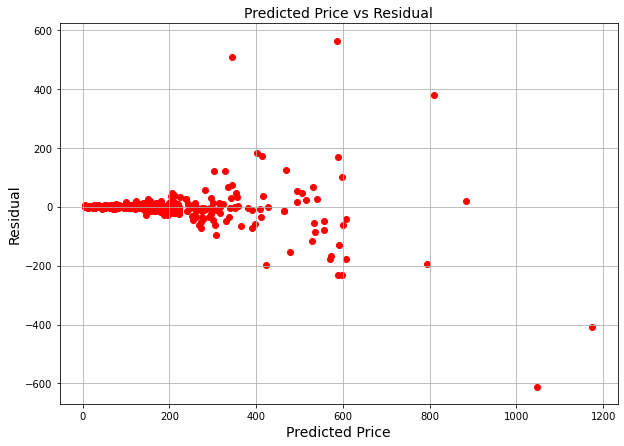

<IPython.core.display.Javascript object>

In [169]:
plt.figure(figsize=(10, 7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [174]:
train_score = []
train_score.extend(
    [
        lrscore_train,
        rfscore_train,
        adascore_train,
        gradientscore_train,
        mlpscore_train,
        xgbscore_train,
        stackingscore_train,
    ]
)

test_score = []
test_score.extend(
    [
        lrscore_test,
        rfscore_test,
        adascore_test,
        gradientscore_test,
        mlpscore_test,
        xgbscore_test,
        stackingscore_test,
    ]
)

rmse_train = []
rmse_train.extend(
    [
        rmse_lr_train,
        rmse_rf_train,
        rmse_ada_train,
        rmse_gradient_train,
        rmse_mlp_train,
        rmse_xgb_train,
        rmse_stacking_train,
    ]
)

rmse_test = []
rmse_test.extend(
    [
        rmse_lr_test,
        rmse_rf_test,
        rmse_ada_test,
        rmse_gradient_test,
        rmse_mlp_test,
        rmse_xgb_test,
        rmse_stacking_test,
    ]
)

<IPython.core.display.Javascript object>

In [179]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Linear Regression",
            "Random Forest",
            "Ada Boost",
            "Gradient Boost",
            "Artificial Neural Network",
            "XGBoost",
            "Stacking Ensemble",
        ],
        "Train_Score": train_score,
        "Test_Score": test_score,
        "Train_RMSE": rmse_train,
        "Test_RMSE": rmse_test,
    }
)

comparison_frame["Diff_in_Score"] = np.abs(
    comparison_frame["Train_Score"] - comparison_frame["Test_Score"]
)
# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Diff_in_Score", ascending=True)

Model  Train_Score  Test_Score  Train_RMSE  Test_RMSE  \
1              Random Forest     0.856554    0.870066   46.887469  41.778759   
0          Linear Regression     0.735607    0.786758   63.655804  53.521699   
3             Gradient Boost     0.725729    0.788415   64.833988  53.313339   
6          Stacking Ensemble     0.951603    0.869689   27.234802  41.839339   
2                  Ada Boost     0.987216    0.890432   13.997338  38.365049   
5                    XGBoost     0.999986    0.890439    0.468163  38.363843   
4  Artificial Neural Network     0.948157    0.828742   28.187580  47.964415   

   Diff_in_Score  
1       0.013512  
0       0.051152  
3       0.062686  
6       0.081914  
2       0.096784  
5       0.109547  
4       0.119415

<IPython.core.display.Javascript object>